             
 ---
# **PUBG Final Placement Prediction**

---


                                    
 #                                     **ABSTARCT**
                                      
Recently, the battle royale-style game has become a very popular online game. One of the most famous game is called PlayerUnknown's BattleGrounds (PUBG). At beginning of each play, nearly 100 people parachute onto an island without any equipment. In order to win the game, you need to scavenge for weapons and available equipment to eliminate the other people and survive to the end.

Hence, if you want to see ‘Winner Winner Chicken Dinner!’ on your display, it’s very essential to make some reasonable strategies based on actual condition. For example, a suitable location of parachuting can help you collect the equipment faster, the path you escape from the continuously shrinking blue circle (out of the circle players will get damage continuously until they die) can help you avoid some dangerous enemies and find a suitable location to hide in the last circle is helpful get the ‘Chicken Dinner’.

Based on these reasons, collect the PUBG’s data and analyze it is a meaningful work to help the player to survive at last. Kaggle hold an interesting competition which try to predict the final ranking percnetile based on the data collected through the PUBG developer API. This dataset has 28 features such as, number of enemy player killed, duration of the match, and so on. According to these data, we try to find the best model to predict the final percentile winning placement.

**END GOAL**

I would clean up the data so that all fields have consistent data.
I would create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place). The data has around  65,000 games' worth of anonymized player data, split into training and testing sets, and I would  predict final placement from final in-game stats.

Here is the link to my data :https://www.kaggle.com/c/pubg-finish-placement-prediction/data

```
# This is formatted as code
```

**Importing Libraries**

---

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import math

**Installing PYTHON DRIVE**

---

In [0]:
!pip install PyDrive

```
# This is formatted as code
```

**Loading Dataset**

---


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '13mWo3kwMN7Z95CyHLBvhsMtOHScFBcjI'})
download.GetContentFile('pubg_train.csv')

In [0]:
download = drive.CreateFile({'id': '1JHsiA_cWWsh3GW3S2ygJEb_3y6NCF4Pr'})
download.GetContentFile('pubg_test.csv')

**Creating a dataframe for train data**


---

In [0]:
train_data=pd.read_csv('pubg_train.csv')

In [0]:
train_data.head(10)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.00,0,0,0,60,1241.0,0,0.0,0.00,1306,squad-fpp,28.0,26.0,-1,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.50,0,0,0,57,0.0,0,0.0,0.00,1777,squad-fpp,26.0,25.0,1484,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.00,0,0,0,47,0.0,0,0.0,0.00,1318,duo,50.0,47.0,1491,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.90,0,0,0,75,0.0,0,0.0,0.00,1436,squad-fpp,31.0,30.0,1408,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.00,0,0,0,45,0.0,1,1.0,58.53,1424,solo-fpp,97.0,95.0,1560,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875
5,5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0.0,100.00,1,1,0,44,0.0,1,1.0,18.44,1395,squad-fpp,28.0,28.0,1418,0,0.0000,0,0.00,0.0,0,34.70,1,0,0.0370
6,6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0.0,0.00,0,0,0,96,1262.0,0,0.0,0.00,1316,squad-fpp,28.0,28.0,-1,0,0.0000,0,0.00,0.0,0,13.50,1,1497,0.0000
7,7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0.0,8.54,0,0,0,48,1000.0,0,0.0,0.00,1967,solo-fpp,96.0,92.0,-1,0,2004.0000,0,0.00,0.0,0,1089.00,6,1500,0.7370
8,8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0.0,51.60,0,0,0,64,0.0,0,0.0,0.00,1375,squad,28.0,27.0,1493,0,0.0000,0,0.00,0.0,0,800.00,4,0,0.3704
9,9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0.0,37.28,0,0,0,74,0.0,0,0.0,0.00,1930,squad,29.0,27.0,1349,0,0.0000,0,0.00,0.0,0,65.70,1,0,0.2144


In [0]:
train_data=train_data.drop(columns=['Unnamed: 0'],axis=1)

**Description of dataset**



---


In [0]:
train_data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.440302e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.445632e+06,4.446966e+06,4.440303e+06,4.445189e+06,4.446966e+06,4.442968e+06,4.445188e+06,4.446966e+06,4.446966e+06,4.445189e+06,4.446966e+06,4.442966e+06,4.440746e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106867e+00,1.307170e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050138e+02,9.247833e-01,5.439473e-01,2.299842e+01,1.579506e+03,4.450440e+01,4.300734e+01,8.920105e+02,1.646590e-01,6.061149e+02,3.496091e-03,4.509580e+00,2.387369e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728245e-01
std,5.885731e-01,1.715671e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275068e+02,1.558445e+00,7.109576e-01,5.097446e+01,2.587399e+02,2.382784e+01,2.328937e+01,7.366478e+02,4.721671e-01,1.498336e+03,7.337297e-02,3.050278e+01,1.674135e-01,9.261157e-02,1.183496e+03,2.456544e+00,7.397004e+02,3.074048e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.425000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.855000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.131000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.962000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.070000e+04,1.800000e+01,3.824000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


**Displaying shape of dataframe**

---

In [0]:
train_data.shape

(4446966, 29)

**Checking for null values**

In [0]:
train_data.isna().sum()

Id                    0
groupId               0
matchId               0
assists               0
boosts             6664
damageDealt           0
DBNOs                 0
headshotKills         0
heals                 0
killPlace             0
killPoints         1334
kills                 0
killStreaks        6663
longestKill        1777
matchDuration         0
matchType           889
maxPlace           3998
numGroups          1778
rankPoints            0
revives               0
rideDistance       1777
roadKills             0
swimDistance       4000
teamKills          6220
vehicleDestroys       0
walkDistance          0
weaponsAcquired       0
winPoints             0
winPlacePerc          1
dtype: int64

** Since there are null values in the dataset  we are filling the null values with the mean values of the column**

In [0]:
train_data['boosts'].mean()

1.1068666050192082

In [0]:
train_data['swimDistance'].mean()

4.509579539276384

In [0]:
train_data['boosts']=train_data['boosts'].fillna('1')
train_data['killPoints']=train_data['killPoints'].fillna('505')
train_data['killStreaks']=train_data['killStreaks'].fillna('0')
train_data['longestKill']=train_data['longestKill'].fillna('23')
train_data['matchType']=train_data['matchType'].fillna('squad-fpp')
train_data['maxPlace']=train_data['maxPlace'].fillna('44')
train_data['numGroups']=train_data['numGroups'].fillna('43')
train_data['rideDistance']=train_data['rideDistance'].fillna('606')
train_data['swimDistance']=train_data['swimDistance'].fillna('4')
train_data['teamKills']=train_data['teamKills'].fillna('0')
train_data['winPlacePerc']=train_data['winPlacePerc'].fillna('0.47')

**Checking again for null values**

In [0]:
train_data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [0]:
train_data.dtypes

Id                  object
groupId             object
matchId             object
assists              int64
boosts              object
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints          object
kills                int64
killStreaks         object
longestKill         object
matchDuration        int64
matchType           object
maxPlace            object
numGroups           object
rankPoints           int64
revives              int64
rideDistance        object
roadKills            int64
swimDistance        object
teamKills           object
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc        object
dtype: object

**Label encoding for matchtype**

In [0]:
train_data["matchType"] = train_data["matchType"].astype('category')
train_data.dtypes

Id                   object
groupId              object
matchId              object
assists               int64
boosts               object
damageDealt         float64
DBNOs                 int64
headshotKills         int64
heals                 int64
killPlace             int64
killPoints           object
kills                 int64
killStreaks          object
longestKill          object
matchDuration         int64
matchType          category
maxPlace             object
numGroups            object
rankPoints            int64
revives               int64
rideDistance         object
roadKills             int64
swimDistance         object
teamKills            object
vehicleDestroys       int64
walkDistance        float64
weaponsAcquired       int64
winPoints             int64
winPlacePerc         object
dtype: object

In [0]:
train_data["matchType"] = train_data["matchType"].cat.codes

In [0]:
print(train_data['matchType'])

0          15
1          15
2           2
3          15
4          13
           ..
4446961    15
4446962    12
4446963    15
4446964    15
4446965    13
Name: matchType, Length: 4446966, dtype: int8


**Converting complete data into float**

In [0]:
train_data['boosts']=train_data['boosts'].astype(float)

In [0]:
train_data['killPoints']=train_data['killPoints'].astype(float)

In [0]:
train_data['killStreaks']=train_data['killStreaks'].astype(float)

In [0]:
train_data['longestKill']=train_data['longestKill'].astype(float)

In [0]:
train_data['maxPlace']=train_data['maxPlace'].astype(float)

In [0]:
train_data['numGroups']=train_data['numGroups'].astype(float)

In [0]:
train_data['rideDistance']=train_data['rideDistance'].astype(float)

In [0]:
train_data['swimDistance']=train_data['swimDistance'].astype(float)

In [0]:
train_data['teamKills']=train_data['teamKills'].astype(float)

In [0]:
train_data['damageDealt']=train_data['damageDealt'].astype(float)

In [0]:
train_data['winPlacePerc']=train_data['winPlacePerc'].astype(float)

**Visualisation**

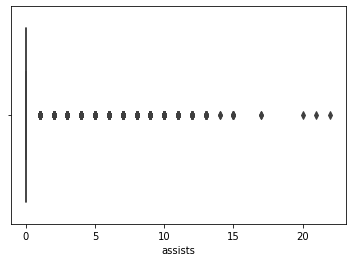

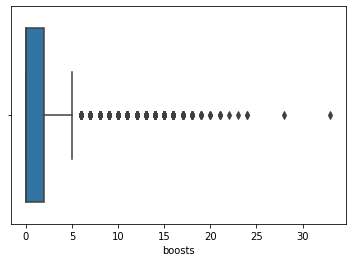

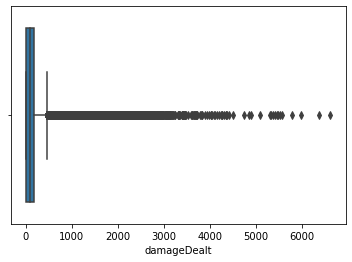

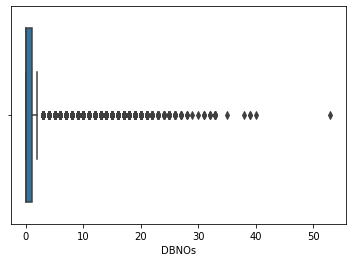

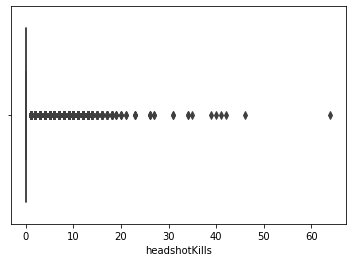

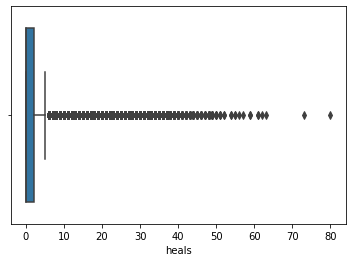

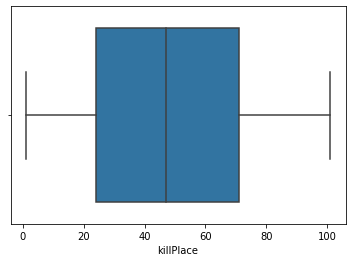

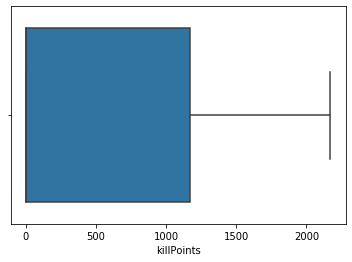

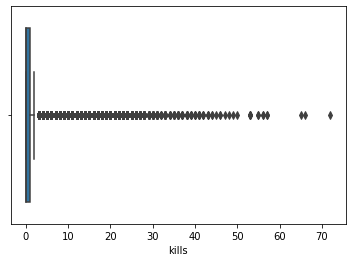

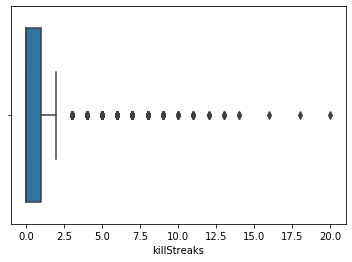

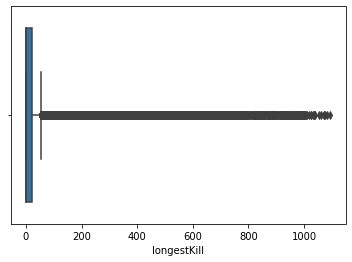

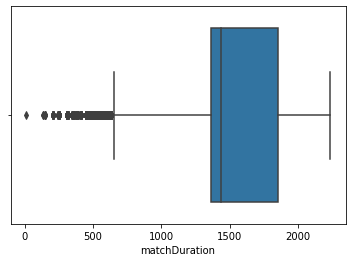

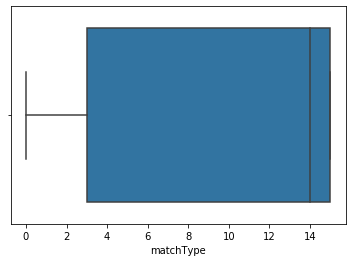

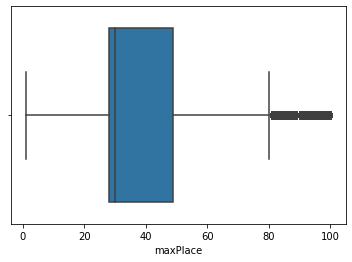

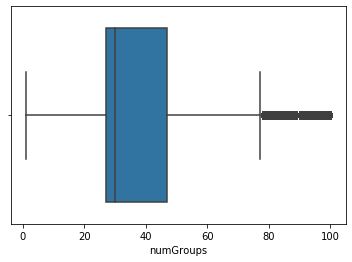

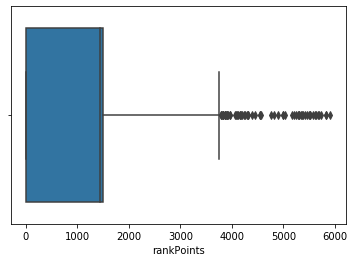

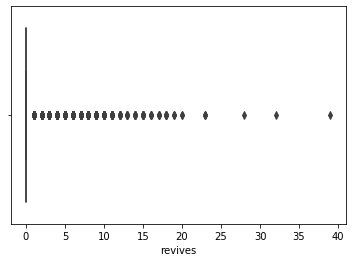

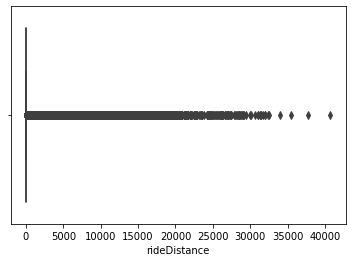

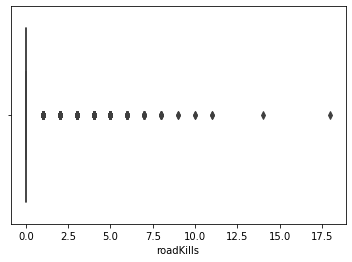

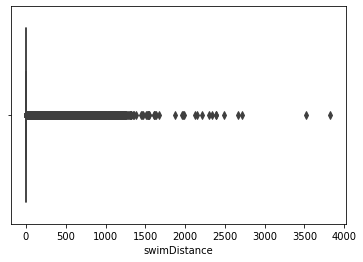

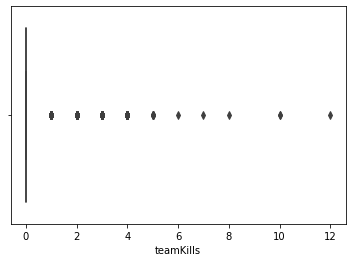

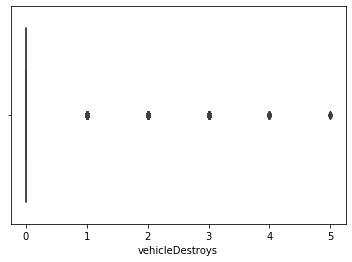

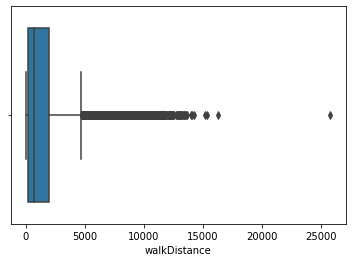

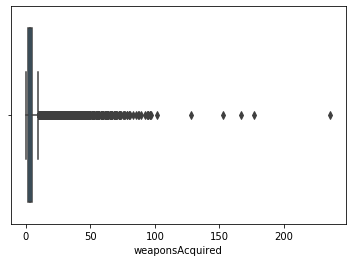

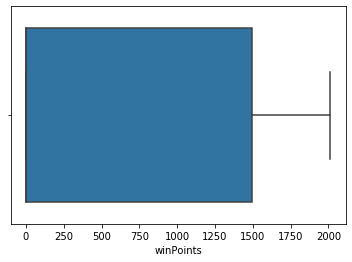

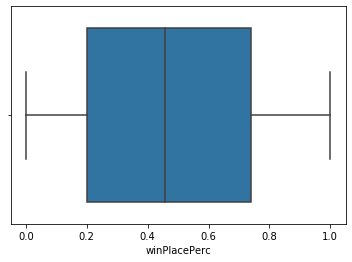

In [0]:
sns.boxplot(train_data["assists"])
plt.show()
sns.boxplot(train_data["boosts"])
plt.show()
sns.boxplot(train_data["damageDealt"])
plt.show()
sns.boxplot(train_data["DBNOs"])
plt.show()
sns.boxplot(train_data["headshotKills"])
plt.show()
sns.boxplot(train_data["heals"])
plt.show()
sns.boxplot(train_data["killPlace"])
plt.show()
sns.boxplot(train_data["killPoints"])
plt.show()
sns.boxplot(train_data["kills"])
plt.show()
sns.boxplot(train_data["killStreaks"])
plt.show()
sns.boxplot(train_data["longestKill"])
plt.show()
sns.boxplot(train_data["matchDuration"])
plt.show()
sns.boxplot(train_data["matchType"])
plt.show()
sns.boxplot(train_data["maxPlace"])
plt.show()
sns.boxplot(train_data["numGroups"])
plt.show()
sns.boxplot(train_data["rankPoints"])
plt.show()
sns.boxplot(train_data["revives"])
plt.show()
sns.boxplot(train_data["rideDistance"])
plt.show()
sns.boxplot(train_data["roadKills"])
plt.show()
sns.boxplot(train_data["swimDistance"])
plt.show()
sns.boxplot(train_data["teamKills"])
plt.show()
sns.boxplot(train_data["vehicleDestroys"])
plt.show()
sns.boxplot(train_data["walkDistance"])
plt.show()
sns.boxplot(train_data["weaponsAcquired"])
plt.show()
sns.boxplot(train_data["winPoints"])
plt.show()
sns.boxplot(train_data["winPlacePerc"])
plt.show()

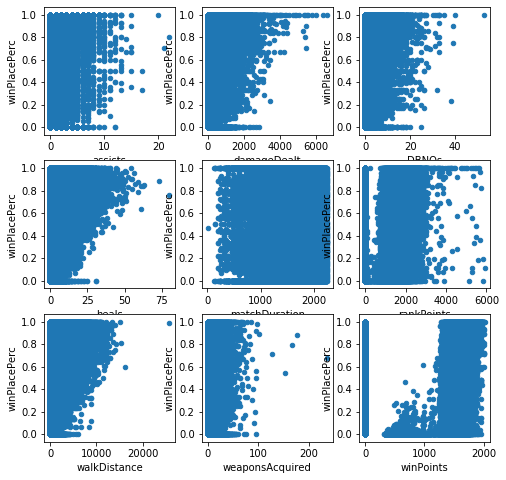

In [0]:
fig,ax=plt.subplots(3,3)
train_data.plot(kind='scatter',x='assists',y='winPlacePerc',ax=ax[0][0],figsize=(8,8)) #Scatter Plot for features vs labels
train_data.plot(kind='scatter',x='damageDealt',y='winPlacePerc',ax=ax[0][1])
train_data.plot(kind='scatter',x='DBNOs',y='winPlacePerc',ax=ax[0][2])
train_data.plot(kind='scatter',x='heals',y='winPlacePerc',ax=ax[1][0])
train_data.plot(kind='scatter',x='matchDuration',y='winPlacePerc',ax=ax[1][1])
train_data.plot(kind='scatter',x='rankPoints',y='winPlacePerc',ax=ax[1][2])
train_data.plot(kind='scatter',x='walkDistance',y='winPlacePerc',ax=ax[2][0])
train_data.plot(kind='scatter',x='weaponsAcquired',y='winPlacePerc',ax=ax[2][1])
train_data.plot(kind='scatter',x='winPoints',y='winPlacePerc',ax=ax[2][2])
plt.show()

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
from matplotlib import style
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
from patsy import dmatrices


import sklearn
import sklearn.metrics

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

import warnings
warnings.filterwarnings('ignore')

output_notebook()
%matplotlib inline

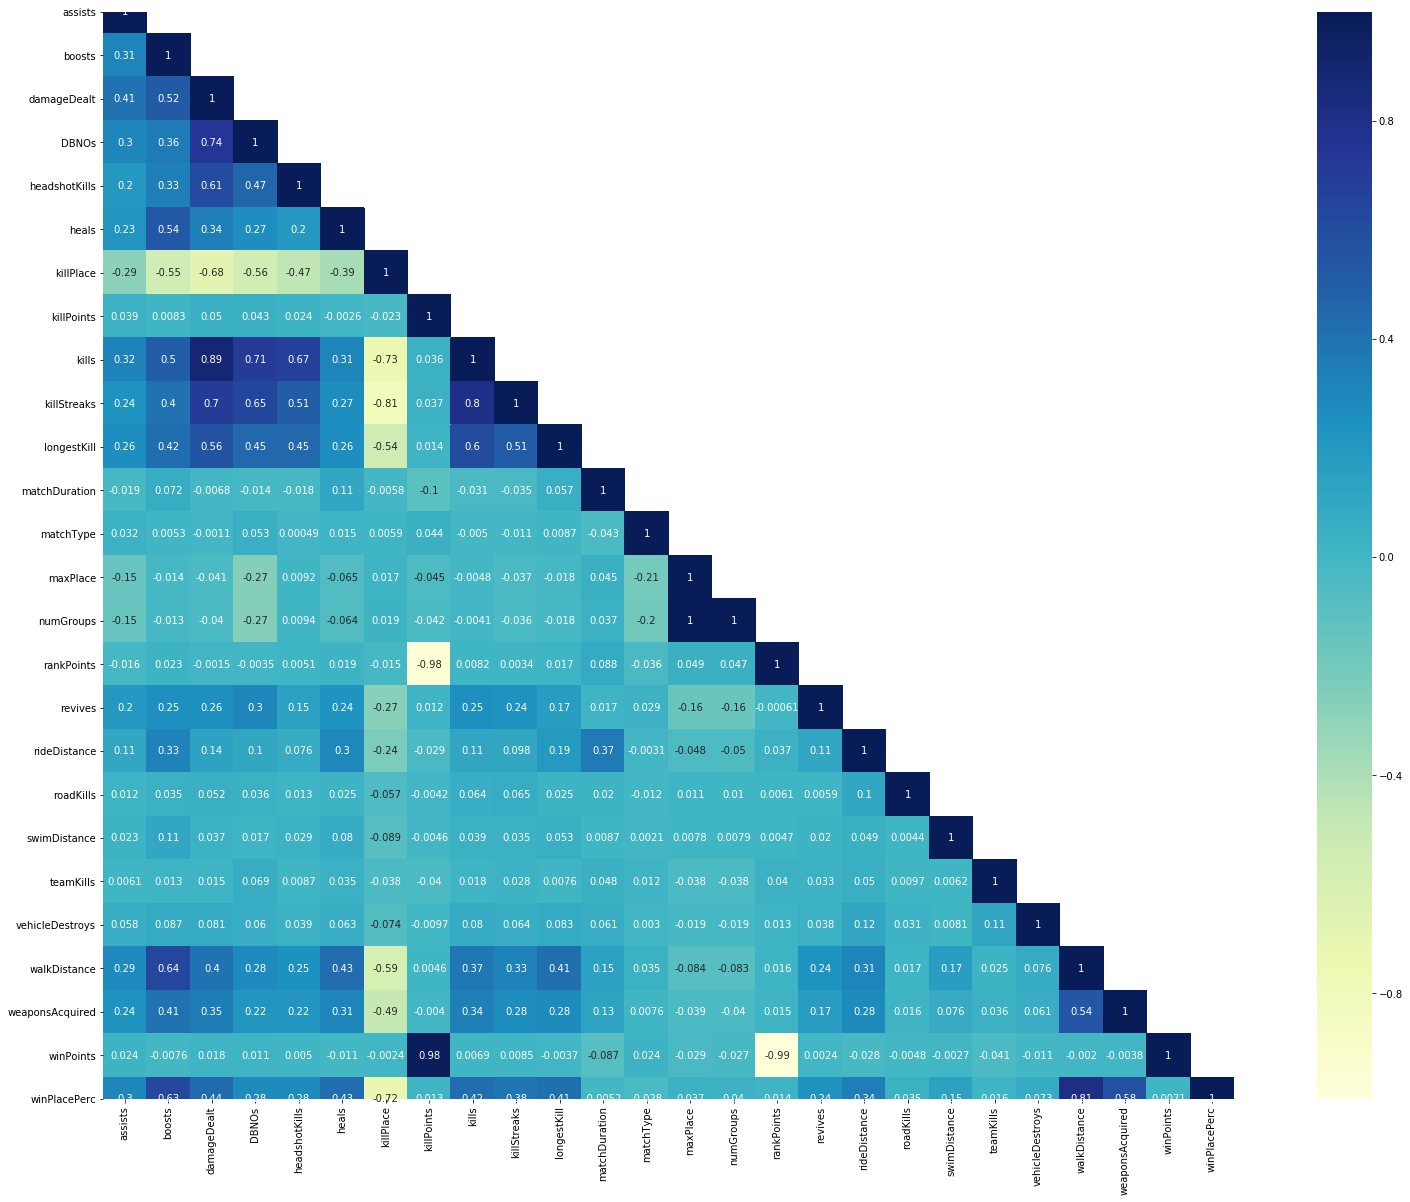

In [0]:
correlation= train_data.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,20)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [0]:
correlation['winPlacePerc'].sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.810888
boosts             0.633760
weaponsAcquired    0.583805
damageDealt        0.440507
heals              0.427857
kills              0.419915
longestKill        0.410078
killStreaks        0.377124
rideDistance       0.342840
assists            0.299442
DBNOs              0.279972
headshotKills      0.277722
revives            0.240882
swimDistance       0.149552
vehicleDestroys    0.073436
numGroups          0.039596
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015936
rankPoints         0.013520
killPoints         0.012900
winPoints          0.007063
matchDuration     -0.005173
matchType         -0.028471
killPlace         -0.719068
Name: winPlacePerc, dtype: float64

**Checking Linear Regression on our TRAIN data**

In [0]:
x=train_data.copy()

In [0]:
x.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0.0,0.0,0,0,0,60,1241.0,0,0.0,0.00,1306,15,28.0,26.0,-1,0,0.0000,0,0.00,0.0,0,244.80,1,1466,0.4443
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0.0,91.5,0,0,0,57,0.0,0,0.0,0.00,1777,15,26.0,25.0,1484,0,0.0045,0,11.04,0.0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0.0,68.0,0,0,0,47,0.0,0,0.0,0.00,1318,2,50.0,47.0,1491,0,0.0000,0,0.00,0.0,0,161.80,2,0,0.7754
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0.0,32.9,0,0,0,75,0.0,0,0.0,0.00,1436,15,31.0,30.0,1408,0,0.0000,0,0.00,0.0,0,202.80,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0.0,100.0,0,0,0,45,0.0,1,1.0,58.53,1424,13,97.0,95.0,1560,0,0.0000,0,0.00,0.0,0,49.75,2,0,0.1875


In [0]:
y=x['winPlacePerc']

In [0]:
y.shape

(4446966,)

In [0]:
x.drop(['Id','groupId','matchId','winPlacePerc','matchType'], axis=1, inplace=True)

**Splitting TRAIN data into training and testing data**

In [0]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [0]:
x_train.shape

(3112876, 24)

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=1)
lr.fit(x_train.values,y_train.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Accuracy**

In [0]:
lr.score(x_train,y_train)

0.8300414752132809


```
`# This is formatted as code`
```

**Checkinng RMSE**

In [0]:
from sklearn.metrics import mean_squared_error
import math

In [0]:
train_pred_y=lr.predict(x_train)
test_pred_y=lr.predict(x_test)

In [0]:
print("RMSE Train:",math.sqrt(mean_squared_error(y_train,train_pred_y)))
print("RMSE Test:",math.sqrt(mean_squared_error(y_test,test_pred_y)))

RMSE Train: 0.12674187856284502
RMSE Test: 0.12687183647396302


**Checking Mean Absolute Error**

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(y_test,test_pred_y)

0.09281188926314411

**Applying Linear Regression on final TEST and TRAIN data**

In [0]:
test_data=pd.read_csv('pubg_test.csv')

In [0]:
test_data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0.0,51.47,0,0,0,73,0.0,0,0.0,0.00,1884,squad-fpp,28.0,28.0,1500,0,0.0,0,0.0,0.0,0,588.0,1,0
1,1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4.0,179.10,0,0,2,11,0.0,2,1.0,362.00,1811,duo-fpp,48.0,47.0,1503,2,4668.0,0,0.0,0.0,0,2017.0,6,0
2,2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0.0,23.40,0,0,4,49,0.0,0,0.0,0.00,1793,squad-fpp,28.0,27.0,1565,0,0.0,0,0.0,0.0,0,788.0,4,0
3,3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0.0,65.50,0,0,0,54,0.0,0,0.0,0.00,1834,duo-fpp,45.0,44.0,1465,0,0.0,0,0.0,0.0,0,1812.0,3,0
4,4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4.0,330.20,1,2,1,7,0.0,3,1.0,60.06,1326,squad-fpp,28.0,27.0,1480,1,0.0,0,0.0,0.0,0,2964.0,4,0


In [0]:
test_data=test_data.drop(columns=['Unnamed: 0'],axis=1)

**Filling null values of test data**

In [0]:
test_data['boosts']=test_data['boosts'].fillna('1')
test_data['killPoints']=test_data['killPoints'].fillna('509')
test_data['killStreaks']=test_data['killStreaks'].fillna('0')
test_data['longestKill']=test_data['longestKill'].fillna('20')
test_data['matchType']=test_data['matchType'].fillna('squad-fpp')
test_data['maxPlace']=test_data['maxPlace'].fillna('44')
test_data['numGroups']=test_data['numGroups'].fillna('43')
test_data['rideDistance']=test_data['rideDistance'].fillna('590')
test_data['swimDistance']=test_data['swimDistance'].fillna('4')
test_data['teamKills']=test_data['teamKills'].fillna('0')

In [0]:
test_data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [0]:
test_data.shape

(1934174, 28)

In [0]:
x_test=test_data.copy()

In [0]:
x_test.shape

(1934174, 28)

In [0]:
x_train1=train_data.copy()

In [0]:
y_train1=x_train1['winPlacePerc']

In [0]:
y_train1.shape

(4446966,)

In [0]:
x_train1.drop(['Id','matchType','groupId','matchId','winPlacePerc'], axis=1, inplace=True)

In [0]:
x_train1.shape

(4446966, 24)

In [0]:
lr.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
lr.score(x_train1,y_train1)

0.8299082665974031

In [0]:
y_pred_train=lr.predict(x_train1)

In [0]:
y_pred_train.shape

(4446966,)

**y_pred_test contains the winplaceperc values for our test data**

In [0]:
y_pred_test=lr.predict(x_test)

In [0]:
y_pred_test.shape

(1934174,)

**Adding y_pred_test to our test data**

In [0]:
test_data['winPlacePerc']=y_pred_test*100

In [0]:
test_data.shape

(1934174, 29)

In [0]:
sample1=test_data[['Id', 'winPlacePerc']]

**csv file containing winperc and Id**

In [0]:
sample1.to_csv('lr_placements1.csv')

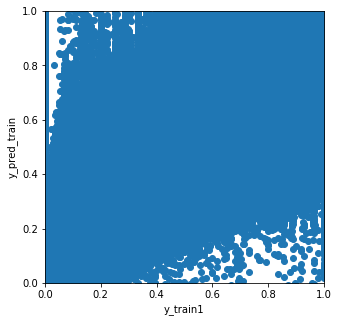

In [0]:
f, ax = plt.subplots(figsize=(5,5))
plt.scatter(y_train1, y_pred_train)
plt.xlabel("y_train1")
plt.ylabel("y_pred_train")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

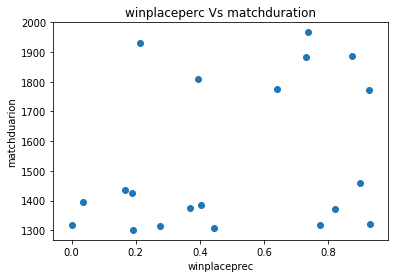

In [0]:
import matplotlib.pyplot as plt
new=train_data.head(20)
plt.scatter(new.winPlacePerc,new.matchDuration,) #scatter plot example
plt.xlabel('winplaceprec')
plt.ylabel('matchduarion')
plt.title('winplaceperc Vs matchduration')
plt.show()

**Displaying the final placement of the player**

In [0]:
finalplacementposition=pd.read_csv('lr_placements1.csv')

In [0]:
finalplacementposition.head(10)

,Unnamed: 0,Id,winPlacePerc
0,0,9329eb41e215eb,19.156431
1,1,639bd0dcd7bda8,89.187196
2,2,63d5c8ef8dfe91,44.596544
3,3,cf5b81422591d1,50.665539
4,4,ee6a295187ba21,94.899054
5,5,3e2539b5d78183,1.643476
6,6,d812d2f1d88a02,73.516156
7,7,a8a377e4d43bf8,29.808957
8,8,f18301e30d47d3,52.831028
9,9,ec7b965ef978b3,58.424439


**REPORT**

**PUBG FINAL PLACEMENT PREDICTION**


The game PUBG stands for players unknows battle grounds which is launched in Feb8th,2018.Within a week it reached 100 millions downloads.This game comes under online streaming.

With this game we can connect to people all over the world.if you want to see ‘Winner Winner Chicken Dinner!’ on your display, it’s very essential to make some reasonable strategies based on actual condition.Based on these reasons, collect the PUBG’s data and analyze it is a meaningful work to help the player to survive at last






**PRIMARY TARGET**

To predict the final ranking percentile based on the data collected through the PUBG developer API

**DATASET**

I'll be using three datasets of the Kernel on Kaggle, this data can be found here:https://www.kaggle.com/c/pubg-finish-placement-prediction/data

**STEPS FOR END GOAL**

DataPreprocessing(removing null values, unnecessary data) -> Exploratory Data Analysis(getting the visualizations) -> Prediction(using algorithms) -> finding accuracy of model



**PROBLEMS FACED**

1.There wasn't any particular column which could say me the winner of the match so I had to seperately write function for a column which would say me the winner of the match.

2.Most of the datatype was of characters so I had to change that one into float type.

3.I gone through different visualizations so that can say which columns can actually help me predicting the final results.






**OBSERVATIONS**

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYsAAAEWCAYAAACXGLsWAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3dfZwdZX338c+XEGB5TJDoTZbEoIYg%0AihJYgYpWsJSEtDUUbxWq5aHUtCpofYgFa4VCLWgUircIRgwBxQS8pWlUNEURggrChgDhKbLlwWSD%0AJBASqESE+Osfc61MDmd3Zsl52nO+79frvHbmmpkzvzlnz/mdua5rrlFEYGZmNpRtmh2AmZm1PicL%0AMzMr5GRhZmaFnCzMzKyQk4WZmRVysjAzs0JOFjYkSf8j6VU1eJ6TJP20FjFZ7Uk6XNLqYazf0PdT%0A0sT0vziqUfu0LTlZ2JAiYueIeLDZcbQqSd2Snpf06irL/kPSF5oRV9r/WZK+2az9bw1JD0s6cmA+%0AIn6V/hc3NzOuTuZkYVZF2V+wEdEP/Bj464rtdwdmAJfXPrqRTdK2zY7Bhs/JogNJOlnSd3PzD0j6%0Adm5+laQD0nRIek2ani/pIknfl/S0pF/kf1GndT8s6UFJj0uaI6nq/5ikC9N+npK0TNJbc8tGSfqU%0ApP9O+1kmaUJatq+k6yStl7RS0rtz282XdEla/rSkGyW9Mre8aNuLJV0r6TfAEZK6JH1R0iOSNkr6%0AqaSuKodzORXJAjgOuDciVihzgaS16XhXSHr9IK/LDZL+VdLPU7XLdyW9TNKVadvbJE0qeh0lTQc+%0ABbwnPc+dqXx3SZdJWiPpSUmLKvb/8RTno5JOzpW/TNLitJ9bgfz7Pim999vmym6Q9Ldp+iRJP0uv%0AwRPAWZJeLel6SU+k/5UrJY1J638DmAh8N8X+ycp9SBqf4lkvqU/S+3P7PkvS1ZKuSP8H90jqqfZ6%0A2zBEhB8d9gBeBWwg+7EwHngEWJ1b9iSwTZoP4DVpej7wBHAwsC1wJbAw97wB/ATYnezD/kvgb9Oy%0Ak4Cf5tZ9H/Cy9DwfB34N7JCWzQZWAFMAAW9M6+4ErAJOTttNBR4H9svF9zTwx8D2wIUD+yy57Ubg%0AsPS67ABcBNwAdAOjgDcD21d5PbvStm/Jld0M/EOangYsA8ak43ktsOcg780NQB/Zl/FuwL3pdTwy%0AxX0FcFnJ1/Es4JsVz/994CpgLDAaeFsqPxx4Hjg7lc8AngHGpuULgavT6/h6oD/32k5K7/22FceR%0Af++fB05LcXYBrwH+NL1P44ClwL/ntn8YODI3v8U+0vpfSe/TAcA64O254/5tOoZRwLnALc3+3I30%0AR9MD8KNJb3z2xXkg2S/gucCtwL5kX6aLc+tVJotLc8tmAPdXrDs9N/9B4Mdp+iRyyaJKPE8Cb0zT%0AK4GZVdZ5D3BTRdlXgTNz8eWT187AZmBCyW2vyC3bBtg0EFOJ1/NSYG6angz8Dnh5mn872Rf+oaQk%0APMTz3AD8U27+i8APcvN/AdxR8nU8i1yyAPYEfk9KABXbHZ6ON/+FvzbFPAp4Dtg3t+zfGF6y+FXB%0AcR8DLM/NP8wgySK9n5uBXXLLzwXm5477R7ll+wGbmv2ZG+kPV0N1rhvJviD+OE3fALwtPW4cYrtf%0A56afIftCzluVm36E7MzlRSR9QtJ9qXpnA9mv6D3S4gnAf1fZ7JXAIZI2DDyA9wL/p9r+I+J/gPUp%0AhmFtm2LZYZA4qrkceJekHciqpJZExNoUx/XAl8nOVNZKmitp1yGe67Hc9KYq8394zQtex0oTgPUR%0A8eQgy5+IiOdz8wPv7ziyL+nK93Y48tsi6RWSFkrql/QU8M0h4q40nuw4nq6Ipzs3X/l/uoPcVrJV%0AnCw610CyeGuavpFyyaLIhNz0RGBN5QqpXv2TwLvJfuWOIavGUVplFbk68ZxVwI0RMSb32DkiPlBt%0A/5J2JqsSW1Ny2/wQzI+TVWVUi6Oan5IlpplkVUNbNGxHxJci4iCyX7n7kFW1bZUSr2PlkNKrgN0H%0A2gaGYR1ZNVLlezvgN+nvjrmyfBKuFsu/pbL9I2JXstdMQ6yft4bsOHapiKd/iG1sKzlZdK4bgSOA%0ArohYDdwETCer/16+Fc87W9JYZQ3SHyGrH6+0C9mXzzpgW0mfAfK/tC8FzpE0OTUOv0HSy4DvAftI%0A+mtJo9PjTZJem9t2hqS3SNoOOIesrnpVyW3/ICJ+D8wDzk+NqaMk/ZGk7QdZP8jaEz5H1jaR70Dw%0AJkmHSBpN9sX6W7LqoK1V9Do+BkxS6mQQEY8CPwC+kt6j0ZL+uGgnkXVXvYasYXpHSfsBJ+aWryP7%0Aon5fep3+huIkuwvwP8BGSd28OHk+RtZ+Vi2eVcDPgXMl7SDpDcApZGcnVidOFh0qIn5J9mG9Kc0/%0ABTwI/Cy2ri/7f5I15t5B1pj69SrrLAF+SFaP/wjZl2e+muJ8ssbU/wKeSs/RlaodjiJrZ1lDVtXw%0AObJG0gHfAs4k+5V/ENkvVkpuW+kTZA3tt6Xn+xxDf2auIPuFe1VEPJsr3xX4Gll7wiNknQTmDPE8%0AZRW9jgM93J6QdHua/muy9of7ydok/qHkvk4lq5L6NVn7zmUVy99P9oX/BPA6si/zofwLWZvZRrL/%0Ak2sqlp8LfDpVGX6iyvbHk7VjrAH+g6zt6Uclj8VeAqUGILOtJimAyRHR16T9zyfr1fXpZuzfrJ35%0AzMLMzArVLVlImiDpJ5LuTRfFfCSV767swqgH0t+xqVySvpQusLlL0oG55zoxrf+ApBMH26eZmdVH%0A3aqhJO1JduHR7anXwjKyvtQnkXV7O0/S6WS9OP5R0gyyi3ZmAIcAF0bEIcqGTegFesh6SCwDDhqi%0A+5+ZmdVY3c4sIuLRiLg9TT8N3EfWD3omL3QrvJwsgZDKr4jMLcCYlHCmAddFxED/8OvIeu2YmVmD%0ANOQiFWVj2UwFfgG8InXhg6xnxSvSdDdb9uRYncoGK6/cxyxgFsBOO+100L777lu7AzAz6wDLli17%0APCLGVVtW92SRLoz6Dtk4OU9JL1x3ExGRetBstYiYSzZsBT09PdHb21uLpzUz6xiSBr0yv669odJF%0ASN8BroyIgX7Uj6XqpYF2jbWpvJ8trxDdK5UNVm5mZg1Sz95QIruY6r6IOD+3aDEvXP15ItlFXAPl%0AJ6ReUYcCG1N11RLgqHTF6ViyC6uW1CtuMzN7sXpWQx1GdrXoCkl3pLJPAecBV0s6heyq04F7ClxL%0A1hOqj2zgr5MBImK9pHPIrqIFODsi1tcxbjMzq9CWV3C7zcLMbPgkLYuIqjeK8hXcZmZWyOO7m9mI%0At2h5P3OWrGTNhk2MH9PF7GlTOGbqi3rY21ZwsjCzEW3R8n7OuGYFm57LBkvu37CJM65ZAeCEUUOu%0AhjKzEW3OkpV/SBQDNj23mTlLVjYpovbkZGFmI9qaDZuGVW4vjZOFmY1o48d0DavcXhonCzMb0WZP%0Am0LX6FFblHWNHsXsaVOaFFF7cgO3mY1oA43Y7g1VX04WZjbiHTO128mhzlwNZWZmhZwszMyskJOF%0AmZkVcpuFleLhFMw6m5OFFfJwCmbmaigr5OEUzMzJwgp5OAUzc7KwQh5OwcycLKyQh1MwMzdwWyEP%0Ap2BmThZWiodTMOtsroYyM7NCdUsWkuZJWivp7lzZGyXdLGmFpO9K2jW37AxJfZJWSpqWK5+eyvok%0AnV6veM3MbHD1PLOYD0yvKLsUOD0i9gf+A5gNIGk/4DjgdWmbr0gaJWkUcBFwNLAfcHxa18zMGqhu%0AySIilgLrK4r3AZam6euAd6bpmcDCiHg2Ih4C+oCD06MvIh6MiN8BC9O6ZmbWQI1us7iHF77s3wVM%0ASNPdwKrceqtT2WDlLyJplqReSb3r1q2radBmZp2u0cnib4APSloG7AL8rlZPHBFzI6InInrGjRtX%0Aq6c1M6u5Rcv7Oey869n79O9z2HnXs2h5f7NDKtTQrrMRcT9wFICkfYA/S4v6eeEsA2CvVMYQ5WbW%0A4UbiaMgjdWDOhp5ZSHp5+rsN8GngkrRoMXCcpO0l7Q1MBm4FbgMmS9pb0nZkjeCLGxmzmbWmgS/d%0A/g2bCF740m31X+kjdWDOenadXQDcDEyRtFrSKWS9mX4J3A+sAS4DiIh7gKuBe4EfAh+KiM0R8Txw%0AKrAEuA+4Oq1rZh1upH7pjtSBOetWDRURxw+y6MJB1v8s8Nkq5dcC19YwNDNrAyP1S3f8mC76q8TY%0A6gNz+gpuMxuRRupoyCN1YE4nCzMbkUbql+4xU7s599j96R7ThYDuMV2ce+z+Ld24DR5I0MxGqJE8%0AGvJIHJjTycLMRqyR+KU7UrkayszMCjlZmJlZIScLMzMr5GRhZmaFnCzMzKyQk4WZmRVysjAzs0JO%0AFmZmVsjJwszMCjlZmJlZIScLMzMr5GRhZmaFnCzMzKyQk4WZmRXyEOVmOYuW94/I+yOY1ZuThVmy%0AaHk/Z1yzgk3PbQagf8MmzrhmBYAThnU8V0OZJXOWrPxDohiw6bnNzFmyskkRmbWOuiULSfMkrZV0%0Ad67sAEm3SLpDUq+kg1O5JH1JUp+kuyQdmNvmREkPpMeJ9YrXbM2GTcMqN+sk9TyzmA9Mryj7PPAv%0AEXEA8Jk0D3A0MDk9ZgEXA0jaHTgTOAQ4GDhT0tg6xmwdbPyYrmGVm3WSuiWLiFgKrK8sBnZN07sB%0Aa9L0TOCKyNwCjJG0JzANuC4i1kfEk8B1vDgBmdXE7GlT6Bo9aouyrtGjmD1tSpMiMmsdjW7g/gdg%0AiaQvkCWqN6fybmBVbr3VqWyw8heRNIvsrISJEyfWNmrrCAON2O4NZfZijU4WHwA+GhHfkfRu4OvA%0AkbV44oiYC8wF6OnpiVo8p3WeY6Z2OzmYVdHo3lAnAtek6W+TtUMA9AMTcuvtlcoGKzczswZqdLJY%0AA7wtTb8deCBNLwZOSL2iDgU2RsSjwBLgKEljU8P2UanMzMwaqG7VUJIWAIcDe0haTdar6f3AhZK2%0ABX5LamMArgVmAH3AM8DJABGxXtI5wG1pvbMjorLR3MxagK9+b2+KaL/q/Z6enujt7W12GGYdo/Lq%0Ad8h6kp177P5OGHVSj+QsaVlE9FRb5iu4zWyr+er3xhpIzv0bNhG8MDTNouX1a9J1sjCzrear3xur%0AGcnZycLMtpqvfm+sZiRnJwsz22q++r2xmpGcnSzMbKsdM7Wbc4/dn+4xXQjoHtPlxu06akZy9v0s%0AzKwmfPV74zRjaBonCzOzEajRydnVUGZmVsjJwszMCjlZmJlZIScLMzMr5GRhZmaFSvWGknQYcBbw%0AyrSNgIiIV9UvNDMzaxVlu85+HfgosAzYXLCumZm1mbLJYmNE/KCukZiZWcsqmyx+ImkO2S1Rnx0o%0AjIjb6xKVmZm1lLLJ4pD0N39TjCC7NaqZmbW5UskiIo6odyBmZta6SnWdlbSbpPMl9abHFyXtVu/g%0AzMysNZS9zmIe8DTw7vR4CrisXkGZmVlrKZssXh0RZ0bEg+nxL8CQ11hImidpraS7c2VXSbojPR6W%0AdEdu2RmS+iStlDQtVz49lfVJOn24B2hmZluvbLLYJOktAzPpIr2i+/fNB6bnCyLiPRFxQEQcAHyH%0ArHcVkvYDjgNel7b5iqRRkkYBFwFHA/sBx6d1zcysgcr2hvoAcHlqpxCwHjhpqA0iYqmkSdWWSRJZ%0AddZAb6qZwMKIeBZ4SFIfcHBa1hcRD6btFqZ17y0Zt5mZ1UDZ3lB3AG+UtGuaf2or9/tW4LGIeCDN%0AdwO35JavTmUAqyrKD6EKSbOAWQATJ07cyvDMzCxvyGQh6X0R8U1JH6soByAizn+J+z0eWPASt60q%0AIuYCcwF6enqils9tZtbpis4sdkp/d6nVDiVtCxwLHJQr7gcm5Ob3SmUMUW5mZg0yZLKIiK+mRuan%0AIuKCGu3zSOD+iFidK1sMfEvS+cB4YDJwK1n7yGRJe5MlieOAv6pRHGZmVlJhb6iI2ExWbTQskhYA%0ANwNTJK2WdEpadBwVVVARcQ9wNVnD9Q+BD0XE5oh4HjgVWALcB1yd1jUzswZSRHH1vqQLgNHAVcBv%0ABspbdSDBnp6e6O3tbXYYZmYjiqRlEdFTbVnZrrMHpL9n58o8kKCZWYfwQIJmZlao7JkFkv6M7Arr%0AHQbKIuLswbcwM7N2UXbU2UuA9wCnkfVQehfZ/bjNzKwDlB0b6s0RcQLwZBpE8I+AfeoXlpmZtZLS%0AAwmmv89IGg88B+xZn5DMzKzVlG2z+J6kMcAc4HaynlCX1i0qMzNrKWV7Q52TJr8j6XvADhGxsX5h%0AmZlZKymVLCSdUKWMiLii9iGZmVmrKVsN9abc9A7An5BVRzlZmJl1gLLVUKfl51P7xcK6RGRmZi2n%0AbG+oSr8B9q5lIGZm1rrKtll8l6wHFGQJZj+yUWLNzKwDlG2z+EJu+nngkYr7UZiZWRsr22ZxY70D%0AMTOz1lV0D+6neaH66UUiYteaR2RmZi2n6LaquwBIOgd4FPgG2UCC78XDfZiZdYyyvaHeERFfiYin%0AI+KpiLgYmFnPwMzMrHWUTRa/kfReSaMkbSPpveRur2pmZu2tbLL4K+DdwGPp8a5UZmZmHaBsb6iH%0AcbWTmVnHKnunvHGSPiVprqR5A4+CbeZJWivp7ory0yTdL+keSZ/PlZ8hqU/SSknTcuXTU1mfpNOH%0Ae4BmZrb1yl6U95/ATcCPgM0lt5kPfJncYIOSjiA7Q3ljRDwr6eWpfD/gOLJ7fI8HfiRp4E58FwF/%0ACqwGbpO0OCLuLRmDmZnVQNlksWNE/ONwnjgilkqaVFH8AeC8iHg2rbM2lc8EFqbyhyT1AQenZX0R%0A8SCApIVpXScLM7MGKtvA/T1JM2qwv32At0r6haQbJQ0Mfd4NrMqttzqVDVb+IpJmSeqV1Ltu3boa%0AhGpmZgPKXsEt4FOSniW7/7aAeAlXcG8L7A4cSnaPjKslvWrYUVcREXOBuQA9PT2DXnVuZmbDV+oK%0A7hpaDVwTEQHcKun3wB5APzAht95eqYwhys3MrEHK9ob6S0m75ebHSDrmJexvEXBEeo59gO2Ax4HF%0AwHGStpe0NzAZuBW4DZgsaW9J25E1gi9+Cfs1M7OtULbN4syI2DgwExEbgDOH2kDSAuBmYIqk1ZJO%0AAeYBr0rdaRcCJ0bmHrL7Y9wL/BD4UERsjojngVOBJcB9wNVpXTMza6CyvaGqJZWiKqzjB1n0vkHW%0A/yzw2Srl1wLXFgVoZmb1U/bMolfS+ZJenR7nA8vqGZiZmbWOssniNOB3wFVk1Ue/BT5Yr6DMzKy1%0AlK2GmhERWwy1IeldwLdrH5KZmbWasmcWZ5QsMzOzNlR0Ud7RwAygW9KXcot2BZ6vZ2BmZtY6iqqh%0A1gC9wDvYskH7aeCj9QrKzMxaS1H31zuBOyV9KyKea1BMZmbWYso2cE+SdC6wH7DDQGFE1GRcJzMz%0Aa21lG7gvAy4ma6c4guweFd+sV1BmZtZayiaLroj4MaCIeCQizgL+rH5hmZlZKylbDfWspG2ABySd%0ASjby6871C8vMzFpJ2TOLjwA7Ah8GDiIb3+mEegVlZmatpeyZRQDfAF4JjE5lXwPeUI+gzMystZRN%0AFlcCs4EVwO/rF46ZmbWissliXUT4pkNmZh2qbLI4U9KlwI+BZwcKI+KaukRlZmYtpWyyOBnYl6y9%0AYqAaKgAnCzOzDlA2WbwpIqbUNRIzM2tZZbvO/lzSfnWNxMzMWlbZM4tDgTskPUTWZiEgIsJdZ83M%0AOkDZZDG9rlGYmVlLK1UNlcaDetFjqG0kzZO0VtLdubKzJPVLuiM9ZuSWnSGpT9JKSdNy5dNTWZ+k%0A0yv3Y2Zm9Ve2zeKlmE/1M5ILIuKA9LgWILWHHAe8Lm3zFUmjJI0CLgKOJhse/Xi3nZiZNV7Zaqhh%0Ai4ilkiaVXH0msDAingUektQHHJyW9UXEgwCSFqZ1761xuGZmNoR6nlkM5lRJd6VqqrGprBtYlVtn%0AdSobrPxFJM2S1Cupd926dfWI28ysYzU6WVwMvBo4AHgU+GKtnjgi5kZET0T0jBs3rlZPa2Zm1LEa%0AqpqIeGxgWtLXgO+l2X5gQm7VvVIZQ5SbmVmDNPTMQtKeudm/BAZ6Si0GjpO0vaS9gcnArcBtwGRJ%0Ae0vajqwR3AMampk1WN3OLCQtAA4H9pC0GjgTOFzSAWTjSj0M/B1ARNwj6WqyhuvngQ9FxOb0PKcC%0AS4BRwLyIuKdeMZuZWXWKiGbHUHM9PT3R29vb7DDMzEYUScsioqfasmb0hjIzsxHGycLMzAo5WZiZ%0AWaGGdp01M7Nii5b3M2fJStZs2MT4MV3MnjaFY6ZWvR65YZwszMxayKLl/ZxxzQo2PbcZgP4Nmzjj%0AmhUATU0YroYyM2shc5as/EOiGLDpuc3MWbKySRFlnCzMzFrImg2bhlXeKE4WZmYtZPyYrmGVN4qT%0AhZlZC5k9bQpdo0dtUdY1ehSzp01pUkQZN3CbmbWQgUZs94aypmnF7nhm9mLHTO1uuc+mk0WHaNXu%0AeGY2MrjNokO0anc8MxsZfGbRIYq647mKysyG4jOLDjFUd7yBKqr+DZsIXqiiWrTcNyU0s4yTRYcY%0Aqjueq6jMrIiTRYc4Zmo35x67P91juhDQPaaLc4/dn2OmdrfsFaNm1jrcZtFBBuuON35MF/1VEkOz%0Arxg1s9bhMwtr2StGzax1+MzCWvaKUTNrHXVLFpLmAX8OrI2I11cs+zjwBWBcRDwuScCFwAzgGeCk%0AiLg9rXsi8Om06b9GxOX1irmTteIVo2bWOupZDTUfmF5ZKGkCcBTwq1zx0cDk9JgFXJzW3R04EzgE%0AOBg4U9LYOsZsZmZV1O3MIiKWSppUZdEFwCeB/8yVzQSuiIgAbpE0RtKewOHAdRGxHkDSdWQJaEG9%0A4n4pfEGbmbW7hrZZSJoJ9EfEnVnN0x90A6ty86tT2WDlLcNjLplZJ2hYbyhJOwKfAj5Tp+efJalX%0AUu+6devqsYuqfEGbmXWCRp5ZvBrYGxg4q9gLuF3SwUA/MCG37l6prJ+sKipffkO1J4+IucBcgJ6e%0Anqht6IPzBW3ty9WLZi9o2JlFRKyIiJdHxKSImERWpXRgRPwaWAycoMyhwMaIeBRYAhwlaWxq2D4q%0AlbWMVr0Fom0dj5dltqW6JQtJC4CbgSmSVks6ZYjVrwUeBPqArwEfBEgN2+cAt6XH2QON3a3CF7S1%0AJ1cvmm2pnr2hji9YPik3HcCHBllvHjCvpsHVkC9oG1nKVi25etFsS76CuwZ8QdvIMJyeax4vywbT%0AqW1ZHhvKOsZwqpZcvWjVdHJblpOFdYzhVC0NNaS7da5ObstyNZR1jOFWLbl60Sp1cluWzyysY7hq%0AybZWJ3eVd7KwjuGqJdtanfyDw9VQ1lFctWRbo5O7yjtZmJkNQ6f+4HA1lJmZFXKyMDOzQk4WZmZW%0AyMnCzMwKOVmYmVkhJwszMyvkZGFmZoV8nYWZ2QjVyOHSnSwG0alj1pt1gnb4fA/n/iy14GRRRaPf%0AhE7UDh9WG5na5fM91HDp9TgOt1lU0clj1jdCJ99AxpqvXT7fjR4u3cmiik4es74R2uXDWs2i5f0c%0Adt717H369znsvOudAFtQu3y+Gz1cupNFFZ08Zn0jtMuHtZLPmEaGdvl8N3q49LolC0nzJK2VdHeu%0A7BxJd0m6Q9J/SRqfyiXpS5L60vIDc9ucKOmB9DixXvHmdeqY9Y36VdwuH9ZK7XzG1E7a5fPd6Puz%0A1LOBez7wZeCKXNmciPhnAEkfBj4D/D1wNDA5PQ4BLgYOkbQ7cCbQAwSwTNLiiHiyjnF35Jj1jWz0%0Amz1tyhb7gpH5Ya3UrmdM7aadPt+NHC69bskiIpZKmlRR9lRudieyBAAwE7giIgK4RdIYSXsChwPX%0ARcR6AEnXAdOBBfWKe0CnjVnfyJ4V7fRhzRvuPb6teTrt810LDe86K+mzwAnARuCIVNwNrMqttjqV%0ADVZe7XlnAbMAJk6cWNugO0CjfxW344e1Xc+YzKAJDdwR8U8RMQG4Eji1hs87NyJ6IqJn3LhxtXra%0AjtGu7QiN5Ht8Wztr5kV5VwLXkrVJ9AMTcsv2SmX9ZFVR+fIbGhNeZ/Gv4tpoxzMmM2jwmYWkybnZ%0AmcD9aXoxcELqFXUosDEiHgWWAEdJGitpLHBUKrMa869iMxtK3c4sJC0gOyvYQ9JqsjOIGZKmAL8H%0AHiHrCQXZGcYMoA94BjgZICLWSzoHuC2td/ZAY7fVnn8Vm9lglHVAai89PT3R29vb7DDMzEYUScsi%0AoqfaMl/BbWZmhZwszMyskJOFmZkVcrIwM7NCbdnALWkdWW+rWtgDeLxGzzUS+fh9/D7+zvHKiKh6%0AVXNbJotaktQ7WO+ATuDj9/H7+Dv3+PNcDWVmZoWcLMzMrJCTRbG5zQ6gyXz8nc3Hb4DbLMzMrASf%0AWZiZWSEnCzMzK+RkAUiaLmmlpD5Jp1dZvr2kq9LyX1TeLnakK3H8H5N0r6S7JP1Y0iubEWc9Fb0G%0AufXeKSkktVV3yjLHL+nd6f/gHknfanSM9VTiMzBR0k8kLU+fgxnNiLOpIqKjH8Ao4L+BVwHbAXcC%0A+1Ws80HgkjR9HHBVs+Nu8PEfAeyYpj/QTsdf9jVI6+0CLAVuAXqaHXeD/wcmA8uBsWn+5c2Ou8HH%0APxf4QJreD3i42XE3+uEzCzgY6IuIByPid8BCshsz5c0ELk/T/x/4E0lqYIz1VHj8EfGTiHgmzd5C%0AdsfCdlLmfwDgHOBzwG8bGVwDlDn+9wMXRcSTABGxtsEx1lOZ4w9g1zS9G7CmgfG1BCcL6AZW5eZX%0Ap7Kq60TE88BG4GUNia7+yhx/3inAD+oaUeMVvgaSDgQmRMT3GxlYg5T5H9gH2EfSzyTdIml6w6Kr%0AvzLHfxbwvnQjt2uB0xoTWuto5j24bYSR9D6gB3hbs2NpJEnbAOcDJzU5lGbalqwq6nCyM8ulkvaP%0AiA1NjapxjgfmR8QXJf0R8A1Jr4+I3zc7sEbxmQX0AxNy83ulsqrrSNqW7DT0iYZEV39ljh9JRwL/%0ABLwjIp5tUGyNUvQa7AK8HrhB0sPAocDiNmrkLvM/sBpYHBHPRcRDwC/Jkkc7KHP8pwBXA0TEzcAO%0AZIMMdgwni+z+3pMl7S1pO/TCpdkAAAPGSURBVLIG7MUV6ywGTkzT/xe4PlJLVxsoPH5JU4GvkiWK%0AdqqrHjDkaxARGyNij4iYFBGTyNpt3hER7XLv3jKfgUVkZxVI2oOsWurBRgZZR2WO/1fAnwBIei1Z%0AsljX0CibrOOTRWqDOBVYAtwHXB0R90g6W9I70mpfB14mqQ/4GDBo18qRpuTxzwF2Br4t6Q5JlR+k%0AEa3ka9C2Sh7/EuAJSfcCPwFmR0RbnF2XPP6PA++XdCewADipjX4wluLhPszMrFDHn1mYmVkxJwsz%0AMyvkZGFmZoWcLMzMrJCThZmZFXKyMMuRdK2kMS9x25MkfbnWMZm1Ag/3YZYTESNu6GlJ26ZrBczq%0AxmcW1lEkzZb04TR9gaTr0/TbJV0p6WFJe0iaJOk+SV9L92/4L0ldad0bJF2YLlC8W9LBVfbzF+ne%0AJ8sl/UjSK1L5zpIuk7Qi3Rfhnan8KEk3S7pd0rcl7ZzKH5b0+bT+rZJek8rnS7pE0i+Az0vaSdK8%0AtM5ySTPTeqMkfSHFeZekjhsAz2rDycI6zU3AW9N0D7CzpNGpbGnFupPJhuV+HbABeGdu2Y4RcQDZ%0AvU7mVdnPT4FDI2Iq2ZDXn0zl/wxsjIj9I+INwPVp+IxPA0dGxIFAL9lIAQM2RsT+wJeBf8+V7wW8%0AOSI+RjZu1/URcTDZ/UfmSNoJmAVMAg5I+7uy8BUyq8LVUNZplgEHSdoVeBa4nSxpvBX4MHBGbt2H%0AIuKO3HaTcssWAETEUkm7Vmnn2Au4StKeZDfUeSiVH0k29hBp+ycl/TnZDXV+lm6Tsh1wc+W+0t8L%0AcuXfjojNafoo4B2SPpHmdwAmpv1dMlBNFRHrB3ldzIbkZGEdJSKek/QQ2XDjPwfuIvsl/hqycYHy%0A8qPrbga68k9V+dQV8/8POD8iFks6nOx+CIMRcF1EHD9Y2INM/6biOd4ZESu3eOK2uUeXNZuroawT%0A3QR8gqza6Sbg74HlwxwY7j0Akt5CVk20sWL5brwwzPWJufLrgA8NzEgaSzaK7WG59oidJO1Tua/0%0AN3/GkbcEOG3gDo5ppOCB/f1dGlofSbuXPkKzHCcL60Q3AXsCN0fEY2S3Sb1pmM/xW0nLgUvI7nVQ%0A6SyyUXqXAY/nyv8VGJsanO8EjoiIdWRnOgsk3UWWEPbNbTM2lX8E+Ogg8ZwDjAbuknRPmge4lGx4%0A7bvS/v5qmMdpBnjUWbNhk3QD8IlG3M8i3WypJyIeL1rXrJ58ZmFmZoV8ZmFmZoV8ZmFmZoWcLMzM%0ArJCThZmZFXKyMDOzQk4WZmZW6H8ByMDMtedvY00AAAAASUVORK5CYII=)

The match duration depends on type of match which is classic and arcade and evoground.

classic match lasts for above 30minutes and arcadde match lasts for around 20minutes. evoground lasts for 12-15minutes.

As the above box plot represents various match types so we are unable to predit the exact relation between these factors.


![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABYIAAASyCAYAAAALYZ8BAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdd5hV9bm38fuZAem9VwEBsYOABQVN%0AFHtJT6yYcxKjSTBqPCamGDXNc/TE90QTscQDGo/dKNjFLlaUMqIiKB0GkF6GNvN7/5jtMEMTlNl7%0A2Nyf65rLvdf67bWevWb5z3cenhUpJSRJkiRJkiRJ+asg1wVIkiRJkiRJkqqXQbAkSZIkSZIk5TmD%0AYEmSJEmSJEnKcwbBkiRJkiRJkpTnDIIlSZIkSZIkKc8ZBEuSJEmSJElSnjMI3r3cASwA3st1IZIk%0ASZIkSZKyxyD4S4iI0yLil9vY3zsiTspmTZ9jOHBCrouQJEmSJEmSlF0GwV9CSmlkSunabSzpDdSk%0AIPhlYHGui5AkSZIkSZKUXbt9EBwRj0TEOxExKSLOj4jCiBgeEe9FRFFEXJJZd1FEvB8REyPi3sy2%0A8yLipszrb2c+MyEiXo6IPYBrgO9GxPiI+G5EHJV5PT4ixkVEo9x9c0mSJEmSJEm7i1q5LqAG+LeU%0A0uKIqAe8DbwDdEgp7Q8QEU0z634JdE0pra20rbIrgeNTSnMiomlKaV1EXAn0Syn9NHOsUcBPUkpj%0AIqIhsKa6v5wkSZIkSZIkGQTDRRHx9czrTsAeQLeIuBF4HHgms28icHdEPAI8soXjjAGGR8T9wMNb%0AOdcY4C8RcTfwcEpp9qYLIuJ84HyAWs369a3VsPsX/Fpb1rljSx7+38vpN/jytFMPDJTMvGdnH1KS%0AJEmSJKkmiVwXkC/qdT5jp2dTNUXJzHtq5H2yW4+GiIijgWOBw1NKBwHjgDrAQcCLwAXA7ZnlJwN/%0AAw4G3o6IKiF6SukC4DeUh8nvRESLTc+XmSf8A6AeMCYiem1hza0ppX4ppX47OwSWJEmSJEmStHva%0ArYNgoAmwJKW0OhPKHga0BApSSg9RHuweHBEFQKeU0gvALzKfa1j5QBGxV0rpzZTSlcBCygPhFUCj%0ATdYUpZT+k/IxFJsFwdVpxI1DefGRa+jZrR1T37yJId89OpunlyRJkiRJkpQju/toiKeACyLiA2Ay%0A8AbQAXgxE/4CXAEUAv+MiCaU/xOAv6aUlkZU6fK+LiJ6ZPY/B0wAZgK/jIjxwJ+BIyPiK0AZMAl4%0Asrq/YGVDht6YzdNJkiRJkiRJqiEipbwdx7HL29VmpTgjWJIkSZIk5bkaOft1V1R/z7N2qdxrR6ye%0AcXeNvE9299EQkiRJkiRJkpT3DIIlSZIkSZIkKc8ZBEuSJEmSJElSnjMIliRJkiRJkqQ8VyvXBUiS%0AJEmSJEnavYT9qVnnFZckSZIkSZKkPGcQLEmSJEmSJEl5ziBYkiRJkiRJkvKcM4IlSZIkSZIkZVWE%0A/anZ5hWXJEmSJEmSpDxnECxJkiRJkiRJec4gWJIkSZIkSZLynDOCJUmSJEmSJGWVM4KzzysuSZIk%0ASZIkSXnOIFiSJEmSJEmS8pxBsCRJkiRJkiTlOWcE12CtL/i3XJew3RYMu4N6nc/IdRk7pGTmPbku%0AQZIkSZIkabcUEbkuYbdjR7AkSZIkSZIk5TmDYEmSJEmSJEnKcwbBkiRJkiRJkpTnDIIlSZIkSZIk%0AKc/5sDhJkiRJkiRJWWZ/arZ5xSVJkiRJkiQpzxkES5IkSZIkSVKeMwiWJEmSJEmSpDznjGBJkiRJ%0AkiRJWRVhf2q2ecUlSZIkSZIkKc8ZBEuSJEmSJElSnjMIliRJkiRJkqQ854xgSZIkSZIkSVnljODs%0A84pLkiRJkiRJUp4zCJYkSZIkSZKkPGcQLEmSJEmSJEl5zhnBkiRJkiRJkrIq7E/NOoPgPHJUtxb8%0AbvDeFEZw74Q53Pz69Cr7z+rTkXP7dqQ0wep1G7jiyQ+Y8ukqmtarzbBvHMiB7Rrz4MS5XPnM5JzU%0AX9mw637Eicf0YeGi5fQbfHmuy5EkSZIkSZJ2abt99B4RXSLivWo69tciYt/qOPamCgJ+f3wvhtw3%0AjmNvfY3T9m1Lj5YNqqx5dNI8jr/9DU76xxsMe2MGvzmmJwBrN5Ry/Usf88fnpmSj1O1y1wMvcfq5%0A1+a6DEmSJEmSJCkv7PZBcDX7GpCVILh3+yZMX7KaWUtLWF+WGPV+MYN7tKqyZuW60orX9WsXVrwu%0AWV/G2NlLWbuhlJpizFsfsnjpylyXIUmSJEmSJOUFg+BytSLi7oj4ICIejIj6EXFMRIyLiKKIuCMi%0A6gBsY/u1EfF+REyMiOsjYgBwGnBdRIyPiL0i4qJKa+7dmV+gbaM6zFu+tuL9vBVraduozmbrzu3b%0AkZcvPIIrvtqD39WAERCSJEmSJEmSqp9BcLm9gb+nlPYBlgOXAsOB76aUDqB8lvKFEVF3K9tbAF8H%0A9kspHQj8IaX0GjAS+I+UUu+U0sfAL4E+mTUXbKmQiDg/IsZGxNiVbz2+07/one/MZtDNY7j2+SkM%0APaLrTj++JEmSJEmS9HkiCvL2p6aquZVl16yU0pjM638CxwDTUkofZbaNAAZRHhhvafsyYA3wj4j4%0ABrB6K+eZCNwdEWcDG7a0IKV0a0qpX0qpX8NDTt7uL1C8Yi3tGm/sAG7XqA7FK9Zudf3I94s5rmer%0Are6XJEmSJEmSlD8MgsulTd4v3aEPp7QBOAR4EDgFeGorS08G/gYcDLwdEbV2sM6tmjB3OV2b1adT%0Ak7rULghO3bctz05ZWGVNl2b1K15/tXtLpi8p2VmnlyRJkiRJklSD7bQgchfXOSIOTym9DpwJjAV+%0AFBHdU0pTgXOAl4DJQJdNt0dEQ6B+SumJiBgDfJI57gqgEUCU94V3Sim9EBGvAt8DGrKDofPWlKbE%0Alc9M5s7vHUxhQXD/hLlM+XQVlw7ai4nzljN6ykKG9OvEkV2as74ssXzNei4d9V7F51/98ZE0qlOL%0A2oXBcT1bc8697zLl01U7o7QvZMSNQxl4+D60bNaIqW/exO//8iAj7nsxZ/VIkiRJkiRJu7JIadNm%0A2N1LRHShvIN3LNAXeJ/ygPdw4HrKw/K3gQtTSmsj4phNtwPNgUeBukAA16eURkTEEcBtwFrKg99/%0AAE0ya/6ZUrp2W7Xt+adnd5lfzoJhd+S6hB1WMvOeXJcgSZIkSZJ2LZHrAvJFi54X7TK5145a9NFf%0Aa+R9stt3BKeUpgO9trDrOaDPFtZvafs8ykdDbLp2DLBvpU1HfuFCJUmSJEmSJOkLckawJEmSJEmS%0AJOU5g2BJkiRJkiRJynO7/WgISZIkSZIkSdkVYX9qtnnFJUmSJEmSJCnPGQRLkiRJkiRJUp4zCJYk%0ASZIkSZKkPOeMYEmSJEmSJElZFUSuS9jt2BEsSZIkSZIkSXnOIFiSJEmSJEmS8pxBsCRJkiRJkiTl%0AOYNgSZIkSZIkScpzPixOkiRJkiRJUlZF2J+abV5xSZIkSZIkScpzBsGSJEmSJEmSlOcMgiVJkiRJ%0AkiQpzzkjuAYrWFSS6xK2W/uBp+W6hB0y95WR1Ot8Rq7L2G4lM+/JdQmSJEmSJEk7jTOCs88rLkmS%0AJEmSJEl5ziBYkiRJkiRJkvKcQbAkSZIkSZIk5TlnBEuSJEmSJEnKKmcEZ59XXJIkSZIkSZLynEGw%0AJEmSJEmSJOU5g2BJkiRJkiRJynPOCJYkSZIkSZKUZfanZptXXJIkSZIkSZLynEGwJEmSJEmSJOU5%0Ag2BJkiRJkiRJynMGwZIkSZIkSZKU53xYnCRJkiRJkqSsirA/Ndu84pIkSZIkSZKU5wyCJUmSJEmS%0AJCnPGQRLkiRJkiRJUp5zRrAkSZIkSZKkrHJGcPYZBOeRQXu34ndfO4CCguC+N2cw7PmpW1x3wgHt%0AuPm8/px2w0sUzV5G0/q1+fuQ/hzYqSkPvT2L3/2rKDv1HtiO355zMIUFwX0vfswtoz6osv+bg7ry%0AizN6M39JCQB3PfMR97/4Cfvs2ZRrvt+fhvVqU1aW+Pujk3j8jZlZqXlrhl33I048pg8LFy2n3+DL%0Ac1qLJEmSJEmStKkaEQRHxFXAypTS9bmuBSAijgYeBT4B6gPzgf9KKT32JY53WUrplMzrdSml13ZO%0AteUKAq75xoGcc8vrFC8r4dGLBzF6UjFT56+ssq5BnUK+P7Ab42Ysrti2dkMZf3nqQ3q2bcTebRvv%0AzLK2UW9w1Xl9GfLnFyheXMK/fn8cz707h6lzlldZ9/gbM7l6xDtVtpWsLeU/bn6d6fNX0rppPR79%0Aw/G8PHEeK1avz0rtW3LXAy8xbMTT3H7Dj3NWgyRJkiRJkrQ19mBv3SsppT4ppb2Bi4CbIuKYnXDc%0Ao4EBO+E4VRzUuRkzFq1i1uLVrC9NjBo3h8H7td1s3aUn9GLYC1NYu76sYlvJulLGTlvM2g1lm62v%0ALgft1ZwZ81cya+Eq1peW8dgbMzm2b8ft+uz04hVMzwTcC5aWsGj5Glo0qlOd5X6uMW99yOKlKz9/%0AoSRJkiRJkpQDOQuCI+LXEfFRRLwK7J3Z9sOIeDsiJkTEQxFRP7N9eETcHBFvRMQnEXF0RNwRER9E%0AxPBKx7w5IsZGxKSIuLrS9pMi4sOIeCci/hoRj2W2N8gc562IGBcRp2+p1pTSeOAa4KeZz7XK1Pd2%0A5ueIzPZDIuL1zLFei4i9N/nOXYALgEsiYnxEDNxZ17Ntk7rMW1pS8b542RraNqlXZc1+HZrQrmk9%0AXvhgwc467RfWpnl95i1aXfG+ePFq2jSrt9m6E/p34vE/n8hNPzuCds3rb7b/wG7NqV2rgBkLDGEl%0ASZIkSZJ2FUFB3v7UVDmpLCL6At8DegMnAf0zux5OKfVPKR0EfAD8e6WPNQMOBy4BRgI3APsBB0RE%0A78yaX6eU+gEHAkdFxIERURe4BTgxpdQXaFXpmL8Gnk8pHQJ8BbguIhpspex3gV6Z1/8D3JBS6g98%0AE7g9s/1DYGBKqQ9wJfCnygdIKU0HhmU+2zul9MrnXKqdJgJ+c9p+/HHkpGyd8kt77t05HHXxSE6+%0A4knGFBVz3QWHVdnfqmld/vvCw/nFrW+SUo6KlCRJkiRJknYBuZoRPBD4V0ppNUBEjMxs3z8i/gA0%0ABRoCT1f6zKiUUoqIImB+Sqko89lJQBdgPPCdiDif8u/VDtiX8rD7k5TStMxx7gHOz7w+DjgtIi7L%0AvK8LdN5KzVHp9bHAvhEVmxpHREOgCTAiInoACai9nddj40nK6z8foMWxP6bRgcdv1+eKl62hXdON%0AHbVtm9SleNnGDuGGdWrRs10j7v3xEQC0alSH2/7tUH54x5sUzV62o2V+afMXr6Zdi40dvm2b1694%0AKNxnlq5cV/H6vhc+4Rdn9K5437BeLW6/7Cj++4GJjJ+6qPoLliRJkiRJknZhNeJhcZUMB76WUpoQ%0AEedRPk/3M2sz/y2r9Pqz97UioitwGdA/pbQkMzKi7uecL4BvppQmV9kY0WYLa/tQ3qUM5eHyYSml%0ANZt87ibghZTS1zNjIF78nPNvJqV0K3ArQNefj9zuPteJs5bSpWUDOjavz/xlJZzapwM/++e7FftX%0ArNlA3ys35ur3XDiAP42alJMQGGDiJ4vp0rYRHVs1YP7iEk45rDOX/K3q8/NaNa3LwqXll/jYvh2Y%0AOrf8QXK1Cwu4+eKB/OvV6Tz11qys1y5JkiRJkiTtanIVBL8MDI+IP2dqOJXy8Q2NgHkRURs4C5iz%0AA8dsDKwClmWC3BMpD2InA90ioktmNMN3K33maWBoRAzNdBv3SSmN2/TAEXEg8FvgB5lNzwBDgesy%0A+3tn5gg3qVTzeVupc0Wm1p2qtCzxu4eLuPP8wyiI4IG3ZjJl/gouOX5vimYvZfSk+dv8/Cu/PpaG%0AdWtRu7CAwfu35dxbX2fq/Oqbu1talrh6+FiG/+JoCgqCB1/6hClzlnPxNw+gaNpinnt3DkOO35tj%0ADu5AaWkZy1at4/JhbwBw0mGd6d+rNU0b1eGbg7oCcPktb/DBjKXVVu/nGXHjUAYevg8tmzVi6ps3%0A8fu/PMiI+17MWT2SJEmSJEk1WUTNnaWbryLlaLhqRPwaGAIsAGZSPoN3FXA5sBB4E2iUUjov0937%0AWErpwUyn7WMppf0zx6m8bzgwAJgFLANGppSGR8SplIe2q4C3M8c9KyLqAf8v85kCYFpK6ZSIOBp4%0AFPgEqJ+p8b9SSqMy52wJ/A3Yh/Ig++WU0gURcTgwInOex4GzU0pdMse7LHPsnsCDlHcyD93WnOAd%0A6QjOtYLiVbkuYYfMfWXk5y+qQUpm3pPrEiRJkiRJUtXRofoSOh5w9S6Te+2o2UW/q5H3Sc6C4GyK%0AiIYppZVRPtT3b8CUlNINua7r8xgEVx+DYEmSJEmS9AXUyIBvV2QQnH27Sw/2DyNiPDCJ8vENt+S4%0AHkmSJEmSJEnKmpr2sLhqken+rfEdwJIkSZIkSZJUHXaLIFiSJEmSJElSzVE+wVXZtLuMhpAkSZIk%0ASZKk3ZZBsCRJkiRJkiTlOYNgSZIkSZIkScpzzgiWJEmSJEmSlFUR9qdmm1dckiRJkiRJkvKcQbAk%0ASZIkSZIk5TmDYEmSJEmSJEnKc84IliRJkiRJkpRVYX9q1nnFJUmSJEmSJCnPGQRLkiRJkiRJUp4z%0ACJYkSZIkSZKkLImIEyJickRMjYhfbmF/54h4ISLGRcTEiDhpZ5zXGcGSJEmSJEmSsipi9+xPjYhC%0A4G/AYGA28HZEjEwpvV9p2W+A+1NKN0fEvsATQJcve+7d84pLkiRJkiRJUvYdAkxNKX2SUloH3Auc%0AvsmaBDTOvG4CzN0ZJ7YjuAYra1k/1yVst1Svdq5L2CGdpgzMdQnbbVbxK9TrfEauy9ghJTPvyXUJ%0AkiRJkiRJNVEHYFal97OBQzdZcxXwTEQMBRoAx+6ME9sRLEmSJEmSJEk7SUScHxFjK/2cv4OHOAMY%0AnlLqCJwE3BU7YZaGHcGSJEmSJEmStJOklG4Fbt3K7jlAp0rvO2a2VfbvwAmZY70eEXWBlsCCL1OX%0AQbAkSZIkSZKkrNpdHxYHvA30iIiulAfA3wPO3GTNTOAYYHhE7APUBRZ+2RPvtldckiRJkiRJkrIp%0ApbQB+CnwNPABcH9KaVJEXBMRp2WW/Rz4YURMAO4BzksppS97bjuCJUmSJEmSJClLUkpPAE9ssu3K%0ASq/fB47Y2ee1I1iSJEmSJEmS8pwdwZIkSZIkSZKyKuxPzTqvuCRJkiRJkiTlOYNgSZIkSZIkScpz%0ABsGSJEmSJEmSlOecESxJkiRJkiQpu8L+1GzzikuSJEmSJElSnjMIliRJkiRJkqQ8ZxAsSZIkSZIk%0ASXnOGcGSJEmSJEmSsiqcEZx1XnFJkiRJkiRJynMGwZIkSZIkSZKU5xwNkceO6taC3x3bk8KC4N7x%0Ac7j5jRlV9p/VpwPnHtyJ0pRYva6UK578gCmLVmWvvh4tufKkfSgsCO57ZzY3v/xJ1fr6d+KcQ/ek%0ALCVWrdvAFY9MYurClQD0atOIP52+Hw3r1KIswenDXmPthrJqq3XgYZ349c+PpLCggAcefZ9b7xxX%0AZf8VlxzBYX07AFC3bi1aNKtHv2P+UbG/QYPaPHnvGYx+aRrXXP9KtdW5PYZd9yNOPKYPCxctp9/g%0Ay3NaiyRJkiRJkrJjtw2CI6IUKAJqAxuAO4EbUkplEXE08CgwjfKu6QXAmSmlBRFxHnAH0DulNDFz%0ArPeAU1JK0yOiCXAjMAAIYAwwNKW0LJvfryDg98ftzVn3jqN4+RpGnncIo6d8WiXofXRSMXePmwPA%0Asd1b8ptjezDkvvFZq++aU/fj7P99q7y+Cwbw7AcLKoJegEcnzuPut2eV19erNb89sRdD7hxLYUFw%0Aw7cP5NIHJ/JB8Qqa1qvN+tLqC4ELCoLfXT6I7/90FMULVvLQiG/x3CvT+Xjakoo1f75hTMXrc75z%0AAPv0bFnlGBf/6FDeHj+32mrcEXc98BLDRjzN7Tf8ONelSJIkSZIkKUt259EQJSml3iml/YDBwInA%0A7yrtfyWz/0DgbeAnlfbNBn69leP+A/gkpdQ9pbQX5WHy7Tu//G3r3b4J05eUMGtpCevLEqM+mM/g%0Anq2qrFm5rrTidf09CiFlsb6OTZmxaBWzlpSwvjQxqmgex+3Tump9azdUqe+z8gZ2b8mHxSv4oHgF%0AAEtL1lNWjbUfuF9rZsxexqy5y1m/oYzHn5nKsYO6bnX9ycf14LFnplS8369XK1o2r8erb8yqviJ3%0AwJi3PmTx0pWfv1CSJEmSJKmaRETe/tRUu21HcGWZTt/zgbcj4qrK+6L8t9cImFpp82PAoIjYO6U0%0AudLa7kBf4LuV1l4DTI2IvYDVwH1AY8qv/YUppWqZE9C2YR3mLV9T8X7eijX0ad9ks3XnHtyRHxzS%0AmdqFBZzxf+9URylb1KZxXeYuq1Tf8jX07th0s3XnHNqZHxzRldqFwZl3vAVAtxYNSMCdQ/rRvMEe%0AjJo4j1tenVZ9tbZqQPH8jcFp8YKVHLRfmy2ubd+2IR3bN+KNseWd1hHwy58N4LLfjWZA/47VVqMk%0ASZIkSZK0LbtzR3AVKaVPgELgs7bUgRExHpgJHEv5OIjPlAH/Bfxqk8PsC4xPKVW02mZejwf2A84E%0Ank4p9QYOymyvIiLOj4ixETF25VuP75Tvti13vjubQcNe49oXpjD0iK13uebKXW/O5Ki/vMS1T09m%0A6NF7AVBYEPTfsxk/e2AC37rtDY7ftw0DurXIcaXlTj6uB08//zFlmRbls761Py+9NoP5C7I3e1mS%0AJEmSJEnalEHw1n02GqIT8L+UB7+V/R9wWETsSHr6NvD9TNfxASmlFZsuSCndmlLql1Lq1/CQk79o%0A7RSvXEu7xnUr3rdrVJfiFWu3un7k+/M5rkfrre7f2eYvX0P7JpXqa1yX+ZU6mDc1qmgeg/cp78It%0AXr6Gt6YvZsnq9axZX8YLHy1k//aNq6/Whato26Zhxfu2rRsyf+GWg92TB3fnsac3No/3PqAtZ3/7%0AAJ5/5Gx++bMBfO2kvbnsJ4dVW62SJEmSJEnSlhgEZ0REN6CU8gfDbWokMKjyhpTSBuC/gV9U2vw+%0A0DsiKq5r5nVv4P2U0suZ48wBhkfEuTv1S1QyYe5yujarR6cmdaldEJy6TxuenbKwypouzepVvP5q%0A95ZMX7K6usrZvL45y+jSogEdm9WjdmFw6gHtePbDqpe+S4v6G+vr2Zrpi8rre2nKQvZu04i6tQso%0ALAgO7dqcKQuqb+Zt0fsL6NKpCR3bN6J2rQJOPq47z72y+SiKbns2pXGjOowrKq7YdtmVozn6tLv4%0A6tf+ybX/8xqPPDGZ6//2RrXVKkmSJEmStCsICvL2p6ZyRjAQEa2AYcBNKaW0haHORwIfb+Gjw4HL%0AKZ8hTEppakSMA35D+WxgMq/fzezbE5idUrotIuoABwN37uzvA1CaElc+O5k7v9eHwgjunziXKZ+u%0A4tKB3Zg4bzmjp37KkL6dOLJLc9aXJZavWc+lj02qjlK2XF9Z4srH3ufOIf0pLAjuf2c2Uxas5JJj%0AelA0ZxmjP1zAkEP35Ii9WrChLLGsZD0/f2giAMvXbOD2MdMZecEAEvDCRwt54aOF2z7hl6m1NHHN%0Ada/wj7+eSmFB8OCoD5n6yRIuOr8/732wkOdfmQ6Uj4V44tmp2z5YDTDixqEMPHwfWjZrxNQ3b+L3%0Af3mQEfe9mOuyJEmSJEmSVI0ipZTrGnIiIkqBIqA2sAG4C/hLSqksIo4GHgWmAQEsA36QUvooIs4D%0A+qWUfpo5zkXA/wBdU0rTI6IZcCNweOZUrwM/TSktjYghwH8A64GVwLkppa0+5WzPP4/eZX45sWp9%0ArkvYIXs8U30Pl9vZZhVXy/MEq1XJzHtyXYIkSZIkSdVhs+5BfTE9+t24y+ReO2rK2KE18j7ZbTuC%0AU0qF29j3ItBkK/uGU94J/Nn7vwJ/rfR+CXD2Vj47AhjxReqVJEmSJEmSpC9qtw2CJUmSJEmSJOVG%0ApUdsKUu84pIkSZIkSZKU5wyCJUmSJEmSJCnPGQRLkiRJkiRJUp5zRrAkSZIkSZKk7IrIdQW7HTuC%0AJUmSJEmSJCnPGQRLkiRJkiRJUp4zCJYkSZIkSZKkPGcQLEmSJEmSJEl5zofFSZIkSZIkScou21Oz%0AzksuSZIkSZIkSXnOIFiSJEmSJEmS8pxBsCRJkiRJkiTlOWcES5IkSZIkScquiFxXsNuxI1iSJEmS%0AJEmS8pwdwTXYHs33yHUJ2239utJcl7BDylrXz3UJ261d72/muoQdMu+ph6jX+Yxcl7HdSmbek+sS%0AJEmSJEmSqp0dwZIkSZIkSZKU5+wIliRJkiRJkpRdzgjOOjuCJUmSJEmSJCnPGQRLkiRJkiRJUp4z%0ACJYkSZIkSZKkPOeMYEmSJEmSJEnZZXtq1nnJJUmSJEmSJCnPGQRLkiRJkiRJUp4zCJYkSZIkSZKk%0APGcQLEmSJEmSJEl5zofFSZIkSZIkScqqFJHrEnY7dgRLkiRJkiRJUp4zCJYkSZIkSZKkPGcQLEmS%0AJEmSJEl5zhnBkiRJkiRJkrLLEcFZZ0ewJEmSJEmSJOU5g2BJkiRJkiRJynOOhshjAzs14zcD9qIw%0Agvs/LObW8bOq7P/+AR34zj5t2VCWWLxmPVe8+BFzV67NWn1H7dWSK0/oRWFBcN+7s7l5zLQq+8/q%0A25Fz+nemLCVWrSvlilGTmPrpKg5q34Q/n7ovAEHw/16aytMfLqjWWgcd3IHfnH8IhQXB/c9M4ZYH%0AizZbc9KRXbjozN6klPhg2hIuvf5lAO64ejC9927F2Pfnc/41z1VrnRX17teGK7/bm4KC4P5XpzHs%0AqclbXHfCwR34+wWHc/ofn6NoxhJOP6QTPzx+74r9vTo04dQ/jOaD2cuyUveWDLvuR5x4TB8WLlpO%0Av8GX56wOSZIkSZKkXVnOguCI6AI8llLafycfdzrQL6X06RfZv4X1RwPrUkqvZd5fBaxMKV0fEXWB%0AUcCYlNJVEfFaSmlA5e+W+fxlKaVTvtQX20EFAVcd0Z3zHi+ieNVaHvpGH56fvoipS1dXrHl/0Uq+%0A/vA41mwo48x923H5YV25eEpjB1gAACAASURBVPSHWavvmpP24ey7xlK8fA0jf3g4z05ewNRPV1Ws%0AebRoHne/MxuAY3u24rfH92LI3e8wecEKTr31DUpTolXDPXjyggGMnryQ0pSqp9aC4KoLD2XIb56h%0AeNFqHr7hFJ57cyZTZ20MR/ds34gLvn0A3/mPJ1i+ah3Nm9St2Hfbw+9Rr04h3zth7y0dfufXG3D1%0AmX0494ZXKF6ymkd+dQyjJ8xl6rwVVdY1qFOL877anXGfLKrY9uhbs3j0rfI/GOzdoTHDfjwgpyEw%0AwF0PvMSwEU9z+w0/zmkdkiRJkiRpJypwSHC2ORri8x0NDNh0Y0TsATwEvJNSugogpbTZulw5sHUj%0AZiwvYdaKNawvSzw+dSHHdGlRZc2bc5exZkMZAOPnL6dtgzpZq693hybMWLyaWUtLWF+WGDVpHsf1%0Aal1lzcp1pRWv6+9RSMoEvWs2lFWEvnVqFVJN+W+Fg3q2ZMa8Fcyav5L1G8p4/OVpHHtY5yprvnt8%0AT/75+IcsX7UOgMXL1lTse33CPFaVbKjeIivX27U5MxasZNanq1hfmnjs7VkMPqj9ZusuPX0/bnl6%0AMmvXl23xOKf278xjb8/a4r5sGvPWhyxeujLXZUiSJEmSJO3Sch0EF0bEbRExKSKeiYh6EbFXRDwV%0AEe9ExCsR0QsgIk6NiDcjYlxEjI6INpntLTKfnRQRt5N55mBENIiIxyNiQkS8FxHfrXTeoRHxbkQU%0AVTp+84h4JCImRsQbEXFgprP3AuCSiBgfEQMzn68F3AdMSSn98rODRsQ206qIOCpznPGZ79Fop1zF%0ALWhbvw7zKo15KF61ljYN9tjq+m/1asvLM5dUVzmbadOoLnOXbwxL5y1fQ5tGdTdbd07/Trw0dCC/%0APLYnVz21sVu5d4cmPHPhETx94QB+8/j71dYNDNCmRX3mLdzYqVz86SratKhfZU3X9k3o0qEx9/3X%0AiTx4/ckMOrhDtdXzedo2rce8xSUV7+ctLaFNs3pV1uzXuSntmtfjhaLirR7n5P4dGfVW7oNgSZIk%0ASZIkfXm5DoJ7AH9LKe0HLAW+CdwKDE0p9QUuA/6eWfsqcFhKqQ9wL/DZsNDfAa9mjvEv4LNWzROA%0AuSmlgzLjJ56qdN5PU0oHAzdnzgFwNTAupXQg8CvgzpTSdGAYcENKqXdK6ZXM2sspHxdx8Q5+38uA%0An6SUegMDgZLPWZ8Vp/VozQGtGnH7hJoX+t319iyOuvEVrh09haEDu1VsHz9nGcfdPIbTbnuDC4/s%0ARp3C3N7KhYVBl/aNOeuKp7j4upf449ABNNpG8J5LEfDrbx/EHx+YuNU1B3Vtzpp1pXw0d3kWK5Mk%0ASZIkSVJ1yXUQPC2lND7z+h2gC+VjGB6IiPHALUC7zP6OwNMRUQT8B7BfZvsg4J8AKaXHgc/aWouA%0AwRHxnxExMKVUedDpw5ucE+BI4K7McZ4HWkRE463U/SowICJ67uD3HQP8JSIuApqmlDabFxAR50fE%0A2IgYu+yVkTt4+I2KV6+lXcONox7aNqjD/MzYgsoGdGjKj/t05kdPTWJdWTXPWKhk/oo1tG+8sQO4%0AXeO6zF+xZqvrR703j8GbjI4A+PjTVaxet4GerRtWS50A8xetpl2rBhXv27ZswPxFq6usKV60mufe%0AnMWG0sTs+SuZNncZXdpXW8P3NhUvLaFd840dwO2a1mP+ko1/c2hYtxY9OzTmnp8fxct/OpE+3Zpz%0A608GcMCezSrWnNq/k93AkiRJkiSp+kTk708NlesgeG2l16VAc2Bppvv2s599MvtvBG5KKR0A/AjY%0AfI5AJSmlj4CDKQ+E/xARV27hvKV8sQfmvQxcDDwZEe0+b3Glmq4FfgDUA8Z8NpZikzW3ppT6pZT6%0ANRl42hcorVzRghV0aVKPjo3qUrsgOLl7K56bsajKmn1bNOD3A3vwo6feY/Ga9V/4XF/EhDnL6dKi%0APh2b1qN2QXDqfu14dvKCKmu6NN84fuGrPVsxfXF5+NqxaT0KM/9TdWhSl71aNmD20uprrp740afs%0A2b4xHds0pHatAk4e1JXn3qwako5+fSaHHtAWgGaN69C1fRNmFedmru3E6Uvo0rohHVvUp3ZhcEr/%0AToyeMK9i/4qSDfS7dBSDfvUkg371JOM+Wcz5f3uNohnlf0OJgJP6dmRUDZgPLEmSJEmSpJ3ji4Sg%0A1Wk5MC0ivp1SeiAiAjgwpTQBaALMyawbUukzLwNnUh72ngg0A4iI9sDilNI/I2Ip5QHstrwCnAX8%0APiKOpnx8xPKIWAFs1hmcUnooIloDT0XEUSmlpZ/35SJir5RSEVAUEf2BXsCHn/OxL6Q0wdWvTuWO%0Ak/anMIIHJxczdclqftZvT4oWruD5GYu5/LBu1K9dyI2D9wVg7sq1XPD0pOooZwv1Ja584gPuPLsv%0AhRHcP34OUxau4pKju1M0dxmjP1rIkEM6c0TXFmwoK2NZyQZ+/kgRAP07N+XCI7qxoayMsgS/ffwD%0AlpRUX5BdWpa4etgb/O81gyksCB54dipTZi7lZ2f15r0pi3jurVm8/O4cjjy4PU/9/WuUliWu/d+x%0ALF1R/veGe/7zRPbq2IT6dWvx6vBvc8Vfx/DKu3Ortd6r7hnPiIsHUlAQPDBmOlPmLefi0/alaMYS%0AnqsUCm/JIT1aMW/JamZ9umqb67JlxI1DGXj4PrRs1oipb97E7//yICPuezHXZUmSJEmSJO1SIlXj%0AQ7a2eeLyB7E9lpnfS0RcBjQERlA+u7cdUBu4N6V0TUScDtxA+eiH54H+KaWjI6IFcA/QAXgNOA7o%0Am/m5DigD1gMXppTGRsR0oF9K6dOI6AdcnzlOc+AOoBuwGjg/pTQxM/7hwcxxhgLHACtTStdn6r4K%0A+GrmvJ+mlBpW/m6ZUPmylNIpEXEj8JXMsSYB56WUKndFV9Hjlpdz88v5AtYX14hxx9ut1tvbDkNr%0AkrL21Tf2ojrMe+qhXJewQ0pm3pPrEiRJkiRJu46a++/+dzE9vnLbLpN77agpL/ywRt4nOQuC9fkM%0AgquPQXD1MQiWJEmSJOWxGhnw7YoMgrOvpo2GkCRJkiRJkpTvamRUmt9y/bA4SZIkSZIkSVI1MwiW%0AJEmSJEmSpDxnECxJkiRJkiRJec4ZwZIkSZIkSZKyq8AhwdlmR7AkSZIkSZIk5TmDYEmSJEmSJEnK%0AcwbBkiRJkiRJkpTnnBEsSZIkSZIkKbvCGcHZZkewJEmSJEmSJOU5g2BJkiRJkiRJynMGwZIkSZIk%0ASZKU55wRLEmSJEmSJCm7HBGcdXYES5IkSZIkSVKeMwiWJEmSJEmSpDxnECxJkiRJkiRJec4ZwTVY%0AaWnKdQnbrfDDRbkuYYds6Ns21yVst7KmdXNdwg7p2PfCXJew3Wb/8WbqdT4j12Vst5KZ9+S6BEmS%0AJEmStIsyCJakXUS9zmcYBkuSJEmS8kOBT4vLNkdDSJIkSZIkSVKeMwiWJEmSJEmSpDxnECxJkiRJ%0AkiRJec4ZwZIkSZIkSZKyyxHBWWdHsCRJkiRJkiTlOYNgSZIkSZIkScpzBsGSJEmSJEmSlOecESxJ%0AkiRJkiQpq1I4JDjb7AiWJEmSJEmSpDxnECxJkiRJkiRJec4gWJIkSZIkSZLynDOCJUmSJEmSJGVX%0AgTOCs82OYEmSJEmSJEnKcwbBkiRJkiRJkpTnDIIlSZIkSZIkKc8ZBEuSJEmSJElSnvNhcXlkUKdm%0AXHlkdwoKgvvfn8ewcbOq7P/3gzrynX3aUpoSi0vWc/nzk5m7ci3tG9Zh2In7URBBrYLgzqI5/N+k%0AedVf70Ht+O25fSksCO574WNuGfl+lf3fHNSVX5zVh/mLSwC465mPuP+Fjyv2N6xXi6euO4Vnx87m%0A6uFjq7XWo7q35MoT96Ew4L53Z3Pzq9Oq7D+rXyfOOaQzZWWJVetKuWLUe0xduKpif/smdXn2J0fy%0A/16cym2vTa/WWgGO2rM5Vx3dncKC4N735vH3t2dW2f+Dgztyxv7t2FBWfi9c9syHzFmxlsM7NuXK%0Ao7pXrNureX1++sT7PPPxp9VeM8DATs34zYC9KIzg/g+LuXV81Xv4+wd04Dv7tC2ve816rnjxI+au%0AXJuV2rbHsOt+xInH9GHhouX0G3x5rsuRJEmSJKnm8llxWWcQvBUR0QV4LKW0/5c8znlAv5TST3dC%0AWVtVEHD1oB6cO2oixSvX8si3Dmb09EVMXbK6Ys2khSs5fdK7rNlQxln7teOXA7px0TMfsHD1Or71%0A0DjWlSXq1yrgqe/1Z/S0RSxYva4a6w2u+n4/hvzpeYoXlfCvPx7Pc+/MZuqc5VXWPf76zK2GvJd8%0A+yDe/nBBtdW4sVa45uR9OfvOtylevoaR5x/Os5MXVAl6Hy2ay91jy0PLY/duxW+P78WQf75Tsf83%0Ax/fixanZCVMLAv7w1R6c9fAE5q1Yy6gz+/Lsx58yZXGle2HBSk7+v3dYs6GMsw9sz68G7sVPnnif%0A12cv5cS7y693kzq1eOXfDuXlGYuzVvdVR3TnvMeLKF61loe+0Yfnpy9i6tKNdb+/aCVff3gcazaU%0Acea+7bj8sK5cPPrDrNS3Pe564CWGjXia22/4ca5LkSRJkiRJqsLREHnioNaNmbGshFnL17C+LPHY%0A1AUM7tqiypo35i5lzYYyAMbNX0HbBnUAWF+WWFeWANijsICCLPxF5qDuLZhRvJJZC1axvrSMx16f%0AwbH9Om735/fv2oyWTery6sTq71zu3aEpMxavZtaSEtaXJka9V8xxvdpUWbNybWnF6/q1a5Eq7Tuu%0AV2tmLS1hyoKV1V4rQO+2jZm+tISZy8rvhVGTF3DcXi2rrHl9dqV7Yd5y2jWqs9lxTu7ZihemLa5Y%0AV90ObN2IGctLmLWivO7Hpy7kmC5V7+E35y6rqGf8/OUV93BNMeatD1m8NDu/Z0mSJEmSpB1hELxt%0AhRFxW0RMiohnIqJeROwVEU9FxDsR8UpE9AKIiFMj4s2IGBcRoyOizaYHi4hvR8R7ETEhIl7emYW2%0AbbAH8yr9E/l5K9fSZhsh2Xf2actLMzd2erZrWIcnvtuXMecexi3jZlVrNzBAm2b1mLdoY0dt8aLV%0AtGlWf7N1JxzSicf/80RuuvhI2jUv3x8BV5x9MH+++91qrbGi1sZ1mLuspOL9vGVraLOF4PScQzrz%0A0s8G8cvjenLVEx8AUH+PQi44shv/8+LUrNQK0LZhHeau2OReaLj1e+G7+7fjhWmbd/2e2rM1IydX%0Af8f1Z9rWr1PlHi5etZY2DfbY6vpv9WrLyzOXZKM0SZIkSZKkXZ5B8Lb1AP6WUtoPWAp8E7gVGJpS%0A6gtcBvw9s/ZV4LCUUh/gXmBLA0KvBI5PKR0EnLalE0bE+RExNiLGLn911M79Nhmn92zNAa0acVul%0AGcLzVq7lpPve4St3v8U39m5Dy3q1q+XcO+K5d+dw1EWPcvIvnmRMUTHX/fgwAM4e3JOXxs+leHHJ%0A5xwhu+56ayZH/c/LXPvsRww9ai8ALj66O/94fTqr15Vu+8M58vVebTiwTSNueafqDOHWDfagV8sG%0AvJSlsRA76rQe5ffw7RNmff5iSZIkSZJU80Tk708N5YzgbZuWUhqfef0O0AUYADwQG3+pn7VadgTu%0Ai4h2wB5A1aeJlRsDDI+I+4GHt3TClNKtlIfNdPv7S2lLa7akeNU62lXq+mzXsA7zV23+EK0jOjbl%0AJ307c8YjEyrGQVS2YPU6Plq8iv7tmvDkJ9U303b+khLatWhQ8b5ti/rMrzTPGGDpyo1dyfc9/zG/%0AOLM3AH16tKR/r1acNbgH9evWonZhIavXrOe6eydUT63L19K+Sb2K9+2a1GX+iq0/oGzUe/P4wyn7%0AAtC7YxNO2rctVwzem8Z1a1GWEms3lHHnWzO3+vkvq3jlWto32uRe2MID1Y7s3IyfHtKZ7zwwnnWl%0AVe+FU3q24umPP2XDFu6R6lK8em2Ve7htgzrMX7V5Z/qADk35cZ/OnDlyy/ewJEmSJEmSNmcQvG2V%0A07NSoA2wNKXUewtrbwT+klIaGRFHA1dtuiCldEFEHAqcDLwTEX1TSot2RqETFyynS5N6dGxUl/mr%0A1nJK99Zc/OwHVdbs27IhfziqJ99/rIhFJesrtrdtsAdL1mxgbWkZjevUol+7JtwxYc7OKGvr9X68%0AiC5tG9GxVQPmLy7hlMP35JKbXquyplXTuixcugaAY/t2qHiQ3KV/27jum4O6sn+3FtUWAgNMmLuM%0ALs3r07FpPeavWMOp+7flogcnVlnTpXl9pmcexvbVHq2Yvqj89XfueKtizcVHd2fVug3VGgIDTChe%0AQddm9ejUuC7FK9dy6t6tuejJ96us2a9VQ/58TE/O+dfEKvfCZ07buw3/+eon1VrnpooWrKhyD5/c%0AvRWXPlf1QXD7tmjA7wf24N+eKGLxms3rliRJkiRJ0pYZBO+Y5cC0iPh2SumBKG8LPjClNAFoAnyW%0Ang7Z0ocjYq+U0pvAmxFxItAJ2ClBcGmCq16ZyohTD6Agggc+LGbKktVc3L8LRQtX8Nz0RVxxeDca%0A1C7kpuPLu1XnrljD+U9OonuzBvzqiG6kVN69ftv42UxevOpzzvgl6y1LXD18LMOv+AoFBcGDL37C%0AlNnLuPhbB1A0bTHPvTOHISfszTF9O1Bamli2ch2XD3ujWmvaVq1XPvE+d57Tj8KC4P5xs5mycCWX%0AfKU7RXOXMXryQoYc2pkjurVgQ2li2Zr1/PxfRTmpFaA0JX77/BTu+saBFEZw36R5fLRoNZce3oWi%0A+St49pNF/HrQXtSvXcjNJ+8HlN8L/z7yPQA6Nq5L+0Z1eGP20izXDVe/OpU7TtqfwggenFzM1CWr%0A+Vm/PSlauILnZyzm8sO6Ub92ITcOztzDK9dywdOTslrntoy4cSgDD9+Hls0aMfXNm/j9Xx5kxH0v%0A5rosSZIkSZIkIiX/afWWREQX4LGU0v6Z95cBDYERwM1AO6A2cG9K6ZqIOB24AVgCPA/0TykdHRHn%0AAf1SSj+NiIcpnzscwHPAxWkbv4AdGQ2Ra/FK9XYQ72ylPZvnuoTtVta0bq5L2CF16u86o8dn//Hm%0AXJeww0pm3pPrEiRJkiRpd1ZzB8DuYrp/7c5dJvfaUVMfObdG3id2BG9FSmk6sH+l99dX2n3CFtY/%0ACjy6he3DgeGZ19/YyWVKkiRJkiRJ0ufadVr3JEmSJEmSJElfiEGwJEmSJEmSJOU5R0NIkiRJkiRJ%0Ayq4aOUU3v9kRLEmSJEmSJEl5ziBYkiRJkiRJkvKcQbAkSZIkSZIk5TmDYEmSJEmSJEnKcz4sTpIk%0ASZIkSVJ2hU+LyzY7giVJkiRJkiQpzxkES5IkSZIkSVKeMwiWJEmS9P/Zu+/oqqr0jePffdMbKSSE%0AEiCE3juigKBgQSxjx58FLIOOIihjryjOqKPizIhjnbGigF1BRQWRKj2UQOgQShJSSCX1Zv/+uCEk%0ABIRIcgPX57MWi5tz9rnnuZtzshZvdt4jIiIiIh5OPYJFRERERERERETEvdQj2O20IlhERERERERE%0ARETEw6kQLCIiIiIiIiIiIuLhVAgWERERERERERER8XDqEXwKu2tQcX1HOGHDRjao7wg10tCvpL4j%0AnLCMotL6jlAjWUWnz8+XkoeNqu8INXLzOe8R0OK6+o5xwgqSPq7vCCIiIiIiInKqOn3KBx5DUy4i%0AIiIiIiIiIiLi4VQIFhEREREREREREfFwKgSLiIiIiIiIiIiIeDj1CBYRERERERERERH3Mqa+E/zh%0AaEWwiIiIiIiIiIiIiIdTIVhERERERERERETEw6kQLCIiIiIiIiIiIuLhVAgWERERERERERER8XB6%0AWJyIiIiIiIiIiIi4l54V53ZaESwiIiIiIiIiIiLi4VQIFhEREREREREREfFwKgSLiIiIiIiIiIiI%0AeDj1CBYRERERERERERG3sg41CXY3rQgWERERERERERER8XAqBIuIiIiIiIiIiIh4OBWCRURERERE%0ARERERDycegSLiIiIiIiIiIiIexn1CHY3FYI9iLWWxf/7lN2rE/D29WXI2BuJjGteZUxpUTE/vvRf%0AclLScTgMLfp05YwbLgMgNy2TX179kMKcPPyCAzln/CiCG4bXad53Xv6S1Ys34ufvy52PjySufUy1%0AcRPv/A8HMnLw9fMB4LF/jiE0IoR5s5bxwZSZRESFAnDhVQMYemn/Osv66gtfsXShK+sDT11Lu47V%0As5aUlPLKc18Qv3IbDofhlruGc/bQbqQmH+D5J6eRn1uA02n587iLOGNgxzrJeijvycwtwOKf4vnk%0Avz9gDLRs05TxT99QZ1mnv/IF637diK+/D6Mfuo6W7Zofc/yUR94mfV8GE999EIA3n3qPlKT9ABTk%0AFRAQHMAT/72/TrIeyvvdG5+zZfkGfPx8+NOE62napnreDx5/jdzMHMqcZbTsHMeIO6/G4eUgZfte%0Avpkyg+KCIsKiI7jygZvwD/Svs7y/5fUXbmf40J6kZeTQ57wH6iWDiIiIiIiIiLiHxxeCjTGxwExr%0AbZdK2/oAN1lrxxljRgN9rLVjjTETgTxr7YvGmHeBwUA2UAbcZa1dUr59prX2U7d+kBOwe/UGcpLT%0AuPaVJ9m/ZScL3pzG5c9VL4h1v3QoTbu0w1lSyqynXiFpVQItenXm1/e+oN2QfrQb0p+96zaxbOrX%0AnDtuVJ3lXb0kkZTd6fz7k4fZkpDE2//4jL//d/xRx46beD2tO1Yvtp01tAe33ndFnWU8ZNmiRPYk%0ApfH+Vw+xcV0S/3r2M159v3rWqW/PISwimPe/fIiysjJyswvKt//EkPO6c+nVZ7FzewqP3P1fPpr1%0AaJ3lPdm5Td6dxpfvz2HSG2MJbhBIdmZunWVdv3QjqXvSeGbqI+zYsIupL3/KI6/de9Sxq+avxT/A%0Ar8q2MU8evkY/+c9XBATVbVF1y4oNZOxNY9zbj7Fn0y5mTvmEMf+cUG3c1Q/fjH+gv6vQ/bf/kbAw%0Anq6De/HVvz7mgtv+RGzXNqz64VcWfTqHoTeNqNPMx/LBJ7/w+nuzefvlO+vl/CIiIiIiIiLiPn/I%0AHsHW2hXW2nEnMPR+a20P4CHgjTqOddJ2Ll9L2yH9MMYQ3a4VxQcLOHggu8oYbz9fmnZpB4CXjzeR%0Acc3Jz8gCIGtPMk27tAegaZd27Fq+rk7zrpi/nrOH98YYQ7suLcnPK+BAek6dnvP3WjQvgfMv7oMx%0Ahk7dWpKXW0hGWvWs33+9jOtuORcAh8NBaHiQa4cx5OcXApCfW0jDqAZ1mvdk53bOV79ywVUDCG4Q%0ACFCxSrguxC9az5kX9MUYQ1znWAryCsjKyK42rvBgET/OmMdFN5531Pex1rLi53j6Du1VZ1kBEn9d%0AT4+hrrzNO8RSmF9Abmb1vIdW+ZY5y3CWOjn0Cy8Ze9No2aU1AK17tmfjojV1mve3LFqWSGZWXr2d%0AX0RERERERETcx+NXBFdmjIkDPgM+AgZbay8+wUPnA22O8n5PAJcAAcBi4HZrrTXGtAFeB6IAJ3C1%0AtXabMeZ+4BrAD/jCWvvkyX6myg5mZFVp5RAUEUZ+RhaB4aFHHV+Uf5BdK9bRZcQQACJim7FjaTxd%0AR5zDzqVrKCkopDA3D/+Q4NqMWSEzLZvI6LCKrxtGhZKZlk14ZPUi6X+emYbDy8EZQ7px5c3DMOV9%0AZJbOW8vG+O00aRHFqPGXEhldN60s0vdnE1Upa1SjUNLTsqsUdPNyXat/3/nPbNas3EbTmIbc/eDl%0ARDQMYdTt5/PgXW/y5bRFFBYU88Jrt9dJzkNOdm737U4D4PExr1BWVsbVt15AjzM71EnWrLRswqMO%0AZw2PCiMrLZuwhlWv26/+9y3nXzsEXz/fo77PlrXbaRAeTHRMVJ3kPCQ3PYsGlfI2iAwlJz2bkIjq%0A99n7j73G3s27aNu7I50G9gCgUcvGJC5ZR8ezupGwIJ7s9Kw6zSsiIiIiIiJySlKLYLf7w6wINsa0%0Ax1UEHg0sr+HhlwBHWx47xVrbt7ztRABwqLA8FXjVWtsdOAtINsacD7QF+gE9gN7GmLNr/EFqSZnT%0AydyX36XLRUNoEB0JQP+bLic5YSuf3fccyRu2EhQRhnHU/yUybuL1vDT1fp5+7S4S12xn/ncrAeg9%0AsDOvfv4YL354H936tuPVSdPqNaeztIy01Gw6d2/JGx/dS6duLXnj5W8AmDt7Nedf0ofp3z/O3/99%0AK88+/hFlZWX1mheOPbdlpWUk707nyf/cyfinb+CN52aQX17org+7t+wlbV8GPQd1O+aY5XNW1flq%0A4Jq66Zm/cN+HkygtKWXHms0AXHbP/7F81kJeH/cCRQWFeHl71XNKEREREREREfkj+KOsCI4CvgKu%0AsNZuMMYMOcHjXjDGPAakAbceZf85xpgHgEAgAkgwxswDmllrvwCw1hYClBeCzwdWlx8bjKswPL/y%0AGxpjxgBjAK56Yjz9r/rt3qEJ3/1C4pzFrg/ZuiV5GQcq9uVnZhHUMOyox81//WMaNImi68XnVGwL%0Aigjj/Af+DEBJQRE7fo3HLyjwN89fU99/upA5Xy8FoHXH5qSnHl4NmZGWXfHgt8oiGrm2BQT5M/D8%0AnmzdkMTgi/oQEhpUMWbopWfw4aszazXrl9MX8e0XrqztOzcnrVLWtP3ZRB6RtUFYIP7+Pgw6tysA%0Ag4d157svlwHw3ZfLeG6Ka247d4+lpLiU7Kx8wmux5UJtzm1EozDadm6Bt7cXjZo2pEnzKJJ3p9Gm%0AU4tayfrzFwtZMHMJALEdWnAg7XDWA2lZhB2RdduGnezatJuHr30ap7OM3Kw8Xhw/hfv+NRYAZ6mT%0AVQvW8tgbf62VfEda+s0CVs125W3atgU5lfLmpGfTIPLoq+4BfHx96HBmVxJ/XU/rXh2Iah7NTX9z%0A9eRN37OfLcs31ElmEREREREREZHK/iiF4GwgCRgI1KTqcv+xHgpnjPEH/oPrQXO7yx8091tPqTLA%0As9ba3+w1bK19E3gTqjq0JQAAIABJREFU4KV1P9rjBew8fDCdhw8GIGnlehK+m0/rAb3Zv2UnvoEB%0AR20Lsfzjbyg+WMDgv/xfle2FOXn4BQdiHA5WfzGb9uf2P97pa+zCqwZy4VUDAVi1aAPff7qIAef1%0AZEtCEoFB/tVaFzhLneTnFdAgLJjSUicrF22ka5+2ABxIz6kYv2JBAjGxjWo165+uHcCfrh0AwK8L%0ANvDl9EWcc0EPNq5LIijYv1qfX2MM/c/uzJoV2+jZry2rlm2hZVw0AI0ah7Fq2RYuvLQvu7anUlxU%0ASlh47bbcqM257Xd2Fxb+uJpzLu5HTlYeybvTiG7WsNaynnP5QM653JV17ZIEfv5iIX3P7cmODbsI%0ACAqo1hZiyGUDGHKZ698iPTmTKQ+/VVEEBti4cjONW0QT3ujoP/g4WWdcMogzLhkEwOZlCSz9ZgFd%0ABvdiz6Zd+Af5V2sLUVRQRHFBISERoTidTjYv20DLLnEA5GXlEhwWQllZGfOn/UCfiwbUSWYRERER%0AERERkcr+KIXgYuByYLYxJg/YVwvveajom26MCQauAj611uYaY/YYY/5krf3SGOMHeAGzgUnGmKnW%0A2jxjTDOgxFq7vxayANC8V2eSViUwbexTePv5MOTOGyr2fXbfs1z54sPkZRxg9WezCWsWzecPPA9A%0A5wsH02HYWexL2MKyqV9jDDTu1IaBt11TW9GOqudZHVm1eCPjrn4WXz8f7nxsZMW++296iRfe/ysl%0AJaX87Z63cJY6KSsro2vfdgy7zFWg/m7GAlYsTMDLy0Fwg8Aqx9e2MwZ2ZOnCRG687Dn8/X24f+K1%0AFfvGjJzMm9MmuF6Pu4hnH/+YV1/8mrDwoIpxd0y4hMmTPuWzqfMxxvDAU9dW9DmuCyc7t937t2fN%0Ask3ce90/cDgMN4y9pMoK7NrUtX8n1i/dyKPX/w1fP19GP3g469O3vsAT/73/uO+xfO5q+p3bs07y%0AHalt305sXr6Bf906CR8/X/507+EfqLw29h/8ZcoDlBQW8dFTb+EsKcVaS2y3thUF33XzVrJ85kIA%0AOg7oRs/zznBL7qN575W7GXRmRyLDQ9i6dAqTJn/Ke9Pn1VseEREREREREak7xtrjLjo9rRljYoGZ%0A1touxpgw4EdgEjDGWnuxMWY0rlW9Y8tX9eZZa180xrxbftynR7xfxXZjzDPAdUAKsBnYZa2daIxp%0AC7wBRAIluB4Wt90YMx64rfyt8oAbrLXbjpX9RFYEnyqGNSuq7wg10tDvtJlaMopOr+7pWUX131f6%0ARCUfPH2yAtx8znv1HaFGCpI+ru8IIiIiIiIite30+k/6Kaz1jdNOn+JMDW37YOQpeZ14fCH4dKZC%0AcN1RIbjuqBBcd1QIFhERERERqXen13/ST2EqBLvf6VUFEREREREREREREZEaUyFYRERERERERERE%0AxMP9UR4WJyIiIiIiIiIiIqcKc0p2T/BoWhEsIiIiIiIiIiIi4uFUCBYRERERERERERHxcCoEi4iI%0AiIiIiIiIiHg49QgWERERERERERER91KLYLfTimARERERERERERERD6dCsIiIiIiIiIiIiIiHUyFY%0ARERERERERERExMOpR7CIiIiIiIiIiIi4l0NNgt1NK4JFREREREREREREPJwKwSIiIiIiIiIiIiIe%0AToVgEREREREREREREQ+nQrCIiIiIiIiIiIiIh9PD4kRERERERERERMS99LA4t1Mh+BT25Y6A+o5w%0AwmbuDqzvCDVSXGTrO8IJM6fZun0vr9PnG7m3V30nqJkhb99V3xFO2LzbXiWgxXX1HeOEFSR9XN8R%0AREREREREROrUaVZiEhEREREREREREZGaUiFYRERERERERERExMOpNYSIiIiIiIiIiIi4lT19Okt6%0ADK0IFhEREREREREREfFwKgSLiIiIiIiIiIiIeDgVgkVEREREREREREQ8nHoEi4iIiIiIiIiIiHs5%0A1CTY3bQiWERERERERERERMTDqRAsIiIiIiIiIiIi4uFUCBYRERERERERERHxcOoRLCIiIiIiIiIi%0AIu5l1CPY3bQiWERERERERERERMTDqRAsIiIiIiIiIiIi4uFUCBYRERERERERERHxcCoEi4iIiIiI%0AiIiIiHg4PSxORERERERERERE3Muhh8W5m1YEi4iIiIiIiIiIiHg4rQg+zfWLCmN81zgcxjBzVypT%0At+6pst/HYXi0ZzvahwWTU1zKkysSSSkoomNYMPd3bwOAwfC/TUksSMkA4KpWTbmkZTQG+CYplU+2%0A7zupjH0jwxjbKQ4vA7N2p/Lx9r3VMj7crR3tQoPIKSnlqdWbSC0oAuD/WjfjophonBambNjO8vQs%0AV8bYpoxoHo3Fsj33IM+v3UJJmeX+rm1oHxoMwJ78Ap5bu4VCZ9lJ5Qc4o1EY93RzzfM3u1L5cHP1%0AeX68t2ues4tLeWJ5IikHi2gc6MdHw3qRlFsAQMKBXF6I33bSeY6VcXzXOBwYZial8uGW6hkf69WO%0A9qHB5JSUZyyfZ4DoAD8+OLcX7yQm8fG2vfg6DFMGdsPX4cDLwM/7MvjfpqRaydovKoy7O8fhMDAr%0AKZWPtlW/Jh7pUX5NFJfy1KpNpBQU0ScylDEdYvFxGErKLK9t3MnqjOwqx/69T0eaBPpx8/z4k855%0AV8dWnBEVTpGzjH+s28KWnPxqY9o2COKBbm3xczhYmnaAVzfuACDEx5vHe7QnOsCP1IIinl6dSF6p%0Ak6FNoxjZqhkYKCh18s+EbWzPPQhAkLcX93VtQ2xwIBZ4cd1WNmTl1jj3He3j6Fue+6X1m9mWWz13%0Am5AgJnRph5+Xg+VpB3h903YAbm0XyxlREZSWWZIPFjI5YTP5pU7aNQhmXKfy7xnGMHVbEov3Z9Q4%0A2+/1+gu3M3xoT9Iycuhz3gNuO6+IiIiIiIiIp/C4FcHGmFhjzPojtvUxxvy7/PVoY8yU8tcTjTH3%0Alb9+1xizwxgTb4xZZYw58zjnedoYM+w4Y4YYY846uU90bA5gQrfW3PdrAjfOXcWwZlHEBgdUGTOi%0ARTS5JaVcN2clM7bt5Y5OsQBszz3In+fHc8sv8dz363ru794aLwOtQgK5pGU0Yxas4eZfVnNWdATN%0AgvxPKuP4znE8tDyB0fNXM7RpFC2PyHhRTDS5paXc8MsqPtmxj9vbuzK2DA7g3CZR3LxgNQ8uT2B8%0A5zgcQKSfL1fENuH2RWu4ZUE8XsZwbpMoAF7duIPbFsZz28J49hcWcXnLJr87e+XP8Nfurfnr4gSu%0A/2kVw2KiiA2p+hkubuma52t/XMn0rXu5s3Nsxb69+YWM/jme0T/H11kRuOJaWJLADYeuhSMztogm%0At7iUkXNWMn3bXv5SKSPA2C6tWJp6oOLr4jLL+EXrGD1vNaPnxdM/OpzO4SG1kvWeLnE8sCyBUfNW%0AM7RZ9WtiRHPXfF7/c/k10dGVNbu4lIeXb+Tm+fE8u2YLj/ZsW+W4QY0jKHA6TzojQL+ocGKCArhp%0A/iomJ2xlfOfWRx13T+fWTF6/lZvmryImKIB+kWEAXBfXjFUZWYyav4pVGVlc1zoGgOSDhdy7dB1/%0AXhjPh1t3M6FLm4r3GtsxjuVpWdy8YDVjFsazK+9gjXP3jQynaZA/ty5cyb83bGVspzZHHTe2Uxv+%0AvWErty5cSdMgf/pEhgOwOiOLOxav4s4lq9l7sIBrWzUHYFfeQcYtjWfsr/E8tnI9d3dq7dbf4vng%0Ak1+47Kbn3HdCEREREREREQ/jcYXgo7HWrrDWjjuBofdba3sADwFvHOc9n7DW/nSc9xsC1FkhuGN4%0ACHvzC0k+WESptczZm8bAxg2rjBnUuCHf794PwLzkdHqXF6mKnGU4rWuMr5eD8pe0DA5gw4Hciv3x%0AGdkMblL1PWuiQ1gI+w4Wklzgyjg3OY0B0RFVxgyIjmD2HlfGX1LS6RUZWrF9bnIaJWWWlIIi9h0s%0ApEOYqxDpZQx+Xg4cBvy8HGQUFQNwsPRwEdDXcfhznYyOESHsyS9k36F53pPGoCPmZFCThnybVD7P%0A+9LpHRVWC2euQcbwqhl/Osq1MLBJQ77bXSlj5OGMgxpHkJxfyI7cqoXHgvLV1N4Og5cx2FqY0Y5h%0AVa/buXvTGHi0a6I86y/Jh6+JLTn5Ff/WO3IP4udw4FNejQzwcnBNXDPe37L7pDMCDGgUwQ97XRk2%0AZuUR7O1NhJ9PlTERfj4EenuxMSsPgB/27mdAtGvez2rUsOL4H/buZ0Aj1/YNWbnklV+nG7JyifL3%0ABVyrgbtGNODbPakAlFpLfmnNi9r9oyKYs8913sTsXIK9vQj3rZo73NeVOzHbtdp4zr79nBnl+jdY%0AlZFFWfk/c2J2LpHl+YrKyiq2+3o5sLVxc9XAomWJZJbPs4iIiIiIiHgAhwf/OUWdwtFOnjEmzhiz%0A2hhzvzFmZg0OnQ+0KX+PHsaYX40xa40xXxhjwsu3v2uMuar89U5jzFPlK4nXGWM6GGNigTuAe8tX%0AGQ8yxlxtjFlvjFljjJl/sp8vyt+X/ZV+tT+tsIjIAN8qYyIrjXFayC8tJdTX1RGkU1gw7w/pybtD%0AevHimm04rau41r1hKA18vPHzctC/UTiN/P1+d8ZIf1/2FxYfzlhQTKSf31HGuDKWWcgrKaWBjzeR%0Afn7sL6h0bGExkf6+pBcVM2PHXqaf04fPzu1HfomTFeUtIwAe6NaGz4b2pUVwIF/sTP7d2Q85cp73%0AFxRVFO8qxgT4sv9gpXkuOTzPTQL9eeecHkwZ1JXuDRucdJ4TyZh2tIzHuBYCvBxc3zaGd47S9sEB%0AvDOkB99ceAYr0rLYcODkC3GRAUdcE4XFRAYc+5qomE+fqp1sBjdpyObsfErKq5O3tG/JjO17KaqF%0AViCHMqQVHnF/HXnt+vmRVumzpJdfowDhfj5kFpUAkFlUQvgRRWSA4c2jWZbmunYbB/iTXVzCA13b%0A8PqA7vy1Sxv8vWr+Lbqhvx/p1TIdOb/VxzQ8yn1+frNolqcfXiXePjSY18/qyWtn9mLKxm0VhWER%0AEREREREROfV5bCHYGNMe+AwYDSyv4eGXAOvKX78PPGit7Va+7cljHJNure0FvAbcZ63dCbwOvGyt%0A7WGtXQA8AVxgre0OXHqM3GOMMSuMMStSZn9dw9g1syErj5vmrWbM/HhuaBuDr8OwK6+AqVv3MPnM%0ALrzYvzNbc/Jxunvp33EEe3txVqMIrpu3gqvmLsffy8GwplEV+/+xditXz1lOUt5BzmkaWY9JIaOw%0AmCtmL+fmn+N5Zd12nuzTnkBvr3rNdKRbOrRgxrZ9Fat/KysDbp4XzxWzl9ExLJhWIYHuD3gUscEB%0A3N6hJS+tc7XaaNMgiGaB/ixIyaznZMd25F3UIyKU4THRvLVpJ+Ba5d62QTBfJ6Vwx6I1FDqdjIyL%0AcXvOQ0a2isFZZvk5Oa1i26bsPO5YvJrxS+O5plVMxWpsERERERERETn1eerD4qKAr4ArrLUbjDFD%0ATvC4F4wxjwFpwK3GmFAgzFr7S/n+94BPjnHs5+V/rwSuOMaYRcC7xpgZlcZXYa19E3gTYNDXC3+z%0AAptWWEyjSispo/z9SK+0ghZcK/0aBbhWLXoZCPL2Jru4tMqYXXkFFJQ6aRUSxKbsPGYlpTIryfXr%0A6WM6tKxYmfl7pBcW06jSytSoAF/Si4qOMsa1QtFhINjHm5ySUtKLimhUaYVzlL8v6YXF9I4MI6Wg%0AqOJzLEjNoEt4CD/tO1ywKgPm7ktnZOtmfF/eduL3OnKeD81nlTEFxTQKrDTPPofnuaT8701Z+ezN%0AL6RFcACJtfwr7tWuhaNlPMa10Ck8hCFNI/lL51iCfbyx1lJUVsbnOw6vps4rdbIqPZv+jcKrtY+o%0AqfSCI64Jf1/SC45+TVSZz5LSivHP9OnI3+O3sO9gIQCdw0NoHxbMtHN742UM4X4+/PPMLtyzpEq7%0A8OO6rEVjLmoeDbiKnlH+fkBu+Xn9ql+7RVVXXkeWX6MAB4pKiChfFRzh50NW+epggLiQQP7atTUP%0AL99ATvnnSissIq2wiMRs17UxPyWDkXHNTij3xc2bcGEzV+7NOXkVq5IPZzpyfouqjcmoNGZY00b0%0Ai4rg4RVHn7/d+QUUOJ3EBgexJUftGkREREREREROB566IjgbSAIG1vC4+8tX755nra1ZBQkOVVGc%0AHKPAbq29A3gMaA6sNMb8/ua7QGJWLjFBATQJ9MPbGIY2i2JhatUVkQtTMrmweSMAhjSJZFV5C4Um%0AgX54lS/miw7wo2VIACkFrqJaWHk/0UYBfpzdpCE/7Unj90rMzqVZUACNA1wZz20SxeIjMi7en8kF%0AMa6MgxtHsjoj27U9NZNzm0Th4zA0DvCjWVAAiVm57C8oolNYCH4O1+Xbq2EYu/IKAGgaePjBdmdF%0AR5BUvv1kJB7IJSa40jzHRLEw+Yh5Ts7kohbl89w0kpXlv+4f5utdcZM1DfSjebA/e/MLTzpTtYxZ%0AuTSvdC0MaxbFoiNWxy5KyWR488MZD10Ldy1cx9U/ruDqH1fwybZ9fLB5D5/vSCbM15vg8tXLvg4H%0AfRuF/a6Hl1XLmu26biuuiWZRLDrimliUmskF5VkHN4lkdbrrmgj29uK5fp14I3En6w/kVoz/alcK%0AV/60nJFzV3L34nXsziuocREY4KukFG5ftIbbF61hUWom5zdzZegYFkx+aWlFq4dDMotKOFjqpGNY%0AMADnN2vEov2uz7J4/+Hjz2/WiMX7MwBo5O/LxJ4deHbNFvYcPHwtHCguIa2wiJgg14PzejYMrbiu%0Aj2fm7mTG/up6kNuS/RkMbeo6b4fQEPJLnRworpr7QLErd4dQV8/toU0b8WuaK3fvhmFcHRvDU6s3%0AUFR2eJV4dIBfxcPhGvn70TwwgNSC2r+WRURERERE5A/CGM/9c4ry1BXBxcDlwGxjTB6w7/e8ibU2%0A2xhzwBgzqLy1w43AL8c7rpJcoKIprDGmtbV2KbDUGDMcV0E44/dkA1fv1JfXbeOl/l1wGJiVlMrO%0A3IPc2r4FiVl5LErNZFZSCo/1as/HQ3uTU1zKxJWJAHSLaMD1bWIotRZrYfLabRUrWJ/p24FQXx9K%0Ayywvr9tW8WCr36PMwr8TtvOPfp1xAN/t2c/OvAJubtuCTdl5LN6fyazdqTzSvR0fDu5FTkkpk1Zv%0AAmBnXgE/J6fzzqCeOC38K2EbZcDG7Dx+SUnnzYHdcVrLlpx8Zu5OwQAPd2tLoI8XBtiWc5CXE7b9%0A7uyHOC28vGYbkwd0wQuYuSuVHbkHua1jCxIP5LEwJZOZu1J4vE97pp/nmucnl7vmuUdkKLd1bEFp%0AmaUMeCF+G7klpb95vt+bcfLabUw+8/C1sCP3ILd2KL8WDmXs1Z5pQ3uTU1LKxBWJv/meDf19ebRn%0AOxzG4DAwd286i1MP/OYxJ5r1nwnbefGMzjgMfLvbdU3c0q4Fidl5LE7N5NvdqTzaox1Tz+lFbkkp%0AT61yXROXxzahWaA/o9o2Z1Tb5gDct3QDWUcUOmvD0rQDnBEVzgeDe1HoLOOFtVsr9r0xoDu3L1oD%0AwL8StvNAtzb4eTlYlpbFsjTXHE3bvofHe7RneEw0qQVFTIp3fYYb27Sgga8P4zvHVczHnYtd7/XK%0Ahh080r0dPsaQXFDIP9ZuqXHu5ekH6BsZzv8G9qbQWcbLCYffY0r/Hoz9NR6AVzduY0KXtvg5HCxP%0AP1DRC/jOjq3xcTj4W+8ugKtwP2XjNjqHNeCaVjGUlrkeGfjqxm0Vq5nd4b1X7mbQmR2JDA9h69Ip%0ATJr8Ke9Nn+e284uIiIiIiIic7ow9xfq/nqzyh7TNtNZ2McaEAT8Ck4Ax1tqLjTGjgT7W2rHGmIlA%0AnrX2RWPMu+XHfXrE+/XA1es3ENgO3GytPVB5vDFmZ/l7phtj+gAvWmuHGGPaAZ/i6lRwN3Av0BYw%0AwBzgHvsb/wDHaw1xKvH2PnV/2nE0xUWnzdRiTrN1+15ep8+1cIq1az4uX6/T57qdd9ur9R2hRgqS%0APq7vCCIiIiIicno4ff7Te4qLG/vF6fOf3BraPuXyU/I68bhCsCdRIbjuqBBcd1QIrjsqBNcdFYJF%0AREREROQEnT7/6T3FqRDsfp7aGkJEREREREREREROVY5Tslbq0U6ztYYiIiIiIiIiIiIiUlMqBIuI%0AiIiIiIiIiIh4OBWCRURERERERERERDycegSLiIiIiIiIiIiIW1mjHsHuphXBIiIiIiIiIiIiIh5O%0AhWARERERERERERERD6dCsIiIiIiIiIiIiIiHUyFYRERERERERERExMPpYXEiIiIiIiIiIiLiXlqe%0A6naachEREREREREREREPp0KwiIiIiIiIiIiIiIdTIVhERERERERERETEw6kQLCIiIiIiIiIiIu7l%0AMJ775ziMMRcaYzYZY7YaYx76jXFXGmOsMaZPrUx5bbyJiIiIiIiIiIiIiPw2Y4wX8CowHOgEXGeM%0A6XSUcSHAeGBpbZ3bu7beSGpf0tqC+o5wwrw3Z9Z3hBrJXbasviOcsLDItvUdoUasj1d9RzhhxefF%0A1neEGlk14fT5nvCnKXfVd4QaCWhxXX1HqJGCpI/rO4KIiIiIiIj8Pv2Ardba7QDGmGnAZcCGI8ZN%0AAp4H7q+tE2tFsIiI/KGtGPtqfUcQERERERGRP45mwO5KX+8p31bBGNMLaG6tnVWbJ9aKYBERERER%0AEREREXEvc/xeuqcrY8wYYEylTW9aa988wWMdwGRgdG3nUiFYREREREREREREpJaUF32PVfjdCzSv%0A9HVM+bZDQoAuwDzjKpY3Br42xlxqrV1xMrnUGkJERERERERERETEPZYDbY0xrYwxvsBI4OtDO621%0A2dbaSGttrLU2FvgVOOkiMKgQLCIiIiIiIiIiIuIW1tpSYCwwG9gIzLDWJhhjnjbGXFqX51ZrCBER%0AEREREREREXEvh+f2CD4ea+23wLdHbHviGGOH1NZ5tSJYRERERERERERExMOpECwiIiIiIiIiIiLi%0A4VQIFhEREREREREREfFwKgSLiIiIiIiIiIiIeDg9LE5ERERERERERETc64/7rLh6oxXBIiIiIiIi%0AIiIiIh5OhWARERERERERERERD6dCsIiIiIiIiIiIiIiHU49gERERERERERERcSvrUJNgd9OKYBER%0AEREREREREREPp0KwiIiIiIiIiIiIiIdTawgPMjiuIU9e0B4vY5gWv5fXFu+ssv/6XjHc1CcGZxkc%0ALCnl4Vkb2ZKez8BWETx0blt8vAwlTsvf52xm8c4Dbs1+dtfGPH5DT7wchum/bOeNmYlV9l85MJYH%0AR3Yn9UABAB/8tJUZv2x3W75zBrbnb4/+CS+Hgw8/Xcorb82tsr9ZkzBeee46QkMC8PIyTHppFnPm%0AJ+Lj48WLT11F9y7NsWWWR//+JYuXbavzvIPOaM6j4wfg5TB8MnMjb34YX2X/w3efRf9eTQHw9/em%0AYVgAfYa/A8DbL11Ej07RrFybwu0Pflf3WfvG8NjYM/HyMsyYtYk3P15TbczwIXGMG9ULCyRuy2DC%0AMz9zRo8mPHrXmRVj4lqEcs/Tc/lp0a46zTs4riFPnld+n63Zy2tLdlbZf33PGG7qHYPTwsHiUh7+%0AznWfhQX48PoV3ejWpAGfrt3HEz9sqtOcANZaXn7+K5YsTMTf34fHJl1L+44xVcbk5xdy583/qfh6%0Af2o2F4zoxT0PXMYXM5bw2fTFeHkZAgL8ePCJq2jVOrpWM/aLCmN81zgcxjBzVypTt+6pst/HYXi0%0AZzvahwWTU1zKkysSSSkoomNYMPd3bwOAwfC/TUksSMkAINjbiwd7tKVVSCAWeC5+CwkHcms19/G8%0A/sLtDB/ak7SMHPqc94Bbzy0iIiIiIiJyNCoE/w7GmFhgprW2S6VtfYCbrLXjjDGjgT7W2rHGmIlA%0AnrX2xbrM5DAwaXgHrp+6ipScQr6+9Qx+2pzGlvT8ijFfrU9m6ipXkWVY2ygeO68doz5ezYGDJdwy%0APZ79eUW0iwrig+t6cca/F9Rl3COyGybe1JtR/5hHSmYBXzx1HnNW7WPrvpwq42Yt3c1TH6xyW66K%0AfA7D809cwdW3vMG+1Gx++OQeZs9NYPO21Iox9/5lGF9/F8+705bQrnU0H715G32G/o0br+4PwJBL%0AXyQyIpiP37qN86/6F9baOs375ISB3HzvTFL25/PZ21cwZ+EutlUq7j/7yuKK1zde2YWO7SIrvv7v%0AR2vw9/dm5KWd6ixj5awTxw9g9P3fkpKWz2ev/4m5i3exdVdWxZiWzRpwx/9159q7vyYnr5iIMH8A%0AlsYnc+mfPwcgNMSPnz68hoUr9hz1PLWW18CkCzpw/cfl99nNZ/DTliPus4Rkpq6udJ8Nbceo6asp%0AKnXy4i/baB8VTPuooDrNeciShYnsSUpnxjcPkrAuiRee+Zy3p46rMiYoyJ/3Zkyo+Prmkf9k8NCu%0AAJx/UU8uv8ZVbF8wL4F/v/g1L7/251rL5wAmdGvNvUvWk1ZQzFtn92BRSgY78woqxoxoEU1uSSnX%0AzVnJ0KaR3NEplokrN7E99yB/nh+P00JDPx/eGdKTxakZOC2M6xrH0v0HeHxFIt7G4O/l/l9++eCT%0AX3j9vdm8/fKdbj+3iIiIiIjIaUE9gt1OrSFqibV2hbV23PFH1o0eTUPZmXmQ3VkFlJRZvklI4bx2%0AUVXG5BU7K14H+npBeS0yITWX/XlFAGxOy8ffxwtfL/fdjN1bR7Brfy670/IpcZYx89ckhvVq5rbz%0AH0+vbi3YkZTBrj2ZlJQ4+eLb1Vw4tHPVQRZCgl0FygYh/qTudxWx27WOZuGvWwFIz8wjO6eQHl2q%0Arsisbd06NmLXnhx278ulpLSMWT9tY9jA2GOOHzGsDTN/3Frx9ZKVe8k/WFKnGQ/p1iGKXfty2J1c%0AnnXuNoYOaFllzLUXd+DDLzeQk1cMQGZWYbX3uXBwK+Yv20NhkbPavtrUo2koOw9Uus82pHBe29+4%0Az3y8Kl4XlJTC/yaXAAAgAElEQVSxYk8WRaV1m7GyBT8ncOElvTHG0KVbS/JyC0lPyznm+KSdaRzI%0AzKNHr1YABJVf0wAFBcUYU7vfFzqGh7A3v5Dkg0WUWsucvWkMbNywyphBjRvy/e79AMxLTqd3ZBgA%0ARc4ynOXfw3y9HIe+nRHk7UX3iFBmJrl+UFNqLXlunPNDFi1LJDMrz+3nFRERERERETkWrQg+ScaY%0AOOAz4CNgsLX24t8YOw64AygFNlhrR9ZWjsYhfiTnFFV8nZxbRM+mDaqNu6l3DLf1b4mPl4PrPlhZ%0Abf9FHRqxPiWHYmfdrVg9UnR4AMkZh1cApmQepHvrhtXGXdg3hn7to9iRksvfPlpNcmZBtTF1oXF0%0AKHuTD69QTU7Jplf3FlXG/GPKbGb893ZuvWEggQG+XHXLGwAkbNrHBed25vNZq2nWOIzunWNo1iSM%0A1et211ne6KggUvYfLkClpOXRvdPRf52/aXQwMU1C+HXV3jrL81saRwaRXCVrPt07NqoyJjYmFIBp%0Ar1yCl8Pw73dXsWB51ZW/I85pzTufrKv7vDW5z/qV32dTq99n7pK2P4fo6LCKr6OiQ0nbn01kVPXM%0AAD99H8/QC7pXKfh+Nm0RH38wn9ISJ6+8dXut5ovy92V/weH5TCssomN4SJUxkZXGOC3kl5YS6utN%0AdnEpncKCeahHW6ID/Xlm1WacFpoE+pNVXMIjPdrSOjSIzVl5/Gv9dgqdZbWaXUREREREROR0oxXB%0AJ8EY0x5XEXg0sPwEDnkI6Gmt7YarIOx276/cw9mvLuK5OVu4e1CrKvvaRgbx0NC2PPztxvqI9pvm%0AxO9j8ISZjHhsNosSUnlhzBn1HamKK0b0ZPoXy+kxZBL/d/vbvPr8dRhj+OizZexLyeLHT+9h0iOX%0AsXz1TpxuLLIfz4hhbZg9bztlZadOpiN5ezlo2SyUG+6Zyb2TfuZv9w0iJMi3Yn9URADt48JZsLzu%0Aius19f7KPZz92iKem7uFuwe0Ov4Bp4ifZsdz3vCeVbZdOXIAn856mDvvGcG7b82pp2RHtyErj5vm%0ArWbM/HhuaBuDr8PgZQztQoP5cmcyt/4ST4GzjOvb1O0qfBEREREREZHTgQrBv18U8BVwvbW2+tOt%0Ajm4tMNUYcwOuVcHVGGPGGGNWGGNW5C2fdcJhUnKLaNLAr+LrJiF+pOQWHXP81wkpnF+pdUTjED/e%0AvLo7E75aT9IB96y0PST1QAFNGgYczhIRWPFQuEOy8oopLnWt6Js+bztdYsPdli8lNZtmTQ6vqmzS%0AOJTk1OwqY/7vyjP46jvXZbAifhf+fj40DA/C6Szjiee+5tzLJzPqrncIbRDAtp1pdZo3NS2fxo2C%0AK75uHBVMalr+UceOGNqGmT9tPeo+d0hJz6dJlaxBpKZXzZqSls/cxbsodVr2pOSyY082sTGHV7Re%0AdE4cPyzcSakbCuw1vs82VL3P3OGzaYsYdc1kRl0zmYZRIaSmHl7NnpaaTVSj0KMet2XTPpylZXTo%0AdPSi6bALuzP/54RazZpWWEyjgMPzGeXvR3pBcZUx6ZXGeBkI8natBq5sV14BBaVOWoUEkVZYRFph%0AERvK2zLM25dO+7BgRERERERE5BRjjOf+OUWpEPz7ZQNJwMAaHDMCeBXoBSw3xlRrzWGtfdNa28da%0A2ye474gTfuM1+3JoFRFI8zB/fByGSzo35sfNVQuOseGBFa/PbRvJzvLWCg38vHlnZE+en7uVFXuq%0AFjjdYe32TGKjQ4iJDMLHy8HF/VswZ3XVVgVRoYd7lQ7r1ZSt+3Ldlm/1ut3EtYykRbMIfHy8uPyi%0AnsyeW7Ugtjf5AIPObAtA27hG+Pl5k56ZR4C/D4EBrtWrg89qR2mps8pD5urCusT9xDYPJaZJCD7e%0ADkYMa82cRTurjYtrEUaDED9Wr6/bPL9lXWIasc0aENO4POu5rZmzOKnKmB8X7qRfjyYAhDfwo1VM%0AKLuTD//7X3xua2bO2eaWvGv25dAqPJDmoeX3WafG/LjlN+6zNpHsdPMPVq4cOYD3ZkzgvRkTOPuc%0ALnz/zUqstaxfu4ugYP9jtoX48bt4zhveo8q23bsOf7bF8xNp3iLyyMNOSmJWLjFBATQJ9MPbGIY2%0Ai2JhamaVMQtTMrmwuatdyJAmkaxKdxW2mwT6caiVeXSAHy1DAkgpKCSzqIT9BUU0D3L9cKl3VBg7%0Acw/Wam4RERERERGR05F6BP9+xcDlwGxjTB6w77cGG2McQHNr7c/GmIXASCAYyPqt406U01qe+H4T%0A71/XCy+HYUb8Prak5zNhcGvW7svhpy1pjOrbnIGtIihxWnIKS5jw9XoARvVtTmx4IOMGxTFuUBwA%0AN360kgw3PTDMWWZ56v1VvPvAYBzG8On87WzZm8M9V3Rh3Y5M5qzex6jz2zK0ZzOcZZbsvCIeeGup%0AW7IBOJ1lPDTpc6b/dwxeDle7h01bU3nw7guIX7+H2T8n8OTz3zB50tXcMepsrLWMe3gaAJENg5n+%0A9hjKyiwpqdnc9eDHbshreXryQv47eQReDsOnszaxdccBxt3ah/WJacxdtAtwtYX4dk711cAfvXoZ%0AcS3CCAz0Yf7nN/DIc/NYuGxPtXG1krXM8tS/F/O/fwx3Zf1uE1t3HmD8zb1ZtymNuYuTWLB8DwP7%0AxvDdO1fhLLM8//pSssr79DaLDqZxVDDL1iTXSb5qea3liR828f7I8vtsTfl9dnZr1iaX32d9mjMw%0ANoKSsvL77Jv1FccvvHMgIX7e+HgZzm/XiBunrWJL+tFXa9eGswZ1YMnCjVx98XP4+/vy6NPXVOwb%0Adc1k3psxoeLruT+s4cVXb61y/KfTFrPi1y14+zgICQnksUnX1mo+p4WX123jpf5dcBiYlZTKztyD%0A3Nq+BYlZeSxKzWRWUgqP9WrPx0N7k1NcysSViQB0i2jA9W1iKLUWa2Hy2m0VK4X/uW47T/Ruh4/D%0Awb78Qv4ev7lWc5+I9165m0FndiQyPIStS6cwafKnvDd9nttziIiIiIiIiBxirD11e4OeqowxscBM%0Aa20XY0wY8CMwCRhjrb3YGDMa6GOtHWuMmQjkAf8CfgZCAQN8aK197rfO0/KZH0+bfxzvzZnHH3QK%0AyV22rL4jnLCwyLb1HaFGrI9XfUc4YcXnxdZ3hBpZNcG9q4tPxp9+iKjvCCdsxdhX6ztCjRUk1f0P%0AlURERERE5KhO3d/7P83EPvbdaVP3qqmdzww/Ja8TrQj+Hay1O4Eu5a+zgL7lu74u3/Yu8G7564mV%0ADq1JGwkRERERERERERGRWqFCsIiIiIiIiIiIiLiXnlzmdppyEREREREREREREQ+nQrCIiIiIiIiI%0AiIiIh1MhWERERERERERERMTDqUewiIiIiIiIiIiIuJcx9Z3gD0crgkVEREREREREREQ8nArBIiIi%0AIiIiIiIiIh5OhWARERERERERERERD6cewSIiIiIiIiIiIuJeDvUIdjetCBYRERERERERERHxcCoE%0Ai4iIiIiIiIiIiHg4FYJFREREREREREREPJx6BIuIiIiIiIiIiIh7qUew22lFsIiIiIiIiIiIiIiH%0AUyFYRERERERERERExMOpECwiIiIiIiIiIiLi4dQj+BRmwnzrO8IJK4sKqO8INRIa1a6+I5wwG3B6%0A3aZl0UH1HeGEWf/Ta259vU6fuT2dREd0r+8INZKauYaAFtfVd4wTVpD0cX1HEBEREREREVQIFhER%0AERERERERETezRg+Lcze1hhARERERERERERHxcCoEi4iIiIiIiIiIiHg4FYJFREREREREREREPJx6%0ABIuIiIiIiIiIiIh7aXmq22nKRURERERERERERDycCsEiIiIiIiIiIiIiHk6FYBEREREREREREREP%0Apx7BIiIiIiIiIiIi4l7G1HeCPxytCBYRERERERERERHxcCoEi4iIiIiIiIiIiHg4FYJFRERERERE%0AREREPJx6BIuIiIiIiIiIiIh7OdQj2N20IlhERERERERERETEw6kQLCIiIiIiIiIiIuLhVAgWERER%0AERERERER8XAqBIuIiIiIiIiIiIh4OD0szoMMbhHOE4Pa4GUM0zck89qq3VX239ojhpGdGlNaZsks%0AKOGBuZvYm1tUsT/Yx4sfr+/LD9vTeXL+VrdmP7t9FE/+qSsOh2H60l28Pvfo57+waxNeG92XS1/+%0AhXV7st2a8ZBB/Zrz2Piz8HIYZsxM5M2p8VX2P3L3mfTv2RQAf39vGoYF0Puid92bsU8zHvtLf7wc%0ADmZ8v4k3p6+tNmb42a0Yd2NPrIXE7ZlMeG4eAInf3czmnQcA2Lc/jzue/KlOs57dtTGP39gLL4dh%0A+rztvDFzY5X9Vw5qxYMju5N6oACAD37cwoxftgPwzv2D6dG6ISs2p/HnyQvqNOchg2MjmDikLV4O%0AmLYumf8sT6qy/7Zezbmua5OK++y+2RvZm1vEmc3DeGJwm4pxrSMCGTtrAz9sS6+zrNZaXnz2ExYt%0ASMDf34eJf7uJDp1aVBv3/bfLeeet2RggqlEYk54bTVh4MD/NXsWb/5nFju0pvPfxA3Tq0rLWM/aL%0ACmN81zgcxjBzVypTt+6pst/HYXi0ZzvahwWTU1zKkysSSSkoomNYMPd3d82nwfC/TUksSMmgeVAA%0AT/VpX3F800B//rspiU+276v17IcMPqsVTzwwDC+Hg+lfrOG1d36tsr9p4wa8NGkEDUL8cTgMz/97%0AHvMWbq+zPDX1+gu3M3xoT9Iycuhz3gP1HUdERERERP4o9LA4tzstC8HGmFhgprW2S6VtfYCbrLXj%0AjDGjgT7W2rHGmIlAnrX2RWNMf+BfgF/5n+nW2onGmCFAsbV2cS3lGwLcZ629uDbe70Q4DDw9uC03%0AfLWWlLwivr6mFz/uyGDrgYMVYzak5XHJjFUUlpZxQ5cmPHxWHGNnHy66/bV/LMv2ZbkrctXsV3Tj%0AxjeWkJJdwFf3nM1PCSlsTc2rMi7Iz4ubB8Wxelem2zMe4nAYJk4YwOh7Z5GSls9nb13B3EU72brz%0A8Lz9/ZUlFa9vvLIzndpGuj/j2LMY/dD3pKTn89krlzJ3SRJbkw5nbNm0AXeM7M61984kJ6+YiDD/%0Ain2FxU4u/cuX7slqDBNH9WHU8z+TklnAF0+fx5xVe9m6L6fKuFlLk3jq/VXVjn9rViL+fl5cd05r%0AN+WFZ85tx/WfxZOcW8Q31/fhx23pbMk8fJ8lpOUyYupe133WrSmPnN2au2ZtYMnuLIZ/uAKAUH9v%0AFtzSn/l1fC0vWpDA7qT9fPHtRNav3cmzk6bx3sdVC32lpU5eeu4TPvnqCcLCg/nXS58z/aN53H7X%0AxbRu04R//HMMf3/qozrJ5wAmdGvNvUvWk1ZQzFtn92BRSgY78woqxoxoEU1uSSnXzVnJ0KaR3NEp%0AlokrN7E99yB/nh+P00JDPx/eGdKTxakZ7M4v4JZf4ive//Pz+zE/OaNO8oPrfnv64fO54Y5ppKTm%0A8vXU0fz4yxa2bj98zrF/PotZPyTy4SeraRPXkHenXMPAi16rs0w19cEnv/D6e7N5++U76zuKiIiI%0AiIiI1CGPaQ1hrV1hrR13nGHvAWOstT2ALsCM8u1DgLOOdoAx5rQolveIbsCu7AJ25xRSUmb5Zst+%0Azo9rWGXMkr1ZFJaWAbA6JZfGwX4V+7pEBRMZ4MuCpANuzQ3QvUU4uzLy2Z15kBKn5ZvVezmvc+Nq%0A4yZc2IHXf95CUUmZ2zMe0q1jI3btzeH/2bvv+Crrs4/jn9/J3oNMCBD23ogDUBSs27bap1onPs6q%0AqFSsA7el2mqlVmodfdxVcbUOrAgIsjeBsAkrBLL3Hie/549zCAkJsnISEr/v1ysvcu77d9/nOnd+%0A5z4vrnPd170vvZjqmlpmzUth/JjEI46/dHxPvp7bstXVg/tEs/dAEfsy3DH+sIvxZzWsAr3q4j68%0A/+VmikqqAMgrqGjRGA8a0iOSvZnF7MsupdpZy9fLU5kwotMxb790cyal5TUejLChoXGh7CkoJ7XQ%0A/T7bmsnPejRM9C/bV+99ll5EfLB/o/1c0iua+btz68Z5yg/zN3Dx5adjjGHQkG4UF5eRk31YJb0F%0Aa6G8vBJrLaUlFUTHhAPQrUc8id1iPRZfv4gQ9pdWkF5WSY21zNufzZi4huetsXEd+HZfFgAL0nMY%0AEeWKrdJZi9O6xvh6ObBN7H9EdDgHyirILK9sYm3zGDownr378tm3v5Dqmlq+mr2Zn43r1XCQtQQH%0A+QIQGuxHZnaxx+I5EUtWbiWvoOToA0VERERERKRNa/OJYGNMd2PMOmPMA8aYr48yPAZIB7DWOq21%0Am93VxXcAk40xScaYscaYt40xrxpjVgB/NsYEGWPeNMasdD/Xz93PnWiMWWSMWev+aZRMNsac5t6m%0AhzHmHPdzJLmXhTTXcYgN8uVAvTYP6SWVxAb5HXH8r/vHscBdjWiAR8f0YNqSnc0VznGJC/MnveBQ%0ABWBGYQVxYQENxgzoFEZ8eADzt2S1dHgNxEUHkp51KGGSkV1KbFRQk2M7xgaT0DGEZWs9d0l6U+Ki%0AAknPLq17nJFdRmyHhjEmJoTRLSGMj6ZfyicvXcbYkYeSr36+Xnw+43I+eekyJpzV/K0A6ouNCCC9%0AXjVtRl45sREBjcZdeFpnZk27kBmTRhMfGejRmH5MXLAfB4oPJc3TSyqJDTny++yqQfHM39O4GvWy%0APrF8udXzczk7s4C4uIi6x7GxEWRlNqz69/bx4qHHrubqX07jwnMfZveuDH5+RZPfizW7aH9fsuol%0AabMrKokK8G0wJqreGKeF0poawnxd38/1Dw/m3XHDeHvccF5Yv7MuMXzQ+E7RzE3L9uhriI0J4UDG%0AocRuemYxsTENT+3TX13MLy4ZwLLZd/LWjF/zxHNzPBqTiIiIiIiISFPadCLYGNMH+AyYCKw6hk2m%0AA9uMMf82xtxujPG31u4BXgWmW2uHWmsPNhpNAM6y1v4OmAp8b60dBZwLPG+MCQKygPOttcOBq4C/%0AHRbfWe59/9xauxOYAtzlrkgeC5RzGGPMbcaY1caY1cVLvjqu43GsftE7hsExIbzu7iF8/aCOzN+T%0AR0ZplUee72QZA49ePoBpX25q7VCOy6Xje/Dtgt3U1jZVq9i6vB2Grp1CuW7KLCY/O59pk8cQ4q5Y%0AHHfdTK64+0t+9+wCpt5xOl3im+37ihMyb91+zpn8FZdM/ZYlGzN4/vbTWzWeY/XLfrEMjg3htdUN%0AewjHBPnSNyqIH1qxxUl9NdVOPpu5iH998jDfzn+Wnr078dY/Z7d2WMdkc0EJNyxYx20Lk7iuVwK+%0A9fpLeRvD6NhI5qd7rgfzsbr8wv58+uVGzrzgFW66+2Om/+EyjFphiYiIiIjIT51pxz+nqLacCI4G%0AvgCutdauP5YNrLVPAyOB74BrgG9/ZPgn1lqn+/efAQ8ZY5KABYA/0AXwAd4wxiQDnwD9623fD3gd%0AuMxaezATtAR40RhzDxBurW10Tbu19nVr7Uhr7ciQ0Zcdy8sCILO0io71KhPjg/3ILG18OfTohHDu%0AHtmFW2ZtpMqdoBweF8oNgzuy+IbTeWR0D67oG8uDZ3Y75uc+WRmFFcSHH6oCjQvzJ6PwUI482M+b%0A3vEhfHTnaBZNncCwrhG88b+nMyghrMVirIs1u4z4mOBDsUYHkZlT2uTYS1qhLQRARk4Z8dGHKoDj%0AogPJzC09bEwp3y9LpcZpScsoYXdaEYmdQgHIzHVV6O7LKGblhnT692x4qX5zyswvb1DhGxcZUHdT%0AuIMKSqqocrdQmLlgFwMTI2gtGSWVdAw51OohPtiPzOLG77MxXSK4e1RXbv5PMlWHlale2juG2Sk5%0A1HjoC4KPP/yBa678I9dc+UeiosPIyDjU7iUzM5+Y2PAG47dtdX0hlNAlGmMM518wnA1JLXMjs+yK%0AKmICDp23ov39yClv+IVUTr0xXgaCvL0prGp46txbUk55jZNuIYfm/RmxEWwvLCG/stqDrwAys4rp%0AGHfoy5L42BAysxq2frjql4OZ9Z2rH/vaDQfw8/MmMrz1KttFRERERETkp6ktJ4ILgVRgzPFsZK3d%0Aaa39BzAeGGKMOVKWq37mzABXuiuGh1pru1hrtwCTgUxgCK4Ec/1rmtOBCmBYved+DrgFCACWGGP6%0AHk/sP2Z9ZhGJYQEkhPjj4zBc1iuGObsbXpI+ICqYP57bm1tmbSK3/FBy5L45Wxn9zgrGvLuCPy7Z%0AyedbM/nTst3NFdpRbdhXQGJUEAmRgfh4GS4b1om5mzLr1hdX1DDi8dmMnTaXsdPmsm5vPre+uYLk%0AtMIf2atnJG/NIjEhjIT4EHy8HVwyvifzFu9tNK57l3BCQ/xYtzGzib14OMZt2SR2CiUhLtgV4znd%0AmbesYVXqnKV7GTUkHoCIUD+6JYSyL72Y0GBffH0cdcuHD4glZa/nbiC4YVceiXEhJEQH4ePl4NIz%0AujBv7f4GY6LDDiVeJwzv2OhGci1pfUYx3cID6Bzqfp/1jWXOroYVpwOig3l2Qh9u/iK5wfvsoMv7%0AxvDFNs/Ni1//5hw++OwRPvjsEcadN5hvvlyBtZbk9bsJDg4gKrrhFygxseHs2plOfp4rebli2Va6%0AdW/co9sTthYUkxAUQHygH97GML5TNIszG1ZKL87I48LOMQCMi49ibY5rPsYH+uHl/pY1NsCPriEB%0AZJQfatsxoVM08/Z7ti0EwPpN6SR2iSShYxg+3g4uu6A/c35o+AXQgfQiRp+eCECPbh3w8/Uit96N%0APEVERERERERaQpu4EdoRVAG/BGYbY0qAozZiNcZcAnxjrbVAL8AJFADFQOiPbDobmGSMmWSttcaY%0AYdbadUAYkGatrTXG3Ah41dumALgZmGOMKbXWLjDG9LDWJgPJxpjTgL7A1uN94U1xWnh8YQrv/nwQ%0AXsbw8eYMduSVMXlUIslZxczdk8vDo7sT6OPFKxe6Cpf3l1Rw66zWb7fgrLU88Xky7952Bg5j+GRl%0AKjsyi5l8QR+S0woaJIVbm9NpeWr6Yt78y8V4OQyfztpGyp587r15JMlbs/l+iSspfMn4Hsya1/LV%0AwOA6nk/NWMabf7zQFePs7aTsLeDeG4aTvD2H75ensmj1fsaMSOC/b1yBs9bypzdWUVBcybD+MTxz%0A72hqay0Oh+G1mRtISfVcIthZa3nq3TW8/cA5OBwOPl24ix37i7jvioEk785j3roD3HhBb8YP64Sz%0AtpbCkip+//qKuu0/enQ83eNDCPL3ZvFLl/PwP1eyKDnDc/Fay2Pzt/PelUPwMoaZG9PZnlvG787q%0ARnJGEXN25TL17B4E+njxj0sHAHCguJKbv0gGICHUn44h/izf57ljWt/osweyZNEmfnHRE/gH+PLE%0AM9fXrbvmyj/ywWePEB0Tzq2/vZhbb3wRb28v4jtG8sS0GwCYPzeJ55/9mPy8Eu678xV6901gxuuT%0Ami0+p4XpyTv5yxkDcRiYlZrJnuIybu7Tha0FJSzJzGNWagaPDu/Dh+NHUFRVw5NrXKfMwZGhXNsz%0AgRprsRZe3LCzrlLY38vByOhwnl/v+feg02l5/LnvePcfV+HlMHz8xQZ27Mxh8m/Hkrw5nbk/pPCH%0AF7/nuccv4uZrT8NimfLELI/HdTzeeXkSY8/sR1RECCkrZvDMi5/yzswFrR2WiIiIiIiINDPjyom2%0ALe4bvH1trR1ojAkH5gDPALdZay81xkwERlpr7zbGPAmUWGtfMMZ8BAwHyoAaYKq1drYxpjfwKVAL%0ATMKVwP3aWvup+/kCgL8CZ+Gqot7tfp5euHoUW1xtJu6y1gYbY8YBU9xjugD/Bf4XuA5Xj+FaYBMw%0A0Vp7xNvZJ874oc38cczulq/OPRneK9NbO4RjF9C2vq+pjW365nmnouphsa0dwnHZNKm2tUM4Zhf/%0A98g30TvV7Ht8cWuHcFwy846pG9Ipozz1w9YOQURERESkOZ3CHWDbli4vzm8zea/jlfq7c0/JedK2%0AMkxu7hu8DXT/XgCc5l71pXvZ28Db7t+frLfd1UfY33ZgcL1Fiw5bXw7c3sR2Ow7b7kH38gW4egnj%0A7g88wL1+BSIiIiIiIiIiIiItrC33CBYRERERERERERGRY6BEsIiIiIiIiIiIiEg71yZbQ4iIiIiI%0AiIiIiEgbZk7JNrrtmiqCRURERERERERERNo5JYJFRERERERERERE2jklgkVERERERERERETaOSWC%0ARURERERERERERNo53SxOREREREREREREWpZDN4traaoIFhEREREREREREWnnlAgWERERERERERER%0AaeeUCBYRERERERERERFp59QjWERERERERERERFqWWgS3OFUEi4iIiIiIiIiIiLRzSgSLiIiIiIiI%0AiIiItHNKBIuIiIiIiIiIiIi0c+oRfAqrrbatHcIx86ppO7EC2Lig1g7hmNVGBbZ2CO2XaVsNiVKK%0Ayls7hGPm5eXf2iEcs8RpY0l7dUdrh3HMOg5KbO0QjtmBH74goMtvWjuM41Ke+mFrhyAiIiIi8pPg%0AUHlqi9MhFxGRn7S2lAQWEREREREROVFKBIuIiIiIiIiIiIi0c0oEi4iIiIiIiIiIiLRz6hEsIiIi%0AIiIiIiIiLaqN3banXVBFsIiIiIiIiIiIiEg7p0SwiIiIiIiIiIiISDunRLCIiIiIiIiIiIhIO6dE%0AsIiIiIiIiIiIiEg7p5vFiYiIiIiIiIiISIvSzeJaniqCRURERERERERERNo5JYJFRERERERERERE%0A2jklgkVERERERERERETaOfUIFhERERERERERkRZl1CS4xakiWERERERERERERKSdUyJYRERERERE%0AREREpJ1TIlhERERERERERESknVOPYBEREREREREREWlRahHc8pQIbkfO6RrJk+N64uUwfLQxnVdW%0ApTZYf8vwBH4zMJ6aWkteeTVTvtvK/uJKADqG+PHn8/sQH+wHwI3/SSatqMKj8Z7dN4YnrhiEwwEz%0Al6fy6jNVWqcAACAASURBVNwdTY67cEg8//jfUVz+wg8k7ytgTJ9ofn9Zf3y8HFQ7a3n2i00s25Hj%0A2ViHxvPoTafh5TB8PC+F1/6zqcH6K8Z156Hrh5ORVwbA+//dzsffpwAQHxXIs3ecQVyHIMBy8x/n%0Asz+71LPx9o/l8V8PxmEMHy/Zw6vfbW9y3IXDOvLKbWfw82e/Jzm1gE6Rgcx54nx2ZRYDkLQ7j0c/%0ATFKs9bSl95m1lnem/4d1y7bg5+/Lbx+9mm59EhqNe+quVyjILcLXzweAR6bfRlhkSN36FfM3MH3q%0AO0z7v/vo0a9zs8Y4Kjqcu/t3x8vArH2ZfLBzf4P1Pg7Dw0N60ycsiMKqGp5et42M8kpCfbx5akRf%0A+oYF821aFi9t2tVo39NG9qNjoB83LfTwHB7eiUdvHeU6P8zZwWufJjcac/GYRO75zVAsli278/nd%0ACws9GlOjGAfF8dj1w/FyGGYu2MVrX29psP7Ksd148OohZOaXA/DenB18/IPrmL71wDkM7dGB1duz%0AufXFRS0ad1Neff52Lho/jOzcIkae//vWDkdERERERKTNaJOJYGNMibU2uBWfPxy4xlr7ivtxIvC1%0AtXag+/GtwB3ABGAysNBaO9cYswCYYq1dbYzZA4y01jZLBtNh4A/n9eLaz9eTXlzJV9eMYM7OHHa4%0AE5MAm7JKuOSDNVTU1HLd4I48MrYHd32zGYDpF/Rjxsq9LErNJ9DHi1prmyOsH4336f8ZzPWvLCWj%0AoJwv7j+HuckZpLiTegcF+Xlz09ndWbcnr25ZXkkVt7y+gqyiCnrHh/DOHWdy5hPfeS5Wh+HJm0dx%0A4zPzyMgr4/NnL2Le6jRS0gobjJu1dC9P/d+qRtu/cPdoXvk8mSUbMgj096a21vPH9qmrh3DD3xaT%0AkV/Ofx46l7kb0knJaHxsJ57bk3W78xos35tTwqV//N6jMbbFWA/G25beZ0nLtpKelsNfP36YlE2p%0A/PP5z5j2z3ubHHv3E9c2meQtL63gvx8voueALs0enwO4d0B3pqzYRHZFFa+OGcKSzDz2lpTXjbm4%0Acywl1TVcu2At58VHcVvfRJ5et42q2lre3LaXbiFBdAsJbLTvsXGRlNc4mz3mRq/BYXjyjtO58bHv%0AyMgt4/MXL2XeilRS9h06P3SND+GOXw3i17//hqLSKiLD/D0eV4MYjeHJG0dy45/mk5FXzr+fPp95%0Aa/eTcqCowbhZK1J56t21jbZ/Y9ZW/P28+M25PVoq5B/13ic/8Oo7s/nn9DtbOxQREREREZE2RT2C%0AT0w40OT/QI0x1wOTgAustfnW2settXM9HdDQuFD2FJSTWlhBda3lq21Z/KxHVIMxy9IKqKipBWBd%0AehHxIa6qxF6RgXg7DItS8wEoq3bWjfOUIV0j2Jtdyr7cMqqdlq/W7uf8QXGNxv3u4r68Oi+FyupD%0A8WzeX0iWu4pye3ox/j5e+Hp5bioP6dmBvRnF7MsqobqmlllL9jBhZOOqyqb0TAjDy8uwZEMGAGUV%0ANVRUeTY5NSQx0nVsc1zH9uvVaZw/JL7RuN9d3p/XvttOZbXnk2VH0pZihbb3Plu9aCNnXzgCYwy9%0ABnalrKSc/Jyio29Yz8dvfMvl152Lj69Ps8fXNzyE/WUVpJdXUmMt3x/IZnRsZIMxo2Mj+TYtC4Af%0AMnIYERUGQIWzluT8YqpqGx/DAC8Hv+7WifdS9jV7zIcb0iuKvenF7Mt0nx8W7mbC6Q2T5ldd0Jv3%0Av9lKUWkVAHmFnr3aolGMPSLZm1nMvuxSqp21fL08lQkjOh3z9ks3Z1JaXuPBCI/PkpVbySsoae0w%0ARERERERE2pw2nQg2Ls8bYzYaY5KNMVe5l48zxiwwxnxqjNlqjPmXMa7OI8aYi93L1hhj/maM+dq9%0APMgY86YxZqUxZp0x5ufu5QPcy5KMMRuMMb2A54Ae7mXP14vn18BDwM8OVvoaY942xvzK08ciLtiP%0AA+7LzwHSSyqJdV9+3pSrBsYz311d2S0ikKLKGl67dADfXDuCR8Z2x+HhPi1xYf6kFxyq+ssoKCfu%0AsCq5AQlhxEcEMH9z5hH3c9GQeDamFVLl9FxCLTYykPTcQxWfGXllxHZoXIF4weld+PqFS5hx/1ji%0A3esT40MoKq3i71PO5ss/X8yD1w/H4eGDGxfuT3r+oWObnl9ObHhAgzEDOoe7ju3GjEbbd+4QxFeP%0AnMeHk8dyWs8OirV+vG3sfZaXXUiH2PC6x5HRYeRlFzY59tVpH/HgjX/hs7fmYN2Vyru3pZGbVcDw%0A0f09El+0vy/Z5VV1j7Mrqoj292s8psJ1zJ0WSqprCPP58YtZ/rd3V2bu2k+lB88LB8V2CCQ951Cr%0Al4zc0kbnh26dwkjsGMrMP13Ep89fwtnDjz0J2ywxRgSQnlf/HFZObERAo3EXntaZWdMuZMak0cRH%0ANj7HiYiIiIiINCdj2u/PqapNJ4KBK4ChwBBcbRieN8YcLCccBtwH9Ae6A6ONMf7Aa8BF1toRQHS9%0AfU0FvrfWjgLOde8rCFeLh5estUOBkUAarmTvTmvtUGvtA+7tuwIzcCWBG2esTiG/7BvL4NgQXlvj%0A6m3q7TCc1imMaYt2ctkHa+kSFsD/9G9cnduSjIFHfzGQaf/ZeMQxveJCePDyAUyd6fm+sEfz/eo0%0Axt35by6dMovF6zP4891nAeDt5eC0fjE89+5afvnQf+kcE8yV47q3aqzGwNRfDWJaE31Ms4sqGDP1%0AWy774/dM+yyZ6TedRrB/63WQaUuxHq4tvM8OmvTktTz//gM8+cpdbE3axaJv11BbW8u7f/uS6yZd%0A3trhHZeeoUF0DPJncWbe0Qe3EC8vQ2LHUK595Fvue+EHpt19FiFBvq0dVgPz1u3nnMlfccnUb1my%0AMYPnbz+9tUMSERERERGRZtbWE8FjgA+ttU5rbSbwA3Cae91Ka22atbYWSAISgb7ALmvtbveYD+vt%0A62fAQ8aYJGAB4A90AZYBjxhjHgS6WmvLaVo2kAr8+mRekDHmNmPMamPM6pJlXx3zdhkllXQMOVRJ%0AFx/sR2ZJZaNxY7pEcPeoLtz8RTJVTlfVX3pxJZuzS0gtrMBpLd/tzGFgTEijbZtTRmEF8fUqP+PC%0AA8iod7l0sJ83veND+OjuMSx6/HyGJUbwxq2nM6izq7oxLsyf124exf3vryW1XrWuJ2TmldVV+ALE%0ARQaSedhzFpRUUeW+zP/j71MY2N11eXtGbhlb9uSzL6sEZ61l7qp9DOjW8NL35pZRUEF8vWq/+IgA%0AMutVXwf7edO7Yygf/m4sC/9wAcO6RfL6b89kUJdwqmpqKXBfvr4xtYDUnFK6xXiuHXdbihXaxvts%0A9meLefDGv/DgjX8hokMouZkFdevysguJjA5rtM3BZQFB/oz+2TBSNqdSUVZJ2q50nr7rFe6+4g+k%0AbNrLCw++yc4tzdduIbuiiuiAQwnR+tW/Dca4q4S9DAT7eFNYfeQ2Bf3DQ+gTFsxH547g5TMHkRAU%0AwF/PGNhsMR8uM7eM+KigusdxHYIanR8ycsqYt2IfNU5LWmYJuw8UktjRs+fYBjHmlzeo8I2LDKi7%0AKdxB9c9hMxfsYmBiRIvFJyIiIiIiIi2jrSeCf0z9bIKTo98YzwBXuqt8h1pru1hrt1hrPwAuB8qB%0Ab4wx5x1h+zLgYuAOY8y1Jxq0tfZ1a+1Ia+3I4DMvO+bt1mcU0y0igM6h/vg4DJf1iWHOrob3oRsQ%0AHcyz43tz85cbyS2vPrRtZhGhft5EBrh6gJ7VOZwdeaV40obUAhKjg0iIDMTHy3DZ8E7MrXfpf3FF%0ADSOmfsvYp+cw9uk5rNuTz61vrCB5XwEhAd68efsZ/OmrzazZ7fmqvw0puXSNDyEhJggfbweXjE5k%0A3uq0BmOi6yW1x49MYKf7RnIbduYSEuhLZKgrkXXGwLhGN5lr9nj35pMYE0xCB9exvXRkAnM3pNet%0AL66oYeQDszj70dmc/ehs1u3O47Z/LCM5tYDIYN+6dgWdowJJjAkmNcdzc6EtxQpt4312wZVj+NM7%0A9/Ond+5n5NkDWfjtGqy17Ni4l8AgfyKiQhuMd9Y4KXL3W62pcbJ2yRY6d48jMDiAN/77DDM+f5QZ%0Anz9KzwFdmfKn/23yhnInalthMQlBAcQF+OFtDOd1jGbpYZW8SzPzuDAhBoBz4qJYm/Pj758vUzP4%0A1bxVXD1/DZOWJZNWWs59y498ZcHJ2rAjh64dQ0mIDXadH87uxryVDZPlc5encrq7B3pEqB/dOoax%0AL6Pletxu2JVHYlwICdFB+Hg5uPSMLsxbu7/BmOh6rXkmDO/Y6EZyIiIiIiIi0vadOtdRn5hFwO3G%0AmHeASOBs4AFclb9N2QZ0N8YkWmv3AFfVWzcbmGSMmWSttcaYYdbadcaY7riqiP9mjOkCDAbWA43K%0Auay1WcaYC4EFxpgca+3s5nqhR+O0lse+38F7VwzGyxhmbkpne24ZvzszkeTMYubsymXq2T0I9PHi%0AH5cMAOBAcQU3f7mRWgvTFu7kwyuHYAwkZ5bwYXL6UZ7xJOOttTzx2Qbe/e2ZOByGT5ansiOjmMkX%0A9SV5X0GDpPDhbhzbna5RQdxzQR/uuaAPADf8Yym5JVVH3OZkY33q/1bx1tTxeDkMn8zfyY60Qu69%0AajAbd+Yxb3UaN17ch/EjE6hxWgpLKvn935cBUFtree69Nbz7+ASMgY278pg5L8UjcdaP98mPknhn%0A0mjXsV26lx3pxdx3aT+SUwuYt+HIf9tRvaK479L+1DhrqbXw6AfrKCyrPuL4n1Ks0PbeZ8PO6kfS%0Asi3c+z/P4ufvwx1Tr65b9+CNf+FP79xPdXUNz05+A2eNk9raWgaO7M34y8/waFwHOS28tHEXz48a%0AgMPAf9Oy2FNSzk29u7CtoISlWXl8sy+TR4b25l/jhlNUXcPTa7fVbf/RuSMI9PbCx+FgTGwkU1Zu%0AYm/JkS7a8NBrqLU89epy3nrqfNf5YW4KO1ILuPfaoWzckcu8lftYuHY/Y4Z15Nu//wJnreW5t1ZT%0AUNy4ktyjMb67hrcfOAeHw8GnC3exY38R910xkOTdecxbd4AbL+jN+GGdcNbWUlhSxe9fX1G3/UeP%0Ajqd7fAhB/t4sfulyHv7nShYlt14HpHdensTYM/sRFRFCyooZPPPip7wzc0GrxSMiIiIiItJWmIM3%0ABWpLjDEl1tpg9w3g/gxcBFjgD9bamcaYccAUa+2l7vEzgNXW2reNMZcBzwOlwCogxFp7rTEmAPgr%0AcBauSund1tpLjTEPAdcD1UAGcI21Ns8Y8wGupPB/gb8DX1trB7qfbwjwDfBL4E73uk+NMQvcca02%0AxuwBRh68qVxTukxf0Gb+OF57PFvl2ty8DhS3dgjHrDZKN23ylJrenm3T0dy+uKHlqkhP1uTlbae1%0AQNqrO1o7hONiw/2PPugUceCHL1o7hONWnvrh0QeJiIiIyE/ZKXwrsLal9xsL20ze63htv/XsU3Ke%0AtMmKYGttsPtfi6sC+IHD1i/A1ef34OO7662eb63t604i/x1Y7R5TDtzexHM9BzzXxPJrDls0sN66%0A9cDB28KvrLd8XL3fE4/4AkVERERERERERESaUXvuEXwkt7pvCLcJCANea+V4RERERERERERERDyq%0ATVYEnwxr7XRgemvHISIiIiIiIiIiItJSfnKJYBEREREREREREWld5pTsotu+/RRbQ4iIiIiIiIiI%0AiIj8pCgRLCIiIiIiIiIiItLOKREsIiIiIiIiIiIi0s6pR7CIiIiIiIiIiIi0KId6BLc4VQSLiIiI%0AiIiIiIiItHNKBIuIiIiIiIiIiIi0c0oEi4iIiIiIiIiIiLRz6hEsIiIiIiIiIiIiLcqoR3CLU0Ww%0AiIiIiIiIiIiISDunRLCIiIiIiIiIiIhIO6dEsIiIiIiIiIiIiEg7p0SwiIiIiIiIiIiISDunm8WJ%0AiIiIiIiIiIhIi9LN4lqesda2dgxyBBfMXtxm/jiFJa0dwfEJCWo7ZxuHaTPToM3JyWtbxzYyou1c%0AxBEbUNPaIRyz/Eqv1g6h3Soobe0Ijs/ae//e2iEcl/LUD1s7BBEREZGforaTUDjFDXhrYdv6T/lx%0A2HTT2afkPGk7WQUREREREREREREROSFKBIuIiIiIiIiIiIi0c+oRLCIiIiIiIiIiIi3KqElwi1NF%0AsIiIiIiIiIiIiEg7p0SwiIiIiIiIiIiISDunRLCIiIiIiIiIiIhIO6cewSIiIiIiIiIiItKijMpT%0AW5wOuYiIiIiIiIiIiEg7p0SwiIiIiIiIiIiISDunRLCIiIiIiIiIiIhIO6cewSIiIiIiIiIiItKi%0AjGntCH56VBEsIiIiIiIiIiIi0s4pESwiIiIiIiIiIiLSzikRLCIiIiIiIiIiItLOKREsIiIiIiIi%0AIiIi0s7pZnEiIiIiIiIiIiLSonSzuJanimARERERERERERGRdk4Vwe3Ab/t2Z1R0BBXOWv6SvJ2U%0A4tJGY3qGBjFlYG/8vByszM7nH1t3ATA2tgPX9+xC56BA7lm+nh1FJQB4G8O9A3rSKzQYC/xjyy42%0A5BeedKxnxIYzeUh3HMbw5e5M3tue1mC9j8PwxMje9IkIpqiqhkdXbCW9rJILOkdzbe9Oh15PWBA3%0AzksitaScP57el07B/tRay+L0PF7ZuPekYryzXzdGRUVQWVvL88k7SClqfDx7hQbxwKBe+DocrMzJ%0A55UtuwEI8fFm6pA+xAX4kVFeyR+StlJS4wRgcGQod/bthpdxUFRdzf0rNwJwRdeOXJQQi8Wyp6SM%0A55N3UF1rTyh2T8yFg6L9/Xhj9HDe35nKp3v2n1B8no7VyxgmD+hJz9BgvIxh7oEsZu5Oa7Tfk3Fm%0AfARThnfHyxj+szODt7c03P+w6FCmDO9Bz/AgHlm6lXn7curWvTxuAIM6hJKUXch9Czc3a1yemLeD%0AI0N5elg/MsorAFicmcf7O/cBzTtvm2KtJXXmTAqTk3H4+tJt4kSCunZtNC7t3/8mZ/lynGVljHj5%0A5WZ7/iO5vU93RkZHUOmsZfrG7exsat6GBDF5YG98vRyszs7ntW2ueXtdjy6cEdMBay0FVdVM37SD%0AvMoqEgIDuG9gL3qGBvPujr18vvfk31+ejHdQRBiPDe1HpnteLM3K5cNd+04qztNjwrlvsOuz4au9%0AmbzfxGfDYyN60yc8mMKqGh5ftZWMskriAv34YMJwUovLAdiUX8zzSTsJ9PbilbGD6raPDvDju31Z%0AvJS8+6TiPF6vPn87F40fRnZuESPP/32LPreIiIiIiMjhTsmKYGPMUGPMxccwruQIy580xuw3xiQZ%0AY3YYYz43xvRvxvgSjTHX1Hs80hjzt+ba//E4LSqCToH+3LRoDS9tSmFS/55Njrunf0/+uimFmxat%0AoVOgPyOjIgDYU1LG0+u2kpxf1GD8RQlxANyxdB0Prd7IbX26cbIV+w5gytAeTF6yid98t5afdY4m%0AMSSgwZjLE2Mpqq7hf2av4cMd+7lrYCIAs/dlc8O8JG6Yl8RTq7ZzoLSCHYWuhMa/duzn6u/WcsPc%0AJAZ3COXM2IgTjnFUVASdAgOYuGgtf92Ywj39ezQ57p7+PZi+MYWJi9bSKTCA06LCAbiqWyfW5RYw%0AcdFa1uUWcHX3BACCvL24p38PHlu7hVuXrOOZpG0AdPDz5Rdd47lr2XpuW5KEA8O58dEnFLun5sJB%0At/fpxqqc/BOKraViPTsuCh+HgzuWruPuZUlc3DmOWH+/ZokZwGHgoRE9uGfBJn71zRou6BpNt9DA%0ABmMyyip5YsU2vt2b1Wj7d7fs57Fl25otnoM8NW8BkvOLuGPpeu5Yur4uCdyc8/ZICjdupDIzk0F/%0A+AOJ11/P3n/9q8lx4UOG0P/hh5v1uY9kZFQEHYP8uXXxGl7enMJdR5i3d/bvyd82p3Dr4jV0DPJn%0AhHvefrZnP3cvW8ek5UmszMnjN907A1BcU8NrW3fxeTN8wdIS8QJsKihi0vIkJi1POukksAO4f0gP%0A7l+6iWvnrmVCQuPPhku7xlJcXcNVc9YwM2U/dw5IrFu3v7SCifOTmDg/ieeTdgJQVuOsWzZxfhIZ%0AZZUsOJB7UnGeiPc++YGf3/Bciz+viIiIiIhIU07JRDAwFDhqIvgopltrh1prewEzge+NMcecqTDG%0A/Fi1dCJQlwi21q621t5zwpGehDNjIpl7wJVw2lpYTJCPF5G+Pg3GRPr6EOjlxdbCYgDmHsjirJhI%0AAPaVlpNWVt5ov12CA0jKLQCgsKqakpoaeocFn1Ss/SNDSCut4EBpJTXWMictm7M7dmgwZmzHDnzj%0ATqDN35/DyJjwRvs5v3M0c9NcVZaVzlrWZrsqlWusZVtBKTEBvicc45mxh47nlsISgn28ifQ77Hj6%0A+RDo7cWWQtf3EHMPZHFWrOt1nBXbgTnu7efUW35efDSLM3PJrqgCoKCqum5/Xsbg5+XAYcDPy0Gu%0Ae8xxx+6huXBw3xnlFewtKTuh2FoqVmst/l5eOAz4ejmoqbWUOZ3NEjPAgMgQ9pVUsL+0gppay3ep%0A2YxLiGwwJr20kpSCMmwTxbGrMgsoq2m+eA7y1Lz9Mc01b4+kICmJDmeeiTGG4O7dcZaXU1VQ0Ghc%0AcPfu+IY3Pk94whnRkXzvPk7bCosJ8vYi4rB5G+HrOs7b3PP2+wNZnBntmiPl9eaiv5cXB6dIYVU1%0AO4pKqGlq0pyC8Ta3fgc/G8pcnw3z0rIZG3/YZ0N8B75Jdb2WBQdyGBF97H/zzsH+RPj5sD636S+5%0APGnJyq3kFTT5nbWIiIiIyE+eMe3351TlsUSwu2p2qzHmbWPMdmPMv4wxE4wxS9xVuqPcP8uMMeuM%0AMUuNMX2MMb7A08BV7oreq4wxwcaYt4wxycaYDcaYK+s9zzRjzHpjzHJjTGxTsVhrZwLf4U7eGmP2%0AGGOi3L+PNMYscP/+pDHmPWPMEuA992tYZIxZ6/45y73L54Cx7vgmG2PGGWO+du8j0hjzH3ecy40x%0Ag+vt+01jzAJjzC5jTLMkjqP8/OqSiwA5FVV0OKwCsoO/HzmVDcdE+f14leSu4lLOiOmAw0BsgB+9%0AQoOJPsnKyugAX7LKKuseZ5VXEn1Y0jba35fMctcYp4WS6hrCfBvm5CckRPHdvuxG+w/28WJMfCSr%0Ashsni45VlJ8vWeWHYsypqGx0rKL8/Mipd8yzK6qI8nO9jghfH/IqXUnevMrquqRLQlAAId7evDBq%0AIH8/cwgTOrq+k8itrOLTPfv51zkjmXnuKEprnKzJPbH4PTUX/L0c/LpbAu/vTD2huFoy1kWZuVQ4%0AnXw47nTeP/s0Pt2TRnF1TbPFHRPoR2a9OZxZVkV0QPNVHJ8oT81bgP7hIbx61lCmjehP12BXlWZz%0AztsjqSoowDfiUHW/T0QE1U0kgltSB/9jm7e5PzLmhp5defvs0xgXH837KSfXxqY14+0bFsLLZw7j%0AqeH96RLUsCr+eEX7N5y/WeWVRPsf9tlQ7/PDaaG03mdDfKA/b507lBljBzGkQ2ij/U/oFM28/Y0/%0AM0RERERERH5qPF0R3BP4C9DX/XMNMAaYAjwCbAXGWmuHAY8Df7TWVrl/n+mu6J0JPAYUWmsHWWsH%0AA9+79x8ELLfWDgEWArf+SCxr3TEcTX9ggrX2N0AWcL61djhwFXCw/cNDwCJ3fNMP2/4pYJ07zkeA%0Ad+ut6wtcAIwCnjDG+By2LcaY24wxq40xq9O++fIYwvWM2fszyamoZMYZQ/lt3+5sLijC2czVaidi%0AQEQwFc5adhU1rEz1MvDMqD58nHKAA6WVR9i65R08Yl7G0CssmEfXbObh1Zu4rkdnOgX6E+ztxZkx%0AkVz/w2qunr8Kfy8H45v5EvuTdX2PLvx7zwEqnLWtHcpR9QkLptZarlmwkhsWrebKxE7EnQKJ2rbm%0A4LxNKSzl2h9Wc8fSJL7Ym85Tw/oBtIl5e6p6N2UvExeuYkF6Npd16dja4RxVU/GmFJVw06JVTFq2%0Ajq9S03l0aL9Wiy+3ooorZq/ipvlJvJy8iydG9iHQ26vBmPEJ0cxNUyJYRERERETE0zeL222tTQYw%0AxmwC5llrrTEmGVd7hTDgHWNML1y5h0aJUbcJwNUHH1hrDzYqrQK+dv++Bjj/R2I51sLsL621B685%0A9wFmGGOGAk6g9zFsPwa40h3n98aYDsaYgyVKs6y1lUClMSYLiAUa3BHHWvs68DrABbMXN5l5vaxz%0APBcluIqftxeVNKicivL3JbeiYSI0t6KyrvLv4Jicyh9PltZaeG3boZvqTB81mP2lTbcNOFbZ5VXE%0ABB5KysUE+JFd3vBy8uyKKmLdy70MBPt4U1h1qKJzQudo5jRRDfzQ8F7sK6lgZsqB447r8i5xXOw+%0AntsKS4gJ8GNTgesy6Sh/v0bHKqeykqh6xzza37eucjW/qppIP1d1ZaSfT10LiOyKSoqqq6lw1lLh%0ArGVDfhE9QoIAyCivpNBdtbo4M5f+ESHMSz+2pEVLzIW+4SGMiYvi5j6JBHt7Y7FU1dbyZWr6McXY%0AkrGeGx/N6px8nNZSWFXN5vxieoeGkFHePF8OZJVVEltvDscG+pLdTPs+Xi0xb+u31ViZk88kR3dC%0AfbwZGhl2UvP2SDLnzyd70SIAghITqco/1JO6Oj8fnxZqAVHfJZ3jubDT8c3bDkcZA7AgPZsnh/fn%0AX81Yad9S8dZvGbE6J587+xlCfbwpOsHq++yKKmICDvtsOKzVyMHPj+wK12dDUL3Phmr3v9sKStlf%0AWkGX4AC2utsx9AwNwsth2FbQ+CZ5IiIiIiIiPzWergiu/7/J2nqPa3EloZ8B5ltrBwKXAf7Huf9q%0Aa+vKVJ38eGJ7GLDF/XsNh1774c9Z/3+Lk4FMYAgwEjjx5rMu9Y/H0eI9oq/2pXPnsiTuXJbE0sxc%0AJnSMAVyX6pbVOMmr138WIK+qmjKnk75hIQBM6BjDsqy8H30OP4cDPy/XIRreIRyntaSeZCJ4S34x%0Am5HUKwAAIABJREFUnYMDiA/0w9sYzk+IZtGBhnEsOpDHxV1dr+fcTlGsrtfmwQDjE6KYc1hl1+39%0AuxDs48X09btOKK4vUzPqboa1JCuv7nj2CwumtLqm7pL5g/IqqymrcdLP3TN5QscYlmW6XseyrDzO%0Ad29/fscYlmbm1i0fGBHq6qfqcNA3LJjU0nKyKirpFxaCn8N1rId1CCe15NiPc0vMhftXJnPjwtXc%0AuHA1/957gI92pR13ErilYs2uqGRoB1ey0M/LQd/wEPaVNk9fY4DNecV0DvGnY5Af3g7Dz7pE80Pa%0Aj8fkKS0xb+u3iOgTFowDQ1F1zUnP2yOJPfdcBj7+OAMff5yIoUPJXbYMay0lu3bhFRDQYr2A65u1%0AL73upmjLs3I5z32c+oSFUFrjJP+weZtf5TrOfdzz9ryOMSzPdh3njoGHPm7OiI4k7STPqa0Vb/15%0A0Ts0GAMnnAQG2JpfTEK9z4bxCdEsTm/4vlqcnsfFXVyvZVzHKNa4PxvCfb3rPsw7BvrROdif/aUV%0AddtN6BzF3Ca+PBQRERERkdbnMO3351Tl6YrgowkDDt4mfWK95cVASL3Hc4C7gPsAjDER9aqCj8rd%0AU/hnwP3uRXuAEcB/cVfv/kh8adbaWmPMjcDB600Pj6++RcC1wDPGmHFAjrW2yHioU/TKnHxOi47g%0ArbEjqHTW8peNO+rWvXLmUO5clgTAy5t3MmVgL3y9HKzOyWdVjuvwnRXTgTv7dSfM14dnhvdnZ3Ep%0AU9dsItzXh2kjB2Ctqx/on5O3n3SsTgsvJO3kpTEDcRj4ek8mu4vLuLV/F7bml7AoPY+v9mTwxGl9%0A+OSCERRV1fDYyq112w+LCiOrrLJB64foAF9u6teFPUVlvDN+KACf7kznyz2ZJxTjyux8To+K4J2z%0Ah1PprOWF5JS6da+eNYQ7lq4H4OXNu5gyqCd+Xg5WZRew0n08P9qVxmND+3BRQiyZ5ZX8Yf02AFJL%0Ay1mVXcDro4dRay3/Tctkj/vGa4syc3jlrCE4rWVnUSnf7Ms4sdg9NBc8wVOxfpmazv0De/P66GGA%0A4bv9mexuphvcgWsO/3n1TmaMG4iXMXyxK5NdRWXcMagrm/OKWbg/j/6Rwbwwtj+hvt6M7RTJ7YO6%0A8Otv1gLwz/GDSQwNJMDbwTc/H8UzK7azLOPk+956at6eHdeBSzvH47SuKvBp7uVbC0uabd4eSdig%0AQRRu3Ejy1Kk4fH3pNnFi3bqNTz/NwMcfB2Dfp5+Su3IltVVVJP3+90SPGUOnyy9v1lgOWpWTz8io%0ACP45xjVvp286NG9fPmMok5a75u0rW3YyeWAv/ByuebvafZwn9kqkU1AA1kJWRSV/3+z6O0X4+vDX%0AM4YS6O1FrYWfd+3IHUvWNqi8PZXiHR0bxcWd43BaqHI6+fOGbScVp9PC9PU7eXH0QLyAr/e6Phtu%0A6ef6bFickcfXezN4bGQfZp7v+mx4YpXrs2FoVBi39OtCTa2lFng+aWeDvuDndYpmylLPnMeOxTsv%0AT2Lsmf2IigghZcUMnnnxU96ZuaDV4hERERERkZ82Yz3U99UYkwh87a72xRjztvvxpwfX4erp+w6u%0AKtxZwHXW2kRjTCQwG1drhmfd6/6OK3nrBJ6y1n5ujCmx1ga79/8r4FJr7URjzJPufWfj6iO8EZhq%0Ard3sHjsW+D+gCFgAjLTWjnNvV2KtfcE9rhfwGa62Fd8Cd1lrg929fWcDHYC3gXXAFGvtpe7Y3wS6%0AA2XAbdbaDU3se6M73j1HOoZHag1xKipsYzdFDwk6hb+eOYzDtJlp0Obk5LWtYxsZ4emLOJpPbEDz%0A3aTP0/IrvY4+SE5IW+vIsPbev7d2CMelPPXD1g5BRERE5Keo7SQUTnHDP1jUtv5TfhzWXjP2lJwn%0AHksEy8lTIthzlAgWUCLYk5QIFlAi2NOUCBYRERFpFW0noXCKUyK45bV2awgRERERERERERH5ifFQ%0AF1X5EW2nvExERERERERERERETogSwSIiIiIiIiIiIiLtnBLBIiIiIiIiIiIiIu2cEsEiIiIiIiIi%0AIiIi7ZxuFiciIiIiIiIiIiItSjeLa3mqCBYRERERERERERFp55QIFhEREREREREREWnnlAgWERER%0AERERERERaefUI1hERERERERERERalHGoSXBLU0WwiIiIiIiIiIiISDunRLCIiIiIiIiIiIhIO6dE%0AsIiIiIiIiIiIiEg7px7BIiIiIiIiIiIi0qKMWgS3OFUEi4iIiIiIiIiIiLRzqgg+hZVXtZ2vRgIC%0AWjuC41NrWzuCY1dW3toRHB9//7Yzb0NC206sADW1rR3BsdtT4NXaIRyXAL+2NRfaCl+/1o7g+Ez4%0AvztbO4RjNvfmVwjo8pvWDuO4lKd+2NohiIiIiIj8pKkiWEREftKUBBYREREREZGfAlUEi4iIiIiI%0AiIiISItSj+CWp4pgERERERERERERkXZOiWARERERERERERGRdk6JYBEREREREREREZF2TolgERER%0AERERERERkXZON4sTERERERERERGRFqWbxbU8VQSLiIiIiIiIiIiItHNKBIuIiIiIiIiIiIi0c0oE%0Ai4iIiIiIiIiIiLRz6hEsIiIiIiIiIiIiLcqhHsEtThXBIiIiIiIiIiIiIu2cEsEiIiIiIiIiIiIi%0A7ZwSwSIiIiIiIiIiIiLtnHoEi4iIiIiIiIiISIsy6hHc4lQRLCIiIiIiIiIiItLOKREsIiIiIiIi%0AIiIi0s6pNUQbNyo6nHsGdsdhYFZqJv9K2d9gvY/DMHVob3qHB1FUVcOTa7aRUV5Jv/BgpgzuAYDB%0A8Nb2VBZl5BHj78sjw3oT6eeDBb7am8Gnu9NPKsbTosK5u393vAzM2pfJh7sax/jw4N70DguiqLqG%0Ap9ZtI7O8EoBrenTi4oRYnBZmbN7FqpwCAD4cN4Iyp5Naa3FauGPJegBu6tWF0bGRWCz5ldX8aUMK%0AuZVVxxXvXf26cXp0BJXOWv6cvIMdRaWNxvQKDeL3g3vh53CwIjufv2/ZDUCIjzePDe1DbIAfmeWV%0APL1uKyU1TjoHBfD7QT3pGRbMm9v38snuA3X7mjKoJ2dER1BQVc0ti5OOK9b6To8J577B3XEYw1d7%0AM3l/e1qD9T4Ow2MjetMnPJjCqhoeX7WVjLJK4gL9+GDCcFKLywHYlF/M80k7AfjLWQPo4O+Lt4H1%0AuUX8JWkntccR02lR4dzVzzU/v0nL5KMm/vYPDu5N71DX3/6ZpEN/+99078RFCbHUWpixZRer3X/7%0Ao+3zrn7duCghlkvnLAcgxt+PBwb1JNzXh6LqGp7dsJ2ciuObE6OiG87hD3Y2MYeH9KZPWBCFVTU8%0Avc71Pgv18eapEX3pGxbMt2lZvLRpV902fz1jIJF+vlQ5nQBMWbmZgqrq44rroJZ8j/UICWTywB4E%0AeHuRUVbJtPXbKatxnlDc4Jq39w7qjgPD16mZvL+j8bx9dHhv+oQFU1Ttnrfu2AFiA/x477zhvLU1%0AlQ/r/V0cwD/PGUp2RRUPrth8wvEd7s5+3RgVFUFlbS3PJ+8g5QjnhwcG9cLX4WBlTj6v1Ds/TB3S%0Ah7gAPzLKK/lDkuv8MDgylKeH9SOjvAKAxZl5vL9zX6vHe3ZsB67v2YUuwQFMWraB7UUlda/j8aF9%0A6RMWzHf7s5ixZVejfR4LT8zbXyV25JLOsVgsu4rL+NOGHVTXWl46YyCB3l4AhPv6srWgmMfWbj2h%0AuA+6rU93RkRFUums5aVN29hZ3PjY9ggJ5r4BvfH1crAmJ4/XtzU8Vr/o2ombe3fn2gXLKKqu4fTo%0ASK7tkYjF4rSWf27bxeaCopOK83i8+vztXDR+GNm5RYw8//ct9rwiIiIiItIy2n1FsDFmqDHm4mMY%0AV9LEsqnGmCT3j7Pe7/d4Jtrj4wAmD+rOAys2ccP8dYzvGE3X4IAGYy7pHEtxdQ3XfL+Wj3cd4I5+%0AiQDsKi7jtkXruXnheh5YsYkpg3vgZcBpLa9s3s0NC9Zxx6IN/DIxvtE+jzfGewd056FVm5i4sOkY%0AL06Ipbimhut+WMsnuw9wex9XjF2DAzgvPpqbFq3jwVWbuHdA9wYTdvLyjdy6eH1dggpg5u793LI4%0AiVsXr2d5Vj439Op8XPGOio4gISiAGxau5cVNKdw7oEeT4+4b0IMXN6Zww8K1JAQFMCoqHHAlL9fm%0AFnDjwrWszS3gNz0SACiurmHGlt18cliiA2B2WhYPrz65RJUDuH9ID+5fuolr565lQkI0iSENj/Ol%0AXV1z4ao5a5iZsp87ByTWrdtfWsHE+UlMnJ9UlwQGeGzlViZ+v47r5q0j3NeHcztFHVdM9wzozsOr%0AN/G/i9ZxXnzjv/1FCbGUVNdww8K1fLbnALfW+9ufGx/NzYvX8dDqQ3/7o+2zd2gwIT4Nv9+6o28i%0Acw5kceuSJN5L2cctvbse82s4+DruHdCdB1du4sYf1nFeU3O4s+t1XLtgLZ/uPsBtfV2vo6q2lje3%0A7eUfW/Y0ue9pSdu5ZfF6blm8/oSTwC39HpsyqCdvbNvLzYuSWJyZy1XdOp1Q3Adj/93gHkxZtonr%0Avl/LhE5NzNsusRRX1XD1vDXM3Lmf39abtwB3D+zGisz8Rvv+nx4d2VtSdsKxNWVUVASdAgOYuGgt%0Af92Ywj39mz4/3NO/B9M3pjBx0Vo6Bf4/e/cdHkd19n38e3alXVWrrbrc5CLbcq+4GwNJIIU03tB7%0AIJAAefKQBqGXBEioIQkkBAgk1JAnhJAQwNgY9yLbsmzJtmy5qjer7mpX8/6xqy43SbZs5fe5Ll9e%0AzZyZvXXmzBntvWfOhDIj0D98a3gqWeVVXL18I1nlVVycnta6TXblYb6zcjPfWbm5z5LAvY23oLae%0A+zblkl3ZMRHZ1NzMSzv38nxeQY9jOxnt1uV08PVhydy4YjPXLt+E3RgWJ8cDcFugLX/7s81sqzrM%0A8uLyHscOMM0VQ0pYKDeuWM+z23dy09iR3Za7eexIfr19JzeuWE9KWCjT4mJa17mcDqbExlAS+AIA%0AYHNFFbeu3shtq7N4OmcHt4wb1as4T9Qrby3jwit/cUrfU0RERET+exnbwP13ujqNQ+szk4FjJoK7%0AY1nWQ5ZlTbYsazLQ0PLasqyn+zbEnhkbE8nBukYK6914LYuPD5UyLym2Q5l5SbH8+0AJAMsKy5ga%0AHwWA29eMz/KXcdhsBF5S7m5iR7V/VFODz8fe2nriQxw9jnFMdCSH6hspbPDHuKSwlLmJHWOcmxjL%0ABy0xFpUx1RXVunxJYSlNzRZFDW4O1TcyJjryqO/XfmRiSJANy7KOUrqruQmx/OegP5btVbVEBAUR%0A6wzuUCbWGUxYkJ3tVf7vDv5zsIS5iXEAzEmIa93+PwdLmJvgX17laSKvuhZvN/FkVx7mcJP3hOLs%0AbGxsJAfqGjnU0hYOlDI/Oa5DmfnJcby/zx/b0kNlTIuPPuZ+W+rTbgxBthPrLsZEB9pn4Nh/UljK%0AnISOx35Ou/peVlTG1Lio1uWftDv2B+v8x/5o+7QBN44Z1iU5NTQijKzyagA2VVQzp1P7O67fo30b%0APtR9G/53uzY8LdCGG33NZFfW4Gk+kXHUJ+ZUn2Np4aFsrvAnBteXVbEgKe6o5Y9mbEzHdvvRwVLm%0AddrfvOQ4/rW/Xbt1tbXb+UmxFNY1sqemY8I3PsTB7MRY/rG3uMexdWd2YiwfHQr0D9W1RAQfpX+o%0A9vcPHx0qYU5L/5AYx4eB7T9st/xk6W28++oaOFDX0GW/jb5mcqp6165PVru1G4PTbsNmwGm3dbkj%0AJCzIzpS4aD4rruhx7ABnxcexpNAfW151DeFBQcQ4OtZtjMNft3nVNQAsKSzhrIS2Y359xghe3LmH%0A9leFRl9bnTrtdk7wEtZrK9bmUlHV5XtxEREREREZIM6IRLAxZpgxJtcY85IxZocx5s/GmHONMSuM%0AMTuNMTMD/1YZY7KMMSuNMRnGGAdwP/CtwEjebxljIowxLxpjso0xW4wx32j3Pg8ZYzYbY1YbYxKP%0AEk+UMWa3MSYo8HNMy8/GmM+MMU8G3i/bGDM9UCYiEP/aQIxf7m29uEIclDS0fcgtbfQQH+Lspoz/%0AVlqfBXVNXqIc/hGTY6MjeHnRFF5cNIVfbclvTQy3SAp1Mioqgm29+FDoCnFQ0u42/NIGDy5nNzE2%0A+mNstqC2ycug4CBcTmeX388VSEpbwGMzM3lu7iS+NLjjobpu9BDeOHs656bE8+LOfSccb2lj223n%0ApY3urvE6nZS2+53K2sUV4wymwu0f2VnhbiKmU9LlZIlvd5wBShrcXRL48aEOSuq7bwvJYSG8ePZk%0Afj1/ApPiBnXY7vE5mbx3wSzqvV4+OVh23DH567Lz8Tv6sa/zBo59SPd1fLR9fnVoMitLKlrrv0V+%0ATR3zA4mteYmxhAcFMSj4+GfFiQ9xUHqM8yy+XbvxBdpw1HG8x48njuQP8yZxxci0Y5Y9klN9jhXU%0A1rcm7BYlu0gI7fheJ6Jzuy3trt127sO8/nYbardx2ag0Xszreo7fOiGd3+bs6fMkmsvZMd6yI/QP%0AZZ3bqDPQPzg69Q/tEofjoiP53ZzJPDRtXK/uwujLeE+mk9Fuy9we3txzkDfOns5fF8+krsnXOqVM%0Ai3mJsWwsq+rVdCYAcU4HZe2uFeWNHuI69QtxIc4OZcoa3cQF6nZWfCzlbjcFtV2nkzgrPo7fzpnG%0APVMyeWrbjl7FKSIiIiIi0t4ZkQgOGAn8ChgT+HcpMA+4HbgDyAXmW5Y1BbgbeNiyLE/g9RuBkbxv%0AAHcB1ZZlTbAsayKwJLD/cGC1ZVmTgE+Bbx8pEMuyqoEVwBcCiy4B3rIsq2VYpzMwivg24A+BZXcD%0A/7YsayawGPiVMSakVzXSS9urarlqaRY3Lt/M5SPTcNhM67pQu40Hpo/hma27e/2B+WS4dVU2N67Y%0AzI/XbeOrQ5OZGNOWvHxhxz6+9cl6PjpUyteGJvdjlHCKB3P1SHmjh69/sI5rPtnEM9m7uWd6Rutc%0AmgA/WJnDhf9ag8NmO65RxP0hzulgQZKLv+091GXdc7kFTIyN4ndzJzEpNorSRje+Uz3MrhsPZu3g%0A2uWbuGXVVibGDuJzqfH9HVIHRzrHHt2yiwuHJPHc3EmE2u00ncTRzkdz7ZghvJl/iAZfx/efkxhD%0AlbuJvOquCbbTTUsr3FVdx2XL1vOdlZv4+95C7psytl/jOlNFBNmZkxDLJUvX880l6wix2zg3peN5%0AtTg5niWFx/+F1sngtNm4aPhg/py/t9v1q0vLuWnlBh7atI3LR5zYVDYiIiIiIiJHcyY9LG6PZVnZ%0AAMaYHOBjy7IsY0w2MAyIAl42xozC//n6SEMxzwUubvnBsqyWySU9wHuB1xuA844Rzx+AWwPbXANc%0A0W7da4F9LzHGJBhjIoDPAecbY34SKBMCDAE6DPcxxtwA3AAw8uYfkvyFC48YQFmjh4TQtpFb8Z1G%0As7aV8Y+utBsIDw6i2tNxGoK9tQ00+HwMjwwnr7oWuzE8MH0MHx4s5dOi3t0+W9boIaHdCL/4UAdl%0A7m5iDPGPSrMZiAgO4nCTlzK3u8vv1zJyrSxwu2+Vp4nlxeWMiY5gS6d5LD86WMovZozjpZ1Hn2/z%0AwiFJXBAY8ZhXXRsY7VkTeE9n13jdHUctutrFVeluIjYwKjjWGUyVu2fzvp6o0sBxbtFyzDuUafCQ%0AENZ9W2gK/J9XVcfBukaGRISS224kuKfZYnlhBfOTY1lX2nGE3ZGUNXo61JP/+B392IcHBY5945Hr%0AuLt9jhwUTmp4CK8smAb4bwn/04KpXPnpRsrdHu7N8j8UKsRuY35SHHUn8OVGaaOH+GOcZy2jhFvq%0ANiI4iOpjTPfR0oYbfD4+PlTG2OhI/nOw9Ljjat3PKT7H9tc18KN1/jmt08JDOCshhp7q3G7ju2u3%0AnfuwIH+7HRcTyaIUFzdlDiMiOAjLsnA3NxMf4mBuUixnJcbgsNkID7Jz19TRPLCxZyMrvzIkiQvS%0A2vqHhFAnOVX+/sF1hP7B1bmNBuqy0tOpfwjMC13va2uPa8squcWWzqDAMerPeE+mk9Fup7miKWpw%0At/Zry4vLGR8TyUeH/OfVoOAgxkRHcNfG7T2K+YK0ZD6flgTAzuqaDnc4xIU4KO/UL5Q3ujuUcYU4%0AKXd7SAoLITE0hKfPmupf7nTy5Kwp/GDtpg5zhedUHSYpNKTHbUFERERERKSzM2lEcPtPWM3tfm7G%0An9B+APjEsqzxwJfxJ1pPRJPVNqGsj2MkyS3LWgaMNsacHdi2/ePHOw83tAADfLXdPMNDLMvqkpmw%0ALOt5y7KmW5Y1/WhJYIDcqhrSwkNJDnUSZAznpMSzolPidkVxBV9ISwBgYbKLjWX+uVKTQ53YAwOA%0AE0OdDIkIa31i/Y8njWRvbQNv7u46uvJE5VbXkBoeSlIgxsXJ8azsNDfjypIKPt8SY5KrdT7XlcUV%0ALE6OJ9hmSAp1khoeSm5VDSF2G6F2/4jVELuN6a7o1jlCU8PaDvvcxDj21Xad37Kzv+8r4sYVm7lx%0AxWZWFFfwuVR/LGOjI6jzertMNVDhbqLe62NsdAQAn0tNYEVJRevv0rL951ITWFnSuwcSHa/cyhrS%0AIkJJDgu0hbR4PivsWM+fFVZwwRB/bItSXGwIJHSjHUGtHUFKmJPBESEcrGsk1G4jLjC1hd3AnKQY%0A9h5HfbbG1OnYn50cz8qSjjGtaldfHY59SQVnd3Psj7TPNaWVXLRkHZct28Blyzbg9jVz5acbAX/y%0Ap2Ws+6Xpaa1z+R6vvGr/edbahlO6acPtz7OktvPsSOyG1qkj7MYwOyGmyzy3x+tUn2PRgekMDHDF%0AiMH8Y19Rj+IGfx82OLyt3Z6b2k0fVlTB+YPb2u3GwK3+3/0sm4s+XM9FH67nrfxDvLLjAO/sKeS5%0A7Xv5+n/WcdGH67l3fR4byqp7nAQGeHdfUetD3FaUVHBuSqB/iIqgruko/UOUv384NyWBVYHjsaqk%0AgvMC25+XksDKwAPL2k8RkREVgQ3T48RfX8Z7Mp2MdlvS4GZcdCTOwHzmU+OiO/RZC5NdrC6ppKm5%0AZ3cEvH+gkNtWZ3Hb6ixWl5azONkfW0ZUJPVeH5WdHvhY6fHXbUaUf/7ixckJrC4tZ29tPVcsW8P1%0An63j+s/WUeZ28/01WVR5mkgObbuGjYgMJ9hmUxJYRERERAYsYwbuv9PVmTQi+FiigIOB11e3W14D%0AtH/60YfAd4Hvg39+33ajgk/Uq8CfgXs6Lf8WsNwYswgotiyrzhjzAXBLu/edYllWVg/fF/DPl/nk%0A1t388qxMbAbe319CQW0D12YMIa+qlhXFFfxzXzF3ThnNXxZPpcbj5d6NeQBMiBvEZSPT8DY3YwGP%0AZ+dT7fEyITaSLwxOIP9wHS8smATA73P3sbqkZ1XUbMHTObt5dGYmNuBfB/wxXjNqCHnVtawsqeCf%0A+4u5Y9JoXl04lcNNXh7I8sdYUNvAJ4VlvDh/Cj4LnsrJpxl/0uSBaf5bp+3G8NGhUtYFkkM3jBnK%0A4PBQmi0obnDzxNb8E4p3TWkls+JjeGXhVBp9zTy2ZVfruufmTuLGFZsBeCpnNz+aOBKn3cba0irW%0Alvrr5/XdB7hrcgbnpyVS3ODmgU3+3yXGEcxv504iLMj/8J9vDEvh2uVZ1Ht93DlpNJNio4hyBPH6%0A2dN5eec+/nWCyUqfBU9szufxueOxA+/tLWZPTT3Xjx1CbmUtnxVV8N7eIu6ansEb503jsMfLPev8%0A311MdkVx/dgheJstmoHHNuVT0+QlxhnMI7PHEWzzP3hpY2k1/7en8LhjarbgmW27eWSGv33+60AJ%0Ae2sbuDpw7FeVVPD+gWJ+OnE0f1owlZomLw8G6mtvbQNLi8r44/wp+JrhmcCx5wj7PJrJcVFcN9p/%0Ae/WWisM8ve3E2oTPgqe27uaxmW3vWVDbwDWj/efZypIK3t9fzB2TR/PnRf42fH/gPAN4/exphAXZ%0ACbbZmJcYy+1rcyhucPPorEyCjMFmDBvKqnivhwnVU32OnZPi4sLAlCvLi8pPuK12rtvHt+Tz+Ozx%0A2Az8c5+/3V43Zgi5VbWsaGm3UzN4/ZxpHG7ycu/63GPv+CRZW1rJLFcMLy+YitvXzC+z2/qH382Z%0AxHdW+vuHZ7bt5vYJ/v5hXWkVa8u67x8e3Ow/DguS4vjS4GR8loWnuZmHNud1ffN+iHduQizfHZdO%0AlCOYB6eNJb+mjp+u948Gf2XhNMLs/nY9JzGWn6zLYV83D5Y7kpPRbrdX17KsqIzn503CZ1nsPFzH%0Ae/vbzqvFyS7+kn+gl7Xqt76skumuWJ6fOx23r7nDXL5PnTWF21b7L++/zd3F9zNH47DZ2FBWyYay%0Ao19L5yS6WJycgNey8PiaeTT71Lb3l5+5hfmzx+KKiWTXml/zwONv8/IbS09pDCIiIiIicvIY6zSY%0AK/NYjDHDgPcCo30xxrwU+PntlnX45/R9GagD/glcblnWMGNMLPAB/qkifh5Y9ywwDf/I3/ssy3rH%0AGFNrWVZEYP/fBL5kWdbV7WJoXd9uWRqQByRblnU4sOwzYB1wNmAHrrEsa70xJhx4EjgL/0jsXZZl%0AHXXI74J/rDj9D06A3X7sMqcT22n87UxnjY1nTDMAICTkzKlcX/9Mb9tjp/O3ip01NZ057TbUeQZV%0A7BnGe4adYxHBZ07AH133m/4O4YQ17Hutv0MQERER6Qv6ANFH5r/72ZnzwfEELf/KvNOynZwRI4It%0AyyoAxrf7+eojrBvdbrOfBdZXADM67fKqbt4jot3rt4G3j7S+nXnAmy1J4HZetizrfzptX8dRHkAn%0AIiIiIiIiIiIicrKcEYng05Ex5rf4Hzz3hf6ORURERERERERE5ExizqTbXgcIJYJ7yLKsm46wfN6p%0AjkVERERERERERETkaGz9HYCIiIiIiIiIiIiInFxKBIuIiIiIiIiIiIgMcJoaQkREREREREQbh/TK%0AAAAgAElEQVRERE4pTRF86mlEsIiIiIiIiIiIiMgAp0SwiIiIiIiIiIiIyACnRLCIiIiIiIiIiIjI%0AAKc5gkVEREREREREROSU0hzBp55GBIuIiIiIiIiIiIgMcEoEi4iIiIiIiIiIiAxwSgSLiIiIiIiI%0AiIiIDHBKBIuIiIiIiIiIiIgMcHpYnIiIiIiIiIiIiJxSeljcqacRwSIiIiIiIiIiIiKniDHmC8aY%0APGPMLmPMT7pZ7zTGvBFYv8YYM6wv3leJYBEREREREREREZFTwBhjB54FzgfGAZcYY8Z1KnYdUGlZ%0A1kjgCeCRvnhvTQ1xGhsX6+nvEI7bntrg/g7hhDhsVn+HcNzOGd7Y3yGckA8PhfV3CMctLqS5v0M4%0AIeWNZ853d3HhZ845Vu89s+5HCrGfOe3Wc4bd61VZf+bEe8vb3+7vEE7IM9/8PaFDLunvMI5bw77X%0A+jsEERERERm4ZgK7LMvaDWCMeR24ENjWrsyFwL2B128DvzbGGMuyevVhW4lgEREREREREREROaVs%0AZ844jL6WCuxv9/MBYNaRyliW5TXGVANxQFlv3vjMGV4mIiIiIiIiIiIicpozxtxgjFnf7t8N/R0T%0AaESwiIiIiIiIiIiISJ+xLOt54PkjrD4IDG73c1pgWXdlDhhjgoAooLy3cWlEsIiIiIiIiIiIiMip%0AsQ4YZYwZboxxABcD73Yq8y5wVeD1N4ElvZ0fGDQiWERERERERERERE6x/9Y5ggNz/n4P+ACwA3+0%0ALCvHGHM/sN6yrHeBF4BXjDG7gAr8yeJeUyJYRERERERERERE5BSxLOt94P1Oy+5u97oRuKiv31dT%0AQ4iIiIiIiIiIiIgMcEoEi4iIiIiIiIiIiAxwmhpCRERERERERERETimb6fWzz+QEaUSwiIiIiIiI%0AiIiIyACnRLCIiIiIiIiIiIjIAKdEsIiIiIiIiIiIiMgAp0SwiIiIiIiIiIiIyACnh8WJiIiIiIiI%0AiIjIKWUz/R3Bfx+NCBYREREREREREREZ4JQIFhERERERERERERnglAgWERERERERERERGeA0R/AA%0AYlkWO//yJhXZW7E5HIy97ioihw7pUm73X/+PopVr8NbXs+C3T7UuL/xsJflvvoMzJhqA1HMWkbJg%0AXp/HedOYdGbGx9Doa+ZX2TvYVVPXpczIQeHcPn40TruNtaWV/DZ3NwDzE+O4YuQQBoeHcevqzew8%0AXNthu/gQJ7+fO5VX8/fxdsHBXsd6Q0Y601yxuH3NPJWTR343sY6IjOD7maNx2G1sKKvg+bzdHdZ/%0AdWgq141O57Klqzjc5CUtLJTbMkczYlAEr+wq4G97ex9nZ5ZlsfaltzmYlUOQ08Hcm64gLn1whzJe%0At4elT7xATXEZxmYYPG0C0y69EIC1L/+VopwdAPg8Hhqqa7n0xcd6FdMMVzTfG5eO3cA/9xfz2u6O%0Av3ewzfDTiaMZHRXO4SYv92XlUdzgBuDSEalckJaIz4Jfb9vNurIqAL4xLJkvDk7EYHhvfxF/LSgE%0A4MYxw5iTEENTs8Wh+kYe2bKTOq+vx7FblkXhW69Rm5ONCXaQduW1hA4Z2qVcw74CDvzpRawmDxGZ%0AE0i+6BKM8U96VP7Jx5R/+gnGZiMycwJJX78IT3kZO++/C2diEgChw9JJvfSKHscJMDO+Yz3/Jb+b%0Aep40moyocKo9Xu7PyqOowc2g4CDumzaGMVER/PtACU/l+NtxqN3OM7PHt24fH+rkw4Ol/Hrbnl7F%0A2cKyLEoCdWtzOEi+4lpCuqnbxn0FFL7yIs0ef90mtKtbgPKPPqD0b28x8pEnCIqIpG5HLgefe5bg%0AOBcAkZOn4rrgyz2K8eaxw5npisHd3Mxj2TvZdbhrPzBqUDg/nDAKh83G2rJKfrPdXz+RwUHcOSmD%0ApFAnRQ1uHtyUS227tjh6UARPnzWRhzbnsby4HIDrRw9lVnwsNgMbyqta99UTvenDLhsxlFnxcVhY%0AVHuaeDJnBxVuD18bmsqi5AQA7MaQFh7G5UtXU+v19jhOODnXBrsx/E/mSEYOisBuDB8dKuGNPQd6%0AFSfArIRobpuQjg3De/uKeXVnx30G2ww/mzqajKgIDjd5uXtdLkWB/gwgMdTJK4un8mLuPl4LnKNv%0AnTedeq+PZsvCZ1lcv2xzr+PszLIssl95k5LNOdidDqbccCXRwzr+neB1e1j/zO+pKynF2GwkTplA%0A5re+BkBZ7k62vvoWh/cfZPp3ryNl5tQ+j/F4/e6xGzn/nCmUlh9m+nk/6rc4RERERKTnNDr11FMi%0A+AiMMVcDjwEHAQfwhGVZvw8sn25Z1vf6MbxuVWRvpaG4hFk/v5/Du/eQ96e/MP2un3QpFzd5Iqnn%0AnM2an97dZV3CzGmMvvySkxbjDFcMqWEhXLN8A2OiIrll3EhuW9P1w+6t40byZM4ucqtreHDqOKa7%0AYlhfVklBbT33Z+Vya+bIbvd/Y8Zw1pVV9kms01wxpISFcuOK9WRERXLT2JHcvrZrrDePHcmvt+8k%0Ar7qGe6dkMi0uhg3l/hhcTgdTYmMoaWhsLV/T5OX5vHzOio/rkzi7c3DTNmqKSvnaU/dQtrOA1S+8%0Azhcf+mGXcplfOofk8aPxeb3854FnOJCVQ9qUTGZe9Y3WMtv/tZSKgt4lTmzAbZnp/HBtDqWNHn43%0AdxIrSyrYW9vQWuaCtERqvF4uX7aRs5Nd3JgxjPs35TE0IpTFyfFcszyLOKeDX87M5MplGxkSEcYX%0ABydy04otNFnNPDojk1UllRyqb2RDWRW/zyug2YIbMoZy2Yg0ns/b2+P4a3Oy8ZSUMOreh2ko2M2h%0A119lxI/u7FLu0GuvknrZlYQOS2fvs09Ru20rkZkTqM3L5fCWTYy84x5swcF4aw63buNwxTPyjnt6%0AHFt7LfV8+5pAPc+bxIriTvU8OJHaJi+XLd3I4mQXN4wZxv1ZeXiam/lj3l6GR4YzPDKstXyDz8f1%0An7W1++fmTeLTovI+iRegLicbT2kJ6fc+TGPBbopef5Vh3dRt0euvknTplYQMS+fAb56ibttWIjIn%0AANBUWUF97jaCYmI7bBM6chSDb7q1V/HNdMWQGhbK1cs3MjYqglvHjeDW1Vu6lLt13Aie2LqL7dW1%0APDRtHDNc0awrq+Jbw1PJKq/ijT0H+dbwVC5OT+MPO/xt0QZcnzG0tb8AGBcdyfiYQdy4IguAJ86a%0AwMTYQWypONzlPY+lt33YOwUH+HO+P9YvD07h4vQh/Gb7Lv6292DrF1gzXLFcODS110ngk3VtWJDk%0AIthm4zsrs3DabDw/bypLC0spbnR32ffxsgE/mDiC/1m5lZIGD39YOJnPisopqGk7z740JJEaj5eL%0AP97AOakubsocxj3r81rXf2/8cNYUd71W3boim2pP7+ryaEo251BXXMI5v7yPyvw9bH7xNRbe9+Mu%0A5UZccC7x4zJo9npZ8fMnKd68lcRJ4wmLi2XKDVey6/2PTlqMx+uVt5bxu5c/4A9P3NzfoYiIiIiI%0AnDGUfD+6NyzLmgwsAh42xiT2czxHVZa1haQ5Z2GMIWpEOt76BtxV1V3KRY1Ixxkd1Q8RwuyEWD46%0AVAJAbnUN4cF2Yh3BHcrEOoIJs9vJra4B4KNDJcxJ8Cd49tc1cKC+ge7MToilqKGRvbX1fRLrWfFx%0ALCn0x5pXXUN4UBAxnWKNcQQTFmQnLxDrksISzkpoS/BenzGCF3fuwWq3TXVTEzsP1+K1LE6W/eu2%0AkL5gJsYY4kcPx1PXQH1lx7YQ5HSQPH40APagIOKGD6a+oqrLvvas3MDwudN6Fc+Y6EgO1TdS2ODG%0Aa1ksKSxlbmLHpN3cxFg+OOCv72VFZUx1RbUuX1JYSlOzRVGDm0P1jYyJjmRoRCjbq2pxNzfTbMHm%0AimoWJPnrfn1ZFc2B6t1WVUN8iLNX8R/esonoWbMxxhA2fAS++nqaqjvWVVN1Fb7GRsKGj8AYQ/Ss%0A2Rze7E/mVSxfSvznz8cW7G8/QZGDehXPkYyJjuRg+3o+1H09/7tdPU8L1HOjr5nsyho8zc1H3H9a%0AeAgxjuAeJSWPpHbLJqICdRs6fATNDfV4O9Wtt7qK5sZGQgN1GzVrNrWBugUoefsN4r/6TTB9/8jZ%0A2Yltfdb26loigoOIdXbqs5z+fmB7tX8U6keHSpiT6G+LcxLj+DCw/YftlgNcODSZz4rLqfI0tS6z%0AgGCbjSCbzf+/sVHlblt/InrbhzX42kYuO+02uuuyFibF82lRaY/ia+9kXRssyyLEbsdmwGG34W22%0AqPf1/O4AgLExkRyoa+RQvf88++hgKfOSOn6xNy85jn/t9/8+Sw+VMc0V3bpuflIshXWN7Knpm2vV%0AiSjcuJnB8/x/J8SOTKepvp7Gqq7XhvhxGQDYgoKIHjaEhsC1ISw+jqghaR1G4/eXFWtzqaiqPXZB%0AERERERFpNSASwcaYYcaYXGPMS8aYHcaYPxtjzjXGrDDG7DTGzAz8W2WMyTLGrDTGZAS2/R9jzB8D%0ArycYY7YaY8La79+yrBIgHxja6X2/bIxZE9jnRy2JYmNMhDHmRWNMtjFmizHmG4HlnwvEsNEY85Yx%0AJqIv68FdWYUzNqb1Z2dsNO7Krom9oyndkMXaux9g67PP0VhR0ZfhAeByOilt9LT+XNboIa5Tki4u%0AxEmZu2MZl/PoibwQu43/NzyNV/P39VmscU4HZe1GjZUfKdZ2Zcoa3cQ5HQDMio+l3O2moLbr7c0n%0AW31lFeFxbW0hLC662yRvC09dPfs3ZJM8PqPD8trSCmpLyknqtPxEuUIclLQ77qUNXY+pv4y/Lpst%0AqG3yMig4CJfTSUlDu20bPbhCHOypqWdC7CAGBQfhtNmYFR9DfIijy3ufn5bImtLejRL3VlUR3G60%0AaXBMDN6qqq5lomO6LeMpKaZu107yH32I3Y8/Sn1B263+nvIydj18H7sff5S6XTt6FWd8iIPSTnXV%0AOQkeH+KgNFDPvkA9RwUf380hi5Pj+aSwrFcxdtZUXUVQdFvdBkXH0NSpbpuqqghqV7dB0TGtifia%0AzVkERUcTktZx6hOAhj357Hn4XvY/+yTuQz2bgsXldFDS0PEc79J2nU7KGju10UA/EOMIpiKQyK1w%0AN7UmYuOcDuYlxvGPfUUd9rW9qobNFdW8cfYM3jh7BuvLKtlX1/2XX8fS2z4M4IoRQ/nj/JksSk5o%0AHR3cwmmzMdUVw8ri3reJk3VtWF5cTqPPx2uLZvHqghm8XXCAmqbejbiND+nYJkob3F36nvZlfBbU%0Aeb1EOYIItdu4bFQaL+Z1vVZZFjw+ezwvLJzMV4aenO+dGyurCG33d0JobExrkrc7TXX1FGVtIT6z%0Ad9cAERERERE5PQyIRHDASOBXwJjAv0uBecDtwB1ALjDfsqwpwN3Aw4HtngJGGmO+BrwI3GhZVodh%0AOsaYdCAd2NXpPT8Dzgrs83WgZZK6u4Bqy7ImWJY1EVhijHEBPwPOtSxrKrAe+EHnX8IYc4MxZr0x%0AZv22v7/X89roAdfkicx+9CFm3n8XMZlj2f6Hl0/p+/fGFSOG8LeCQzT6jjya8VRy2mxcNHxwl8TJ%0A6ajZ5+PTp19i7BcWEZno6rBuz8oNDJ01GZvt9Osq9tU18Hr+AR6bmckjM8ex63Bd6yjgFpeNSMNn%0AWXx0qPcjFnvD8vnw1dWR/sM7SPr6N9n/wnNYlkXQoCgyHnyUkXfcQ/I3/x/7//h7fA09S/qdCotT%0AXHx8sH/rsr1mj5vyD97H9aULu6wLGTyUkfc/wvA77iVm4WIOPP9sP0TYVUsTvXnscP6QV0DnQbYp%0AYSEMCQ/lkqXruHjpOibHRTE+5uSMID8er+Tv5drla1laWMKXBid3WDcjPpbtVYd7PS3EyZQRFUGz%0AZXHp0rVcuXw93xiWSlJo7+4Q6I1rxwzhzfxDNHRzrbr5sy1ct2wT/7sqh68PT2FSXP8dd/BfG9b/%0A5gXSP3c24Qnx/RqLiIiIiAxMNmMN2H+nq4E0R/Aey7KyAYwxOcDHlmVZxphsYBgQBbxsjBlF4O5b%0AAMuymgPz/m4BnrMsa0W7fX7LGDMPcONPEFd0uh0yDXjDGJOMfx7hlmF+5wIXtxSyLKvSGPMlYByw%0AIrAPB7Cq8y9hWdbzwPMA31nxyTFbzoGPl1L46WcARA4firuibeSju6Kq9cFvxyM4om2AcsqCeeS/%0A9c5xb3s0Xx6czPlp/tFNOw7Xdhg55QpxUN5prsbyRnfraLqWMmXuo8/nOCY6knlJLq7LGEZEUBAW%0AFp7mZt7dV3hCsV6Qlszn0/wP7tpZXYOr3Yi0uCPF2q6MK8RJudtDUlgIiaEhPH2W/0E6LqeTJ2dN%0A4QdrN3W4Dbwv5X6wjB0fr/S/34ih1LWbd7S+vIqw2O7bwqrnXyMyKZ5xXzy7y7qClRuYde3/63Vs%0AZY0eEtod9/jQrsfUX8Y/stJmICI4iMNNXsrcbhJC220b4mgdffn+gRLeD0xzcP3oIR1GFH4+NYHZ%0ACTH875qcHsVcvmwJlSuWAxA6dBhNlW0j5JsqKwmK7lifQdHRNFVVdlsmOCaGQZOn+qeWGJYOxuCr%0ArSUoMrJ1uojQIcNwxMfjKSkmdOiwHsVc2ughvlNdlXZqsy2jhEsbPdgD9Vx9HCMkR0SGYTeGHd08%0AKO1EVS5bQlWgbkOGDsNb1Va33qpKgjvVbXB0NN52deutqiQ4KhpPaSlN5WXsefi+1uUFv3iAYT+8%0Ak6CotulvIsZPpOiNP+OtrSEoIvKY8X1lSBIXBPqsvOpaEkKd5FT5pyNwhTi7tl23G1dIpzYaGLla%0A6Wki1ukfFRzrDG49/0cNiuCOyf5RllHBwcxwxeCzLFLDQtleXdP6pda60irGRUeytfL4puPoqz6s%0As2VFpdwzJZO/7G4bybqgl9NCnIprw9nJ8awvq8Rn+R94t62yhtGDIjs8uO1ElTZ6SGiXTI4P7Tia%0AuX2ZlvMsPCiIao+XcTGRLErxzxkcERyEZVm4m5t5Z09ha79W5Wni08JyxkVHsrm899Ow7P5wKXuX%0A+v+0iUkfSkO7vxMaKioJPcK1YfMf/0x4YgIjvnBOr2MQEREREZHTw0BKBLf/VNfc7udm/L/nA8An%0AlmV9zRgzDFjarvwooBZI6bTPN47xULhngMcty3rXGLMIuPcoZQ3woWVZffoktrRzFpF2ziIAyjZn%0Ac/DjpSTMms7h3XsICgs5obmA3VXVreXLsjYTnpx8jC2Ozz/2F/KP/f6E7ExXDF8ZkszSojLGREVS%0A7/VR0SkxWuFpot7nY0xUJLnVNZybksDfj5HQ/d+12a2vLx8xhEaf74STwADvHyjk/QP+7aa7YvjS%0A4BQ+LSolIxBrZadYKz1N1Ht9ZERFklddw+LkBP6x/xB7a+u5Ytma1nJ/mDeDH6zJ4nAvb0k+mjGf%0AX8iYzy8E4MDGreR+8CnD50yjbGcBwWGhhMV0bQsbX/8HnvoG5tx4aZd11QeLcNfVEz96eK9jy62u%0AITU8lKRQf6J3cXI8D27K61BmZUkFn09LYFtVDQuTXGSV++etXFlcwc8mZ/DWnkPEOR2khoeSG0jK%0ARTv8ibWEEAfzk+K4eaX/IV4zXNFcnJ7K99dk4z7KnLdHE7dwMXELFwNQk72F8mVLiJo+k4aC3dhD%0AQwmO6pSsjIrGHhJC/Z58QoelU7VmFXGL/NsPmjiFuh25RGSMwV1chOX1Yo+IwFtTgz08HGOz4Skr%0AxVNSQrDL1SWW45VXXUNa+3pOiefBrE71XFzBF9rV88ayrvOId+eclHg+7qOR1TELFxMTqNvarVuo%0AXLaEyGkzaSzYjS00lKBOdRsUFY0tJISGPfmEDEunes0qYhYuJiQ1jVGPPNFabtddP2bYj39GUEQk%0A3upq7IMGYYyhoWA3WBb28OObjefdfUW8G5iyYWZ8DBcOSeaTwjLGRkVQ1+RtneqhRYXb3w+MjYpg%0Ae3Wtv8/a6+9HVpVUcF5KAm/sOch5KQmsLPY/aO/KTze0bv/DCSNZXVLJypIKFia5uCAtkdfMAQyG%0AibGDeKfg0HHXbV/1YQDJYSEU1vsfdDkrPo4D7aaoCAuyMz4mil9ld2xfJ+JUXBtKG91Mjovm48JS%0AnHYbY6IjWx9011O5VTUMDg8lOcxJaYOHc1PjuW9Dx3pYUVTB+YMTyKmsYVGKi41l/ukXvvtZ27Xq%0A2owhNHh9vLOnkBC7zd9WvT5C7DZmJETzUjfTR/RE+nmLSD9vEQBFm7LZ8+FSUs+aTmX+HoLDQgnp%0A5u+E7W/9nab6BiZfd3mfxCAiIiIiIqeHgZQIPpYooOXT39UtC40xUcDTwALg18aYb1qW9XYP9nlV%0Au+UfAt8Fvh94jxhgNfCsMWakZVm7jDHhQKplWb2bFLSduInjqdiyldU/uQu7w8GYa9tCWnfPg8y4%0A72cA7Hrzr5SsWYfP42Hl//6E5PlzGf7VL3PgoyWUbdqCsdkIjghnzHVXHemtemxtWSUz4mN4cf40%0A3L5mfrV1Z+u638yezM2rNgHwzLZ8bh8/CofdxvqyStaV+UcwzUmI4+ax6UQ5gnlg6jjya+q4c0PP%0ARnwey/qySqa7Ynl+7nTcvmae2tZ2qJ46awq3rfY/rOq3ubv4fuZoHDYbG8oq2VB29Ploox3BPDFr%0ACmFBdpot+MqQVG5euaHDg5l6K3VKJgeycnjntvsIcgQz96a2D/Pv/ujnfOXRn1JXXkn23z4gKiWR%0Af/zkEcCfTB59zhwg8JC4OdP65KFAzRY8nbObR2dmYgP+daCEgtoGrhk1hLzqWlaWVPDP/cXcMWk0%0Ary6cyuEmLw8EEpgFtQ18UljGi/On4LPgqZx8WlK7903NYFBwMD7L4qmc3dR5/XV4W2Y6wTYbv5yZ%0ACcC2qlqe2Jrf4/gjxk+gJiebHffcgc3hIO2Ka1rX7Xr4PkbecQ8AKRdfzoE//ZHmpiYiM8cTkTkB%0AgOg58zj4yovsfOBuTFAQaVddizGGul07KHnv7xi7HYwh5ZLLCTrOZGV3fBY8tXU3j83MxGba1fPo%0AIeRV+ev5/f3F3DF5NH9e5K/n+ze2JbBeP3saYUF2gm025iXGcvvaHPbW+pN/i1Jc/GTtth7HdiTh%0AmROozclm973+uk26vK1u9zx8H8MDdZv4rcspfOWPWE1NhI8bT3igbo+kJmsDlcuXYuw2TLCDlGtv%0A6FFbXltaySxXDC8vmIrb18wvs9tmCPrdnEl8Z+VmAJ7ZtpvbJ4zEabexrrSKtYF+4PXdB7hrcgbn%0ApyVS3ODmwc1HT5wuLypjclwUv587BQtYV1bJ6h7Ocd3bPuzqkcNJDQ+l2YLSxkae3d72u8+OjyOr%0AvKrHX7R0drKuDe/uK+R/x4/m+blTAMN/Dhazp5cPFPVZ8PiWfB6fPR6bgX/uK2ZPTT3XjRlCblUt%0AK4oqeG9vEXdNzeD1c6ZxuMnLvetzj7rPWGcwD88cB4DdwIcHS1lTcmJz/B+PxEnjKd60lY9uvxu7%0Aw8GUb1/Zuu6TOx/i7IfupKGikh3v/puIlCSW3vVzANLPW8jQRfOo3F3A2ief888dvCmb3HfeY/Ev%0A7u7zOI/Hy8/cwvzZY3HFRLJrza954PG3efmNpf0Si4iIiIjImcJY3T0G/AwTGOH7nmVZ4wM/vxT4%0A+e2WdcC3gZeBOuCfwOWWZQ0LPChuk2VZTxtjBgOfAHOAC4DpnUcEB6aRmG5Z1veMMRcCTwCVwBJg%0AhmVZiwIPgXsWmAb4gPssy3rHGLMYeARouaf0Z5ZlvXuk3+t4poY4XeypDT52odOIw3bGVC2z4xv7%0AO4QT8uGhsGMXOk3EOk+POaWPV3nj6TdX85FEnUF1W+89c+oVIMR+5tStp7n3XySdSnVnUHc7J7nr%0AFB6ns2e++fv+DuGENOx7rb9DEBERkdPXmfVH7mnswo+WnznJmRP093Pnn5btZECMCLYsqwAY3+7n%0Aq4+wbnS7zX4WWH9tu7L78T90DuClwL/O79W63LKsvwN/76ZMLR1HCLcsXwLMONbvIyIiIiIiIiIi%0AItKXzqxhUCIiIiIiIiIiIiJywpQIFhERERERERERERnglAgWERERERERERERGeAGxBzBIiIiIiIi%0AIiIicubQ6NRTT3UuIiIiIiIiIiIiMsApESwiIiIiIiIiIiIywCkRLCIiIiIiIiIiIjLAaY5gERER%0AEREREREROaVspr8j+O+jEcEiIiIiIiIiIiIiA5wSwSIiIiIiIiIiIiIDnBLBIiIiIiIiIiIiIgOc%0A5ggWERERERERERGRU8oYq79D+K+jEcEiIiIiIiIiIiIiA5wSwSIiIiIiIiIiIiIDnBLBIiIiIiIi%0AIiIiIgOc5ggWETlDWGfQ9EnNZ1CsIfZm6r36XlTAmP6O4PidSefYmSh0yCX9HcIJadj3Wn+HICIi%0AInLCbGfQ398DhT75iojIfzUlgUVEREREROS/gT79ioiIiIiIiIiIiAxwSgSLiIiIiIiIiIiIDHBK%0ABIuIiIiIiIiIiIgMcHpYnIiIiIiIiIiIiJxSGp166qnORURERERERERERAY4JYJFRERERERERERE%0ABjglgkVEREREREREREQGOM0RLCIiIiIiIiIiIqeUzVj9HcJ/HY0IFhERERERERERERnglAgWERER%0AERERERERGeCUCBYREREREREREREZ4DRHsIiIiIiIiIiIiJxSNtPfEfz30YhgERERERERERERkQFO%0AiWARERERERERERGRAU6JYBEREREREREREZEBTnMEi4iIiIiIiIiIyCml0amnnhLBA4hlWez8y5tU%0AZG/F5nAw9rqriBw6pEu53X/9P4pWrsFbX8+C3z7Vurzws5Xkv/kOzphoAFLPWUTKgnl9HudNY9KZ%0AGR9Do6+ZX2XvYFdNXZcyIweFc/v40TjtNtaWVvLb3N0AzE+M44qRQxgcHsatqzez83AtABlREdw2%0AbiQAxhhe2bWPlSXlfRr3DRnpTHPF4vY181ROHvndxD0iMoLvZ47GYbexoayC5/N2dyNnV7oAACAA%0ASURBVFj/1aGpXDc6ncuWruJwk7dP42vPsizWvvQ2B7NyCHI6mHvTFcSlD+5Qxuv2sPSJF6gpLsPY%0ADIOnTWDapRcCsPblv1KUswMAn8dDQ3Utl774WK9imuGK5nvj0rEb+Of+Yl7bfbDD+mCb4acTRzM6%0AKpzDTV7uy8qjuMENwKUjUrkgLRGfBb/etpt1ZVUAfGNYMl8cnIjB8N7+Iv5aUNhhnxcNT+HmscO5%0A8MM1vapvy7IofOs1anOyMcEO0q68ltAhQ7uUa9hXwIE/vYjV5CEicwLJF12CMf7Z78s/+ZjyTz/B%0A2GxEZk4g6esXtW7nqShn1wN3k3DBV3Cd9/kexwkwMz6aWzLTsRn4575i/pLftZ7vmByoZ4+X+zbm%0AUdTgZlBwEPdPG0NGdAT/PlDCU1vb2u7ZyS6uGJWGzRhWFVfwXO7eXsXY2ck4txYmxfONYYMxQIPP%0Ax2+276Kgtut+j8d3xw5nVnwMbl8zj2bvZOfhrvsZNSicH00chdNmY01pJc9u3wNAZHAQd03OIDHU%0ASXGDm/uzcqn1+lq3y4iK4JmzJvLg5jw+LfL3WT+fPo5x0ZFsrTzMnRu29yjmFr2p28tGDGVWfBwW%0AFtWeJp7M2UGF2wPA+Jgovp2RTpAxHG7y8tP1W3oVJ5yca4PdGP4ncyQjB0VgN4aPDpXwxp4DvY51%0AZnw0t01Ix2YM7+0t5s+7Ou4z2Ga4c8poMqIjOOzxcs/6XIoa3IyNjuCHkwLXKgx/zNvH8qJyBoeH%0Act/0jNbtU8JCeCFvH2/tPtTrWI/EsixyXn2T4s052J0OJn/7SqKHdfybwev2sOHXv6eupBRjs5E0%0AeQJjv/W1kxbTifjdYzdy/jlTKC0/zPTzftTf4RzTmRaviIiIiAxM/7XJd2PMD4wxucaYbGPMZmPM%0A48aY4P6OqzcqsrfSUFzCrJ/fT8ZVl5H3p790Wy5u8kSm3fWTbtclzJzGjPt+xoz7fnZSksAzXDGk%0AhoVwzfINPJWzi1sCydvObh03kidzdnHN8g2khoUw3RUDQEFtPfdn5ZJdebhD+YKaer63ehM3r9rE%0Aneu3ctu4EX369MlprhhSwkK5ccV6nt2+k5vGdh/3zWNH8uvtO7lxxXpSwkKZFhfTus7ldDAlNoaS%0Ahsa+C+wIDm7aRk1RKV976h5mf/sSVr/werflMr90Dl974i6+/MhPKMnbzYGsHABmXvUNvvLoT/nK%0Aoz9lzOcXMnTmpF7FYwNuy0znJ+tyuPrTLM5JiWdoRGiHMhekJVLj9XL5so28tecQN2YMA2BoRCiL%0Ak+O5ZnkWP16Xw22Z6diAYRFhfHFwIjet2MJ1n2UxOyGWlLCQ1v3FhziY4YqmqA/quzYnG09JCaPu%0AfZjUy67k0Ouvdlvu0GuvknrZlYy692E8JSXUbtvq3z4vl8NbNjHyjnsYddf9XZK9RX99k4hx43sd%0Apw34/vh0frQ2h6uWZnFOatd6/uLgRGqavFz2SaCexw4DwNPczAt5e/nttoIO5QcFB3HTuGH8z+qt%0AXL0si1ing6lxUb2OtcXJOreKGxr56fot3LJ6I2/s3sf3jtDXHMvM+BjSwkO58tONPJ6zi9syR3Rb%0A7vuZI3h86y6u/HQjaeGhzHT5v1C7JD2VjeVVXPXpRjaWV3HJiLTWbWzAtzOGsr6sssO+3txzkF9s%0A2dGjeNvrbd2+U3CAW1dv5LbVWawrreDidH+SMDzIzk1jRvLgpm18d9VGfrG5d8lqOHnXhgVJLoJt%0ANr6zMovvrdrEBYOTSAxx9ipWG/CDiSO4fXUOVyzZyLmp8QzrfJ4N8Z9nl3y8gTfzD/KdccMA2F1T%0Az7c/3cS1yzZx++qt/HDSCOwG9tc1cO0y//Lrl22i0dfMp4V9+2VmZyVbcqgtLmHxY/cx6ZpLyX7p%0AtW7LjTj/XBY/ci8LH7iDip35FG/eelLjOl6vvLWMC6/8RX+HcdzOtHhFREREZGD6r0wEG2O+A3wO%0AOMuyrAnADKAECO2mrP0Uh9djZVlbSJpzFsYYokak461vwF1V3aVc1Ih0nNF9l8g5EbMTYvnoUAkA%0AudU1hAfbiXV0zL/HOoIJs9vJra4B4KNDJcxJiAX8H5YP1Dd02a+7uZlmy/862G7D6uO4z4qPY0mh%0AP+686hrCg4KI6RR3jCOYsCA7eYG4lxSWcFZCXOv66zNG8OLOPX0eW3f2r9tC+oKZGGOIHz0cT10D%0A9ZUd20KQ00Hy+NEA2IOCiBs+mPqKqi772rNyA8PnTutVPGOiIzlU30hhgxuvZbGksJS5ibEdysxN%0AjOWDA/46XlZUxlRXVOvyJYWlNDVbFDW4OVTfyJjoSIZGhLK9qrb12G+uqGZBUlt9f3fscJ7LLaAv%0AKvzwlk1Ez5qNMYaw4SPw1dfTVN2xrpqqq/A1NhI2fATGGKJnzebw5iwAKpYvJf7z52ML9reZoMhB%0AbfvelIUjzoUzOaXXcY6NjuRgXSOF9YF6PljKvO7qeX+gngvb6rnR10x2ZQ2e5uYO5VPCQjhQ10C1%0Axz+iekNZFQuT4+grJ+vcyq2uoc7rbX3tcvYs+Tc3IZb/HPTHt72qloigIGKdnfospz++7VX+Uaj/%0AOVjC3ER/fHMS4lq3/8/BEua2i/urw5JZXlROlaepw/6yyqupbzdquKd6W7cNvrYYnHYbVqCCFyYl%0AsKqkjNJG/4j96qaO8ffEybo2WJZFiN2OzYDDbsPbbFHv613djo3peJ59fLCUeUkdz4n5SXH8O3Ce%0ALS0sY1rgiwG3rxlfoB4dR7hWTYuP5lB9Y+sdESdL0cbNDJ7r/5shZmQ6TfX1NFZ1vU64xvlHKtuC%0AgogaNoTGbq4T/WHF2lwqAufcmeBMi1dEREREBqbTOhFsjBlmjNlujPm9MSbHGPMfY0yoMWapMWZ6%0AoIzLGFMQeH21Meb/jDEfGmMKjDHfC4z8zTLGrDbGtGRE7gRusiyrCsCyLI9lWb+wLOtwYD+1xphf%0AGWM2A7ONMecE9pFtjPmjMcYZKFdgjHEFXk83xiwNvL7XGPOKMWaVMWanMebbgeXJxphPjTGbjDFb%0AjTHz+7K+3JVVOGPbRsk5Y6NxV57YB7bSDVmsvfsBtj77HI0VFX0ZHgAup5PSRk/rz2WNHuI6jc6K%0AC3FS5u5Y5niSOBlRETw/dwrPzZnK09vyWxPDfSHO6aCsse1DefmR4m5XpqzRTZzTAcCs+FjK3e4e%0A35p+ouorqwhvN2IyLC662yRvC09dPfs3ZJM8PqPD8trSCmpLyknqtPxEuUIclLQ77qUNXY+pv4y/%0A/potqG3yMig4CJfTSUlDu20bPbhCHOypqWdC7CAGBQfhtNmYFR9DfIi/vucmxFLW6CG/pr5Xcbfw%0AVlURHNOWUA2OicFbVdW1THRMt2U8JcXU7dpJ/qMPsfvxR6kv8E8b4GtspPTDfxF/wZf7JE5XaKd6%0AbvTgCj1yPfssqGvyEhV85FmCDtQ3MDg8lKRQJ3YD85JiSQjt3YjK9k7FufW51EQ2lFcecf3RuEIc%0ArQlPgNJGd9e2202/5gq0xRhnMBVuf6K0wt1ETCCJ7HI6mJcYx7v7inoU1/Hobd0CXDFiKH+cP5NF%0AyQn8Od8/JUhKWCgRwUE8PG0CT8yazNnJCb2O9WRdG5YXl9Po8/Haolm8umAGbxccoKaX0/LEhzgo%0AaejUJkIdHcq42pXxWVDn9RLl8J9n46Ij+NOiKby0aCq/3JzfmhhucU5qPB8dKO1VjMejsaKKkHZ/%0AM4TGxhw1ydtUV09x1hZcmb27HoiIiIiISP85rRPBAaOAZy3LygSqgG8co/x44Ov4R/k+BNRbljUF%0AWAVcaYwZBERYlrXnKPsIB9ZYljUJWA+8BHwrMHo4CLjpOOKeCCwGZgN3G2NSgEuBDyzLmgxMAjYd%0Ax35OGdfkicx+9CFm3n8XMZlj2f6Hl/s7pBOSV13LDSuyuGX1Ji5OTyO4L+eG6AWnzcZFwwe3JlFO%0AN80+H58+/RJjv7CIyERXh3V7Vm5g6KzJ2GynX1exr66B1/MP8NjMTB6ZOY5dh+totvz1fdnINF7c%0Aua+/Q2xl+Xz46upI/+EdJH39m+x/4Tksy6Lkn+/iWnwe9pCQY++kn9Q2+XgiO597pmbwzJwJFNW7%0A8VmnYlz7sR3PuTUhJorzUpJ4aefRuvxTp6Xmbh47nN/nFZySOwR645X8vVy7fC1LC0v40uBkwD/v%0A7ojICO7LyuGejVu5OH0IKWFdbqg5LWRERdBsWVy6dC1XLl/PN4alktSHX2T0xLaqWq5cmsUNn27i%0A8lFpONpdq4KMYW5iLJ8UlvVjhP+fvfuOb6u6/z/+OpL3XvJO4ixn7wUZJIRVoJT210nZhQKlQFsK%0AlD1LaYEvLaUtowvoYLaUEXYgg+w9nDh7Od57y5Z0f39IdizbGY5XbN7PxyOP2NaR7tv3nntkfXR0%0Ablset5t1z/6VweecSXiio7fjiIiIiEg/YTP999+pqi9cLG6fZVlNBdN1QMZx2n9uWVYVUGWMqQDe%0A9f18C97irB9jzHnAb4AY4PuWZS0H3MB/fE1G+DI0Ldj4EvBj4HfHyfG2ZVl1QJ0x5nNgOrAG+Jtv%0ALeL/tfi9Wua5DrgOYM7ttzL64q8ecyM5CxeRt+QLACIHD8JZemTWm7O0vPnCbyciMCKi+evUM2az%0A543/nvB9j+WiASmcn54EwM7K6uZZm+CdNVVS7//x15J6JwnB/m2KnSf+EdlDNXXUudxkRIQ3XzDo%0AZFyQnsJ56ckA7KqoIqHF7LT4o+Vu0SYhJJgSZwPJYSEkhYbw+9Mme38eHMzvZkzi1tUb23wkvDOy%0AP1rMzoXLvdsYOoiaFjMga0vKCYtrvy+seOEVIpMdjL7wzDa37V++jhk/+E6nsxXXN5DY4rg7Qtse%0AU2+bYIrrG7AZiAgMoLLRRbHTSWKL2XaOkCCKfTMH388p5H3fchLXZg6kqL6B1PAQkkOD+cvsib72%0AwbwweyI/WraJsg7s75LFn1G2bCkAoYMyaCw7MkO+sayMgBj//RkQE0NjeVm7bQJjY4maONm7tETG%0AEDAGd3U1dfv3UblhHflvvYm7rhZjDCYwkPh58084Z0vFda32c0gQxXXt7+ei+gbsBsIDA6g4zgzJ%0A5YVlLC/0/m4XDUzC08nyZU+dWxkRYdw8ejgPbsjq0CzQiwcmc8EA75i1o6IaR0gw4F2OwBES3Lbv%0AOp1txrWmPlrmbCTONys4LjiQct/s4MzoCO6d4J1ZGR0UyHRHLG6PxbLCzn0So6v2bWuL84t4YNIY%0A/r33ICVOJ1UljTg9HpweD1vLKhgcEU5uO0szHEtPPDecmeJgbXEZbst7wbttZVVkRkWS34llF4rq%0AG/xmxTtCgimu899nxb42zedZQEDz8ipNDlR7n6sGR4azo8L7XHVaUiw7K6opc3bdc0NL+z5dxMFF%0AywCIGTyI+hZ/M9SVlhFylOeJzX/7FxFJiQz5ylndkktERERERHpGXygEt3y15sa7jq+LI7OZW0+l%0Aa9ne0+J7DxBgWValb+mHwZZl7bMs6yPgI2PMe0DTK8x6y7JOZBHBY+VoXSmxLMtaYow5A7gQeNEY%0A85RlWS+3avQC8ALADcs+P261Jf2seaSfNQ+A4k1bOLxwEYkzplK5dx8BYSEdWgvYWV7R3L54wybC%0AU1JO+L7H8u6hPN49lAfA9IRYvjYwhUX5xYyMjqTW5aa0VXGutKGRWrebkdGRZFdUcXZqIm8fzDvm%0ANpJCgymqd+KxIDEkmAHhoRR08iJh7+fk8X6Od7tTE2L56oBUluQXMcKXu3VRsayhkVqXmxHRkeyo%0AqGJ+SiLvHsrlQHUtly9e1dzuL7OnceuqDVR28uPJrY08by4jz5sLQM76rWR/tITBM6dQvGs/gWGh%0AhMW27QvrX32Xhto6Zl7//Ta3VRzOx1lTiyNzcKezZVdUkeZbXqC4voH5KQ5+uXGHX5vlhaWcl57I%0AtvIq5iYnsKHEu1bl8oJS7p04gjf25RIfHERaeCjZ5d6iXExQIOUNjSSGBDEnOZ4bl2+mxuXm/y1c%0A0/y4r8ybwvXLNnV4f8fPnU/8XG9BtmrLZkoWf0b01OnU7d+LPTSUwGj/gklgdAz2kBBq9+0hNGMI%0A5atWNBd0o8ZPomZnNhEjRuIsyMdyubBHRDDk579ovn/Be29jDw456SIwePdzesv9nObgkfX++3lZ%0AQSnnDUgkq7yKuSkJbChuu454a037OSLQzsWDknmw1WN2VE+cW46QYO6aMJqntu7ocIHy7YP5vO1b%0AsmGGI5avD0rh87xiRsVEUONyNS/10KTU6c03KiaC7eXVnJuWyFsHvL/f8sJSzk1L5NW9hzk3LZHl%0Ahd4LgF22eF3z/e8YN4yVRWWdLgJD1+1bgJSwEPJq6337IZ6cGu9+XFlUwg0jhmEzEGhsjIiO5O0D%0AhzuctSeeG4rqnUyMj2FhXhHBdhsjYyJ56ySytpRd7j3PUsKCKapr4Kw0Bw+1Oie+yC/lKwMSySqr%0AYl5KAuuLvUsupIQFU1jnxG15n7cGRYb6XdDy7DQHCw9337IQg8+ex+Cz5wFQsHEL+z5dROppUynf%0As4/AsFBC2vmbIfvNt2msq2PCNZd1Wy4REREREekZfaEQ3J79wBRgNfCtk7j/Y8CzxpjvWZZVbowx%0AtC3kNtkBZBhjhlmWtRu4HFjcKscHtF2y4mJjzGN4l5mYB9xpjBkE5FiW9WffOsOTgZfpIvHjx1K6%0AeSsr77wPe1AQI39wZfNtax74JdMeuheA3a//h8JVa3A3NLD853eSMmcWg79+ETmffkbxxs0Ym43A%0AiHBGXnPl0TZ10lYXlzHNEcvf50zB6fbwf1t3Nd/2p9MncuMK7yTpZ7bt4baxwwmy21hbXMaaYu+s%0ApZmJ8dw4agjRQYE8Mnk0e6pquGddFmNjovjukHRcHgsP8Mz2PV1aaF1bXMbUhDhemDUVp9vD09t2%0ANt/29GmT+MlK70XBns3ezU/HZBJks7GuuIx1xSe3LmlnpU0aQ86GLP77k4cICApk1o+OvIB/547H%0A+Nrjd1FTUsaWtz4iOjWJd+/8DeAtJmeeNRPwXSRu5hS8p0fneCz4fdZeHp8+BhvwQU4h+6vruHr4%0AQHZUVLO8sJQFhwq4e0Im/5w7mcpGF49s8BZW9lfX8XleMX+fMwm3BU9n7aHpcmYPTR5BVGAgbsvi%0A6ay91HTBBbbaEzF2HFVZW9j5wN3YgoJIv/zq5tt2/+ohht39AACp37uMnJf/hqexkcgxY4kYMw6A%0AmJmzOfyPv7PrkfsxAQGkX/mDLtmvrbkt+F3WXp6cMQabgfcPeffzDzIHkl1RzfKCUt4/VMA9EzP5%0A15mTqWp0+RWwXp0/hfAAOwE2G7OT4rhtVRYHquu4ZcxghkaFA/DSrkPk1HTuTZaWuuvc+t6QgUQF%0ABvCjUcN8+8bi1lUdX41nVVEZMxyx/GPuZOrdHp7YvLv5tudnTeD6ZZu8WbP2csf4YQTbbawuKmd1%0AkTffq3tzuG/iCM5PT6KgzskjG49fRP/djLEMiAgj1G7j1TOn8uSW3awt7vgFujq7b68aNpi08FA8%0AFhTV1/PH7d7fPaemjnUlpTxz2hQsLD4+nM/Bms6tx91dzw3vHMzj52MzeWHWJMDw8eEC9lV3Lqvb%0Agt9u2cP/nTYWm4EFBwvYX1XLNSMGkl1ezbKCUhYczOfeySN45awpVDa4eHBdNgDj46K4dFg6LsvC%0AsuCpzXuaZwqH2G1MdcTwxKbdx9p8l0mcMJbCTVv57Pb7sQcFMfHaK5pvW3zvo8z95T3UlZax650P%0AiUhJZsn9jwGQcfZcBs2b3SMZj+WlZ25mzumjSIiNZPeqP/DIU2/y0muLejvWUfW1vCIiIiLSPxnr%0AFFnrsT3GmAzgPcuyxvq+vw2IAF4FXsc7Q3gBcJllWRnGmKuAqZZl3eRrv9/3fXHL23yF39uAa/HO%0AGK4GlgG/tCyrwhhTbVlWRIscZwFP4i2cr8F7oTmn72JvfwUqgUW+x59njHkQGIJ3feME4HFf8fdK%0A4Hag0bfNK461VvGJzAg+VeyrDjx+o1NIkK3P7FpOd3Rd0a0nfJIb1tsRTlhcsOf4jU4hxXWn3lrN%0ARxPVh/Ztravv7FeAsIC+s28bPKfw4ljtqD35FSN63Iyktkt4nMr++O0/93aEfq3u4Cu9HUFEROTL%0ApG/9kXsK+8HSRX2nONNBf5sz75TsJ6f0jGDLsvbjvfhb0/dPtri55Xq/9/pufxHvhd2a2me0+Lr5%0ANstb/X7C96+97Ua0+n4hMKmddkuBzKPE32xZ1hWt2r+Ed41hERERERERERERkR7Tt6ZBiYiIiIiI%0AiIiIiEiHndIzgvsqy7Ie7O0MIiIiIiIiIiIiIk1UCBYREREREREREZEeZTslV9Ht37Q0hIiIiIiI%0AiIiIiEg/p0KwiIiIiIiIiIiISD+nQrCIiIiIiIiIiIhIP6c1gkVERERERERERKRHaXZqz9M+FxER%0AEREREREREennVAgWERERERERERER6edUCBYRERERERERERHp51QIFhEREREREREREenndLE4ERER%0AERERERER6VE2Y/V2hC8dzQgWERERERERERER6edUCBYRERERERERERHp51QIFhEREREREREREenn%0AtEawiIiIiIiIiIiI9Cib6e0EXz4qBJ/C9lUH9naEE1bf2LfOXpe97+RdmBfW2xH6reK6vvWhiJDA%0AvrOQ/jvnJPR2hBM2//3S3o7QIdWNfaffWn2nywLgdPadwNsrgno7QodMeebHvR2h31p38x8JHXhJ%0Ab8c4YXUHX+ntCCIiIiJfWn3n1aSIiIiIiIiIiIiInBQVgkVERERERERERET6OS0NISIiIiIiIiIi%0AIj1KawT3PM0IFhEREREREREREennVAgWERERERERERER6edUCBYRERERERERERHp57RGsIiIiIiI%0AiIiIiPQozU7tedrnIiIiIiIiIiIiIv2cCsEiIiIiIiIiIiIi/ZwKwSIiIiIiIiIiIiL9nArBIiIi%0AIiIiIiIiIv2cLhYnIiIiIiIiIiIiPcpmrN6O8KWjGcEiIiIiIiIiIiIi/ZwKwSIiIiIiIiIiIiL9%0AnArBIiIiIiIiIiIiIv2c1ggWERERERERERGRHmUzvZ3gy0czgkVERERERERERET6Oc0I7gd+NHII%0A0x2x1Ls9/N+WneyuqmnTZlhUOLeNzSTYbmN1URnPZu8FYE5SPJcPG8iA8DBuWbmJXZXVzfcZHBHG%0ALWOGER5gx2PBzSs30ujp3BUdpztiuHnMEGwGFhws4N97DvvdHmgz3D0xk8zocCobXDy0fgf5dU6m%0AJkRz3cgMAm2GRo/Fs9v3s6GkAoDHp48mPiQIuzFsLq3kd1v24OlExh+PGswMRyxOt4fHt+xiV2Xb%0A/Tk8Kpw7xg8n2GZjVVEZf9y+D4DIwADumziCpNBgCuqcPLwhm2qXmwHhodwxbhjDoiP4284DvLEv%0At/mx/jV3CrVuNx7Lwm3Bjcs39XremYlxXD18IB68mf60fS9by6oA+PgrM9nn62OFdQ3ct377CeWc%0AlhDDTaOHYDew4FABr+xte+zvGu879o0uHtqwg4I6JwDfH5rGBelJuC34w7a9rCkuB+CVef777oZl%0A3n03Nzmeq4YPZGBEKD9avpmdFdV0xsn226jAAB6eMpIRMRF8mFPI01v3Nt/nzJQELh+ejs0YVhSU%0A8nz2gU5lbKk7xoSkkGD+PHsyOTV1AGRXVPH7bXu6LDOAZVk8+uhfWLJ4HSEhwTz261sYM2Zom3bv%0Av/8Fzz37Bh6Ph3nzpnLb7VcCkJtbxJ2/eJqqqhrcbg8/v+1y5s6d2qlM3dFvv5WRyoUDkrCw2FtV%0Ay28276LRY3HPhEwyoyNwWx6yy6v5v617cFsdG3O7Om+gzfD0aeMIstmwG8Pi/GJe3HXI7zFvHj2Y%0A89OTuODjlR3K2tJ0h3/u9s6xuyZkMiI6nIoGFw9vOHKOPTRlJCOjfedYlrcfh9rtPHP62Ob7O0KD%0A+eRwEX/Ytu+kM7Z0WlIMP580BJsxvL23gJd35LTJ++D0TEbGRlDhdHHPymzyap3YjeHeqcMYERuB%0A3RjeP1DIS9ne+14yPJWLBydhAbsranlkzU4aOvmc2+T6EUOY6nue+O3Wnexpb0yIDOdnYzMJsttY%0AW1TG8zu8+/KyoQM5LTEey7Iob2jkt1m7KHU2ADAuNprrRgzGbjNUNri4c+2WTmedkRjDT8YNwYbh%0AvYMF/HNX23177+RMRkRHUNno4v412eT7+jBAUmgw/5g/mb9nH+QVXz/69pBULhqUhAHeOVDAG3tz%0A6QpdnXVARCgPTx3RfHtqWAh/yT7YZXlP1HNPXM/5Z02iqKSSqefc0aPbFhEREZHu9aWbEWyMedAY%0Ac1s7P3/RGLPPGLPRGLPeGHP6cR7nYWPM2cdpM88YM7OzmY9lWkIsaWEhXL10HU9n7ebm0cPabXfL%0A6GH8Lms3Vy9dR1pYCFMTYgHYX13Lwxuy2VJW6dfeZuCO8SN4Ztserlu2gdvXbMHdyRekNuCnY4dw%0Ax+osrly0gbPSHAyKCPVrc+GAJKoaXVz6+Xre2JfL9aMyAKhocHHXmu1cvWQjj23axT2Thjff58H1%0AO7hmyUauWryBmKAA5qUmnHTG6Y5Y0sNDuWLJep7K2s1P2ilCAfx0zFCe2rqbK5asJz08lOkJMQBc%0AMiSN9SXlXLlkPetLyrlkaDoAVY0u/rB9H2+0Kso0+fmqrVy/bFOHi8DdlXd9STk/XLaR65dt4skt%0Au/j52CP9qsHt4fplm7h+2aYTLgLbgJ+MGcKda7K4askGzkpte+wvSE+iyuXissW+Yz8iA4BBEaHM%0AT3Fw9dIN/GJNFj8ZM8Rv4PrZyq388ItNzUVggH1Vtdy/PpvNpf79+mR0pt82eDz8dccBnt223699%0AVGAAPxqdwc9WbuWqxRuICw5icnx0p7NC940JAHm19dy4YiM3rtjY5UVggCVLFSvuoQAAIABJREFU%0A1nFgfx4fffwsDz9yIw89+FybNmVllTzx+Iu8+NLDvLfgGYqKy1mxwnvsn332dc4/fxZv/e+3PPXb%0A23jooec7lac7+m1CcBD/LyOF65dt4gdLN2I3hvkpDgA+zS3iyiXr+cHSjQTZbVw4IKnX8zZ6LG5d%0AtZVrv9jItV9sZLojllExEc2PlxkdQURg595Tbsr9i9VZXLl4A/Pbyz0giepGF5cuWs+b+3K5bqQ3%0Ad4PHw992HODZ7fv92te53Vz7xabmf/l1Tpbkl3QqZ8u8d0weyk+WZvHdD9dz3kAHgyP9835tcBJV%0ADS6++cE6Xtl1mJvGe/OenZ5AoM3G9z/ewBWfbuQbQ5JJCQvGERLEd4encuWnm7jk4w3YDZwzwNEl%0AeacmxJIaHsIPv1jHM9t28+OjjAk3jh7G77ft5odfrCM1PIQpvjHhP/sPc9OKDdy8ciOri0u5ZMgA%0AAMID7Nw4aigPb9zOjcs38Njm7E5ntQG3jh/KbSuyuOyz9Zyd5iCj1b796kDvvv3ewnW8tucwPxqT%0A4Xf7TWMHs6qgrPn7wZFhXDQoiR8u2cRVizYwKzmOtPCQUzLroeo6rl60kasXbeSaRRupd3tYktc1%0A/bYj/vHGYi6+4tc9vl0RERER6X59uhBsvLryd7jdsqyJwJ3AMSsIlmXdb1nWp8d5vHlAtxaCT0+M%0A49PcQsA7Qy880E5cUKBfm7igQMLsdrIrvDM6P80tZGZiHACHaurIqa1r87hT4mPZV1XDXt+soapG%0AV6dm2QKMionkcE09ebVOXJbFZ4eLmJ0U59dmVlIcHx3y/j6L84qZnOAtju2qrKHENwNpX1UtwTYb%0Agb7FZGpdbgDsxhBos9HBCXT+20+M4+PD3u1vL68mIiCAuOBW+zM4kLAAO9vLvTMlPz5cyKykeABm%0AJsY33//jw4XMSvT+vLyhkR0V1bg6E64H89a7jxztELudzqYeGRNJbm09eXW+Y59XxKz2jn2O79jn%0AHzn2s5Li+CyviEaPRX6dk9zaekbGRB5zewdr6jhU07Zfn4zO9Nt6t4ctZVU0ePzPntSwEHJq6qho%0AcAGwrricuSnxXZK3u8aEnrBw4Wou/vo8jDFMnDiCysoaCgtL/drkHCpg0KAU4uK8+3jm6eP5+KMV%0AABhjqK72Zq+qqiEx0f84dVR39Vu7MQTbbdgMBNttzWPbqqIjBaHs8mocIUGnRN6m8SDAGOzG0DQg%0A2IAbRmbwfPb+DuVsL/fhlrlz28/9YYvcU45zjrWUHh5CbFBgl7wxBDAmLpKc6npya7x5Pz5UxBlp%0A/ufv3NR4Fuz35v0sp5hpid433ywsQgPs2A2E2G24PBY1jUeew4LtNt9tdorrG7ok72mOOD7zjQk7%0AKqoID7AT22pMiA3yPk/s8I0Jn+UWcrrDewzq3O7mdi2fD+alOFheWExRvXeGa0VDY6ezjoqNJKem%0AnlzfePvp4SJmJ/vv29kp8XzgG28X5RYzxffGJsCc5DjyaurZV1Xb/LOMyFC2lVXhdHtwW7ChuKJL%0AxtvuyNrSFEcMh2vqm2fs96Rlq7MpLe/cJ2lEREREToStH/87VZ3K2dpljMkwxuwwxrwMbAX+aoxZ%0Aa4zJMsY81KLdfmPMQ77ZvVuMMSPbeawfGmM+MMaEtrppCTDM12aiMWalMWazMeYtY0ys7+cvGmO+%0AdbRtGWMygBuAn/lmGc8xxnzbGLPVGLPJGLOkK/ZHQnAwRS1eLBbXNxAfEuzXJj4kmGKnf5uEYP82%0AraWHh2IBj04Zwx9On8i3M9I6nzU0iMIWWYvqG0gI9c+REBJEoe9FpduCmkYX0a1mm81NiWdnRY3f%0AMhVPTB/N2+dMp9blZnFe8clnDAlqflHrzehss6/a2+cJvoJNbHAgpU7vi+FSZyOxrYqy7bGAx6eN%0A4dmZEzo8A7A7885KiuPvcybx6JRRPLlld/PPg2w2/jRzAs+cPp5ZJ1ho8x7XFse+rm0fbHnsPRZU%0AN7qICgwgITiYwrpW/caX3wKemD6G52dN4Ksd3Hcnqqv6bUs5tXUMCA8lOTQYu4HZyXEkhh77nDzh%0AvN00JgAkh4bwx9Mn8sS0cYyNieqSvC0VFJSSknxkRn9ycjwFBf6F4IGDUti3L5ecnAJcLjefLlxF%0AXr73nL/ppu/xzruLmHvGNVx/3SPce+8PO5WnO/ptsbOB1/cd5rUzp/Kf+dOpaXSz1rdkRBO7MZyT%0A5mB1kf/PeyMveP9Q+PPsCbx19nTWFZez3bfUyjcyUlheUNo8hpwsR0gQRa227WjVZx0txjq3L/ex%0AzrGW5qc4+LwTzwtt8oYGUVB7ZNwtrHXiCA1q26auVd6gABbmlFDncvP+RTN458Jp/HNHDpWNLorq%0AG/jnjsO889VpvH/RDKobXawq6NjxP5r4kBMbE0qO0eaKYYN48YxpzEtx8M/d3mVsUsNCiQgI4LGp%0A43j6tInMT0nsdFZHSBCFLQqfRXXONm+ItGzjtqDG5d23oXYblw5P5+87Dvq131tZy4T4aKICAwi2%0A2zg9KbZLxtvuyNrS2WkOPj1c1OmcIiIiIiIt9dU1gocDV1qWtdIYE2dZVqkxxg4sNMaMtyxrs69d%0AsWVZk40xNwK3Adc2PYAx5ibgHODrlmU5jfG7VOFFQNNCdy8DN1uWtdgY8zDwAPDTdjL5bcuyrGuN%0AMc8B1ZZlPenb5hbgPMuyDhtjYtp5DIwx1wHXAYy+5XbSL/jaSeyezrMbw9iYKG5euRGn28Ovp41l%0AV2U1G0sreiVPk4yIUK4fOYjbVm3z+/ntq7cRZDPcOymTyQnRrC3u3ZxNTmQm7U9XbqHY2UBMUCCP%0ATxvDweq6dj+W3xNa5l1WUMqyglLGxUZx1fCB3LEmC4DvL1pLsbOBlNBgnpw+lr3VteTV1vdK3ltW%0AHNl3T0737rvNvbTvOqK60c1vt+zhgckjsLDYWlpFahd8VLk7lTobuGzJGqoaXQyLCufBiaO5btl6%0AalvMFuwJ0dERPPDg9dz6sycxNhuTJo3g0MF8ABYsWMo3vjGfH/zg62zYkM0v7vgd7773e2y2U+c9%0Az4gAOzMT47hk0VqqG908OGkEZ6c6+DT3SMHnp2OGsLm0stfGgdY8wA+/2ER4gJ1HpowiIyKMqkYX%0Ac5MT+Omqzq8J293mpybwq407ezsGAGPiIvBYFhe8u5qooABeOHMcqwvLqWpwMTctjq8vWENVo5tf%0Anz6Srwx08OHBU6MQ+PLuA7y8+wDfHpzORQNT+deeg9iNYVhUBHev20qwzcaT0yeQXVFJbi89H/xg%0A5EBe35NLndt/dviB6jr+uSuH384cS53Lza6KGjxd/Omcjjpa1iYBxjArOY7nWi15IiIiIiLSWX21%0AEHzAsqymq9J8x1c8DQBSgNFAUyH4v77/1wH/r8X9rwAO4S0Ct5zK9IQx5l6gCLjGGBMNxFiWtdh3%0A+0vAG0fJdLRttbQMeNEY83qL9n4sy3oBeAHgvI++aPeVykUDUjg/3Tv7cWel/8eHE0KCKKn3/xhh%0ASb2ThGD/NsXOY3/UsKjeyZayCiobvR9dX1NUxrCoiE4VgovrGkhskdUREkRxq488Ftc3kOibvWQ3%0AEB4YQIUvgyMkiF9OHcWvNu5q94Vmg8diWX4ps5LjO1QIvnhgMhf4ZpPuqKj2zUSr8m0zuM2+KnY6%0A2+zzpo/wljkbifPNso0LDqT8BGbKNc3MLG9o5IuCEkbGRByzANTTebeUVZISFkJUYACVja7mvHl1%0ATjaVVjA8Kvy4hWDvcW1x7EPb9sGmY19c34DNQETz9pwkhrbqN778LffdUt++6+pCcGf77dEsLyxj%0AeaF3KYCLBibh6cQCHD0xJjRaFo2+32l3ZQ25dfWkhYf6XWDyZPzrX+/zxusfAzBu3PDm2b0A+fkl%0AJCW1nXU+f/505s+fDsBrr32E3Vfo/c+bn/Lnv9wPwKRJI3E6GykrqyQ+vt333Y6rO/rtlIQY8uuc%0AzcuCLC0oYWxsZHMh+IphA4gJCuT+9R1fb7W7zrMmNS43G0sqmO6I4WB1HWnhIfxr7hTAu8TFP+dO%0A5rLF6zucu6i+wW9GbcvZv35tWpxjESdwjgEMjQzDbgw727mI5skqqmsgKezIjNLEsGC/Gc3NbUK9%0As6yb8za4OG+ggxX5ZbgtizJnI5uKqxgdG4mFRW5NPeW+fvH54RLGx0eddCH4wgEpfCWtY2NC/HHa%0AACzKK+LByaP5156DlNQ3UNVYjtPtwen2kFVWwZDI8E4VgovqG/xm6zpC/Wczt2zTPN4GePft6NhI%0A5qUm8KMxGUQEBmBZFk6Ph//uy2PBwQIWHCwA4LpRgyjqguUWuisrwGlJseysqKask7PtRURERERa%0AO3WmSXVMDYAxZjDemb5nWZY1HlgAtJxW1/SXvhv/ovcWIANIb/W4t1uWNdGyrHMsy9rawUxH21Yz%0Ay7JuAO4FBgDrjDEntUjdu4fymi/YtLyghLNTvR/HHBkdSa3LTWmrdfpKGxqpdbsZGe1d7/Hs1ERW%0AtFp3s7V1xWVkRIYTbPOuYzk+LpqD1e2vY3eisiuqSPd9HD7AGOanOVjW6mPfywpKOW+A9/eZm5LA%0ABl9BNyLAzq+nj+b57P1sLatqbh9qtzWviWs3cFpSXIdzvn0wv/niZ8sKSjk3zbv9UTER1LhcbT72%0AXOpspNblbr5g0rlpiSzz7c/lhUfuf25aIssLj32RlxC7jVC7vfnrqQkx7D/KeoE9mTc17MhpNDwq%0AnCCbobLRRUSAvXlt5qjAAMbERnHgBPZ3dkUVaS2PfYqD5a2O/fLCUs5L9x375AQ2lHiP/fKCUuan%0AOAi0GZJDg0kLDyW7vKrdfXe0tRY7ozP99lhifGt0RgTauXhQMu/5ihQnoyfGhOjAgOYnjOTQYNLC%0AQsiv6/zMv0svvYD/vf07/vf27zjr7Bm8/b9FWJbFxo07iIwMb3ed35IS70fmKyqqeeXfH/Ctb58D%0AQEqKgxUrvO8D7tlzCKezoXkt4ZPRHf22sM7J6JhIgn3F68nxMRzwrWt8QXoS0xwxPLJx50m9LdAd%0AeaODAggP8J5nQTYbUxKiOVhTx8qiMr65cA2XLFrHJYvW4XR7TqoIDN51a/3OsdR2cheU8pUWudef%0A4Jt9Z6U6WJjbtbNqt5VVMSAilNQwb95zBzhYmuufd0luKRdmePPOT09gbaG3zxbUOpnqWy84xG5j%0AbHwk+6tqya91MjYukmC7t19MS4w+7nPBsSw4lMfNKzdy88qNrCwsYb5vTBgRHUmNy01ZqzGhrMH7%0APDHCNybMT01kZZH3d2r5fHCaI44c3/rrK4tKGB0T5V3r2mYjMyay02uzZ5dXMSA8lBTfvj07zcGy%0A/FbjbX4p5/vG23mpCaz3La3y4y+28O1P1vLtT9byxp5c/rEzp7mw2jTeJoUGMzclnk9yOt8nuisr%0AaFkIERER+fKwmf7771TVV2cEN4nCWxSuMMYkAecDi07gfhuAZ4F3jDHnWZaV214jy7IqjDFlxpg5%0AlmUtBS4HFrfX9iiqfBkBMMYMtSxrFbDKGHM+3oJwpy4Hvbq4jGmOWP4+ZwpOt4f/27qr+bY/nT6R%0AG1dsBOCZbXu4bexwguw21haXsabYOxNxZmI8N44aQnRQII9MHs2eqhruWZdFtcvNf/cf5pnTJ2BZ%0A3u2sLi5rN8OJclvwu6y9PDljDDYD7x8qZH91HT/IHEh2RTXLC0p5/1AB90zM5F9nTqaq0cVD63cA%0A3rUo08JCuHL4AK4c7r1i+W2rtmGAx6aNItBmwwAbSyp450D+SWdcVVTGDEcs/5g7mXq3hyc2H1kb%0A9/lZE7h+2SYAns7ayx3jhxFst7G6qJzVvos8vbo3h/smjuD89CQK6pw8stGbPzYokGdnTSAswI5l%0AwTczUvnB0g1EBwbw0ORRgHc5joV5RawpPvF1Ibsr7xnJ8ZyTmojL8tDg9jT/fGBEGD8bOxTLAmO8%0A928qYh2Lx4LfZ+3l8eljsAEf5HiP/dXDB7KjoprlhaUsOFTA3RMy+efcyVQ2unhkg3eb+6vr+Dyv%0AmL/PmYTbgqez9uDx7dNHphzZd5/mHtl3s5PiuGW0t18/NnUUeypruGPNtqOkO7bO9FuAV+dPITzA%0AToDNxuykOG5blcWB6jpuGTOYoVHhALy06xA5NV3zceruGhPGxUVzxbCBuDwWHuD32/ZQdQIzMjti%0A7twpLFm8jnPPuYGQ0GB+9atbmm/7+sU/5X9v/w6ARx/9Kzuy9wFw44+/y+DB3jXMf3Hn1dx37x95%0A6cV3MQYe+/UttFr2p0O6o99ur6hmcX4xL8yegNuy2FVZw3uHvGPWrWOHkl9Xzx9njgNgaX4pL+8+%0A1Kt544ODuHP8cGzGYDOwKK+ElYWdey5ozW3B01v38sR07znWnDtzIDvKvbnfP1TA3RMz+dc8b+6H%0AW55jZ04hLMBOYNM5tjqreVyal5rAnatP7tw/Vt4nNuzh92eMxWbg3X0F7K2s5boxA9leWs3SvFLe%0A2ZfPQ9NH8J/zp1DZ4OKeld4Z3m/szuP+aZm8eu4kMIb39hWwu8Jb8F2YU8I/zp6I27LYUV7DW3tP%0A/rmspTXFZUxNiOUvs71jwm+zjowJz5w2kZtXeseEP23fw8/GDifY5h0T1vrGhKuGZ5AWHoplQWG9%0Akz9u8z7PHKqpY11JGX88fTIeLD7OKTihNwaPxW3BU5v38NTp3n274GAB+6pquWbkQLLLq1mWX8p7%0AB/K5b/IIXj1rCpWNLh5ce/zZ849OH0lUUCBuj8VTm/dQ7er8kjbdlTXEbmNaYgxPbNp93Lbd5aVn%0AbmbO6aNIiI1k96o/8MhTb/LSa4t6LY+IiIiIdB1j9fI6aR3luwjbe5ZljfV9/yIwE+9SDxXAO5Zl%0AvWiM2Q9MtSyr2BgzFXjSsqx5xpgH8a3ba4w5D/g13rWCn/Q97puttjcReA4IA/YCV1uWVebb7nuW%0AZb15jG1lAm/iXWLxZuBneNc3NsBC4KfWMQ7A0ZaGOBXVN57Cb3e0wzfBTbqBp8/0WvC0vzzjKSsk%0AsO/s3A/PO6kPPPSK+e8feza0nLw+9icGtbV9J7Dj5Ce794qKzk0WlmNYd/MfeztCh9QdfKW3I4iI%0AiHRW3yqAnMLuWP1Z3/kDvIMenz7/lOwnfW5GsGVZ+4GxLb6/6ijtMlp8vRaY5/v6wRY//wj4yPft%0A0R5nI3BaOz+/qsXXR9vWTmB8i7stbW8bIiIiIiIiIiIiIt2pzxWCRUREREREREREpG8zpt9OCD5l%0A9dWLxYmIiIiIiIiIiIjICVIhWERERERERERERKSfUyFYREREREREREREpJ9TIVhERERERERERESk%0An9PF4kRERERERERERKRH2UxvJ/jy0YxgERERERERERERkX5OhWARERERERERERGRfk6FYBERERER%0AEREREZF+TmsEi4iIiIiIiIiISI/S7NSep30uIiIiIiIiIiIi0s+pECwiIiIiIiIiIiLSz6kQLCIi%0AIiIiIiIiItLPaY1gERERERERERER6VE2Y/V2hC8dzQgWERERERERERER6ec0I/gUtne/p7cjnDBn%0Avd7F6S6mtrG3I3RIVFpwb0c4YdVVfeccA7h+dkNvRzhhZy4o7e0IJ2zvbldvR+gQm723E5y4sDDT%0A2xE6JDGp7+zcKmdvJ+iY8Y6+M371NcHP39TbEU7Y8uv/QOjAS3o7RofUHXyltyOIiIiIdBnNCBYR%0AERERERERERHp5zQjWERERERERERERHqUrW99gLBf0IxgERERERERERERkX5OhWARERERERERERGR%0Afk6FYBEREREREREREZF+ToVgERERERERERERkX5OF4sTERERERERERGRHqWLxfU8zQgWERERERER%0AERER6edUCBYRERERERERERHp51QIFhEREREREREREenntEawiIiIiIiIiIiI9Ch7bwf4EtKMYBER%0AEREREREREZF+ToVgERERERERERERkX5OhWARERERERERERGRfk5rBIuIiIiIiIiIiEiPshmrtyN8%0A6WhGsIiIiIiIiIiIiEg/p0KwiIiIiIiIiIiISD+npSH6sTkDYrl35lDsxvB6dj4vbDzkd/vV49L4%0AzqhkXB6L0vpG7lq0k9xqZ4/lmzsolgfnDsNuDK9m5fGntf75rp2UziVjknFZFqV1jdz2yQ4OV3nz%0A7bv5DLJLagDIrarnmnezTtmsqZHBPH5WJimRwWDBlW9vIaeqB/fzkHgeODsTu83w6sbDPLvygN/t%0Al05K44rJA3BbFrUNbu76YDu7fPu2J8xKjeUX04ZgN4b/7s7nr1tz/G6fkhjFHdOGkhkbzh1Lsvnk%0AYHHzbRsvm82ucm/WvBont3y+rdvznjEwlgdmD8NmM7y2LY/n1vv3hWsmpPPd0cm4PRYl9Y384rMj%0AfQEgItDOx9+fxid7i3lg6e5uzWpZFqv+/iY5G7IICA5i9o2XkzBkgF8bl7OBz5/6K1UFxRibYcCU%0AcUy99GIAVr34H/KzdnrbNTRQX1HNpS8+0aUZpztiuGn0EOwGFhwq4N97DvvdHmgz3DUhkxHR4VQ0%0AuHh4ww7y65xEBQbw0JSRjIyO4MOcQp7O2gtAsM3Gg1NGkBYWgtuCFQWlvLDjQHub7pS+NH4BzB0Y%0Ay/1zvHlf25bHs6377cR0vjfa93xQ18gd7fTbTy6dxsd7i3lgSff229lpsdx1mve5682d+fxls3/W%0AKUnR3DVjCJlxEdy2aDsf7/eOCdOTo7lzxtDmdoOjw7ht0XYWHizp8oxd3W9D7XaeOX1s8/0docF8%0AcriIP2zb1yVZbxk7BJuBBQcL+NfutlnvmZhJZkw4lQ0uHlznzTo1IZrrR2UQaDM0eiye3baf9SUV%0AAMxPTeDy4enYjGFFQSnPbe/6cwy8Y9jOf79Oyeat2IOCGHXNlURlDGzTbs9//kfeslW4amuZ99zT%0AfrcVrF7L3rffw2CIGJDO2Buu6fdZfzxqMDMcsTjdHh7fsotdlW2f04dHhXPH+OEE22ysKirjj9u9%0AfS0yMID7Jo4gKTSYgjonD2/IptrlPubjJoYE8fNxw3CEBANw19ptFNQ5uXhgMt/MSCUtPJRvfLqK%0AykbXSf0+x/PcE9dz/lmTKCqpZOo5d3TLNkRERET6CxWCT4Ix5n3g+5Zllfd2lqOxGXhw1jCuWrCF%0A/Bon//l/k/hsfwm7y2ub22wrqeYb/91AvcvD90encMdpg/npp9k9lu+X84Zz6Vubyat28u73JvPJ%0A3hJ2lR7Jl1VUzYWvrqfe5eGycSncPXsIP/5gOwD1Lg/n/3tdn8j623NH8oc1B1l6sIywQBueHlwC%0Ax2bgkXNHcOmrG8ivrOedq6bz6a5iv0Lv21n5/GuDtzBw9rAE7j17OFe+trHH8t0zYyjXfbKV/Fon%0Ar14wkc8PlbK34si+zatxct+yHVw5Jr3N/Z1uD99+b0OPZG3K+/AZw7n8nc3kVzt5+9uT+XRfCbvL%0AWvSF4mq+9oa3L1w6JoU7Tx/CzR9vb7791hkZrM7tmaEjZ8M2KvOL+ObvH6Bo135W/OVVLvrV7W3a%0Ajb3oLFLGZuJ2ufjo4WfI2ZBF+qQxzLjqm81ttn2wiNJ9OW3u2xk24CdjhnDbqiyK6ht4bvYElhWU%0AcqC6rrnNBQOSqG50cemi9cxPSeC6kRk8vGEHDR4Pf9txgMGR4QyODPN73Nf25rKxpIIAY3jqtDFM%0Ad8Swuqjr9nlfGr+a8j48dziXve3tt+98ZzKftOq324qqueh1X96xKdw1cwg3fXSk3/78tJ7ptzYD%0A954+jGs/2kJBjZPXvjaJzw+WsKe85ZhQz91Ld3L1OP8xYXV+Bf/v7fUARAcF8OG3p7HscFnXZ6Tr%0A+22d2821X2xq/v752RNYkt/5ArYN+Nm4Idy6MouiugZemDOBL/L9s144IImqRhff/2w981MTuGFU%0ABg+u30FFg4s7V2+nxNnA4Mgwnpwxmm9+upaowAB+NDqDa5dspKLBxd0ThzM5IZr1xRWdzttayeat%0A1BUUcvqvH6Zy7z52/OPfTLvvzjbtEiaOJ/2sM1lx5/1+P6/NL2D/go+YevftBIaH01BZ2eUZT7Ws%0A0x2xpIeHcsWS9YyKieAnY4Zy04rNbdr9dMxQntq6m+3l1Tw2dTTTE2JYXVzOJUPSWF9Szqt7D/O9%0AIWlcMjSdP+84cMzH/cX4TP695xDrSioIsduwfH/nZJVXsXJNFk9NH9tm+13pH28s5rmXPuIvv72x%0AW7cjIiIiXc9mejvBl8+XfmkI49Wh/WBZ1gWnchEYYHxiJAcq6zhUVU+jx2LB7iLOyoj3a7Mqt4J6%0AlweAjQWVJIcH91i+iUlR7K+o42ClN9+7Ows5d4h/vhU55c35NuRXkRLRc/la6kzW4XFhBNgMSw96%0AixG1jZ7mdj2SPTWa/WV1HCqv82bfXsA5mQ6/NtUN7uavw4Ls0IOF6nHxkRysqienuh6Xx+KD/UWc%0AOSDOr01ujZOd5bXNLyx704TEKA5U1HGoqS/sKuScwf59YeXhFn2hoIrkFv12rCOChLAglh7q+uJU%0Aew6u3cywM6ZjjCExczANNXXUlvkXawKCg0gZmwmAPSCAuMEDqClpO7ztXbaOwbOndGm+kTGRHK6t%0AJ6/Oicuy+Cy3iFlJ/sd/VlIcH+YUArA4v5gpCdEA1Ls9bCmrosHjfz45PR42+mYtuiyLnRU1zbPU%0AukpfGr/Am7d1v22T97B/3jb9NjSoeRzrTuMSIjlYWUeO77nrg71FzB/onzW32snOsho8xxgUzh2c%0AwNKcMurdXT/edke/bSk9PITYoEA2l3a+aDkqNpLDNfXk1XqzLswtYnayf9bZyS2y5hUz2eHNuquy%0AhhJnAwD7qmoJttsItBlSw0LIqa6josE7u3NtcTlzU/yPUVcp2rCZ5JmnYYwheugQXLV1OMvbFpyj%0Ahw4hOCa6zc8PL/mC9PlzCQwPByAoKqpbcp5KWWclxvHxYe/x3F5eTUS+eI6PAAAgAElEQVRAAHHB%0AgX5t4oIDCQuws728GoCPDxcyK8l7DGcmxjff/+PDhcxKjD/m4w6KCMVuDOt8426924PT1793V9ZQ%0AUNf9n4BatjqbUt/vIiIiIiLH9qUsBBtjMowxO4wxLwNbgcuNMSuMMeuNMW8YYyKMMV8xxrzR4j7z%0AjDHv+b7eb4xJMMb82hjz4xZtHjTG3Ob7+nZjzBpjzGZjzEO+n4UbYxYYYzYZY7YaY77bXb9jclgw%0AeS2WecivcZIUHnTU9t8amcySHniR3yQ5IojcFh87zqt2knSMQsl3xyTz+f7S5u+DA2y8973J/O87%0Ak9oUNE6lrINjQql0unj+wtG8f8lk7p49pEff8UqOCCavsr75+7yqepIj22a/YnI6S26YyV1nDueB%0AT3b0WL7EsGDya47s24LaBpLCTrxgFmS38eoFE/nn+ROYP6B7+wF4+4LfeVXtPOYbKN8dlcziA96+%0AYIB7Zg3lV8v2dHfMZrWl5YQnxDZ/Hx4fQ23p0d/DctbUcmjdFlLHjfD7eXVRKdWFJaSMHXGUe54c%0AR0gQRXUNzd8X1Te0Kdo6QoIoqvfuc7cF1Y0uogNP7MMsEQF2ZibFsb64a9+360vjF0BSeDt5j9Fv%0AvzM6mUUt+u29s4fyaA/126Rw/zEhv8ZJYtjRn7uO5vzBiSzYW9iV0Zp1d7+dn+Lg87zi4zc8AQkh%0AQRQeJ6u3zZGsNY0uooP8s85NiWdnRQ2NHouc2joGRISSHBqM3cCc5DgSu/jNlibO8nJC4o6MYcGx%0AMTjLTvx8rs0vpLaggLWPPs6aR35DyZbuW4blVMma0KLvARTVO0kIbnXMg4Mpqj/SL4rrG0gI8Z5n%0AscGBlDobASh1NhLrKyIf7XHTw0Kpcbl4cNJInps1getGZHw5X1yIiIiI9BFf5r/VhgN/AuYC1wBn%0AW5Y1GVgL3Ap8CswwxoT72n8XeLXVY7wGfKfF998BXjPGnOt7/OnARGCKMeYM4CtArmVZEyzLGgt8%0A2C2/WQd9bXgi4xyR/GXToeM37gXfGJHI+MRInm+xpuXpf1vJV19dzy0fbueBucMYFB3SiwmPaJ01%0AwGaYlhrNo0v3ctGr6xkYHcK3Ryf3csq2Xl6fwxnPLefXn+/i5lmDezvOCTvvP6v53vsbuXPpDu6Y%0ANoT0iFOjHwB8PTORcYmRvLDB2xcuH5fKogOl5Nc0HOeevcPjdrP46RcZff48IpMS/G7bu2wdGadN%0AxGbrO08ZdgP3TRrBf/flktcDM9KOpi+NX+Dtt+MTI3lh/ZF++/n+U7fftichNIjM2DCW5fTcm5td%0AaX5qAgsPF/V2jGYZEaHcMGoQT272vhlQ3ejmqS17eHDKCJ6ZOY78WieenvwoSQdYHg91BYVM/sXP%0AGXvDNWz/+z9prK09/h17wama9XhH1m4zjI2N4vnsfdy4fBMpYcGcl57YI9lEREREpOO+zGsEH7As%0Aa6Ux5qvAaGCZMQYgCFhhWZbLGPMhcJEx5k3gQsDvChSWZW0wxiQaY1IBB1BmWdYhY8xPgHOBpsVL%0AI/AWhpcC/2eM+Q3wnmVZS1uHMsZcB1wH4Lj050TP+dpJ/XL5tU6/jyInhwdT0M4L+ZlpMdw4aSDf%0Af2cTDT24eG1+dQOpLWampkQEU9DOhepmD4jhpukD+c6bm2hwH8nX9LscrKxnZU45YxwRHKiob3P/%0A3s6aV+1kW1E1B32zcj/eU8yk5Che65akbeVXO0mJOlJkSokMIf8YF6p7Z1sBvzxvFND9F10DKKz1%0An1GbFBZEQe2JF+2aZrrlVNezNr+CUXER5FR3Tz8Ab1/wO68i/GcvNpmVHsOPpwzke/87cl5NSo5i%0AWko0l41NJSzQTqDdUNPo5vGVnb8YVEvbP1zMzoXLAUgYOoia4iPFsJqScsLiYtq93/LnXyEq2cGY%0AC89sc9u+5es47ZrvtHOvzimqb8ARemS2p6PVjLPmNiHe2Wt2AxGBAVScwAWHfj5uGDk1dby5P6/L%0Ac/el8atpe23yHqXf3jR1IN9960i/nZwcxbTUaC4fd6Tf1ja6+c2Kru23R7L6jwnJ4cEU1nasCP2V%0AwQl8erAEVzetJ9Od/XZoZBh2Y9jZzsW9TkZxfQOJx8nqbXMka3hgQPOyD46QIB6dNopHN+wit/ZI%0AH11eUMbyAu/YctHAJNxduK8PLVxE7uIvAIgaPIj60iNjmLOsnODY9sew9oTExhA1ZDC2ADuhjgTC%0AkhOpyy8kcEhGv8p68cBkLhiQBMCOimrfrO8qABwhwRQ7Wx1zpxNHyJF+kRASRLFvhnCZs5E436zg%0AuOBAyn2zg4ubZ5P7P67dBnuqaprfcFtWUMromEg+oHtm5IuIiIhI5/Sd6V1dr+lVlgE+sSxrou/f%0AaMuymi7T/CreWb7zgbWWZVW18zhvAN/CO2O4qb5ngMdaPOYwy7L+alnWTmAysAX4pTHm/tYPZlnW%0AC5ZlTbUsa+rJFoEBthRWkREdSnpkCIE2w4XDHCw84H/hmdHx4TwyZzjXf7iV0vrGk97WydhUUMng%0AmFAGRHnzXZSZyCd7/fONcUTw2PxMrnk3i5K6I/migwMIsnvXV4gNCWBqapTfRZpOpaybCqqICg4g%0ALtT70cqZA2K7NWub7LmVDI4NZUC0L/uoJD7Z5T/TLCM2tPnr+cMS2F/Wc/m2llQxKDKEtIhgAmyG%0A8zMcLDpUevw7AlFBAQT61tmICQ5gYmIUeyq6N/vmwkq/8+qi4Yl8ur/VeZUQwaPzMvnh+/594Wef%0AZDP75VXM+ccqfrV8D29lF3R5ERhg1FfmcvETd3HxE3cxcPp4di9ZjWVZFO7cR1BYKGGxbdemXPfq%0AuzTU1vldHK5J+eF8GmpqSczs+pniOyqqSA/3fsQ8wBjmpzpYXuB//JcXlPIV3+yyuckJJ3RBqmsy%0ABxIeYOcP27qnWNmXxq+mvK377Sf7WuVNiOBXZ2Zy7QL/vD/9JJtZL61i9sur+NWyPfw3u6DbisAA%0AW4urGBQdSlqEN+v5Qxx8frBjF027cEgi7+/pviJUd/VbgLNSHSzM7brZwNnl3qwpvqxnpTpYlu+f%0AdVnLrClHskYE2PnN9NE8v30/W8v8//yJCfI+p0UE2vl6RjLvHSzosswDzprHjIfvZcbD9+KYPJH8%0A5SuxLIuKPXsJCA1pd33do3FMnkhZ9k4AGqqqqc0vJDQx4Tj36ntZ3z6Yz/XLNnH9sk0sKyjl3DTv%0A8RwVE0GNy9W81EOTUmcjtS43o2IiADg3LZFlhd5+sbzwyP3PTUtkeWFJm5+3fNwdvvWCm5YTmRQf%0AzYHq3p/JLCIiIn2DzfTff6cqY50KV2DqYcaYDLwzcscaYxzAOmC+ZVm7fUtBpFmWtdMYYwf2AGuA%0ANyzLet13//3AVMuyio0xY4A/AwnAXMuy8nxLQzwCnGVZVrUxJg1oxDsDu9SyrHrfTORrLcv6+tFy%0ADn9+SacOztwBsdwzcyh2Y3hzRz7PbjjET6YOYktRFZ8dKOXFC8cxIi6cIt9sq9xqJzd8dHJr0jnr%0AOx71zIw4HjjDm++1bfn8Yc1Bbj0tgy0FVXyyr4R/f2M8IxLCKfTNnsutquead7OYkhLFY/OH47G8%0AJ9dfNx7mtaz8k8rd3VkB5gyM5d45QzDAlsJq7ly4k8YOzL42tZ0r0p85NJ77z87Ebgyvb87lD8v3%0Ac+ucIWzOq+TT3cU8cHYmszPiaPRYVNY3ct/HO9hVfPKz0aLSOrZW5Jy0WO6YNgS7Mby1u4A/bznE%0AjycMIqukikU5pYyJj+DpeaOJDAqgweOhuK6Bb7yzngmOSB44bTgey8JmDP/Yfpi3dnesGFFd1fEL%0ASc0bFMf9s4diM4Y3tufzx3UH+dn0DLYUVvHp/hL+8bXxjIwPb57FmFtVzw/f9z+vvjkyifGOSB5Y%0AurtD275+dsdmRlqWxcq/vs7hTduxBwUy58bLSBg6CIC3b3+Mi5+4i5qSMl7/0X1EpyVhD/C+kB/1%0AlblknjUTgA2vL8Dd6GLqpRd3aNsf5oSdULsZjlhuGj0Ym4EPcgr55+4crs4cyI7yapYXlhJkM9w9%0AMZPhUeFUNrp4eP2O5plnr545hbAAO4E2G9WNLm5bnUWty80bZ03jQHUtjb4Lhb11IJ8Fh47eN/bu%0APv5MzdZ6c/yy2Tsc19tv53jzvr6tbb/958XjGREfTpEv7+Hqen64wL/ffmtkEuMSI3lgyYn327Cw%0A/8/encdHVd3/H3+dmez7HgIBAgkEwhZ2ERFERK1a+/11te5d1LZqa+tSd9RWW7W2LrVWbd1q1WoX%0AtVpxBwRl3yFh37Lveybb+f0xQ5IJAQJMyOL7+Xj4kMzcuXnnzjln7nzmzLnHfgZ0enI0v5zu7mP/%0A3p7Pn9fv59qJQ9lcXMUn+0sZGxfGY2eOISLAj4Zm95jw1X+vBmBgWCAvn5fJ3NeWH9diBQmJXTu4%0Avm63e6vrAPj7GZP55Yot7KupO2qGI1xvzsspCdFcN8ad9d39hby0/QDfS3dnXVrgznr7xJGMiAyl%0AqqGJBWuyyat1cdmIZC5OS+ZAuyy/+GIL5Q2N3DVpJGkR7pWznt+2n49zj76m8djYY19exFpL9t9e%0ApXTjZhwBAWR8/3IihrnHsOV3/Yrp994BwPZ//JOCL1biKq8gMCqSgafPZPjXLsBay/ZX36Bk02aM%0AcZBywbkMmD71mHP09qzZFd7raF+fMZyp8VHUN7fw0IYdbKt0X0jtzzMncPXS9QCMjAjj5vFpBDod%0ArCgq5/EtuwCI8Pfjzsx0EoIDKahzcd+6bKo8s9kPt9/JsZFcM2oYGNheUc0jm3bSZC3/NzSJbw8f%0ARExAAGUNjawoKuPrM392gkf6UC88fh2zZowmLjqcwuIK7nvkDV547VOf7b9u3ys+25eIiPQbvbjM%0A17c8uOGDfluUvHn8Wb2ynXzpC8Gen+cCvwUOVrDusNa+5bnvCeAKIMFaW+u5bQ+eQrDn541AsbX2%0AjHa/46fADzw/VgOXAGnAQ0AL7sLwj6y1qw6X80QLwSfT8RSCpWtOtBB8sh1rIbgnHU8huCcdayG4%0AJ3W1ENwbHE8huCcdTyG4pxxPIbgndbUQ3Bt0tRDcWxxPIVi6pmMhuDdbdvUTPR3hmKkQLCIinehb%0AJ7m9mArBJ9+Xco1ga+0eYGy7nz8GOp12Ya29Fri2w20pHX4e18njHgUe7XDzTmDh8WQWERERERER%0AEREROV5fykKwiIiIiIiIiIiI9Bxnr5wz2799mS8WJyIiIiIiIiIiIvKloEKwiIiIiIiIiIiISD+n%0AQrCIiIiIiIiIiIhIP6c1gkVEREREREREROSkcmiN4JNOM4JFRERERERERERE+jkVgkVERERERERE%0ARET6ORWCRURERERERERERPo5rREsIiIiIiIiIiIiJ5XD2J6O8KWjGcEiIiIiIiIiIiIi/ZwKwSIi%0AIiIiIiIiIiL9nArBIiIiIiIiIiIiIv2cCsEiIiIiIiIiIiIi/ZwuFiciIiIiIiIiIiInlcP0dIIv%0AH80IFhEREREREREREennVAgWERERERERERER6ee0NEQvFhHRd+bIlxTW93SEYxKREtzTEbosIDGw%0ApyMcE6df32m3lXlNPR3hmNQ09Z1jG+pvezpCl8XF963PRB19KG5lVd9pBwB7llX0dIQuSz0tsqcj%0AHJOcWp1ydpeGxr7TzzJ+++OejnBMttzyJMFDLurpGF1Wt++Vno4gIiIivZzOykVEREREREREROSk%0AcvZ0gC+hPjSvSERERERERERERESOhwrBIiIiIiIiIiIiIv2cCsEiIiIiIiIiIiIi/ZzWCBYRERER%0AEREREZGTytF3rofeb2hGsIiIiIiIiIiIiEg/p0KwiIiIiIiIiIiISD+nQrCIiIiIiIiIiIhIP6c1%0AgkVEREREREREROSkchjb0xG+dDQjWERERERERERERKSfUyFYREREREREREREpJ9TIVhERERERERE%0ARESkn1MhWERERERERERERKSf08XiRERERERERERE5KRymp5O8OWjGcEiIiIiIiIiIiIi/ZwKwSIi%0AIiIiIiIiIiL9nJaG6EdmJEVz46ThOI3hPzvzeX7rAa/7J8ZHcOOkVNKiQrltWRYf7S9uve/xOWMY%0AFxvBuqIKfrZ4y0nJOzs1lrvOHoXTGF5be4A/Ldvjdf/Fk5K5dOpgWlosNQ3N3PrOFnYU1zBhYAQP%0AnJcBgDGGPyzaycLswm7NOnNgNLdMGY7DGP61I5+/bvY+tpMTIrh5SiojokO5ZUkWH+wr9ro/1N/J%0Afy6YzMf7S3hg5c5uzdrRjAHuduEwhv/syueFTtrFLya628Xty7L46EDxYfbkO6ckRvHzTHemt3YX%0A8GK2dyZ/h+HuqSMZFR1GRUMTd3yRRV6ti7MHx3NJ+qDW7dIiQ7nsw3Vsr6jBzxhumpjKpPhIWqzl%0Aqc17+SSnpFv/jtnDYrj7zJE4HYZX1+fyp+V7ve6/OHMQl01KprnFUtvYzK3vZbG9pKZbM7VnrWXt%0Ai6+Tv24zzoAApl1zKdHDhnht0+Rq4PNHn6W6oBjjMAycNI7xF33Na5sDK9ay7A/PMu9XNxMzfKjP%0Ac16dPpwp8dG4mlv4/aZt7Kw69BilhYdyw9iRBDgdrCoq48/ZuwD43sgUpsXH0NRiyaut5w+bt1HT%0A1IyfMVybkcaIiDBagKezdrGxrMJnmU9NiubGye7x9t8783l+i3cbnhQfwS8mpzIiKpRbl3qPt0/M%0AGcO4OPd4+9NF3TfeHq3v+zsM95ySzujoMCoaGrl1WRZ5NS78HIbbpqSRERNOi7X8bu0uVhe6j93Z%0AQ+K5MmMwFiiqc3Hn59lUNDT5NPes5Ghun5GK0xhez87n6fX7ve6fMiCS22cMJz0mjBs+3srC3W3H%0A9sZpw5gzOAaAJ9fu491dRT7N1pnZI+K467wMnA7Da6v286fFu7zuv3jaEC6dPpQWa6lxNXHrfzax%0Ao6iaCycM5OpZw1u3G5UYzvlPfsaWvCqf5PrJ6GFM9/SrBzduZ3vlof1qREQoN48fQaDDwfKiMv64%0AdTcA4f5+3JmZTmJwIAV1Lu5dm0V1UzOnJsRw5YghtGBptvDk1l1sKnPnfWBKBhlR4Wwqq+T21VuP%0AO7e1lsLXX6F680YcAQEkXfo9goYcOu7U79tD3kvP0dLQQNiYcSR88yKMaftuYcmHCyn69+uk/fb3%0A+IWF01xXS+7zz9JUVoptbiFm3nyiZpx23Dl9nbvonTepWLoEZ1g4APFf/T/Cxo73WT6AafFR/HSc%0Ae0z4794CXt5x6Jhw+8SRpEeFUdnQxN2rssivczE6KoybJqQBYDD8NXsfS/JLGBwazD1T0lsfPzAk%0AiL9k7+P1Xbk+zd3Xzm+P5KmHrubcMydSVFLJlLNu7uk4IiIi8iXUawvBxph3ge9aa8s73L4AqLbW%0APnyExy4AfggUAaHARuAOa+0Wz/3PAo8c/LmTx18BvG+t9e2ZbDdyGPjl5FR+/MkmCupcvDQ/k0U5%0ApeyurG3dJr/Wxd3Ls7l0VPIhj39xaw5Bzjy+njbgpOW995zRXPLyavIr63nrB6fwwbYidhS3vVF9%0Ac1MeL69xn+zPGxnPnWelc/kra8gurOaCZ5fTbC3xYQH876pT+XBbEc3WdlvW26alctWHmyiodfHK%0AuZl8eqCUXRVtxzavxsUdy7K5IuPQYwtw7YShrYWUk8lh4JYpqfzE0y5ePCuTxZ20iwWHaRfdkgm4%0AaWIq1y3ZRGFtA8+fmcmS3BJ2V9W1bvPVlESqGpr4xnurOSs5jp+MS+GO5dks3F/Ewv3uwk5qRAgP%0Anjqa7RXuNnPl6MGUuhr45sLVGCAioHuHN4eB+85K5+LX1pJf5eKty6fy4Y5ir0Lvm1vyeXldDgDz%0A0uK4Y+4ILn99Xbfmai9/3Waq84s495EFlO7Yw+q/vsq8+w5945l+3jwSxoykuamJRb9+jLx1m0nK%0AHANAY1092977hJi0lG7JOCUumoGhQfzws9WkR4bzk4w0fr58/SHb/Tgjjce27CC7oop7JmUwOS6a%0A1cVlrC0p5/nte2ixcOWIFL41bDDPbd/D2cnusewnn68lMsCfeyeN4WdfrMMXo8TBfvXjj9396m9n%0AZ7LogHe/yqt1seCLbC4dfZjx1q97x9uu9P0Lhw+gqqGJ/3tnFfOHxHPdhGHctiyL/xvuzvWd99YQ%0AHejPY7PHcNn763AY+MWk4Xzz3dVUNDRx/YQUvj1yIE9v2ufT3HfPTOPKdzeSX+Pin1+byEd7S9hZ%0A3u7YVtfzy0Xb+P5472M7Z3AMY2LDuPBfqwlwOvjb+RNYtL+UmsZmn+XrLO+9F4zhkudWuF/LfjST%0AD7YWsqOounWbN9fn8vIK9zGaNyqBO78ymstfWMmb63N5c737NCM9MZynL57ksyLwtPhokkODuWzx%0AGkZHhfHTMalc+/mGQ7b72ZhUHtm0g63l1TwwJYNpcVGsKC7nouGDWFNSzqu7cvjO8EFclJrMM9l7%0AWVNSzrLCUgCGh4dwZ2Y6Vy5ZC8A/ducQ5HRw/uATa9c1mzfSUFTI8AX3U79nF/mv/o2Um28/ZLv8%0AV//GgO9eRlDKcA48+Sg1WzYRNmYcAI1lpdRmbcEvOqZ1+7JFnxCYNJDBP7qepqoqdt17O5FTT8H4%0A+ea1whe5o+eeRey8s32SpyMH8PPxqdzw+SaK6hp45vRMluaXsKe67bX3vCGJVDU2cdFHqzlzYBzX%0AZKSwYHU2u6pq+eHidTRbiA3057k5E1lWUML+mjq+t2hd6/7/NX8ai/N8+wFsXzu/PZqXXl/EUy8s%0A5Nnf/7ino4iIiPQKDq0RfNL1yqUhjHtKx/kdi8DH6PfW2kxr7QjgNeBjY0w8gLX2B4crAntcAQw8%0Agd990o2JCWd/dT05NfU0tVje31fEnOQYr23yalzsKK+ls3rpyoJyapu6781yR5kDI9lbVsv+8joa%0AWyxvb85nfnqC1zbVDW15QvydrQWc+qaW1qJvoJ8T200F4IPGxoazr6qenGr3sX1vbxFnDPY+trk1%0ALraX19LSyeNHx4QRExzAstyybs3ZmTEx4eyv8m4Xswd10i4qOs/eHTJiwjlQXU9ujYsma/lgfxGn%0AD4z12ub0gbG8s9c9y/vjnGKmJkQdsp/5Q+L5oN2snwtSEnkhy/3BgQWfz1LsKDMpgj3ldeyvqHe3%0A4a0FnDUizmubjm0Yn5Qhuy5n9QZSZk3HGEPsiGE01tZR12FWrF9gAAljRgLg9PMjOmUwtaVtQ++m%0A1//LqAvm4/T375aMp8TH8HGu+7nOrqgi1M9JdID374oO8CfEz0l2hbtI9nFuITPi3e14bUk5LZ7D%0AmlVRRWxQAABDQoNZ7/k7KhoaqW5sYkREmE8yj411t+GD/Wrh3s7H2+3lta3Z2ltRUN6txUnoWt+f%0APSiW/+4uAOCj/UVMS3T3s2GRIazyfHBV5mqkqrGZjJgw3HMBDcF+TgBC/f0oqmvwae7x8eHsraxj%0Af5W7X72zs4h5Q73Hh5xqF9mlNbR0GPtTo0NYmV9Bs4W6phaySms4fXC0T/N1lJkcxd7SWvaX1dHY%0AbHl7Qx7zRyd6bVPtahuLQgKc2E7Gga+OT+LtjXk+yzUzIYb3c9z9amt5NWF+fsQEevermEB3v9pa%0A7i5av59TyMxE97E+NSG29fHv5xQyM8F9e31z2ytFkNPp9ZesLanwyXlE9YZ1RE6fgTGG4GGptNTV%0A0lThfTrYVFFOS309wcNSMcYQOX0G1evXtt5f+MZrxH/tG9BuhrAxhpb6eqy1tLjqcYaEgsN3p8G+%0AyN2dRkeHk1NTT16t+7X3o5wiThvg3bdmDYjlvf3u5/3TvGImx7nHBFdzC82eJzvA6ej0lWxyfBS5%0AtfUU1Ll8mruvnd8ezdIVWZSWVx99QxEREZFu0msKwcaYFGNMtjHmRWAT0GyMifPcd7sxZpsx5jMg%0Avd1jUo0x7xljVhtjlhhjRnW2b2vta8D7wHc9j/vUGDPFGOM0xjxvjNlkjNlojLnBGPMNYArwsjFm%0AnTEm2BhzlzFmpWe7pz2F6oP7+a0xZoUn3yzP7U5jzMOe7TcYY67z3D7ZGLPIk3ehMSbJV8cvISSQ%0Agtq2k++C2gbigwN9tXufS4wIIreyvvXnvMp6EsMPzXvplMEs+slp/PLMkSxYmNV6e+bASN6/5lQW%0AXj2DO97d2m2zgQESQwIpqGl3bGsaSOjisTXAjZOH8cjqXUfdtjskBHu3i8K6rmfvLgnBAV5vFAvr%0AXMQHB3htEx8cQKFnm2YL1Y1NRHaY4TsvOY73PbODw/zdhamrxwzlhTMzuf+UUYcUPXxtQHgQee3b%0AcJWLAWGHHtvLJiaz+KoZ3Donjbs/3NatmTqqK6sgOKatiB4cE0Vd2eE/X2uoqSV3zUYSx7iH2bLd%0A+6gtKWPgxLHdljE2KJCi+rZiYnF9A7FBgYdsU3KUbQDOGpTI6mL3By67q2o4JT4Wh4HE4EDSIsKI%0A6+QxxyM+OJD8dmNCYW0DCSG9a7ztSt9PCA5o3aZ9P9teXsPpA2NwGhgYGsjo6DASQwJptpbfrNrB%0Aq+dO4r0LpzMsIoQ3d+X7NHdiaCD51W2582tcJIYGHOERbbJKapiVHE2Q00F0oB+nJEWSFNq9z0ti%0ARBC5Fe1fy+pIjOzktWz6UBb9fDa/PHsUC/576OfQ549L4q31vvsSUlxQAEX1bcexqN5FXKB3rrjA%0AQ/tenOeDlOhAf0pdjQCUuhqJbjeezkyM4blZE/n15NE8vHGHzzIf1FhRjl9UW6HPLyqaxnLvcaux%0AvBy/qGjvbTxF16r1a/GLiiIoebDXY6Jmz6UhP48dt93I7l8vIPGbF2F8WAg+0dwAZYs+Zvev7ybv%0ApedorvXtMkLxQW2vq+BpEx1ee+OCvF97a5raXnszosJ4cc5Enp8ziYfX72wtDB905qB4Pjzg+6VY%0A+tr5rYiIiEhv12sKwR4jgCettWOAveAungLfATKBrwBT223/NKaOw+8AACAASURBVHCdtXYycCPw%0A5BH2vQboWCjOBAZZa8daa8cBz1lr3wBWARd7ZhTXAU9Ya6daa8cCwcD57fbhZ62dBvwMuNtz21VA%0ACpBprR2Pu6jsDzwOfMOT96/Ar7t6YL6sXlq1n9l//IzffLyN605rW0txXW4F859axlf/spwfzRxG%0AoLO3NWW3b6cn8VlOGQW1vp0192U3JiaM+uYWdnm+Guo0hsSQQDaWVHL5R+vYWFLJ9eOH9XBKtxfX%0AHuD0pz/nN5/u4LoZvSNTZ1qam/niiecYcc4cwhLjsC0trPvbv8i85P/1dLQu+fYw91rMn+S5CxHv%0A5xZQ7HLx6PRMrkofztbyykNmkErn3tqVT2FdAy/On8gvJqayobiSZuvuZ18fkcTFC9dyzpvL2VFe%0Aw5WjBx99hyfJ0pwyFu0v5bULM3lk7mjWFlYdUqzqKS8t38vsRxbxm4XZXDcnzeu+zORI6hpb2FbY%0Ae2cJtj+MSwtKuXLJWu5ak8UVI4Yc9jE9oaXBRcnCd4k7/8JD7qvZsonA5MGk3f8ww269i4J//J3m%0AurpO9tIzomfNIfWeB0i59W78IiMp/Oc/ejqSly3l1Vz26VquWryOS0YkE9Due5x+xjAzMYZP8rr/%0AGgMiIiIicmJ62xrBe621X3S4bRbwb2ttLYAx5i3P/8OAU4HX210c5EhTBDpbeWQXMNwY8zjwDu5Z%0Aw505wxhzMxACxACbgbc99/3L8//VuIu/APOAp6y1TQDW2lJjzFhgLPCBJ68TOOR7oMaYq3AXkhny%0A/RuJO/OrR/iT2hTWukhsNyMtMSSAIh9/Pc+XCirrGRgR1PpzUkQQBVWHz/v2pnx+de7oQ27fWVxD%0AbUMzIxPC2JhX2T1Za10ktptVlhjqPavmSCbERzApIYJvpScR4ufE32GobWrm0bV7uiVrR4V13u0i%0AIbjr2btLYV0DicHtMwUe8vXyIs/sxcK6BpwGwvz9vJZ6OGtwfOtsYHAvA1HX1Nx6cbiPDhTz1RTv%0Ar2f7Wn5VPUnt23C490zGjt7aWsCvzh4F73ZrLLa/v4jdnywFIHr4UOraLfNQV1pOcPShy2wArHr2%0A74QNiGfkuXMBaKx3UbE/l0/u+wMA9RWVfPbwnzntxqtP+IJx5w1O4pxB7udnW2U18UFts9LiggIo%0Aqfc+jiX1rtYlHzrbZt7ABKbGx3D7qk2tt7VYeCZ7d+vPD08bT06tb4o+RXUuBrQbExJCAiis7V3j%0AbVf6fmFdA4khnfezR9a2fYvhL/MmsK+qjvToUAByqt0zYD/YX8QVPi4EF9R4z6wfEBpIQU3XP0h7%0Aat1+nlrnvrjc784YxZ52a7l3h4LKegZGtn8tC6ag4givZRtz+dWFY+CfbbddMH4gb2048dnAFw4Z%0AwFcGu/tVdkU18UGBgHs5lfigQIpd3rmKXa5D+l6xZ4ZwmauRGM+s4JhAf8o9s4Pb21hWSVJIEBH+%0AflQ2nthSPGWLPqZ86RIAgoam0FRe2npfU3kZ/lHe45Z/VBRN5WXe20RG0VBURGNJMbvvv6f19j2/%0AuY+Um26n4oulxM4/F2MMAQmJ+MfG0VCQR3DKcI6Xr3ID+EVEtt4eOfN0DvzpsePO1Zmieu9vBcQH%0ABVLc4bW32LNNUb17TAj18ztkmaW91XXUNTUzLDyU7Ar3hxenJEazraKask7ayYnqa+e3IiIicmy0%0ARvDJ19umUR7L9+AcQLln1u7B/w6tFLaZCHhdxtpaWwZMAD4FrgGe7fggY0wQ7pnG3/DMGn4GCGq3%0AycGz0WaOXFg3wOZ2WcdZa+d33Mha+7S1doq1dkpXi8AAW0qrGBwexMDQQPwchvlD4ll0oPToD+wh%0A63MrSYkJITkqGH+H4YIxA/hgW6HXNikxIa3/njsinj2l7jf0yVHBOD3F/0GRQaTGhXCgvPtm9Wwu%0AqWJoeBCDwtzH9pyh8Xy6v2vH9tbPsjn7Xys5998r+d3qXby9q/CkFYGh83axOKdn28XWsioGhwWT%0AFBKInzGcNTiexXnemZbklXLeUPea0XMHxbGqsK2YaYAzk+P4YL/3V1A/yytlUrz7jfTUhCivi891%0Ah/V5VQyLDmFwZJC7DY9O5IMd3rOhUqKDW/89NzWutQ13pxHzZzP/gduY/8BtDJoygT1LlmOtpWT7%0AbvyDgwmOjjzkMRv/8TaNtfVMvPQbrbcFhATztacf5PzH7uP8x+4jNm2YT4rAAO/sz+O6L9Zx3Rfr%0A+KKwhLkD3c91emQ4NU3NlDV4FxPKGhqpbWomPTIcgLkDE/iiyN1mJsdG8fWUZO5duwVXS9v6pYEO%0AR+s3BTJjomi2lv01vmkTm0u8+9XZQ+NZ1MP9qqOu9P3FOSWcP8xdODxzcDwrC9z9LNDpIMhz7KYn%0ARtHcYtldWUthbQPDI0KI8iwTMH1AtNcFm3xhY1EVKRHBJIe7+9V5qfF8tK9rF59yGIgKdL8Mp8eE%0Akh4TymcHundt9vU5FaTEhpIcHYy/03DB+CQ+yCrw2iYltt1rWXoCe0rajpkxcN64JN72QSH4zX35%0AXL10PVcvXc/SglLmD3L3q9FRYdQ0NbUu9XBQqcvdr0ZHudfOnj8ogaWeC8EtK2x7/PxBCSwrdD8H%0AA0PaTn9GRIQS4DAnXAQGiJ49l2G33c2w2+4mfMJEKpZ/jrWWut07cQQH4xfpXVD1i4zCERRE3e6d%0AWGupWP45YeMzCRqUzIjf/p60+35L2n2/xS8qmpRf3olfZCT+0THUZLtPA5sqK2goyMc/Lr5X5Aa8%0A1hOuXr+GwIGDTihbR1nlVSSHtr32njkons8KvMeEz/JLOWew+3mfkxTHmmJ3pqSQQJyeN2mJwYEM%0ADQ8mv65tSZR5g+L5KMf3y0JA3zu/FREREentetuM4M4sBp43xjyAO+8FwJ+ttZXGmN3GmG9aa1/3%0ArNs73lp7yOXmjTFfB+YDv+hwexzQYK39pzEmG/ib564qINzz74Pveoo9s5C/AbxxlMwfAFcbYz6x%0A1jYZY2KAbCDeGDPDWvu5Z6mIkdbazcd2ODrXbOHBVTt5Ys5YnMbw5q4CdlXWcs24oWwprWJxTikZ%0AMWE8PCuDiAA/Zg2K4epxQ/jWu2sAePbM8aREhBDs5+DdC6dx3/JtfJ5/ItfqO1pey13vZfHidyfh%0ANIZ/rM9he1ENN8xOZWNeJR9uK+LyKYOZOTyWpuYWKuqb+MVb7tl+UwdH8aPvDKOpuYUWC3f+bytl%0Adb6fhdKWFe5fsZM/nek+tv/ZUcDOilp+PGEoW0qq+PRAKWNiw/jD7AwiAv2YnRzDjyYM4f+9vabb%0AMh1L9odW7+Tx2WNxOgxvedrF1WOHsrW0isW57nbx0GmedjEwhqvGDeHb/+u+7M0WHl63k8dmjcVh%0A4O09BeyurOWqjCFsLatmSV4pb+3OZ8G0dN44ZzKVDU3csbxtfeiJ8ZEU1rrIrfGeEfTExj0smDqS%0AG/z9KG9o5L6V27vtb3D/HZa7PsjmxW9NxGngHxvz2F5cw89PG86G/Eo+3FHM5ZMGc1pKNI3Nlsr6%0AJn7+7pGuUel7SZljyFu3mXdvWIBfYABTr76k9b73b72f+Q/cRm1JGVv/8x7hAxP54PbfAJA2fzbD%0Az5h5UjKuLC5jSlw0z542GVdzC7/f3Pa8PX5KJtd94b4i/ZNbd3LD2BEEOhysKi5jlWct4GtGp+Lv%0AcPDrye51jLMqqvjj1p1EBvhz3+QxWAslrgYe3ui79ZmbLfx21U7+eMZYHMbTryoOHW9/d7q7X50+%0AKIZrxg3hm57x9i/z2sbb/31tGvcu38bneb4db7vS99/clc+9p6Tz7/OmUNnQxG3L3P0sJsifJ2aP%0ApcW6Zxbf9UU24J4t+MymvTwzdzxN1pJXU889y3277nWzhXuX7eAv57rH2zey89lRVsv1k4eyqaiK%0Aj/eVMi4ujD+eNYaIQD/OGBLL9ZOHct4bq/FzGP5+wQTAfaHGmz7J6valIZpbLHe9vZkXr5jmHgfW%0AHGB7YTU3nDmCjTkVfJhVyOWnDGVmahxNLZaKukZ+8Ubbacr0lBjyyuvYX+bbD66WF5UxPT6al2ZP%0Aor65hYc2tK3l++eZE7h6qTvDo5t3cfP4NAKdDlYUlbOiyN2vXt11gDsz0zk3OZGCOhf3rXO3gdMH%0AxHLWwASabAsNzS2ttwP8YfpYBoeFEOx08OoZU3h44w5WFR97uw4dM47qzRvZteA2HAEBDLjkytb7%0Adt9/D8Nuc6/ClfjtS8h76a/YxkZCM8YSOmbcEfcbe+4F5L30V3b/+m6stcR/7ev4hYUf8TEnM3fh%0Av9/AleOeze4fG8eAiy71WTZw963fb9zJ705xv/a+s6+APVW1fD99CFnl1SwtKOWdffncMSmdV850%0Av/YuWO0eE8bHRHBxWjJN1mItPLJhZ+tM4SCngynxUTy03vfrRR/M3ZfOb4/mhcevY9aM0cRFh7Nj%0A+RPc98gbvPDapz2WR0RERL58jO0layYaY1KA/3rW4cUYsweYYq0tNsbcDlwOFAL7gDXW2oeNMcOA%0APwFJgD/wqrX2XmPMAuCHQBEQivvic7dba7d49v0p7jWFG4HnaJsZfau19n+ewvH9QB0wA7gduAjI%0AB7bhXsJiwcH9WGtXeYrKq6y1KcYYP+BB4BzP73jGWvuEMSYTeAyIxF3U/oO19pnDHZPJryzpHU9O%0AF5Ts6D3r7HVFRErw0TfqJQK695pnPuf06zvf7cjf2be+XnrZvD4zJLCmJOjoG/USecV957gC+PD6%0AVt2usqpvHduGPb13nd6OUk87dHZ/bxbm33L0jeS4lNb2ndfd2pq+NSZsueVIlx/pfer2vdLTEURE%0Aviz6zotvL/fC9oV96+TgGFw+4uxe2U56zYxga+0e3GvoHvw5pd2/f00nF1az1u7GXWztePsCYMER%0Aftecdj9O6uT+f+K1gh93eP477H6stcV41gj2rA38c89/7bdfB5x+uFwiIiIiIiIiIiJfBloj+OTr%0AQ/OKREREREREREREROR4qBAsIiIiIiIiIiIi0s+pECwiIiIiIiIiIiLSz6kQLCIiIiIiIiIiItLP%0A9ZqLxYmIiIiIiIiIiMiXg9PYno7wpaMZwSIiIiIiIiIiIiL9nArBIiIiIiIiIiIiIv2cCsEiIiIi%0AIiIiIiIi/ZzWCBYREREREREREZGTSrNTTz4dcxEREREREREREZF+ToVgERERERERERERkX5OhWAR%0AERERERERERGRfk5rBIuIiIiIiIiIiMhJ5TA9neDLRzOCRURERERERERERPo5FYJFRERERERERERE%0A+jkVgkVERERERERERET6OWOt7ekMchhz3lnaZ56c5uY+ExWAluaeTtB1DmdPJzg2TmffWeSnrw1/%0AMUEtPR2hyyob+87njHV1fashtPShuIGBfWc86GsC+thVHhr70OuuUbMVj6rKvvO6u/nmJ3s6wjGr%0A2/dKT0cQETleOlvwkTd2v9eH3t0cm28MO+e424kxJgZ4DUgB9gDfstaWHWbbCGAL8B9r7bVH23ff%0AeacuIiIiIiIiIiIi0r/9EvjIWjsC+Mjz8+HcByzu6o5VCBYRERERERERERHpHS4EXvD8+wXga51t%0AZIyZDCQC73d1xyoEi4iIiIiIiIiIiPiIMeYqY8yqdv9ddQwPT7TW5nn+nY+72Ntx/w7gd8CNx5Kr%0Aj60wJyIiIiIiIiIiItJ7WWufBp4+3P3GmA+BAZ3cdXuH/VhjTGdrKf8YeNdae8Acw0UuVAgWERER%0AERERERGRk8rZaX3zy8FaO+9w9xljCowxSdbaPGNMElDYyWYzgFnGmB8DYUCAMabaWnuk9YRVCBYR%0AERERERERERHpJd4CLgd+4/n/mx03sNZefPDfxpgrgClHKwKD1ggWERERERERERER6S1+A5xljNkO%0AzPP8jDFmijHm2RPZsWYEi4iIiIiIiIiIiPQC1toS4MxObl8F/KCT258Hnu/KvlUIFhERERERERER%0AkZPK0fVrnImPaGkIERERERERERERkX5OhWARERERERERERGRfk6FYBEREREREREREZF+TmsEi4iI%0AiIiIiIiIyEmlNYJPPs0IFhEREREREREREennVAgWERERERERERER6edUCBYRERERERERERHp57RG%0AsIiIiIiIiIiIiJxUWiP45FMhuI+bFh/FtRnDcRp4Z38Bf9+Z43W/v8Nw64SRpEeGUtHQxL1rs8mv%0AcxHh78c9k0cxKjKM9w4U8ujmXQAEOhwsmJzOoJAgmi18XlDK09l7fZr3p+OG4zCG/+4t4OUdBw7J%0Ae/vEkaRHhVHZ0MTdq7LIr3MxOiqMmyakAWAw/DV7H0vySwD4x7wp1DY102Itzdbyw8XrfZJ1ekIU%0APxvvzvr23gL+tu3QrHdOdmetaGjirpVZ5Ne6GBASyN/nTWJfVR0Am8uqeGjdTgKdDn41bRSDQoNo%0AsZbP8kt5anPvPrZhfk5uyRzBsPAQLPCbddvZXFblk6y+bLcAD07NICYoAKcxbCyt5A+bdtJywknb%0A8l43ZjgOA+/s6zzvbZkjGRkZSmVDE/esceedEhfJVaNS8HcYGlssf9q6h7UlFQD8YcZYYgMDcDU3%0AA3Dj8i2UNzSecFZrLQWvv0LV5o04AgIYeOn3CB4y9JDt6vbtIfel52hpaCB8zDgSv3kRxhgK33mT%0A8qVLcIaFA5Dw1f8jfOx4KlZ8QfGHC1sf78o9wPBb7iRo8JDjyvmT0cOYHh+Nq7mFBzduZ3tlzSHb%0AjIgI5ebxIwh0OFheVMYft+4GINzfjzsz00kMDqSgzsW9a7OobmpufVx6ZBiPnzKeX63PZnF+Canh%0AofxszHBC/PxosZaXdx7g0/ziY848PdE9JjiN4e09BbzU2ZgwZSSjPGPCnSvcYwJAakQIt0xMI8Tf%0AibXw/U/W0dBiWx/72xmjGRQSxCUfrT3mXIdzSmIUN0xwjwlv7e48791TRpIe7R4T7lieRZ4nb1pE%0ACLdMSiPU30mLhe997M775OnjiA3yx9Xs7l0//WwzZa4Tb7d9qY+djOy+9uPRw5gWF42rpYWHNm5n%0Ax2H6203jRhDgcLCiuIwnPf3t9MRYLk0bwpCwYK77fAPbKqsBmBQbyfdHtuV/JnsP60pPPH93vD58%0AP30IZw9KINzfj3MXfnHCGTszNc479yu7Osk93tMOGpu4Z202BZ7cCya15X5sy67D/IaTlwngu6mD%0A+EpyIs0Wntiyi5XF5QCE+jm5aVxa63nBgxt2sKW8itkDYrlihLud/GjZBrZVVPeKvK/MmUxt88Fz%0ARLhmqfscMTU8hBvGphLs5yS/1sWv12+jtt3riK/MGBDNjZPc4/B/duXzwlbvcXhifAS/mJhKWlQo%0Aty/L4qMDx/7a1J2eeuhqzj1zIkUllUw56+aejiMiIiI+oEJwFxhj5gA3WmvPN8ZcAUyx1l5rjHEA%0AzwHNwPeBd4DvWmvLjTHV1towY0wK8F9r7Vhf53IAPx0znBuXb6aovoGnTpvA0oJS9lbXtW7zlcGJ%0AVDc2cfGna5ibFMdVo1K4d202DS0t/DV7L8PCQxkWHuK139d25bKupAI/Y3jklDFMi49iRVG5T/L+%0AfHwqN3y+iaK6Bp45PZOl+SXsaZf3vCGJVDU2cdFHqzlzYBzXZKSwYHU2u6pq+eHidTRbiA3057k5%0AE1lWUEKzp47y02UbqWhoOuGM7bP+YkIqP1u6icK6Bp49I5PP8krYU9WW9fyh7qzf/mA1Zw6K48dj%0AUrhrZTYAOTX1XPHJukP2+8r2HNYUu4/tY6eN5ZTEaL4oKPNJ3u44ttePG87ywjLuXJWFnzEEOU98%0ANZnuarcL1ma3vom7Z1I6c5Li+DjvxN9QOYCfjR3OL5ZvpqiugT/POjTveYPdx/biT9Ywd2AcV49O%0A4Z412VQ0NHHryq2UuBoYFh7CQ9Mz+MaHq1of96u128g+jjfLR1K9eSOuokLSFtxP3Z5d5L36N4bf%0AfPsh2+W9+jeSvnsZwSnD2ffko1Rv2UT4mHEAxMw9i7h5Z3ttHzntFCKnnQJAfc4B9j/9x+MuAk+L%0AjyY5NJjLFq9hdFQYPx2TyrWfbzhku5+NSeWRTTvYWl7NA1MymBYXxYrici4aPog1JeW8uiuH7wwf%0AxEWpyTzj+cDKAfwwfSiritv6lau5md9s2E5ObT2xgQH86dQJrCwuo+YY3vQ7gBsnpPLTz9xjwl/O%0AyGRJhzHhgpREqhqa+Nb7q5mXHMePx6Zw14psnAbunprOvau2saOihogAP5raFYFnD4ylzscFCAdw%0AY2Yq13+2icLaBp6be2jer6YkUtnYxDcXuvP+ZGwKd3jyLpiWzoKVnee9e8U2ssp91277Wh87Wdl9%0AZVpcNINCgrliyRpGR4ZxfUYq139xaH+7PiOV32/awdaKan49OYOpcVGsLC5nT3Ut96zL4mdjUr22%0Ar2ho4q417vwpYSE8MCWDiz49sfzd9frweUEp/96Tx8tzJp9QvqPlvmmFJ/fMCSwr7JA7OZGqpiYu%0AWbSGM5LiuDo9hXvXeXJv8+QOCzn8LzmJmYaGBTM3KZ4rl6wlNjCAh6eN4bJFa2gBrssYzoqichas%0AzcbPGAI95wW7q2q5a00WPx+b2nmgHsoLcMMXm6hs9D5HvHFcGk9l7WF9aSXnJifw7WGDeG77vuPK%0Afti/ycAtU1L5ySebKKhz8eJZmSzOKWV3ZW3rNvm1LhYsz+bSUck+/d2+8tLri3jqhYU8+/sf93QU%0AERER8ZEvxRrBxs2nf6sxxgBPAf7AD6zbV6y1J14x7aJRUeHk1NaTV+eiyVo+zi1iZmKM1zYzE2N4%0A70AhAIvyi5kcFwlAfXMLG8uqaGjxnjPpamlhnWdGUpO1bKuoIT4o0Cd5R0eHk1NTT16tO+9HOUWc%0ANiDWa5tZA2J5b78776d5xUyOi3Lnam5pLfoGOB1YutfomHAO1NSTezDrgSJmJXXImhTLu/s8WXOL%0AmRwfdcR9uppbWFPcdmyzy2uIDw7wTd5uOLahfk4mxETy330FrZmrfVCs6o52C7QWgZ3G4O/wXRsZ%0AHeV9bD/OKeK0TvIu9BzbRXnFTPLk3V5ZQ4mrAXC/SQ50OPDv5u++VG1YR9T0GRhjCBmWSktdLY0V%0A3sNSY0U5LfX1hAxLxRhD1PQZVK3v+kzUilUriJw89bgzzkyI4f0c9/HaWl5NmJ8fMYH+XtvEBPoT%0A4udkq6fg+H5OITMT3W361ITY1se/n1PIzIS2tv61lCSW5Jd4zfw8UFtPTm09ACWuBsobGokK8P59%0AR5PRYUz48DBjwv88Y8InOcVM8YwJ0xKi2VlRw44K9yzMyoam1gJFsNPBd9IG8nzW/mPK0+W8Ne68%0AHxwo4vSBHfIOjOXdve3yJnjyJkaz4zB5u0Nf62N9LfuMxBg+zPX0t4pqwvyP0N88RfMPcws51dPf%0A9tXUcaCmjo52VrXl31NdS4DDgb85sfzd9fqwpbyaUh/MXD9S7tz2ufM6z72wXe5J7XJvKquiodm3%0AvexEMs1MjOHjvCIaWyz5dS5ya+sZFRVOqJ+T8TERvHug7bzg4Adq+2rq2N9JO+nJvEeSHBrM+tJK%0AAFYVl3N6h3MmXxgTE87+qnpyaupparG8v6+I2YO8/6a8Ghc7Kmq7dYw9EUtXZFHqww/+REREpOf1%0A20KwMSbFGJNtjHkR2ARcaozZaIzZZIz5bbvt/mSMWWWM2WyMuafd7ecYY7KMMWuA/9fJr3gMiAUu%0As9a2eB6zxxgTd4RMY4wxK4wx64wxG4wxI07kb4wPCqCorqH156L6hkOKtvFBARTVu78212yhurGJ%0ASP+uTQQP83NyamIMa4p9U9uODwqg0PMVPndeF3EdCqFx7bZptlDT1ERkgDtvRlQYL86ZyPNzJvHw%0A+p2txUtr4ZFTxvLs6ZlcMDSxW7IW1rmID/LOGh8cQGFtu6yNbVmTQoJ47oxMnpg1jgmxEYfsP8zf%0AycykGFYX9t5jmxQSRHlDI7dljuAvszO5ZUKaT2YEd2e7fXBaBv85axq1Tc0s8sFsYIC44AAK673z%0AxgV7540LCqCwvkNb6JB3dlIs2ypqaGw3s/KXE9J4dtYELhvhu5lATRXl+Ee1vdH0i4qmqdy7nTWV%0Al+MfFe29Tbticdmij9n567vJfek5mmsP/Qp55ZqVREyZftwZ49o9v+Bpr4EdjmlgIEXtjntxfQNx%0Anj4YHejfWtQpdTUS7SlqxQUGcFpiLG/tyz/s706PDMPPYcj1FIa7Kj4ooPUryABFda5DPshpv037%0AMWFwWDAW+P3MMTw3N5OLRwxqfcwPM4byyo5c6n1cBGo/PoFnDDtK3mpP3iFhwVgLfzhtDC/MzeSS%0AkYO8HnfHlBG8eGYmV44a7JOsfa2PnazsPssY6P36UHyY/lbc8e8I7PoHlbMSY9lRWUOjPbH83X1e%0A013cz3G73HUNhx7jdu2gxZM7ohtzn0imuMBACjs8D3FBAQwIdp8X3DI+jadnTuDGcb45L+iuvAAW%0AeGjaGP48cwLnD247R9xTXdtaaJ6TFEdCsG8mPbSXEBxIgdc43NAtv0dERETkWPT3pSFGAJcD+4Av%0AgMlAGfC+MeZr1tr/ALdba0uNMU7gI2PMeGAb8AwwF9gBvNZhv98FtgJzrLXHsh7BNcCj1tqXjTEB%0AgPME/rZu5TRw58R0/rU7l7x2byB70pbyai77dC1Dw4K5beJIlheW0tBi+cnSDRTXNxAV4M/vZ4xl%0AX1Vd6yyPnlBS38D/W7iSyoYm0qNCeWB6Bpd8tKbdjFVYMCWdN3bmklvbe4+t0xhGRobx6MadbCmv%0A5vqxw7k4LZm/ZPv2q5O+dPOKLQQ4DLdnjmRiXCSri7tnvc1jlRIWzNWjhnLj8i2tt/1q7TaK6xsI%0Adjq5b0o6Zw+KZ2FOUQ+mdIuZNYf4cy8AoOi//6Hgn/9g4KVXtt5fu3sXjoAAggYOOtwuTrqDpacf%0Ajx7GM9l7DjsbPCbQn1vHj+S3G7d1+7cK2nM6DONjI/j+aKFMGgAAIABJREFUJ+uob27h8dPGklVe%0ATWVDE4PCgnhs424GhPSe4oDTGCbERXDlx+68T8waS1ZZNauKKrh7RTZF9Q2E+Dl54JRRnDskoXUW%0AdE/qS32so86y9yVDw4L5QfpQfrmyb+aXrnM6DCMjwnh88y62VlRz7ehhXDQ82edLKvjS9Z9vpNjl%0APkd8eNoY9lXXsaGskgc37OC6jGFcljaYpQWlNHYyk1xERES6n1MXizvp+u2MYI+91tovgKnAp9ba%0AIk/h9mXgdM823/LM+l0LjAEygFHAbmvtdmutBf7WYb9rgKHAtGPM8zlwmzHmFmCotfaQ79AZY67y%0AzFBelfvem0fcWVF9g9cMr/gOs+xat/HMpnEaCPP3o6Lx6LXrX4xL40BNHW/syevCn9U1RfXeMyHi%0AgwIpbjeDA9yz/g5u4zQQ6ud3yNq/e6vrqGtqZlh4aOtjAMobGlmcX8Lo6CN/HfB4siYEe89OBPds%0AlYSQdln93VkbWyyVnszZ5TXk1NQzJCy49XE3TxzBgZp6/rEz94RzHi6vL45tUb2LonoXWzxfCfw0%0At5j0qDCfZO2udgvQ0GJZWlDKaYm++ZpncV0DCUHeeYs7fDhSXN9AQlCHtuDJGx8UwK+mjOb+ddu9%0AZqEebLd1zc18mFPMqBNot6WLPmbn/few8/578IuIpLG8tPW+pvIy/KK8ly3xi4qisbzMe5tI9zZ+%0AEZEYhwPjcBA183Tq9u72emzl6hVETD7WoQ8uHDKAP8+cwJ9nTqDE5T3LLz4okGJXh2Pq8p6FHxcU%0A0HrMylyNrV9tjwn0p9wzO3hkZBh3TEjn5dmTOX1AHNdnDGdmgnvGV4ifk/snZ/DX7Xtbl5s4FkX1%0ADSS272PBgV4zFztu035MKKpzsa64goqGJlzNLSwrKCM9KoyxMeGMigrjn2dP4anZ4xkcHswTs8Yd%0Ac7ZO87Ybn8Azhh0lb5gnb2Gdi7Xt8+aXkR4d1voYcC/F8v7+IjJiTnxM6At97GRnP1FfHTKAp06d%0AwFOnTqDU5f36EHeY/hbX8e9webeXzsQFBrBg4mge3LCdvLoTz9/drw/dxf0ct8sdHHDoMW7XDhye%0A3B3Xre0tmYpdLhI6PA/F9Q0U1bnPCw4uIbIov4SRkaG9Ni/Q2o7LGxpZUlDCKM95zP6aOm5euYWr%0Al67n47win/a/gwrrXCR6jcPes/NFREREekJ/LwQf+p3mdowxw4AbgTOtteNxX+wtqAv7zQK+Bbxm%0AjBnT1TDW2r8DXwXqgHeNMXM72eZpa+0Ua+2UgedceMT9ZVdUkRwazIDgQPyMYe7AeJYVlHpts6yg%0AlHOSEwCYPSCudY3aI/n+yCGE+jl5Ysvuo257LLLK3XmTQtx5zxwUz2cd8n6WX8o5g9155yTFtS5L%0AkRQS2PpJUWJwIEPDg8mvqyfI6SDY6Z5YHeR0MDU+il2dXA39mLOWVZEc1i5rcjyf5XXImlfKV4Z4%0Asg6MY7XngnpRAX6tHWtgSCCDw4LIqXG/wfjh6CGE+Tl5dIPvrgoO3XNsS12NFNa5GBzqLmJPjo9i%0AT1UtJ6o72m2w09FaGHQaOCUhhn3VJ54VIKtj3kHxLO2Qd2lBKWd7ju3spDjWevKG+Tn5zbQM/py1%0Ah01lVa3bOw2tX2V2GsOMxGivi8ccq5jZc0m97W5Sb7ub8AkTKV/+OdZaanfvxBEcjH+kdyHYPzIK%0AR1AQtbt3Yq2lfPnnhI/PBPBaT7hq/RoC2838tS0tVK5ZReSUYy8Ev7kvn6uXrufqpetZWlDK/EHu%0A4zU6KoyapqZD1u8sdTVS29TMaM+b9vmDElha6D7uywrbHj9/UALLCksAuGTRai72/Lc4v5jHtuxi%0AaWEpfsZwz8RRvJ9byOL8kmPODrC1w5gwr5MxYUleKed6xoQzBrWNCcsLykiNDCXQ6cBpYGJcJHuq%0Aavn37nwu/N9Kvr5wFdcs2sD+qjquXbLxuPJ1lndwu7xnJcezJLdD3txSvjK0Le+qdnnTItryToqP%0AZHdlrbvdBrS125kDYthVceL9rC/0sZOZ3Rfe2pfPNcvWc82y9SwtLGXeQE9/iwyjpvEI/S3S3d/m%0ADUzg8w5/R0ehfk5+NTmDv2zbw+Zy3+TvrvOa7pZVUcWg9rmTOsldWMrZ7XKvLene3CeSaVlBKXOT%0A4vF3GAYEBzIoNJis8irKGhoprG87L5gUF+l1UdrelrfjOeKUuCh2e85jDq4Tb4BLUwfz9hGWFDpe%0AW0qrGBwexMDQQPwchvlD4lmcc+R+JSIiItLdjD3B9dx6K2NMCvBfa+1YY0wS3ktDLAQeB/YALwIT%0AgXhgA3AL8Cru5SHOsNbuNMa8AoRba883xlwBTLHWXmuMuQD3WsGzrbX7jDF7PPcVG2OqrbVhHXIM%0Axz3T2BpjHgYOWGv/cLi/Yc47S4/65EyPj+bajGE4DPzvQCF/23GAK0cOIbu8mmWFpQQ4DLdljmRE%0ARCiVjU3cuya7damHV8+YTIifE3+Hg+rGJm5csZnapmZeP3Mqe6trafSsWfnvvfm8s7/giDmam7vW%0Ajk5JiOb6scNxGHhnXwEvbT/A99OHkFVezdICd947JqUzIjKUyoYmFqzOIq/WxdnJ8VyclkyTtVgL%0Az2/bx5L8UpJCArl/agbgfuP/QU4RL20/cNQcLV245tmMxGiuHz8cJ/DfvQW8uO0APxg9hKyyaj7L%0Ad2e9c0o6Iz1Z716ZRW6tizkDY/nB6CE0tVhagL9s3cfS/FLigwL4z7nT2FPVdmz/uSuPt/ce+dg6%0AuriAiK+PLUBaRCi3ZKbh73CQW1PP/eu2Ud145IPn7MJ3O3zdbisbmnhg6mj8HQ4cBtaWVPDHLbs5%0AWrPs6vA3PSGa6zx5393vzvu9kUPIqqhmmefY3p45krTIUKoam7hnTTZ5tS4uTUvm4rRkrwst3bh8%0AC/XNzTw2Yxx+DoPDGFYXl/PHzbuPerGYmKCjf3XVWkv+P/5O9ZZNOAICGHjJlQQPTQFg5/33kHrb%0A3QDU7d1D7kt/paWxkbCMsQz41ncxxpDz/LPU57gvXOYfG0fSRZe2FpJrtmVR+Oa/GHbTbUfNUdl4%0A5M8Zr88YztT4KOqbW3howw62VbpnmP155gSuXroegJERYdw8Po1Ap4MVReU8vsX9AUqEvx93Zqa7%0A11+sc3HfumyqOsysu3lcGl8UlbE4v4R5A+O5aVwae9p9OPDghh3srHJ/aFRX17WGMCMxmp+OH47T%0AuMeEF7I9Y0J5NZ/ludvBXVPSGRnl7mN3rchqXf7l7MHxXJqeDBaWFZTx5KY9XvseEBLIwzMyuOSj%0Ao1+0r6vLyM4YEM0N491jwn/3FPB89gF+mOEew5Z48t49tS3vnSuyyK1x5z1ncDyXjUrGWvg8v4wn%0ANu0hyOngqdnjPe0WVhZW8Oj6XUdst4GBXfuuV2/pY8fD19nbX+jwSAKOYXGv60YPZ0p8FK7mFh7e%0A2Nbfnjp1Atcsa+tvN45z97eVReU8sdXd32YmxPCTjOFEBvhT09jEzqoabl21he8OT+Y7w5PJrW3L%0A/8tVh89/lJeOVr5+fdhbXcfVo4Yyb2A8sUEBlNQ38M7+Ap7ffvgLNB7PNe+mx0fzk4xhOHDnfnnn%0AAa4cMYTsCnduf4fhtgltue9b25b7lTneuW9a6c59ok4k08WpyZybnECzhT9u3cUKzwdFqeGh3DQ+%0ADT9jyKut57cbtlPd1MxpiTFc72kn1U1N7Kys4eZjXC7E13mTggO5b/JowP2B0Ie5Rby8032O+PWU%0AJC4cmgTAkvwSnsne22mmqsoTGzVmJkXz84nDcToMb+0q4K9b9nP12KFsLa1icW4pGTFhPHRaBhEB%0AfriaWyipb+Db/1tzXL9r881PnlDWzrzw+HXMmjGauOhwCosruO+RN3jhtU99tv+6fa/4bF8iIieZ%0AFjTwkfcO/K9/FiWBc5LP7ZXt5EtRCPb8fBFwG+4O+4619hbP7c8DpwL7gQrgLWvt88aYc4A/ALXA%0AEiC1YyHY8/grgZuAWcBqjlwI/iVwKdAI5APftdYedmpAVwrBvUVXC8G9RVcKwb1FVwvBvUVXCsG9%0ARV8b/rpSCO4tjlYI7k26WgjuLbrhemLdpquFYDl2x1II7g26WgjuDY6nECz904kWgk+m7igEdzcV%0AgkWkD9PZgo+8n/NuH3p3c2zmD/pKr2wn/bYQ3B+oENx9VAjuPioEdx8VgruHCsHdR4Xg7qNCcPdR%0AIVgOUiG4e6kQLCJ9mM4WfESF4JOv77xTFxEREREREREREZHjokKwiIj8f/buOzyu6s7/+PvMqBer%0AS5YsS66SG+42poMpCZC2SciGQOgtCS0JJCRAIIT0LAkbNpu2AQIJJYTfbgKkgMEdd8ldsi3bktUl%0Ay+rSjGbm/v64I2lUbCx5VPN5PY8f25o7M585OnPuvd8594yIiIiIiIiIjHNj7MJCERERERERERER%0AGes0O3X4qc1FRERERERERERExjkVgkVERERERERERETGORWCRURERERERERERMY5rREsIiIiIiIi%0AIiIiw8phRjrBvx7NCBYREREREREREREZ51QIFhERERERERERERnnVAgWERERERERERERGedUCBYR%0AEREREREREREZ5/RlcSIiIiIiIiIiIjKsnPqyuGGnGcEiIiIiIiIiIiIi45wKwSIiIiIiIiIiIiLj%0AnArBIiIiIiIiIiIiIuOc1ggWERERERERERGRYeUw1khH+JejQvAoZo2h90NryxgKC0RFj50VyZ1j%0AbPV0n2+kE5w+l2ts9dvw6DGUt2OkA5w+5xjbEzpHOsAAeDrGUJ8FwsLHznjrG1tNixk7TStDaCwd%0AIwBERI6djrvil3ePdIQB2XTXM0RmXTvSMU5bW8lLIx1BREQkKLQ0hIiIiIiIiIiIiMg4p0KwiIiI%0AiIiIiIiIyDg3xi6IFRERERERERERkbHOMXZWYRo3NCNYREREREREREREZJxTIVhERERERERERERk%0AnFMhWERERERERERERGSc0xrBIiIiIiIiIiIiMqy0RvDw04xgERERERERERERkXFOhWARERERERER%0AERGRcU6FYBEREREREREREZFxToVgERERERERERERkXFOXxYnIiIiIiIiIiIiw0qzU4ef2lxERERE%0ARERERERknFMhWERERERERERERGScUyFYREREREREREREZJzTGsEiIiIiIiIiIiIyrIwZ6QT/elQI%0AHuOWp8Rzz9xpOAy8WVLFH4vKetwe6jB8c2EOOXHRNLo9fHtHIZVtLpYmx3HHrCmEOgwdPov/3n+U%0AvOMNAPxo+RySIsJwGsOuukZ+trsI3xBkPyc9gQcWT8NpDP9bVMlz+0t73L4oZQIPLJ7OjPhovrmx%0AgFXHartu+/nFczkraQL5NQ3cv3bfEKSz2/a+s6bhMIY3iqv4w6Ge+UIdhocX5ZAbH0Oj28Nj2wqo%0AbHMxOz6GBxfMAMBg+F1hCesqjzM5OpJvL83tun9GVAT/U1jCnw6XBy3v3XOm4TTw5rH++8I3FuSQ%0AGxdNg9vDE3l2X5gQGsK3l8xiVlwMfy+t5um9hwGIdDr5+Tnzuu6fEhnO22U1PLPvSFCy3juvu9/+%0A4VDfrA8vzCEn3u63j2/v7rd3zg7ot/uOssPfb1dmJPP5mZk4jOH9qjp+ub/4jHP2Z0VaPF9ZaPeL%0Avxyp4veFffvFY8tymJUQQ4PbwyObCqhodeE0hoeXzCA3IQanMfytuJrne903GCzLouzVl2nYsxtH%0AWBjZN95MVFZ2n+1ai4spfv5ZfB1u4uadxaTPfBZjDK3HSjj2xxexOjrA4WTytdcRPXUqnpYWSn7/%0AHK7aGhwhoWTdcBORkyYNOueXZk/l7JQEXF4fP9p9kIONLX22mTkhmq/Nn0m4w8HmmhP8136778WG%0AhvDowlzSIsOpanPxRF4BzR5v1/1y42L4+Yr5PLmzkLWVxwFIjQjjq2fNICUiHIBvbNtHVZtrQJmD%0APSYAfHpqBh/NTsMAfy2pCtp4MFR5X71sKa0eLz7LwmtZ3L52Z1Cynp0az/3z7ax/La7ixQN9sz66%0AxM7a4Pbwra0FVLa6mBgVzh8vW0xJUxsAe0808eP8IgD+49y5JEWEEWJg5/FG/iN/8PuyZck9x9eX%0ADvczvs7372s7PHw7r7Crf31u+iSuykzDa8Ez+w6ztbYegE9PyeDqyWlYWBxuauWHuw7S4bN4esU8%0AokKcAMSHhVFQ38SjOwoGnPdLs+0x9q3SKl7uJ+/X5+eQM8HO+5387rzXTpvElZlp+Cx4Zv9httXW%0AkxIRxkPzc0gID8Wy4M1jlbxeXAHAhROTuHFGFlkxkXxp4y4ONDaPaNtOjo7kW4tyuu6fHhnBswdL%0A+PPRCqbHRvOVedMJcxq8FvxsTxEFDaM5bxRfnjedyBAnla0uvrvzAK0BY91wZ+3kAH553gJqXW6+%0AuW0/QFD67ckMxbFusJ2d6h9vMbxRUsWLB/uOYY8sziE3LobGDv8YFrAPSosM54WVi3m2oISX/K/v%0Ammnd+4e/FJ/Z/mE4+0Kne+ZM5crMNK7656ZB5x6IX/74Tq68dBE1xxtZevnXhuU5RURExqJRvzSE%0AMeYJY8xlA9h+ijGmzRiTZ4zZb4zZYoy5KeD2jxljHjrF/RcaY646w9jDwgHcP28aX9uylxtX53Hp%0ApBSyYyJ7bHP15DSaOjxc994O/nSknDtnTwGgwe3hG1v3c/PafL6/8yAPL5rZdZ/HdxRy69p8blqT%0AR3xYCBdnJAc/u4GHlkzn3tV7+fRb2/lQdgpTJ0T12Kay1cVjmwv5e3F1n/v/fn8Zj75fGPRcXfmA%0Ar8yfzgOb9vL5d3dw2aQUpvRu2yy7ba9dtZ1Xi8q4a84UAA43tXL72nxuWZPPA5v28OCC6TgNHGtp%0A45Y19s9vW5NPu9fH2orjQct739xpfH3LXm5ck8fKjL594arJaTR3eLhu9Q5eO1LOHbPsvG6fj98V%0AFvPf+4/22L7N6+W29Tu7/lS2ubqKamea9ctnTePBzXu54b08Lu0na2e//dy7O3j1cDl3BfTbh7bs%0A56Y1+Xwvv7vfTggN4QtzpnD/+3u4cXUeieFhLE6OO+Os/WV/cNF07l+/l8/+YwdXTE5hamzP7B+b%0AkkaT28On/76dlw+U8aWz7OyXZiYT5nRw3dt53Lgqn09Mm0h6VHjQMzbu2UN7dTVznvguWdd9nmN/%0A/EO/2x3744tkXf955jzxXdqrq2ncuweA8tf/zMSrP8qsRx4j/aMfp/z11wCo+vtbRE6ezOxHHyf7%0A5lsoffXlQWdcnpJAZnQkN6zdwVN7D3Hf3On9bnf/3Ok8tecQN6zdQWZ0JMuT4wG7ULXjeD03rt3B%0AjuP1XDs9s+s+DuD23Gy21Z7o8Vhfn5/Dq4fLuGVdHl/cuJN6V8eAMg/FmDA1NoqPZqdxx7qd3Lwm%0Aj3PTEpkUHTGgXMOZt9N9G3dzy5r8oBWBHcBXF0znqxv3ct07O7gsM4Upvd5XH8m2s/7729t55VAZ%0AX5w7peu2spZ2bnovn5vey+8qAgM8uqWAm97N4/pVecSHhXLJpMHtyzrH14e27uWmtf2PWVdlptHk%0A8XD9Gv++NtfOlx0Tycr0FG5el8fXt+7lvrnTcADJ4WF8cko6d27YyS3r8nEaw8r0FADu27SH29fv%0A5Pb1O9lX38i6qoGNuw7g3rnT+Ma2vdyyLo+V6X3zXplp7w9uWLuDPx8t5/aAvJekp3Dr+jwe2tad%0A12tZ/LLgCLesy+Pu93fx8ez0rsc82tTKY3kF7KprHGDLDk3bHmtp62q/O9fvxOXzsb6yDoA7Z2Xz%0A/KESbl+/k2cPlHCnfz84WvM+cNYMflNYzK3r8llfdZx/n3r6H74NRdZOn5qaQUlLW4/HOtN+e6rX%0AMRTHusHUNd6+v5frO8fb3mNYln1s8NlV23mlqIwvBIxhAHfPm8rmqu79Vuf+4fa1O7lpdR7nTRz8%0A/mG4+wJATlwMMaHDO9/ohT+t4eM3/GBYn1NERGQsGvWFYMuyvmVZ1jsDvFuRZVmLLMuaDXwWuN8Y%0Ac7P/8f5iWdapjhIWAmOiEDw7PpaylnYqWl14LIt3y2o4Py2xxzbnpSXyj2N2IXVNRW1XcexgYwvH%0AXW4AjjS1Eu5wEOqwz/Q7Z5s4jSHU4cCygp99bmIsx5rbKWtpx+Oz+GdJDRdn9sxe0eLiUH1rv8+/%0Atap+QLNiBmp2Qs+2XVVWw/kTk3psc8HEJP7ub9vVFbUs8RepXF4fXn/mMKeD/ppvSUo85a3tA56R%0AeDKz4mMpa22nos3fF8prOK+fvvD3Un9fqKxlib8vtHt97D7RhNt38rlymdERJISFDupEv7c+bVte%0Aw/kTe2Y9f2JA1opaFqecpN867X6bERVBaXMbDW4PANtq67kovefvKxjmJMZS2txOeYud/e1jNVyY%0A0fN5LsxI4k3/hxfvltWyLDXef4tFhNOJ00C404HHZ9HSEfw+3LArn8QVKzDGED1tOt62Vjoa6nts%0A09FQj7e9nehp0zHGkLhiBQ078+0bDfja2wHwtrcSGm/nb6+oIDZ3FgARE9NxHz9OR+Pg+sN5qYn8%0As8xuo/31zcSEhJAYHtpjm8TwUKJCnOyvt2fr/bOsmvPS7LY+NzWp6/7/LKvmvNTu38EnpqSzrvI4%0A9e7uQm92TCROY9junwnW7vXhOkV/789QjAnZMZHsO9HUdXv+8Yag9duhHsOCaXZiLKUt7ZR3Zi2t%0A4YJe7XBBehJvlfizlteyJCW+v4fqIXBfFuIY/OHOrPhYygPH14r+x9d/BIyvnfva89ISebeihg6f%0ARWWbi/LWdmbFx3blCnc6cPjHhM6xrVNUiJNFSfGsr6obcN6ylu6871XUcG5qz7znBrwH11TWsjgp%0Aruvn7wXkLWux89a5Orpm7bd5vRQ3t5IcHgZASUsbpf0Ugk4361C0bafFyfGUt7RT1d69r40OCfH/%0A7ezT5qMtb2Z0JDv9+91ttfVcOPH0x4ehypocEcaKlATePFbV7/MOtt+ezFAd6wbT7ISeY9g7/Yy3%0A56cn8bdjAWNYcvcYdsHERCpa2jnS1Nr1symxPfcPebWD3z8Md19wAHfNmsKvCo4OKu9gbdhSQF39%0AwGb4i4iI/Csa1kKwMSbaGPOmMWanMWaPMebrxpjX/bd93D+TN8wYE2GMOez/+XPGmE/7/33UGPN9%0AY0y+MWabMWaxMeYfxpgiY8xd/T2nZVmHga8A9/of4yZjzDP+f1/jz7HTGLPWGBMGPAH8u/85/t0Y%0As9wY875/hvFGY0xuwOO8boz5uzHmoDHmRwGv88PGmB3+x10V8Np/55+hnGeM+fiZtmdyZBjV7d0n%0AMTXtbpIje84wTI4Io9p/QuG1oKXDQ1yvT+gvSk/iQEMLHb7u0/0fL5/D/12+nFaPlzUVtQRbalQ4%0AVa3dJ2ZVrW5SIoM/O3KwUiLCqA4o0ta0u0iODOuxTXLANl4LWjwe4sLstp0TH8PvL17Ecxcv5ic7%0Ai7qKKp0unZTCO6U1Qc1b09azL3ReAt9jm4C+0NxPXziZlekpvBekfmC326mz9mnbju627RTYb0tb%0A25gcE8nEyHCcxj6pSo0Ifn9KjQzrUbyvbnOR0qtfpET2zN7sz76q9DjtXi9vfuRs/nLVMv5woJTG%0ADk/QM3bUnyAsofsELzQ+gY76XoXg+npCExK6/h8Wn0BHvT0TKfOaz1L259fY842vUf7aa2R84pMA%0ARGZmUp+XB0DLkSO4647TcaLnrNvTlRzQF8H//grv1QfCw6kJGN9q290kR9htnRAeSp1/Rm+dq4ME%0AfxE5OTyM89OS+EtJZY/HyoyKpMXj4fFFs/jleQu4I3fKgHd+QzEmHGlqZUFSHBNCQwh3OliRmhC0%0AfjtUY5hlwVMr5vHbCxfy0ey0Icla3eYiJaKf91Vr/2NCelQEz16ykGcuOIsFSRN63O+pc+fyxlVn%0A0+rx8F7Z4MYwez8aMGa1ufv214B9rc//vp8QGkJyeHif8S45Ioxal5tXj5TxyiVL+fPK5bR0eNlW%0A2/N9en5aIjtqB/6hp/3+6v2cp87b4vHnjTj5+65TWmQ4MybEsH+ASyqcLGuw2zbQyvRkVlV072uf%0A2XeEO2dN4ZVLlnLX7Cn8pmBgSwgNd96jza1dBbuL05NJHcBx0lBlvXv2VH5VcBTfSWYJDLbfnvR1%0ADOGxbrD0GW/7G8NOMt5GOh1cNzOTZwtLemx/uLHn/uGctIQB/f4DDXdf+Lcp6WysquvaT4uIiJyK%0AGcd/RqvhXiP4w0C5ZVlXAxhj4oA7/bddAOwBlvlzbT7JY5RYlrXQGPNT4DngPCDCf99fnuQ+O4BZ%0A/fz8W8CHLMsqM8bEW5blNsZ8C1hqWdbd/owTgAssy/L4l6j4HvAp//0XAosAF1BojPk50A78BrjQ%0AsqwjxpjOiszDwLuWZd1ijIkHthhj3rEsq+/CmMNoSkwkd87K5oHNPdfZfXDLPsIchkcW5bA4OY5t%0AtUOzptp4ta++mRtW55EdE8k3F+WwuboOt//kI8QYzktL5Fe9lmIYzVZmJPO9/AMjHaPLlJhI7pqd%0AzVc32f22ucPLU7uLeHxJLj7LYu+JJjKCdIl9sMxNjMFrWVz9xhYmhIXwq4vPYkt1PeUtwZkVHiy1%0Aa1eTec1niF+8hBPbtlL8wvPMvP8rpH3oSkpffZmCJ79NxKRMoiZPttd4GQU6T0G/OHsqvyk82mcG%0Aq9NhmJcwgbs25FPV7uLRhbl8KDOVv5X2XXZmqPQ3JhQ3t/GHQ6U8dc482rxeDjW24B2KSzAG4WRj%0A2Jc27KK23U18WCg/PWceJU1tXTMWR8Lxdjef/MdWGt0ecuOj+f7Zc7h+1Y6uItRXNu4lzGF4bGku%0AS1Li2VpT/wGPODxiQpycm5rItau30dzh5fFFuVyWkcI75d1FwJXpKbxV2v+sy5ES4XTw+KJZ/GL/%0A4SG9KicYQozh3LREflPYXez9ePZEfrH/CGsrj3PnkgJgAAAgAElEQVTxxCQenD+DB7bsHcGU3frL%0A+6Ndh7hnzlRumDGZDVV1dAzwSoZgW5GaQL27gwONLSxInNDvNqOx357sWHc0uGVWFq8WldPm7fm7%0ALW5u48WDpfz03Hm0ebwcbGg5afF9JJysLySFh3HRxGTu37x7BNOJiIjIqQx3IXg38B/GmB8Cb1iW%0Atc4/m3c2sBx4CrgQcALrTvIYfwl4rBjLspqAJmOMy19g7c/JqhUbgOeMMa8Cr59kmzjgeWPMTOx6%0AQ+D1y6ssy2oAMMbsA7KBBGCtZVlHACzL6rw27grgY8aYB/z/jwCygB7frGCMuQO4A2Dmlx4k/cMn%0Anzhc2+YmNWDGQUpEGLW9lhqobXeT6p/h4zQQHRpCg38WYkpEGE8unc338g9S3tre5/HdPosNlXWc%0ANzEp6IXg6lYXaQHro6ZFhVETpGUSgqGm3d1j5kVKRDi1bT0vIa31b9PVtiEhXUsTdCpubqPN42Vq%0AbDSF/tlTK9ISONDQzIkgzpSoaXf3mJkaOPu3xzYBfSEmoC+cyvTYKJzGcKCfL/MaDLvdTp21T9uG%0AdrdtSkQY3102m+/m9ey3G6tOsNG/vt5Hs9KGpKBW3eYmLaBfpEaG95iJDfZMm9RIewZNVzu7PXxo%0AcgqbKk/gtSxOuDrYVdvE7ITYoBSCa1a/x/H1awGIyp6K+0T3Jbkd9Se6lnfoFBof32M2r7v+BKHx%0A9gzh4++/z6TPfBaA+CVLKXnx9wA4IyPJvvFmwP5Cun0Pf4Pw5JTTzvjxrIlcNdmeQVrY0OyfBd4E%0A+N9frl59wNVzRlVyRBi1/hlNJ1wdJPpnBSeGh3at95sTF8MjC+wvZIwLC2V5SgJen0VNu4uiphYq%0A/GPMhqo65sTH8jdOvxA8VGPCmyVVvFliF03umJXdNSPrTA1V3s7fQb27g7WVx5mdEHvGheDeWTsz%0A9dimzU1qVP9jQof/78L6Fspa2smKiaQg4PJgt89iXUUdF6QnDqoQbO9HA8asyLC+/dW/r61td+Pw%0Av+8bOzzUulx9xrvadjdLkuOpbHN1vYZ1VceZlxDbVQieEBrCrPgYHt3R88uXTjdvSu9jg/7G2IC8%0A0SH+vO0nf985jeHxRbNYVV4TtMv+h6JtO52d4t/XBiwTc8WkVH7u/8LT1ZXHeeCsGaM677GWNr62%0A1S5eZkZHsCK1+0qOkch6bloi56YmcnZKAmFOB1EhTr65YCbf23kQOLN+e9LXMcTHusHQZ7ztbww7%0AyXg7JyGWizOS+cLcKcSEhmBZFi6fj9ePVPTcP8zOHvRx8nD2hXfLa5kUHcEfLloC2MvevHjRYq5f%0As2NQ2UVERCT4hnVpCMuyDgCLsYu4T/pn364FrgQ6gHeA8/1/TlYI7jxy8QX8u/P/JytsL6JXwdWf%0A5y7gEWAysN0Y09/iW98B3rMsax7wUewCbu8sAN5TPD/YxehPWZa10P8ny7Ks/jL92rKspZZlLT1V%0AERigoKGJzGj7cvgQY1g5KYUNvU7ONlTV8aHJqQBclJ5Mnr+gGxPi5AfL5/CrgqPsOdHUtX2k09G1%0AVqfTwIq0REqaWwm2fXVNTI6NICM6nBCH4YqsFNaUBufEMhgK6u22TY+y2/bSSSl9TnzXV9bxYX/b%0AXpyezA7/Zb3pUeFdX6yUFhlOdmwklW3dJx+XTUphVVnwloUAKOzdFzJS2Ngr78aqOj6c6e8LE5PZ%0AcZrF/UszUlhVHry8XW3rz3ppRgobKvv2266s6d1ZY0Kc/HD5HH61v2e/BYgPs/ttTKiTT0yZyBsl%0AwZ+RtP9EE5NjuvvF5ZNTWFvRM/u6ijquzrazr5yUzLZqu19UtrlY6l8vOMLpYF5SLMVNwXlvpVx8%0ACbMeeYxZjzxG3MKF1G3ahGVZtBwuwhkRSWhcr0JwXDzOiAhaDhdhWRZ1mzYRN3+hfVt8HM0H7Nnf%0AzYUFhKfar8XT2orPY59YH1+/juiZM3FG9vyymVP5v5JK7tywkzs37GRDVR1XTLIfd3Z8DC0eT59L%0ASOtcHbR6vMyOjwHsAs6GarutN1Z33/+KSalsrLa/lOj6Ndu5zv9nbWUt/7nvMBuq6yj0r0PcuZTA%0AoqQ4igc4rg3VmNDZb1Mjw7kwPSloS8YMRd4Ip4NIpxOw+/CylHgOB+EDooITTWQGvK8uzUxhfa/3%0A1fqKOq7K8mfNSGa7v6AbHxbSdSCTERXO5JgIylraiXQ6SArYl507MYHi5sGtY1vQ0MSkwPE1vZ/x%0AtbqODwWMr3n+9ag3VtWxMj2FUIdhYmQ4k6IjKahvorrNxZz4WML9axcvTorvke+i9GQ2VZ8Y1GXs%0AvfNekp7Cxuqeed8PeA/1yFtdxyX95AX7i8tKWtp47Wj5gDOdbtZgtG2nlRnJvNtrSaPjLnfX7MXF%0ASXGUDbAwONx5O8cHA3x++mT+2mvZm+HO+tvCYj7z3jauXb2dJ/IKyTve0FUEhjPrt6d6HcE+1g22%0AgvomJgeMt5dN6ue4prKOKyd3j2Gd4+2X1u/mmre3cc3b2/hTUTkvHCjl9SMVQPfvPy0ynIvSk3h7%0AkPuH4ewLm2pO8KlVW7l29XauXb0dl9enIrCIiMgoM6wzgo0xGUCdZVkvGmPqgduAnwG/B35vWVaN%0Avxibhr3UQzCecwrwE+Dn/dw23bKszcBmY8yV2AXhJiDw2zvigDL/v286jafcBPzCGDO1c2kI/6zg%0AfwD3GGPusSzLMsYssiwrb7CvC+w1xn629zA/OXsuDgNvHavmaHMbt+RkUdDQzMaqOt46VsXDC3P4%0AwyWLaerw8O0dhYC9ftekqAhunDmZG2dOBuCBzfswwPeXzSbU4cBgf3nRX4pP/8RjINl/tK2IZy6e%0Ah9MY/u9wFYcbW7nrrGz21TWxtqyOOYkx/OSCOUwIC+GCSYnceVYWn3nLPpj87aXzmTIhisgQB299%0AfDnf2XyA9yuDd8mv14Kf7i7iP1bMw2HgzZIqjja1cmtuFgX1zWyoquPNkkoeWZzLS5cuodHt4fHt%0ABQDMT5zAdTMy8ViWvZ7mrqKuWV8RTgdLU+L58c5DQcvamffpPYf58XK7L/yt1O4LN+dkUVjfzMZq%0Auy98c2EOf7h4MY0dHp7w9wWAly9ZQlSIk1CHg/PTEnlgy96uosTFGck8tCV4l1N6LfjZnsP8ZEWv%0AfptrZ7XbtoqHF+Xwx5WLaXJ7eNyf9ZNT05kUHcGNOZO5Mcfut1/dtI96dwf3zpvKjAnRADx34Bil%0ALcGf+eO14Cf5RfznBXa/+OvRKo40tnLHnCz2n2hmXUUdfzlSyePLc3ntw3a/eGSz3S9eO1TBo8ty%0AeOnyRRhjeONoFYcagv8hy4R5Z9G4Zzf7Hn0YR1gY2Tfe1HVbwZPfZtYjjwEw+XPXUfz8s/jcHUyY%0AO48J8+YBkHX9DZS++jKW14cjNJSs624AwFVZQfFzvwNjiEjPIOvzNw464+aaE5ydksALFy2m3evj%0Ax7u63w+/Om8Bd27YCcDTew/ztfkzCHc62FJTz5Yaexbzy4dLeXRhLldmplHV5uI7+YX9Pk8nH/Cr%0AgiP8ZNk8MHCwofmkX3R0MkM1Jjy5bBZxYaF4fBY/3V1Ec5Autx+KvOlR4Xxv2RzALq6+XVbDliAs%0AteC14Kc7i3jqvHk4gTeKqzjS1Mpts7MoONHM+so63iiu5NGlubxyuZ31sa121oXJcdw2OwuPz8IH%0A/Di/iKYODwnhofzwnDmEOuwvY9tR08D/+osrA+Wz4D/3HuZHy+fiIGB8nZlFYYM9vr55rIpvLsjh%0AxYvs8fU7eXafPNrcxnsVtTx7wSJ7nN5bhA/Y39DMmspafn3+AryWxcHGFt441r2vXZmezB+LSged%0A9+f7DvPDZd37g+LmNm7y532/uo63Sqv4xvwcfn+hfWzwpP89VNzcxurKWn53wSK8Pvi5P++8hFiu%0AmJTK4cYWfnXeAgD+50AJW2pOcF5aIvfMmUZcWCjfWzqbQ40tPLTt9PYZQ9G2YO9rlyTH89Seoh7P%0A95Pdh7hnzjScxuD2+fiP3QPbFw933kszkvl4djoA6yqPD2g5m6HKeipn0m9PZiiOdQO/TDRYGZ/a%0AVcRT53SPt0eaWrl1ln+87RzDFufy8qVLaOzw8Pi2gg983O8un8WEsFC8Poundg1+/zASfWEkPP/z%0Ae7jgnNkkJ8RyaPMzfOep13j+ldUjHUtERD6AGR2rDf5LMdYwrjdljPkQ8GPs8/IO4AvAXqAe+Khl%0AWf80xvwamGhZ1sf893kOexmJ14wxR7HX7601xtxEz7V8jwJLgRjs2b8F2LN3m4BfWJb1nH+7rvv5%0Av6huJvZki1XA/dhLO/wDewmI7wMlwPNAC/AmcL1lWVP6ef43gJ9YlrXaX1T+HvaM62rLsi43xkRi%0AF73P9f/8iGVZHzlVe130xobRsxjYB2huGq2Hhf2Lih47o43TOXayAozwEoYD4nKNmbcYAFOTxk7j%0A1rQ7RzrCaXN3jK1+MJb4Rvcysn2EhY+d8XaULNF92obgO7pkDBpLxwgA3t7f9juKhYaOrUFh013P%0AjHSEAWkreWmkI4jI6DK2Bt1RbFvtm2NnZztAS5OvHpX9ZFgLwTIwKgQPHRWCh85YOslTIXjoqBAs%0AoELwUFIhWMaisXSMACoEDyUVgkVkjBtbg+4opkLw8BvWNYJFREREREREREREZPipECwiIiIiIiIi%0AIiIyzg3rl8WJiIiIiIiIiIiIaHbq8FObi4iIiIiIiIiIiIxzKgSLiIiIiIiIiIiIjHMqBIuIiIiI%0AiIiIiIiMc1ojWERERERERERERIaVMdZIR/iXoxnBIiIiIiIiIiIiIuOcCsEiIiIiIiIiIiIi45wK%0AwSIiIiIiIiIiIiLjnNYIFhERERERERERkWFlRjrAvyDNCBYREREREREREREZ51QIFhERERERERER%0AERnnVAgWERERERERERERGee0RrCIiIiIiIiIiIgMK6NFgoedZgSLiIiIiIiIiIiIjHOaETyKOcZQ%0AmT52whgKO8a0t1sjHWFAIiPHzkd6YWEjnWBgWjxjp22jQnwjHeG0eX1ja/zyjZ2mJSx8pBMMTEfH%0A2BlvQ0LGzngAEBs2hjruGFPfNnb6ghlj034sddshs+KXd490hNO26a5niMy6dqRjDEhbyUsjHUFE%0AREapsXX2KyIiIiIiIiIiIiIDpkKwiIiIiIiIiIiIyDinpSFERERERERERERkWI2tRaPGB80IFhER%0AERERERERERnnVAgWERERERERERERGedUCBYREREREREREREZ57RGsIiIiIiIiIiIiAwrhxYJHnaa%0AESwiIiIiIiIiIiIyzqkQLCIiIiIiIiIiIjLOqRAsIiIiIiIiIiIiMs5pjWAREREREREREREZVloi%0AePhpRrCIiIiIiIiIiIjIOKdCsIiIiIiIiIiIiMg4p0KwiIiIiIiIiIiIyDinNYJFRERERERERERk%0AWBktEjzsNCNYREREREREREREZJxTIVhERERERERERERknNPSEGPQsuR47p4zDaeBN49V8dLhsh63%0AhzoM35ifQ05cNI0dHr6dV0hVmwuAz02fxFWZaXgteGbfYbbW1gMQHeLkwbNmMDU2Cgv40a5D7Ktv%0A4qKJSdw0M4usmEi+sHEXBxqazyj78pSe2f9Y1E/2BTnkxkXT4PbwRF4hlW0uJoSG8O0ls5gVF8Pf%0AS6t5eu/hrvv8aNkcEiPCcBrD7rpGfranCN8ZpRy6rD9bMY/E8DDcXi8AD2zZR727IwhpYUVaPF9e%0AMA2HMfzlSBUvHCjtk/expTnkJsTQ6PbwyOYCKlrtfjFjQhRfXzyD6FAnPgtueTcft8/issxkbpo1%0AGYeBDRUn+K89Rwedbyj67aenZHD15DQsLA43tfLDXQfp8Fk8vWIeUSFOAOLDwiiob+LRHQWDzr48%0AJZ77zrLb9o3iKv5wqG/bPrwoh9x4u20f21ZAZZuL2fExPLhgBgAGw+8KS1hXeRyAVy9bSqvHi8+y%0A8FoWt6/dOeh8vd2RO40lyYm4vD6e3ltIUVNLn22mx8Zw/9wcwpwOttfW8etCu59eNz2bs1OSsLBo%0AcHfws70HqHO5iQpx8tV5uaREhOM0hteLy1hVXhW0zMHI3ukT2ZO4NWca161+n8YOT9CyDcWYsDIj%0AmeunZ2IBx9vdfDf/AA1Byrw8JZ57503DYeDNkir+cKhv3ocX5pATH02j28Pj2+28S5PjuHP2FEId%0Ahg6fxX/vO8qO4w0AXJqRzOdn2nlr2908mXeABvfg8gZ7TJgcHcm3FuV03T89MoJnD5bw56MVAPxb%0AdjqfyJ6Iz4JN1XX8qrB4ULkBzk71jwkY3iip4sWDfceERxbnkBsXQ2OHh29ttceETmmR4bywcjHP%0AFpTwkr8ffWZaBh/NTsMCDje28r28A7h91qAzdgp2vw13OHh8SS6ToiLwWvB+VR2/PoO27M9YGsPG%0AUtZAg92vdUqNDOeFSxbzbGEJL/fqU8HKN5jxa3Z8DA/Mnw7Y+91nD5SwrrKOMIfh5+eeRajDgdNh%0AWF1ey7MHjgU9N9jjw/3z7bb9a3EVL/ZzPPboErttG9z+8aHVxcSocP542WJKmtoA2HuiiR/nFwUl%0A01Acg31qSjpXT07DYHjjWGXXWPuthblMjokAICYkhGaPh9vXn/4xznCe59w5awrnpibQ4bMob23n%0Ah7sO0uLxDryBB+GXP76TKy9dRM3xRpZe/rVheU4REREYRzOCjTHxxpgvDvFzXGyMeSPg/08aY/5u%0AjAk3xvzWGDPH//Ojxphk/7/PrHLaiwO4b+40Htq6l5vW5nFpRgrZMZE9trkqM40mj4fr1+zgT0fK%0AuTN3CgDZMZGsTE/h5nV5fH3rXu6bO62rA9wzZxpbauq5cW0et63Lp7i5FYAjTa18a0cBu+oag5b9%0A61v2cuOaPFb2l31yGs0dHq5bvYPXjpRzxyw7u9vn43eFxfz3/qN9HvfxvEJuW5fPzWvziAsL4eL0%0A5FGbFeC7+Qe4bf1Oblu/M2hFYAfwwMLpfHnDXq795w6umJzClNieeT82JY3GDg/X/GM7Lx0s40vz%0A7LxOA48vz+WHeUV87u08vrh2Nx6fxYSwEO4+awp3r93N597OIzEilKUpcYPOF+x+mxwexienpHPn%0Ahp3csi4fpzGsTE8B4L5Ne7h9/U5uX7+TffWNrKs6Pqjcndm/Mn86D2zay+ff3cFlk1KY0iv71Vlp%0ANHV4uHbVdl4tKuOuOXb2w02t3L42n1vW5PPApj08uGA6zoA1kO7buJtb1uQHtQi8JDmBjKhI7tyw%0Ajf/af5AvzJ7R73ZfnD2DZ/Yf5M4N28iIimRJUgIArx8t5d5NO7hvUx5ba+r47LQs+zVmZlDS3Mq9%0Am/L4xrbd3JozlZAgL+h0ptnB7heLEhOobmsParahGBOcBu6ZM5Uvb9rDrevyKWpq4d+mpAct75fP%0AmsaDm/dyw3v9v+eunmz328+9u4NXD5dz12w7b4Pbw0Nb9nPTmny+l3+QhxfN7Mp777yp3Pf+Hm5e%0Ak09RYwufHGTeoRgTjrW0db3v71y/E5fPx/rKOgAWJsZxXloit63P5+Z1ebxypHxQuTuzf2X+dB54%0Afy/Xd44Jvcbbj2Sl0eT28NlV23mlqIwvzJ3S4/a7501lc9WJrv8nR4Tx6WkZ3LpmJze8l4fDwKWT%0AUgadMTDrUOzLXjlczg1r8rh9XT7zEmNZnhJ/xlk7jaUxbCxlDXQm+7VO98ydyubqEwyFMxm/Dje1%0Acse6ndy6dicPbt7LA/Pt/a7bZ3H/+3u4xb9PPjs1gTnxMUOS/asLpvPVjXu57p0dXJbZz/iQbWf/%0A97e388qhMr4YMD6UtbRz03v53PReftCKwEMx3k6JieLqyWl8YcMubl2fxzmpiWRE2cXfJ/ILu8bi%0AtZXHWecfh0cqK5z8PGd7bT03r8vjtvX5lLa0cd30zAG27uC98Kc1fPyGHwzb84mIiHQaN4VgIB4Y%0A0kJwIGPMI8B5wL9ZluWyLOs2y7L2DfXzzoqPpby1nYo2Fx7L4t2KGs5LS+yxzXlpifyjtBqANZW1%0ALE6O6/r5uxU1dPgsKttclLe2Mys+lugQJ/MTJ/BWqT3bxGNZXZ+Gl7S0caylLWjZywKzl/ef/e8B%0A2Zf4s7d7few+0YTb13eub6s/q9MYQh0Oznz+1NBlHSpzEmMpbWmnvMXO+3ZpDRdmJPXY5oKMJN4q%0AtvO+V1bL0lT7xH15WgKHGlo41GDPYmp0e/ABk6IjONbcTr1/tt/W6noumTS4IvtQ9Fuwf+fhTgcO%0AA+FOB8dd7h6PGRXiZFFSPOurTv8kpLfZCbGUtbRT0WpnX1VWw/kTe7XtxCT+fszOvrqiliXJdtu6%0AvD68/g4Z5gxO3/wgK1KSeLfCzlLY0ER0SAgJYaE9tkkICyUqxElhQxMA71ZUsyLVfk1t3u6ZMOFO%0AB5Y/tIXVNcs60umgqcOD1wruKzrT7AC35U7n2YNHgt7WQzMmGAyGCH+7RoeEUNvuJhj69NvyGs6f%0A2DPv+RMD8lbUstj/Qc/Bxpau99KRplbCnQ5CHaY7r/PM8w7VmNBpcXI85S3tVLXbs8Q+nj2RPxaV%0A0uGfYXsmH8LNTvCPt/62faefMeH89CT+1jkmlHePCQAXTEykoqWdI02tPe7jdNjjmdNAuNMZlL4w%0AFP3W5fOR758h7rEsDjS0kBIRfsZZO42lMWwsZQ10Jvs1+7ZEKlr79uEhyzeA8avHfrfXMWGb1+7L%0AIQ5DiMMMyT55dmLP8WFVaQ0XpPdq2/Qk3ioJGB+C+EFKf4ZivM2OiWR/fTMunw+fBTvrGriwVx8C%0AuDg9mVXlNSOa9VTnOdtq6+m88GJffVNQx7IPsmFLAXX1QZ0vJCIyJplx/Ge0Gk9LQ/wAmG6MyQfe%0ABqqBzwDhwP+zLOsxAGPM/wKTgQjgacuyfu3/eTPw38BVQAXwTeBHQBZwv2VZf+l8ImPMV4ErgQ9Z%0AltXm/9lq4AHLsrb1F84Ykw68AkzAbvcvWJa1bqAvMjkijOqAk8OaNjeze50A29vYJ78+C5o7PEwI%0ADSE5PJx99U3d9213kxwRhsvro97dwdfnz2B6bDQHGlt4Zt9h2r3BLWSmRIRR0xaQvd3NnF7ZUyLC%0AqPFn9/qzx4WGfOCl0j9aPofZ8bFsrj7BmoraUZ316/Nn4LMs1lQe54Vel2IOOm9kGNWt3ZdsVre5%0AmJvYN2/npXNdecNCyIqJxLLgZ+fPJSEslLdLa3jxQBmlzW1kx0SSHhVOdZuLizKSCHUM7rOjoei3%0A++qbePVIGa9cshSX18e22nq2+S8B7HR+WiI7auu7PiwYjJSIMKoDLoetaXcxO6Gf7AFt2+Kx27bB%0A7WFOfAwPLZxJWlQET+440HWCalnw1Ip5WMD/FVfw1+LgXPabFB5GbXt33uPtbpIiwjkRUPhKigjv%0AsU1tu4uk8LCu/39+ejaXZKTR6vHwzW27AXjzWAWPLJzD8xeeTaTTyY927w/6SfSZZj87JZHjLhdH%0Am/temn2mhmJM8FoWP91TxO8uWEi710dpSxs/2xOcGWB2nzx13j79tqO733a6KD2JAw0tXQXU/9hd%0AxHMXdef96e7B5R2KMSHQyvRkVlV0Fx8yoyOYnziB23KzcXt9/HfBUQoHudRRnzGhzcWchL59ob8x%0Awe31cd3MTL68cQ/XzuieeVbb7ublQ2X8+YpluLw+tlafYGtNz/FssFmHal8GEBPi5Ny0RP58BjOs%0AextLY9hYyhroTPZrbq+Pz83I5Cvv7+GzM4Zm9uSZjl+zO/e7keF8N697v+sAfnPhAiZFR/K/RyvY%0APwRFuN5tW93mYm7v8SHgmC0wO0B6VATPXrKQFo+X3+wrZufxM78ibyjG2yNNrdyam82E0BBcXh9n%0ApyT0GVPnJ0zghLuDstbTv0JnJM9zrsxM470gnEOIiIiMduNpRvBDQJFlWQuxC8EzgeXAQmCJMeZC%0A/3a3WJa1BFgK3GuM6fz4Ohp417KsuUAT8CRwOfBvwBMBz3MecBdwpWVZAzmC/BzwD3++BUB+fxsZ%0AY+4wxmwzxmwr/9v/DeDhB8/pMORMiOEvxZXcsWEn7R4v104bvkujguFrW/bxqXe2EOowLEoe3PIF%0Aw+HJvAPcsi6fe97fw/zECVwRhEt/z5TTGBYkT+CxLYXcsWYXF2UksTQljqYOLz/KL+LJs2fxy4vm%0AU9HiCvoM0DMRE+Lk3NRErl29jU+/u5UIp4PLMnq258r0FN4d4YP6ffXN3LA6jzvW5nP9zEzCHPZn%0Ag1/asItb1+bzwKa9fHJKBgsSJ4xozkAvFBVzy7otrK6o5iOT7Uv/FyUlcKSphRvXbua+TTu4a9YM%0AIv0zQ0eDcIeDa6ZO5g9FwV2rdCg5jeFj2RO5ff1OPrVqK4ebWrluiAorgzElJpK7Zmfzk112sddp%0ADJ/Insita3fyb29vpaixletnjp68nUKM4dy0RNZUdC8J4zSG2NAQvrhxF78sOMpji3JHJNsts7J4%0Atai8a2Zip9hQJ+dPTOQzb2/lE//YQkSIkysyR37/cCpOA48uyuX1I+VUBBS+RoOxNIaNpawAN+dm%0A8erhvn14NNlf38yNq/O4c91Orp/Rvd/1Abeu3cmn397KrPhYpsZGjWzQXo63u/nkP7Zy83v5/Hz3%0AYR5bmts1M3y0KWlp4+WiUn68fC4/XD6HQ40t9F7SfGXGwGYDD5XTOc+5bnomXsvinVGQV0REZKiN%0Ap0JwoCv8f/KAHcAs7MIw2MXfncAm7JnBnT93A3/3/3s3sMayrA7/v6cEPPYh7Fnelw8w01bgZmPM%0A48BZlmU19beRZVm/tixrqWVZSzOu/Hif22vb3aQGzHxKiQyj1uXqZxv70iaHgZjQEBo7PNS6XKRG%0ABtw3Iozadjc1bS5q2l3s93+Sv6byODlx0QN8eR+spt1NSq/nr2l39d3Gn93pz366X5zk9llsqKrj%0A/LS+l6aNlqy1/sut27xeVpXX9pnlMOi8bQXoSiEAACAASURBVG5So7ovZ0uNDO8xC6wzb1pkr7xu%0AD9VtLvJqG2hwe3B5fWysPEFugr1u3vqKOm59bye3r95FcXMrx5oGt0zIUPTbJcnxVLa5aHDbl8yu%0AqzrOvIBZNxNCQ5gVH8P71YNfFgLsdkuN7G7blIhwanu1bW3ANk5jXzLf+wu0ipvbaPN4mRob3XUf%0AsC9RX1t5vM9srIG4KjOdp1cs4ukVi6hzuUkOuLQxKSKM47367vF2V49tkiPC+yyrAbCmsoZz0+zl%0AQC7LSGNjtV1Ur2hrp7KtnczoyD73GansE6MiSIuM4D9XLOa35y8jOTycn529iPhel2kP1lCMCTMm%0A2H2h3D9b6r2K2j4zxwbL7pOnztun34Z299uUiDC+u2w238072JVvZu+85bU93nMDzhfkMaHT2SkJ%0AHGho7jErs6bd3bVOZUFDMz7L6pqBN1B9xoTIcGra+463/Y0JcxJi+cLcKfzp8qVcMz2Dz+dk8smp%0A6SxNiaei1V6Kx2tZrK04zllB+HBoKPe7Xz1rBqUtbbzm/4KoMzGWxrCxlPVkzmS/Nichli/MmcKr%0Aly3lmmkZfH5m5qDXCj+ZMx2/OhU3t9Hm7d7vdmr2eMmrbeDsIViSoXfbpvY3PgQcswVm7/BZNPpf%0AQ2F9C2Ut7WTFnPnvfajG27dKq7lzw07u37SH5g4PpQFLyTmMvbzIQGfYjsR5zocmpXJOagLfzT8w%0AoKwiIiJj1XgtBBvg+5ZlLfT/mWFZ1v8YYy4GLgPOsSxrAXahOMJ/nw7L6pru6ANcAJZl+ei5hEYV%0A9vIRPzPGXHK6gSzLWgtcCJQBzxljbhjMCytoaGJSdCQTI8MJ8X851sZe659urK7jQ5mpAFw0MZk8%0A/1p+G6vqWJmeQqjDMDEynEnRkRTUN3HC3UF1u4vJ/pOMxclxHG0OzrrAgQobmsgMzJ7RT/aqOj4c%0AkH1HbcMpHzPS6SAx3C70OA2sSE2kpPnM16wbiqxOA3GhIf5/G85JTQja+nr7TzQx2b+MQ4gxXJ6Z%0AwrrynnnXlddxVbad95JJyWzzX3a8ueoEMyZEd61NuTgljiONdq4Ef9vGhjr51LR0/u9o5aDyDUW/%0ArW5zMSc+lnD/chWLk+IpDui3F6Uns6n6RNcl7YNVUG/3hc62vXRSSp81h9dX1vHhyXb2i9OT2eFf%0AoiI9Krzry+HSIsPJjo2ksq2dCKeja3ZXhNPBspR4DjcOfjmDt0oruG9THvdtymNTzXFWpttZcuNi%0AafV4exTEAE64O2j1eMmNs4t4K9NT2VRz3J85omu7s1OSuk7satpdLEi0T5rjw0LJjIqkKghfyBas%0A7MXNrXx+zWZuW7+V29Zvpdbl4v7NeUH7QsahGBNq291MiYnqKkguTe7Zh89EV7/15700I4UNvb6w%0AZ0Ng3vTuvDEhTn64fA6/2n+UPSd6XmY7JTYgb8rg8w7FmNBpZUZynysB1lfVsSjJvlokMzqCUIej%0AT9HotLPXNzE5YEy4bFI/bVtZx5WdY0JG95jwpfW7uebtbVzz9jb+VFTOCwdKef1IBVX+y8fDnfZ4%0AtiQ5jqNB2D8MRb8FuDUni+gQJ8/sO3LGGWFsjWFjKevJnMl+7e4Nu/nMO9v4zDvb+NPhcl44WMrr%0AQfgwoN98gxi/0iN77nezYqKobGsnLiyEGP/s2jCHg6UpcUEbb3tkP9FEZsDx2KWZKayv6NW2FXVc%0AldU9Pmz3H4/Fh4V0nZhlRIUzOSaCspYz/70P1Xjb+UFrakQYF0xM6jGbdklSPMea2wa81vlwn+cs%0AS47ns9Mm8fD2/biG8bs9RESk20iv4/uvuEawsUbRpd5nwr/Eww7LsrKNMVcA3wEutSyr2RgzCegA%0AzgFusyzro8aYWdjLM3zYsqzVxphmy7Ji/I/1ONBsWdZP/P9vtiwrxl9IfsCyrI8YY5YB/wtcbVlW%0AfuAawcaYo8BSy7JqA+6bDZRaluU1xtwNzLAs6/5TvaZL3trQ7y/n7JQEvjRnKg7gb6XV/KGolJtn%0AZlHY0MzG6jpCHYZvLshh5oRoGjs8fCevsOuyzeumZ3JlZipeC/5r/2G2+A8+p8dG8+D8GYQYQ0Vr%0AOz/cdZBmj5fz0xK5d8404sJCafZ4KGps4Wtb+34n3ul2o7NTErh7zlQcxs7+4qFSbs7JorDezh7m%0AMHxzYXf2J3Z0Z3/5kiVEhTgJdTho7vDwwJa9NLo9fH/ZbEId9heG5R1v4L/2HelaD+5MBDtrVZuL%0Ap885ixBjcBjD9tp6frHvCB902Nnefnov5pyJCXx5/jQcBt44WsVzhaXcPieLghPNrKuw8z62LJec%0A+Gga3R4e3VJAeYud98OTU7hhViaWBe9XnuCZPUcBeGJ5LjP9syb+Z38J75R+8MyOyMj+h7yh6Lc3%0AzZzMJenJeC2Lg40t/GT3oa7C70/Pnscfi0rZWnvydTY9ntNr2xWpCdw7z27bN0uqeOFgKbfmZlFQ%0A38yGKrttH1lst1Wj28Pj2wuoaHXxocwUrpuRiceysCx47kAJ6yrrSI8K53vL5gD2BwRvl9XwwsEP%0AXi86PvL08t41azqLkxJweX08ve8AhxrtWTBPr1jEfZvyAJgxIYb75+YQ5nCwvfYEvyq0L///xvzZ%0ATIqOxGdBTXs7/7X/EHUuN4nhYdw/N4eEsDCMgdeOHGN1ZfAvoTyT7IF+e/4yvrI5j8bTmNnY5D69%0Az0SDPSYUN7fxsayJfGpqOh6fRVWbix/sPPiBmU/3XHVFagL3zLXzvnWsmhcOlnJLrp23s98+vCiH%0AmXHRNLk9PL6jkIpWFzfMzOS6GZk9Znd9ddM+6t0dfCx7ItdMTcdjWVS2uvh+/qnznupq9qEYEyKc%0ADl6+ZCnXrd7e9WVAYC8X8bX5M5gxIZoOn8UvC452FQ8CdXSc/phw31ndY8LvD5Ry6yz/mFBpt+2j%0AnWNCh4fHtxVQ3tpzVtstuVm0eby8VFTW9f9LJ9nj2YGGFn6Yf/CUH2SFhJze4WWw+22rx8ufLl1G%0AcXMrHf7lAf5fcSVvHjv1OuexYadfZBlLY9hoyFrfNvBTjcHu1wLd7O/DL/v78Okw5vSyDnb8uqJz%0Av+vzYQHPHTjG+so6psVG8c1FM3EagwHeKz/O8wePfWAO72keJwQ6Jy2Be+dPwwm8UWyPD7fNto/H%0A1neOD0tzyfG37WNb7fHh4owkbpudhcdn4cM+7updAD+VsPCTt+1QjLdPr5jHhNBQvJbFL/YfYUfA%0AmPr1+TPYV9/MX0sGPoFgOM9zXrxoMaEOB40d9gc4++qb+Wk/a/VvuuuZAb+OD/L8z+/hgnNmk5wQ%0AS3VtA9956jWef2V10B6/reSloD2WiPRrNNf5xpSC+jfGR1GyH7PiPzIq+8m4KQQDGGP+CMwH/gaU%0AArf5b2oGrvf/7H+xl3ooBOKBxwdTCPb//Argt8AlwP9w6kLwjcCD2AXpZuAGy7JOOZXmZIXg0Wgc%0AdaNR53QLwaPFyQrBo9HpFoJHi9MtBMvAnG4heLQYS5OWRsmypqftdAvBo8HpFoJHi4EUgmVgBlMI%0AHimnWwgeLQZTCB4ppyoEy5kZikLwUFMhWGTIadANEhWCh9/gFsgbpSzL+lyvHz3dz2ZXnuS+MQH/%0Afry/2yzLWg2sDvj5P4Es/38vDvj5lH7u+zzw/Ae8BBEREREREREREZGgG1eFYBERERERERERERn9%0AHKNyzuz4NrauhxURERERERERERGRAVMhWERERERERERERGScUyFYREREREREREREZJzTGsEiIiIi%0AIiIiIiIyrLRE8PDTjGARERERERERERGRcU6FYBEREREREREREZFxToVgERERERERERERkXFOhWAR%0AERERERERERGRcU5fFiciIiIiIiIiIiLDyhhrpCP8y9GMYBEREREREREREZFxToVgERERERERERER%0AkXFOhWARERERERERERGRcU5rBIuIiIiIiIiIiMiwMiMd4F+QZgSLiIiIiIiIiIiIjHMqBIuIiIiI%0AiIiIiIiMc1oaYhRztVsjHeG0ebwjnWD8CnGOdIKB8XjGTr/1ekY6wcCEO8dO2za4x07HbWsbO+0K%0A4BxDH+G2t490goEZS+OtM2ykEwyM26cL/4aK0zl22tbrHVvj7VjaPzhDxk4/AHCOofF29g++ONIR%0ABmT/Q78gMuvakY5x2tpKXhrpCCIi/1JUCBYREREREREREZFhZcbW55jjwhiaVyQiIiIiIiIiIiIi%0Ag6FCsIiIiIiIiIiIiMg4p0KwiIiIiIiIiIiIyDinNYJFRERERERERERkWGl26vBTm4uIiIiIiIiI%0AiIiMcyoEi4iIiIiIiIiIiIxzKgSLiIiIiIiIiIiIjHMqBIuIiIiIiIiIiIiMc/qyOBERERERERER%0AERlWxox0gn89mhEsIiIiIiIiIiIiMs6pECwiIiIiIiIiIiIyzqkQLCIiIiIiIiIiIjLOaY1gERER%0AERERERERGVZaInj4aUawiIiIiIiIiIiIyDinQrCIiIiIiIiIiIjIOKelIca4s9PiuX/+NJzG8Nej%0AVbxwoLTH7aEOw6NLc5gVH0OD28OjWwqobHUxMSqcly5fTHFTGwB765r4cX4RAJdnJnND7mQsoLbd%0Azbe3FtLw/9m77/C2qvOB498j2Za35SHvLCdxduJMQsgibMLoZIbVUqDMFgJllbBKF90UaAtll1Gg%0ALRBWdkL2sDOc2IkzvPeekiWf3x9XsSXbISaWsn7v53n6lEj3Xr0+Ove9V+8991yH0yfxTk+wct/E%0ANExK8b8D5bye2zPex6elMzI6nHq7k0c25FDaYsesFI9OGcaI6HDMSvFpfgWv5RQxMDyEZ84c0bl+%0Aclgwf88u4J19JSddrACPThnOzKRoau3tXP1lZr9jPJJj7RcAQyND+dnEYYQGmtEafrgiC0eH9ml8%0A02xW7hlntO0n+eW8ldczvkcmpjPCGk6Dw8miLTmUtdoZZQ3n/gnDAFAo/plbwJqyagC+NySZSwcl%0AoICPC8r594H+94HD/NGevz9rDLGWIMwm2F7VwO+y9tPhg1i11pS+9w6N2TsxBQWRev1NhAwc1GO5%0A1vx8Cl9/Bd3uIGLMOJKuuAqlFAUv/Q17eRkArpZWzKEhDH9kUed6jppq9j25iPj5l2I774JjjvP2%0AUUOYFheNvaOD3+7cR15Dc49lhkeGcf+44QSZTGyqquX5PQcBiAgM4JEJI0gMsVDWaufprByanC7C%0AA8zcN244yaHBOFwd/G5XHoeaWkgNC+HRCemd200MDea1fQX8J7/0mOOfnmDl3gyjD390sPf8sGiq%0AOz84nDzqkR8emdyVHz7Lr+C1buv6ij/zwK/PHEVKaDALlvkmj/k63waZFH87ezxBJhNmBcuKqvnH%0A7gKfxAr+adtbRw/iwoHxRAQFcO5H630W69Q4K3eMSsOk4NOict45UNwj1p+NTyc9MoyGdidPZeVS%0A3mrEenVaChelJtCh4bk9B9hSVUegSfHHM8YRaDJhVorVZVW8llfos3gBfjwyjWm2aNpcHfxu517y%0AGnvmh2GRYSwcm47FbGJTZS0v5BwAYFZCLNcNG8iAsFDu3rCdfQ1NAAQoxT1jhjE8MhwNvLDnADtq%0A6/9fxTrNZuXO0WmYFSwuLOdf+3v2hYcmpDMiKox6h5MnM3Mpa7UTGRjAE5NHMjIqnM+LKvhT9oHO%0AdX4zdTQxwUGYlWJnTQN/3OWbY5k/zhOuSEvmkoEJaOBAQwu/zNrr8/MbgBlJ0SycbOSH/+wv49Xd%0A3rFPskVy3+ShDLeG8dDaHJYVVgGQbg3j4WnDCAsw06Hh5ewCviyo8nl802xW7h5r5ITFBeW8ldez%0AHzySkU66NYwGh5PHt+Z2tu3C8UMBo21f2VvAmrIaAH42YRgzEozz2xtXZfUrvqlx3v307V5y1kPj%0A00mPMnLWE5ldOeuaoSlcnJqAS8Nzuw+wuaoOgO8NTmb+gAQ0mgONLfx6xz7aOzTfGpTI9wYnkxIW%0AwuVLNtLQ7pvfO3Ds/QDgubljGBcXSVZlPfes2u2zmI7Vi7+9lYvOmUhldQNTznvgRIcjhBCin47r%0AiGCl1GCl1K4jvPekUurcr1l3rlLqk6Nsf65Sql4plamUylVKrVZKXdKPWK85lnWPFxOwcMJQ7lub%0AzTVLtnFuqo3BESFey1w6OIFGh5MrvtzKu3nF3D52cOd7xU1t3Lg8ixuXZ3UWgc0KfjI+jTvX7OT6%0AZZnk1TfzvaHJPov3gUlDuWdNNld+vo0LBtoY0i3ey4YY8X73s628va+YO8cb8Z6bGkegycQ1X2Zy%0A/dIsvp2WSFKohYKmVhYsyWLBkiyuX5KF3dXByuLqkzJWgMWHyrlnTXa/4zta7MfaL8wKFk0dwW+y%0A9rNgaSZ3rNmJ08c/kkzAveOHsnBDNtct38a5KTYGh3vHN39gAo3tTq5etpX39hdz22gjvgONLfxo%0AdRY/WJXFwg27uH/CUMwKhkSEcumgBG5Zs52bVmUyIyGGlLBgn8Xrj/Z8dGMONyzPZMHSTKyWQOal%0Axvkk3sbsXdgrKkh/4hekXHMdxW+/1etyxW+/Seq115H+xC+wV1TQlG2k5oE338rwRxYx/JFFRE2c%0ARGTGJK/1St9/j/AxY/sV47S4aFJCQ7hxzTb+uCuPu0cP7XW5u0cP5Q+78rhxzTZSQkOYGmcF4Moh%0AKWRW13Hjmm1kVtdxVVoqAFcPHcD+hmZuXZvFb3bu4/ZRQwAoam7ltnXbuW3ddm5ftx27q4O15TXH%0AHL8JuH/iUH7yVTZXfbGN8wf0kh/cfeJ7n2/lnb3F3DFuMADnpMYRZDZx7ZJMbliWxbc88oMv+TMP%0AzEmOpdXp8mmsvs63jg7N7St3cu2STK5dksWZidGMjYnwWbz+aNuvSmu4eWX/Cii9xXr3mDQe2pLN%0AD9ZkMi/JxqBu+fai1ASa2p1cv3obHxwq4UcjjFgHhYdwdpKNH36VyYNbsrlnTBomoL1Dc9+mXdyy%0ANotb1mYx1RbNKGu4z2KeGhdNSmgwN63Zyp+y87hr9LBel7t79DD+mJ3HTWu2khIazJS4aAAONbXw%0AZGYOO2sbuv2diQDcti6TB7fs4pYRQ/o9J92pFKsJuGdMGj/blM0NqzKZl9yzL1w8wOgL167cxvsH%0AS7hl5GAAHB0d/DM3nxf2HOqx3cczc7l5TRY3rc4kKiiAuUn9P5b54zwhLjiI7w5J5ubV27lhZSYm%0ABeek2Poda4/YFfxsylDuWpHNdxdv5cJBNoZEhnotU9pi5/ENuXyeX+H1epurg5+vz+X7n27jjpW7%0AuG/yUMIDzb6ND/jpuDTu35jN9SsyOaeXfjB/gNG21yzfxnsHSrht1GDAaNtb1mznh6u3c//GbBaO%0AN9oW4PPCCu7f2P+C5eF++uDmbG5c3Xt8F6cm0Oh0smDVNv59sIRbPXLWvCQbN63J5Gebu3JWnCWI%0A7wxO4ta12/nBmizMSjEvyfjud9U2ct+mbMpa2vodu9ff0Y9+APD6nmJ+vj7XpzH1xxv/XsXl1//q%0ARIchhDhNKXX6/u9kddJMDaG1fkxrvdQHm1qjtZ6otR4B3A08p5Q65xi2MxjotRCslDopRlKPjomg%0AqLmNkhY7Tq1ZWlTJrKRYr2VmJcXyWYFxgrGiuIopNutRtmr02BCzceIZFmCmyn2Vvb/GxERQ1NRG%0ASbMR75eFlcxO8Y53TnIsiw8Z8S4vqmJqvBGvRhMSYMasINhswtmhaW73LkRMTbBS1NTWOerqZIw1%0As6qBBh+Nrj6S/vSLafHR7K9vJq/eGNHU4HD6ZGSPp1HRERQ3t1Hqjm9ZcSUzE7vFlxjL54VGfCtL%0Aq5jsLgDaXR243PWoILOJw6WpQeEh7K5t7Hw/q7qeOd3+5mPlr/ZscRfSzEoRaDKhfVRvb9yeRfT0%0A6SilCE0biqulhfb6Oq9l2uvr6GhrIzRtKEopoqdPp2G7dwFKa039ti1Yp07rfK0+K5Og2DiCk/p3%0AcejMhBiWlhjttae+ifDAAGIsgV7LxFgCCQ0ws6feGCG3tKSCGQlGu89IiGWJe/0lHq8PCgshq8YY%0ANVfY3EpCiAVrkPd2J8ZaKW1po6Lt2PPE6G75YUlhJbOTvfvE7ORYFrt/3C0v7soPoAk2G/nBcoRc%0A5gv+6rchZhNXDUvm1RzfjQD1V75tdRlRB5gUASaFxjc7mb/aNru2keq2dp/EeNhIqzvfthqxriit%0AZEZ8jNcyM+Jj+LLYiHVVWRWTYqM6X19RWkl7h6as1U5xcxsjrUYxve1w2ypFgFI+y18AZ8Z35Yec%0A+kbCAs3EdNuPY4ICCTWbyalvBNz5wf13FTa3UtTS2mO7A8NDyKo2cmG9o50mp5P0qP4VsE+lWEda%0AIyhu6eoLy0sqOSvBuy+clRDD50VdfWFynNEX2lwd7KxtxNHR84ygx7GsX1Ea/HGeAGA2KSxmkztf%0AmKlqc/ggWm9jY418VtzchrND80V+JXNTvdu5tNnOvroWul9nL2hspbDRKEhWtTqobXMQHezdn/qr%0AR9uWVDIz0Tu+mYke/aC0ikk2ox94tW2373p7jW/Ob0daIyjx7KelvffTLzz66SR3Pz0rIYblHjmr%0ApKUrZ5mV8d2b3Mfearvx3ec1NHeOJval/vQDgE3ldX45NzhWazflUFPXdKLDEEII4SP9LgQrpX6l%0AlLrD49+PK6UWKqXuV0ptVkrtUEo94bGKWSn1D6VUtlLqS6VUiHu9V5VS33P/91Sl1Dql1Hal1Cal%0AVES3zwxTSv3T/V6mUury3mLTWmcBTwJ3utezKaU+cMe1WSl1lvv1OUqpLPf/Mt2f9ytglvu1nyql%0AblRKfaSUWg4sU4bfKqV2KaV2KqWudG/rdaXUtzxifUspdblSaow73ix3mwzvb9vbgoO8Tl4qW+3Y%0AQoKOuIxLQ3O7k6ggo46dFBbMq/My+OuscUyIjXQvo3k2M483zp3IRxdPY0hkKB8fKu9vqEYsIUGU%0AexRpK1p6iTfEO94md7zLiqppdbr49NIz+Gj+VN7MLepx+9Z5A2x8WVB5SsTqT/3pFwPCQ9DAH84a%0AwyvzMrh2eIpf4qvwjK/NTly3+OI8lnFpaHZ29dvR1nBenzuRV+dO4tnt+3FpONjYwoTYKCIDA7CY%0ATUyPjyY+2DejLP3Znn84awyL559Bi9PJimLf3P7ZXldLYHTXj43A6Gja67oVguvqCLBGdy1jjaa9%0ArtZrmZa8fQRERGKJTzD+rrY2Kr/8nPj5l/Y7xjiLdx+oarMTZ7F0W8bi9SO9ss1BnMVo9+igQGrs%0ARsGsxt5OtLvwcqCxmZnuovCIqHASgoOxBXt/V3OT4lhR2r88ER/i3ScqeusTId592DM/tLlcLL7k%0ADD66eCpv7fVPfvBXv/3R6EG8nVfSWQj0Sax+yrcm4M3zMvjisjPYVF5Hdo1vfsSe7DnWU1xwEJXd%0A96NuuTEuOKjzwkiHO99GBgYQF2zxWreqzUGce38yAX87awIfnDONrdV15NT7rkAQZ+n5ubHdYo4N%0AtlBl7xab5etz/oHGZqbHx2JSkBBiYXhkOLZ+HidOpVhtwUFUtnr3he7btAUHUdnWbT8LPPrYh99M%0AG81/z5tGi9PFqtL+H8v8cZ5Q1ebgnbxi3j9vKv89/wyanE42V3ofG33BFmKhrNkznzmIP4a7PsbE%0AhhNoMlHU6NuRqka7fX0/6NG2Hr8dRlnDeW3uRF6ZO5Hf7djfWRj2aXyeOau15/7SPWc1tbtzlsXS%0A42+LCw6iyu7gvYPFvHv2FD6YN43mdhdbqnz/3XvyVT8QQggh/MEXI4LfBa7w+PcVQCUwHJgGZACT%0AlVKz3e8PB/6qtR4D1AHf9dyYUirIvc17tNYTgHOB7sMlHgGWa62nAWcDv1VKhR0hvm3ASPd//wn4%0Ag9Z6qvtzX3K/vhC4Q2udAcxyf96DGKOLM7TWf3AvNwn4ntZ6DvAd9992OMbfKqWSgJeBG91/SxQw%0AA1gM3Ab8yf0ZUwD/TArZR9VtDr79+WZuXJ7Fn3ce4PGpIwgNMGNWim+nJXHj8iwu+3QTefXNXD9i%0AwIkMFYAxMeF0aM3FH2/iW59u4doRKSSHdZ1QBSjF7OQYlhX5fi61b+posZ7MzCbF+NhIHt+cy22r%0AdjAnOZbJ7pEgJ4vddU1cvzKTW1ZnsWB4KkEmRX5TK2/lFfH7M8fy7PQx5DU04/LlELVjdLT2/Ona%0AbC77dCOBJhOT4482Wv/4qtu8iSiP0cAViz8m7pxzMQf7ZsoNXzr8Tb9zoJjwADMvzpjAtwYmkdfY%0A5DXSJkApzoyPYVVZ/6ePOVZjYsJxac38Tzbx7c+2cE36yZcfjtRvh0eFkRIezOqSE9d+3X1dvu0A%0AFizJ4pJPNjE6Jpy0brflnginQo7tiw7g1rXbuXLFZkZGRTA4/MS37dF8UVxOVZud56Zn8OORaeyu%0AazgpjhO9OZViBXhg026+u3QTgSbFxLgT3597O08IDzQzMzGGK5du5ltfbiLEbOb8VN9PDeELccGB%0APHXmCB7fsNdH9zH4zp66Jm5Ymcmta7azYJjRtie78AAzM+JjuHrlFr63fDPBZhPnJp+c370QQghx%0APPR7igOtdaZSKl4plQzYgFpgHHA+cPgpMuEYBeAC4KB7pC7AVowpGDyNAEq11pvd228AUN4TbJwP%0AXKaUWuj+dzAw8Agheq54LjDaY1uRSqlwYC3we6XUW8CHWusi1fuEHku01ocnlpwJvK21dgHlSqlV%0AwFSt9UdKqeeVUjaMYvMHWmunUmo98IhSKtX9Gft6DVapW4BbANJuvZ+E8y87wp9lXOlOCOkqINhC%0ALF6jPTyXqWx1YFYQFhjQ+eC3dvf/59Y1U9zcxsDwkM55TIqbjREIy4uqWDAi9YgxfBOVrQ4SPK6G%0Ax4f2Em+rEW+FO95wd7wXDLSxvqwWl9bU2tvZXtXI6OgIStxX22ckRZNT29Q5SvBkjtXf+tMvKlvt%0AZFXVd/aRdeW1jLCGs7Wy/w+p8fzsvMYX1AAAIABJREFUeM/4gi1UdYuvyr1MZZs7voCAHg8szG9q%0ApdXpYkhEGLn1TSwuKGdxgTF6/ZaRg/p163/3eP3Zno4OzZrSGmYlxbC54thGqFSvXEHN2tUAhAwa%0AQntt1/y37bW1BFq9i8yBVitOjxHA7XW1BHqMENYuFw1Z2xj20KOdr7UcPED9tq2UffgBrtYWlFKo%0AwEDi5s7rU4yXDUzk4lRjdHFufRPxIRay64xbpeOCLVTZvb+vKru9c/QhGCPEDo+qq3W0E2MxRgXH%0AWAKpcxj7fYvLxbO78jrXeWPOZEo95v2baosmr6Gpc/ljVdHq3Sfie+sTrUYf7pEfBtjY4JEfdlQ1%0AMsoP+cEf/bbV6WKkNZwPLpiC2aSItgTy3Kxx3LlmZ/9i9XO+bWp3sbWinjMToznQ0NKvWOHkz7Ge%0AqtocXqPibcFBVHXLjVVtDuKDjRH4Jne+bWh3UtVm91o3Ljiox630zU4XWTX1TLVZOdR07G176YAk%0ALnLnh70NTT0+t7pbzNVt9s47BDpjs3/9PtSh4W+5Bzv//Ydp4ylu7jktw+kUq6fKNofXyHXP0b9e%0AywR3HXvDAwOo7+MdC44OzdryGmYmxLK1qn/92R/nCUmhFkpb2qhzL7OqtJqx0ZF8WeSbO8k6Y2+1%0Akxjmmc+CqPgGU5aFBZj509yx/HV7PjurG30aGxxut6/vBz3aNvAIbevqOgfzaXyeOSuk5/7SPWeF%0AB7pzlt3e42+ranMwOc5KWau9829YU17N2OgIlpb49rv31N9+IIQQ/5+c/JcUTz++miP438D3gCsx%0ARvMq4Jfu0bQZWuthWuuX3ct6HgVdHFsxWgHf9dj+QK31niMsOxE4/J4JmO6xXorWuklr/SvgZiAE%0AWKuUGnmEbfV8FHTvXgcWADcB/wTQWv8LuAxjtPGnSqleqyda679rradorad8XREYYE9tI6nhISSF%0AWghQinNTbXxV6v0ApDWlNVw0MB6As1Pi2Oq+Dc4aFND55SeHWhgQHkxxcxuVrQ4GR4Zidd8CNjXB%0ASn5j/358HLa7tpEB4SEku+M9f4CNNSXe8a4uqWH+YCPeealxbHEXxspb7Exxj5gMNpsYGxvBocau%0AH53nD7DxZaHvTuj8Gau/9adfbCyvZWhUWOccehPjonwee05dI6lhXfGdk2Ljq24P7vqqrIYLBxjx%0AzU2KY5v7Fr6kUEvng0kSQiwMigihrNUo9B2eCzY+xMLspFiW+ujHnT/aM8RsItY9759ZwYzE6H7t%0AZ7Fzz+58wFvkhAxqN2xAa03Lgf2YQ0IIjOpWCI6yYgoOpuXAfrTW1G7YQMSEjM73m3L2YElM8ppi%0AYujCnzHyF79i5C9+Rdy8c7FdeHGfi8AAHxWUdT6wbW1FDecmG+01Kiqc5nZnj4s4NfZ2WpwuRrnn%0AxTw3OZ717n6yvqKG89zrn5ccz7pyY4RqWICZAPfVrItSE9hZ00CLq2uOvbOT4ljhg9uW97jzw+E+%0Acd4AG6t76RPzB7nzQ0pXfihr7Zkf8v2QH/zRb/9zsIzLP9vMd7/Ywm2rdlDY2NrvIjD4J99agwI6%0AH7JkMZk4I8Hqs3Y+2XOsp5z6RlLCQkgMMWI9O8nGugrvWNdX1HB+ihHrnMQ4MquNIt66ihrOTrIR%0AaFIkhlhICQshp66RqKAAwgKMtg0ymZgcG0VhU//OEz4uLOX29Vncvj6LdeXVnflhZFQELU4XNd0u%0A3tQ42mlxuRgZZcwcdm5yPOsrvv4BkBaTCYvZOPOZFGvFpTUFx1BcPZVi9ZRbbxx7D/eFeck21nU7%0A9q4rr+HC1K6+sO0oBd0Qs6lzfnezgunxMRT044LAYf44T6hotTMmOqKzXSfbosj3QazdZVc3MiAi%0AmOQwCwEmxQWDbKwq7tvDSQNMit/NHs3ig+UsK/TPHW6dbevuB+ck21hb5h3fWs9+kNTVD5JCvNt2%0AYHho5zmYz+LrlrPmJfXSTytquCC1l5xVXsO8XnJWRaud0dYILKaufSq/nznraPrTD4QQQgh/U9oH%0At5oppcYA/wDigDkYI4KfAs7RWjcppVKAdiAU+ERrPda93kIgXGv9uFLqVeAT4CMgB7hSa73ZPV9v%0AK8YI3IVa60uUUs8AkcBdWmutlJroHpk89/Ay7u2PB/4H3Ky1XqaU+heQqbX+rfv9DK11llJqqNZ6%0Av/u194E3gULg9+5pIFBK3QhM0Vofnm/4O8CtwMVADLAFOENrXaaUSgA2AWVa6zPcy6dhjIbWSqln%0AgSKt9R+/rl1nfPjVUb+cMxOiuWd8GmYFn+SX81puETePGkhOXRNfldYQZFI8NmUE6dYwGhxOHtuU%0AQ0mLnbnJsdw8eiDODuPxOS/tLug8EfzWkESuGJqMU2vKWuw8vXXvUR8A0dcHyM9IjObejDRMCj4+%0AWM4rOUXcMmYge2qaWOOO94lpI0iPNuJ9ZEMOJc12QswmHpuazpDIEFCKTw6W8+beYsD48f/x/Kl8%0A69MtNPvwSfb+iPWpM0Yw2RaF1RJAdVs7/8gu4KOjzMEccAwPjD7WfgFwwQAb141IBW2MVnt+16Fv%0A9NnmPlzamR4fzd1jjbZdXFDOG/uK+OEII7615UZ8j04awfAoI77Ht+ZQ2mLnglQb1w5Lxak1WsOr%0AewtY4+63z501jqigQJwdmueyD/RpRJKrj1Oz+ro9oy2BPDtjNIEmEyZga1U9f95x4Khz7SVbjz4v%0Aq9aaknf+RdPubFRQEKnX30jooMEA7PvFEwx/ZBEALfmHKHrtFXR7O+FjxpJ85dWdd14UvvZPQoek%0AETt7bq+fUf7JR5gsFmznXXDEOOodX99x7xqVxhSbFburg2d35rG3wRhR9OKMCdy2bjsA6ZHhLBw3%0ADIvZxObKOp7bcwCAiMAAfp4xgvhgC+Wtdp7enktju5NR1ggeGDccDeQ3tvC7XftocueEYLOJt+ZM%0A4brVWzsfbnRYQ9M3Pw7OSIzmpxPc+eFQOa/mFHHL6IHsqe3KD49P6+oTj27syg8/n5rOkIgQlFJ8%0AcqgrP/SVuY+XcP2ZBxJDLTx75mgWLMvs5ZO7nKhjw7CoUBZNTcekFCYFSwureHnP0R9w19d864+2%0AvX3sYM4fYOscefvxoXJe3lNwxBhCQvo2fmKaLZo7Rg3BpOCzogr+tb+IG4cPJLe+ifUVNQSaFA+N%0AT2dYZBiN7U6ezsql1D0/6DVDU7koNR5XBzy/5wCbqupIiwjlgfHDMaNQClaVVfNGXh/a1tT3/eyO%0AUWlMiYvG7urgd7v2sc+dH54/M4Pb1xs3lQ2PDGfh2OEEmU1sqarlr+78MCM+lttHpREVFEhzu5P9%0Ajc08sjWbhGALv5gyBq2h2u7g97v2+eTOkZMhVruzb33hDFs0d47u6gtv5hVxU/pAcuuaWFdh9NuH%0AM9IZHhlGQ7uTJ7d19YV3zp5MaICZQJOJpnYnCzdl0+Bw8supo4xjmYLM6nr+uvvg1x7LXH2cVNYf%0A5wk/GDGQeclxuLRmX30zv96+j/bentTlofkYjg9nJUezcFIaJqX46EA5L2cXctu4QeyuaWR1cQ2j%0AY8L53ezRRAYFYHd1UN3q4PufbuPiwTYWTU/nQH1XgXrR+r3srevbOJTwiL4dHKbHR3PXGKMffFpY%0AwRv7ivjBCKMfHG7bRyamMzwqjEaHk8e35VLaYuf8w23b0YEGXt1byFfutn1sUjoTY6OICgqgxt7O%0AK7kFLHY/zO9IzEfIt2fYorlj9BBMGP30rf1F3OTOWevcOevhCV399KnMrn567eGcpeGvew6wyX0R%0A7sbhAzg7yf3dNzTz7M482js03xmUxFVpKcRYgqh1tLOxspZnd+b1iKm+7pvPi3+s/QDg5XPHMzgy%0AlJAAE/UOJ09u3Mv60r7fNbbnwee/cbxf57W/3MWsM0cRFx1BRVU9T/3+fV57d6XPtt9a8LbPtiXE%0AcSQDWX2kqPnjk20mJJ9JDbv0pOwnPikEAyildgJVWuuz3f++B2OULUATxghZF0cpBGut31dKTQX+%0AgjFCtxVjSocpdBWCQ4A/Ysy/a8IosF7iLgT/DziAUXSuAH6jtf7Y/XlxwF+BURgjkVdrrW9TSv0F%0AY67hDiAbY47fDuALIBZ4FWPKC89CsAJ+A1yEMUXl01rrdz3a43Pgv1rrF93/fhC4DqMgXgZc4zHN%0ARK/6Ugg+Wfiw/iq6OZZC8InUl0LwyaKvheCTRV8KwSeLoxWCTybHUgg+kfpaCD4ZnGrHhlMp3/a1%0AEHyy+CaFYPHN9LUQfDLoayH4ZHEsheATpa+F4JPFkQrBJ6NjKQSfSL4uBPubFILFKerUOfie5KQQ%0AfPz5rBAsuiilQoGdwCSt9TFPlCaFYAGnVmECpBDsT1II9g8pBPvPqXZsOJXyrRSCxWFSCPYfKQT7%0AjxSC/UcKwUIcF6fOwfckJ4Xg4+8UKtmcGpRS5wIvA3/oTxFYCCGEEEIIIYQQQojTlemkLJWe3qQQ%0A7GNa66XAoBMdhxBCCCGEEEIIIYQQQhx2at1DJIQQQgghhBBCCCGEEOIbk0KwEEIIIYQQQgghhBBC%0AnOZkagghhBBCCCGEEEIIIcRxJVMEH38yIlgIIYQQQgghhBBCCCFOc1IIFkIIIYQQQgghhBBCiNOc%0AFIKFEEIIIYQQQgghhBDiNCdzBAshhBBCCCGEEEIIIY4rpfSJDuH/HRkRLIQQQgghhBBCCCGEEKc5%0AKQQLIYQQQgghhBBCCCHEaU4KwUIIIYQQQgghhBBCCHGakzmChRBCCCGEEEIIIYQQx5U60QH8PyQj%0AgoUQQgghhBBCCCGEEOI0J4VgIYQQQgghhBBCCCGEOM1JIVgIIYQQQgghhBBCCCFOczJH8EmseL/j%0ARIfQZ0HLDp3oEL4R51jbiQ6hzzoSwk50CN+ItphPdAh9FpBXe6JD+EZefvLUSdm3r4s+0SH0WfnW%0A+hMdwjcTGniiI+gzVdN6okP4RsInxpzoEPrMfOqkAwBsER0nOoTTVpnz1DnuFha4TnQI34huOHXO%0AxSMnhJ7oEL6R8rJTpy/Y4k+dfQxg/O/vONEh9NmOe/9KyMCrT3QY30hrwdsnOgQhhOiXU+xnhBBC%0ACCGEEEIIIYQQ4lSn5Glxx51MDSGEEEIIIYQQQgghhBCnOSkECyGEEEIIIYQQQgghxGlOCsFCCCGE%0AEEIIIYQQQghxmpM5goUQQgghhBBCCCGEEMeVTBF8/MmIYCGEEEIIIYQQQgghhDjNSSFYCCGEEEII%0AIYQQQgghTnNSCBZCCCGEEEIIIYQQQojTnMwRLIQQQgghhBBCCCGEOK5kdOrxJ20uhBBCCCGEEEII%0AIYQQpzkpBAshhBBCCCGEEEIIIcRpTgrBQgghhBBCCCGEEEIIcZqTOYKFEEIIIYQQQgghhBDHlVIn%0AOoL/f2REsBBCCCGEEEIIIYQQQpzmpBAshBBCCCGEEEIIIYQQpzkpBAshhBBCCCGEEEIIIcRpTgrB%0AQgghhBBCCCGEEEIIcZqTh8WdRuYMjmHROcMxK8U7O0p5YVO+1/s3TxnAVeOScWpNTYuD+z/Pobih%0ADYAHZw9lXlosAH9ef4hPciv8Hu+sySk8+uPpmE2K9z7fy9/f29FjmYtmDeHuBRloIOdADff+elXn%0Ae+GhgXz2t++wZH0+Tz6/we/xepo9wsaiy8diMine3VjAiyvyel3uwnFJvHDDFC7742p2FtUft/j6%0A0xcemmP0BZNSrDlUw+PL9/k31kHRPD57mBFrdinPby30jnViKlePScTZoalpbWfh0lyKG+0AHLxz%0ANjnVzQCUNLbxw0+y/RorwOxR8Tz2nXGYTIr31ufz4tLe2+fCCck8/8NpXP7blewsrGP8QCvPXDUR%0AMCbE/9NnOXy5o9SvsWqteen3/2Xruj1YgoO4++dXMXRkao/lHvnx89RWNRBkCQTg8T/fgjUmgorS%0AGv7y9Ls01DUTHhnKTx+/hrgEa7/jmhpn5c7RaZgVLC4s5+0DxV7vB5oUD41PJz0qjIZ2J09k5lLe%0Aanzn1wxN4eLUBFwantt9gM1VdZ3rmYAXz5pAld3Bw1v2dL7+w/SBzEmKo0NrPsov48P8/rf7nHQb%0Aj10yGrNJ8e7mQl5Ytd/r/WunDeS6MwfR0aFpdrh46D87yato4vKMZG6dlda53MjESC557it2lzb0%0AO6avjXdoLI9dMBKzUrybWcQL6w55xzspleumDuiKd/Fu8qqamZAcyS/njwZAKcUfV+3nCz8fH2aP%0AjGfRt8dhUhj5ddkR9rHxSbxw0zQu+/0qdhbWYQ0N5PkbpzJ+YDQfbCpg0Yc7/RrnYWclR/OzqWmY%0AleLDvDJe3lXk9f7k+EgemDqU9OgwHlidw5KCqs73shbMZF+dkcNKm+3cvWK3z+ObZrNyz7g0TErx%0ASX45b+V5xxdoUjwyMZ0R1nAaHE4WbcmhrNXOKGs4908YBoBC8c/cAtaUVQPw3rlTaHG66NAal9b8%0AaPV2n8Wrtab4vXeo37UTU1AQg264idCBg3os15KfT/5rr9DR7iBq7DhSrrgKpRQthQUU/utNdHs7%0AmMwMuPpawoYM6Vyv+dBB9v7mVwz+4S1ET558UsZal5VF6cf/RSkFJjOpV1xJ+LDh/YoVjL7gmXv/%0Atb+X3DshnRFRYdQ7nDyZmUtZq53IwACemDySkVHhfF5UwZ+yD3SuE6AU94xNIyMmCo3mpdwCVrv7%0Aia/MGRjNY7OM84R3d5fywjbv84QfZqRy1eiu84QHlnedJwCEB5pZcu1UvjxQxaLVvZ+v+TTetFgW%0AnTfCOK/ZXswL6w95vX/txFSun5yKS0OLw8lDn+1hX1Uz1pBAXvzOeMYnRfL+jhIe+zLXL/H5uh+E%0AmM385cyxnevbQiwsKa7kud0HfR77zJRoHpo+FLNSvL+3jJd2ePeFyQlRPHRGGukx4SxcuYcvDxn5%0AdlpiFA+eMbRzuSFRoSxcuYdlBb7tq9NsVu4ak4ZJweKC3tv24Qz3+Y3DyRPbjLadEhfFLSMHE2hS%0AtHdoXthziMxq43fDH88cS6wlCLvLBcDCjbupc7T3O9bpCVbuzTCODR8dLOf13J7HhkVT0xkZHU69%0Aw8mjG3IobbFzwQAbC0akdC43LCqM65dmsa++mQCluH/iUCbZoujQmhez81lR7Ns2PpoXf3srF50z%0AkcrqBqac98Bx/WwhxLGSp8Udb6dcIVgptRJYqLXeopRq0lqHd3t/MLAHyAGCgUbgea31q+73LwNG%0Aa61/dYTtZwDJWutP/fU3+INJwVPnjeDa9zIpa7Tz0XVTWLq/kn3VLZ3LZJc3cknWZtqcHSzISOGh%0AOUO58+Ns5qXFMjYhgote20xQgOLdKyex8mA1TQ6X/+I1KR6/40xufPgLyqqa+eDPl7F8QwF5BV1F%0AnUHJkdx25XiuvG8xDU0OYqKCvbbxk+snsXlXmd9iPBKTgie/PY7r/r6BsvpW/nfPLJbuLiOvvMlr%0AuTCLmZtmDSEzv/a4x3esfWFyciRTUqK44NVNAHxwzWSmD7CyobDuSB/X71ifnjuca/+zg9ImOx9f%0AOYklB6vZV+MRa2UT89/ZZsQ6LomHz0rjjs+NIl+bs4OL3t7ql9iOFO8T35/A9X9dS1ldK/9dOJel%0Au8rIK2v0Wi7MEsCNc9LIPFTT+dre0kYuf3Ylrg6NLdLC4p/NY9muMlwd2m/xbl2XQ2lhFS+8/xB7%0AdxXw4m8+4Lf/vKfXZe998lqGjRrg9dqrf/6Ysy+ewrz5U9mxZR9vPP8pP33imn7FZALuGZPG/Zuy%0AqWxz8OJZE1hXUUN+U2vnMhenJtDodLJg1TbOTorj1hGDeTIrl0HhIcxLsnHTmkxiLUE8O20M16/a%0ARod7ve8OSaaguZXQAHPnti5MjSc+2MINq7ahAWtQYL/iB3cOuGwMC17eSFlDGx/dMZMle8rJq+jK%0AAf/bXsJbmwoAOHdUPD+fP4obXtnM/7JK+F9WCQAjEiL4+3WT/V4ENil48sJRLHhrqxHvzdNZsreS%0AvKrmrnh3lfLWNuNH4LnpNn5+3ghueHsbuRVNXPrSRlxaYwsP4rNbZrB0byUu7Z9+a1Lw5HfHc92L%0A6yira+V/P51j7GPlPfexm2Z772N2Zwe//yyH9KRIRiRG+CW+3uJ95Iyh3LJkF2Utdt65OIMVhTUc%0AqO/KYaXNdn6+NpcbxvS8CGN3dfD9TzL9Fx9w7/ih/HT9LipbHfxjdgZry6o55LG/zR+YQGO7k6uX%0AbeWc5DhuGz2Yx7fmcqCxhR+tzsKlIdYSyCtzJ7KuvBqX+6u/Z91O6h1On8fcsGsXbRUVjH7yF7Qc%0APEDhv95ixIMP91iu8F9vMnDBdYQOSWP/c3+mIXsXUWPHUfLhByTOv5SoseOo37mTkg/fZ/h99wOg%0AOzoo+c8HRI4afVLHGjFyJFETFqGUorWoiIP/+Bujn3iqX7Eezr0LN7pz78wJrC3vlnsHJNDU7uTa%0AlduYlxTHLSMH82RmLo6ODv6Zm8+QiDCGRIR6bXfBsFTq7O1ct2obCogM9O1PC5OCJ+cMZ8H/dlDW%0AZOejK4zzhLzarn1sd2UTl77nPk8Ym8RDM9K484uui4H3TR/MphL/nMf0Fu9TF4zk2re3Gfn2pjNY%0Auq+SfZ75NruUtzLd+Xa4jUfPSeeGdzOxO108u2o/I2zhjLCF+Sc+fN8PWl0ubv6q62LQ32ZO8PnF%0AADDa9tEzh3HzFzspb7bz7mUTWVFQzf46z3zbxsNr9nLTOO98u6msnu/8bxsAUUEBfP79qawt9u35%0AuQn4ydg07tuYTWWrg7/N6tm28wcY+fbaFduYlxzHraMG88S2XOodTh7avIdqu4MhEaH89ozRfG/p%0Als71ns7cS259Uy+feuyx3j9xKHet2UVFi4NXz8lgTUk1Bxu7Yr1scAKNDiff+3wr56XGcce4wTy6%0AMZcvCiv5orASgKGRofxmxij21Rv9+6ZRA6ixO/j+F1uNfBB0/EsNb/x7FS++9gUv/eH24/7ZQghx%0Aqjhdp4bYr7WeqLUeBVwF/EQpdROA1vqjIxWB3TKAi49HkL6UkRTJodoWCuvbaO/QfJxTwXnDbF7L%0ArC+so81plEwyS+pJirAAMDw2jE1Fdbi0prW9g5zKJuYMifVrvONHxJFf2kBhWSPtzg4WrzrAOWcO%0A9FrmyovSefOTPTQ0OQCoqW/rfG/MsFhirSF8tc37SvvxMGFgNPnVzRTWtNDu0nycVcJ5YxJ7LHfv%0ABSN5cUUedqf/Cuq96U9f0IDFbCLQbCLIbCLApKhqdvgv1oRIDtW1UtDgjnVfBeenefe99UUesZY1%0AkhRu8Vs8RzNhUDT5lU0UVhvf/SfbijhvXC/f/fxR/G3pPuztHZ2vtbW7Oou+lgAz+KmQ5mnT6l3M%0AvWgySilGjBtEc2MrNVV9LzoWHixn3BRjROC4ycPYtHpXv2MaaY2gpKWN0lY7Tq1ZXlrJWQkxXsuc%0AlRDDF0XGqNNVZVVMiovqfH15aSXtHZqyVjslLW2MtBoFv7jgIKbbollcWO61rcsGJvJaXiGHW9sX%0Ao2gyBljJr26hsLbVyAHbSzh/VILXMk32rgJZaFBAr1/3ZROS+djPo8IBMpKjyK9tobCu1djPsss4%0Af0S81zKeF/5CA82d7dXm7Ogs+loCzGg/99sJA6PJr2ru3Mc+zizmvLG97GMXjeTF5XnYnV37WKvD%0AxZaDNdjbj1/OHRcbQUFjG0VNbTg7NJ8dquTsAd79uaTZzt66luOxy/cwKjqC4uY2SluM/W1ZcSUz%0AE71z7KzEWD4vNPa3laVVTI4zRv3bXR2dRd8gs4njFX79jixipk9HKUVY2lBcrS2013sX8drr63C1%0AtRGWNhSlFDHTp1O/Pct4U0FHm3G+4GprIdDadRdD5YrlWCdOJiDCNxcK/BWrOTjYGA0MdDjsPhko%0AM9IaQbFn7i3pPfd+7pF7J7tzb5urg521jTg6Onps9+IBCby13yhqaqC+3bcXBzISIsmvb6Xw684T%0Air3PExI9zhPG2sKJCwliTcHxuSifkRxlnIMdzre7yzhvuPc5WPd8e1hrewdbiur8et7or35wWGpY%0AMNFBgeyo8f0FznFxERQ0tFLUaPSFzw5UMm+gd18oabKzt7aZjq9JuOcPiWNNUS1triP/HcdilNU7%0A3y4vrmRmb+c37ny7qrTr/GZfQzPVduN8+2BjCxaTiUCT/0bIjY6JoKipjZJmI9YlhZXMTvZuy9nJ%0AsSzON2JdXlzF1Pied4SdP9DGksKuu1wuHZzAazke+cAPFwuPZu2mHGrqfFc0F0KI09EJKwQrpe5X%0ASt3t/u8/KKWWu/97nlLqLaXUC0qpLUqpbKXUE0fZVpxSar1San7397TWB4B7gcOfdaNS6jn3f39f%0AKbVLKbVdKbVaKRUEPAlcqZTKUkpdqZSa5t52plJqnVJqhMd2PlRKfa6U2qeU+o1HPBcqpba5t7vM%0A/VqYUuqfSqlN7m1d7ot2PCwx3EKpx21wpY12rxPh7q4cl8zKA8ZIqt2VTcwZEkNwgInokEDOHBhN%0AcoR/i22JsWGUVnaNjiiraiYh1nuUyeCUKIakRPLO7+bz7z9cwqzJxm1ISsFDt0zj1y9t8muMR5IY%0AFUxpXdcV87K6NhK7jVYekxJFkjWEFXv8P8VGd/3pC9tKGlhfWMfmH5/F5ttnsvpgDXkeo3N9H2sQ%0AJU0esTbZSQj7mlhHJ7Iiv2sEoCXAxCdXTuK/V0zs8cPQHxKtIV7ffWldGwlRIV7LjEl1f/e7y7uv%0AzoRB0Xz+0Dw+e2gej7633a+jgQFqKuu9pnKIjY+iprL3KUr+/NQ7/GTB73j35SWdxb7Bw5PZsMK4%0AvX7Dyp20tthpqG/udf2+igsOoqKt6+JCZauDOIull2WMftGhoandSWRgAHEWCxWtHuu2OYgLDgLg%0AzlFD+FvOoR4//pJDgzk7KY4Xz5rAr6aMJiXUe189FgmRwZTUe/SDhjYSonpu97rpg1i1cC4PXjiS%0Axz/uOW3JJeOT+Gi7/y9mJURU2j7sAAAgAElEQVQGU9LQdSGttKGNhF5y/HVTBrDqjpk8eE46j3+R%0A0/l6RnIUX942gy9uPZNHP93jt9HAAInWbvm1vrVnfv2afex4iw+1UNbclcPKWxwkhPb9+BlkNvHO%0AxRm8edEE5g3wfQ6zBQdR0doVX2WbnbiQIK9l4jyWcWlodjqJco/iGm0N5/W5E3l17iSe3b6/szCs%0ANfx++lhemp3BpYO8L4L0V3tdLUHRXcWTQGs07XXdiqt1dQRGR3f+O8gaTXudUehL/f5VFH/wPrse%0AeoCS998n+VvfAcBRW0t9ViZxs+ec9LEC1GVuY/ein7P/uT8z6Pob+x2rLTiIym750xZs6blMW1df%0AaGp3EvU1I3zD3Xdf/CB9IH+fOYHHJ40g2gd3XXhKCAuipLHv5wlXjE5kpfs8QQGPzhzKL9buP+Ly%0AvpYYYaG0ods5WC/59vrJqaz+8Vk8NG84i/w0BURv/NEPPM1LsrGitOroCx6DhDDvfFvWbCc+NOhr%0A1ujdRUPiWXzA9+fncSHdzm/aHMSFHPn8xqWhuZe2nZMUy976Zto9zhEfnDCMl2ZN4PrhPe8sORbx%0AIUGdU24BVLTasXU7NthCvI8NTe1dx4bDzk2N40v36OBw90WNW8cM4rVzMnhm+khiLL7NB0IIIXzj%0ARE4NsQa4D/gzMAWwKKUCgVnAauDfWusapZQZWKaUGq+17jGJrFIqAfgIeFRrvcQ9NUR324CRvbz+%0AGHCB1rpYKWXVWjuUUo8BU7TWd7q3HwnM0lo7lVLnAs8A33WvnwFMBOxArlLqL0Ab8A9gttb6oFLq%0A8C+ER4DlWusfKKWswCal1FKttVdVRSl1C3ALQMx3fkr49EuO0ozf3LdHJzAuMYIr3zFukVpzqIYJ%0AiRF8eO1kalra2VZS79cf+n0VYFYMSo5iwQOfkhgXxr+evZj5t/2Xy+cNZdWmIsqq/Feg7A+l4NHL%0ARrPwnawTHcpRde8Lg6whDIsJZfqL6wB464oMph6MYnPx8Zvf+Ei+PSKe8QkRXPFBV7ue+coGypsd%0ADIwM5u3vTCC3upl8j5Hjx5tS8Mi3x3H/W9t6fX97fi0X/nI5QxPCeXbBZFbuLsfh9O2IlGNx7xPX%0AEhsfRWtzG7968DVWfraVsy+ewk13X8rfn/0PyxdvZkzGUGJtUZhMJ9+NJNPjo6lztLO3oZkJMZFe%0A7wWZTDg6Orht7XZmJcTwwPhh3LOh/yOb++KNDfm8sSGfyyYkc9e84dz3765bZzMGWGltd7G3/OQZ%0AtfLGlkLe2FLIZWMTuWtmGvd9ZLRTVkk957+4jqFxYfzusrGszKvC7uORVH2lFDx6+VgW/qv3fexU%0Ac8EHm6hodZAaHsxL549jb20zRU0nLod1t7uuietXZjIoPISHJ6azsaIGR4fmjrU7qGpzYA0K5A9n%0AjqWgsZXtfhgBeCyqVq8k9ftXYJ00mdotm8l/4zWG/+Reiv/9Lsnf/g7qJMphR4oVwDpxEtaJk2ja%0At5eSj/7X+frJxKwU8SEWsmsbeX7PIb4/JJkfjxrMM9v9+2yBI/lWejzj4yO48kPjPOG6ccmsOFRD%0AmR/vbDpWr28t4vWtRVw+OpG7zhrCfcfhGQfHw7zkOJ7J2nuiwziiuJAg0qNDWVt0fKdt66vB4SHc%0AOnIQCzd2zRf/dOZeqtochJjNPDVlBBek2PiiuPIERmkYExNOm6uDAw3G7zGzUiSEWthZ3cCfdhzk%0A6uHJ3D1+CI9vPnn7gxDi5KBkjuDj7kQWgrcCk92FVjtGsXYKRiH4buAKd1E0AEgCRgPdC8GBwDLg%0ADq31Ko7sSD1rLfCqUuo94MMjLBMFvKaUGo5xl4vnpc1lWut6AKXUbmAQEA2s1lofBNBaHx6+eD5w%0AmVJqofvfwcBAjPmMO2mt/w78HWDQb5f3uRpb1mTvvL0fICnCQpnHSMvDzhoUzZ3TB3PFO9twuLo2%0A/9yGfJ7bYDxQ7M/zR3OwprXHur5UVt1Mksf8Z4lxYZRXexd2y6pa2J5TidOlKSpv4mBRA4NTIpk4%0AKp4pYxO45tKRhAYHEhRgoqXVybOvbOn+Mf6Jvb6NJGvXKNBEazBlHsXHcEsA6YmRvPPjGQDYIiz8%0A46Zp/OiVTcflgXH96QsXDreRWdpAi/vW6hUHqpmU4r9CcFmTg2SP0cpJ4RbKm3vGOnOAlTunDuSK%0AD7Z79dty94+7goY2NhTVMcYW7tdCcFldq9d3n2QNptxjZGi4JYD0pAjevmsmALZIC3+/5Qxu+ftG%0AdnrMs7y/vIlmu5MRSZFer/vCp//+ii//txGA4aMHUFXetf3qinpibFE91omNN14LCQtm9gUT2Zdd%0AwNkXTyHGFsWDv74RgNYWO+tX7CA8IqTH+t9EVZuD+OCuUSe2kCCq7PZelrFQ1ebApCA8MICGdidV%0AdjvxHiNWbMFBVLU5mJEQw4z4GM6wRRNkNhEaYObhCcN5Zvs+KtvsnQ+4WlNewwPj+//ApfKGNpI9%0ARoInRQZT/jX97uMdJTz9rbFer106PomPtpf0O5a+KG9oIzmya1RtUmQw5Y0997PDPt5VxtMXjerx%0A+v6qZlocLtLjw9npp3mNy+q65deokF7yawTv3OnexyIs/OOHZ/Cjlzf6fF/qi4oWO4keoxMTQoMo%0Abzly2/ZY3z0yr6ipjS1l9YyKCfdpIbiyzUG8x4g0W7CFqlbvoliVe5nKNgdmBWEBAT1u581vaqXV%0A6WJIRBi59U1UuUe91TnaWV1WzajoiH4VgitXrqD6q9UAhA4agqO2686P9rpar+kdAAKtVtpruwo5%0AjrpaAq3GqNvq9etJueIqAKyTp1Dw5usAtOQf4tBL/wDA2dxEQ/YulNmENWPiSRerp/Dh6TiqKnE2%0ANRIQfuxTWlS2ObxG/HmO+vRaJrirL4QHBnztVA/17U5ana7O+WBXllZx8QDfjhAvb3Z43aV2pPOE%0As1Kt3DllIFf+ZzsO90jKSYmRTE2O4rpxyYQGmgk0K1raXfx6ve8fYnZYWaOdpMhu52Bfk28/2l3G%0A0xf2NlbFP/zRDw4bGhGKWSn2NvTvzqEjKW/2zreJYRYqWr5Zkf/CIXEsLajG6YcBL1Wt3c5vgoOo%0Aau39/KYz33q0rS04iKenjOKZrH2UtLR5rQPGXMxLi6sYGR3R70JwRauDBI9jQ3yIxWukOBh3bMWH%0AGHdidfYDj2PDeQNsnaOBwZgGotXp6nw43LKiKi4b7Nt8IIQQwjdO2LAIrXU7cBC4EViHMUL4bGAY%0A0AosBM7RWo8HFmMUTrtzYhSULzjKx02kW8HVHcNtwKPAAGCrUqq3+zKfAlZorccCl3aLw/Po7uLr%0AC+sK+K7WOsP9v4Fa6x4xHavtpY0MiQ5lQFQwgSbFpSPjWZLnfWvWmPhwfnn+SH744Q6qW7rmyTQp%0AsAYboY+0hTHSFs5qjwfw+MPO3CoGJ0eRmhBOYICJ+XPSWLahwGuZJevymTbemBsyOtLCkNRICksb%0Aue83q5hz/XucfcO/+fVLm/jPsrzjVgQG2FFYx+C4MFJjQgg0Ky7NSGZpdtdD6xrbnExe9AWznlnG%0ArGeWkVlQe9yKwNC/vlDc0MYZA6yYlSLApJg+wEpetX9O6AG2lzcwxBrCgEh3rMPjWXLA+wEjY2zh%0A/HJeOj/8OJvq1q5YoywBBJmNazzRwQFMSY70esicP+woqGOwLZzUmFACzYpLJqWydKf3dz/l4c+Y%0A/cSXzH7iSzIP1XYWgVNjQjG753tLjg5haEI4RX6I9+Lvz+SPb97HH9+8jzNmj2XlZ1vRWpO7M5+w%0A8GBi4rxHzLqcLhrcc6k5nS62fLWHgUON/a6hrokO91yAH7y2jHMundbv+HLqG0kJCyExxEKAUsxL%0AsrGu3DvfrKuo4YJUYw7bOYlxnU/OXldew7wkG4EmRWKIhZSwEHLqGnkpN58rVmzh6pVbeTIzl8zq%0A+s4RaV+V1zAx1ih0T4iJpKi5/xe5thfVGzkg2p0DJiSzZI/3NAWDPaa6mTcinkMeDwpSCuaPS+bj%0A41QI3l7SwOCYUFKtIcZ+NiaRJXu9b4sdHOMR73Abh9x9M9Uagtk9V2lKVDBD40IpqvPfhcIdhXUM%0AtoV17mOXTkzpmV9//jmznlrCrKeWkJlfe8KKwAC7qhsZFBFMSriFAJPiosE2Vhb27fgZGRTQOQek%0A1RJARnwk++t9mxNy6hpJDQshKdTY385JsfFVt/3tq7IaLhxg7G9zk+LYVmW0ZVKoBXeKJSHEwqCI%0AEMpa2wg2mwgxG7cAB5tNTLVZOdDPwo9t7tmMfHQRIx9dRFRGBjUbNqC1pvnAfszBIQRGdSuuRlkx%0ABwfTfGA/WmtqNmwganyG8Z41iqa9xgi0ptwcLPHG3zbmF79izDPG/6wTJ5F61bXfuAh8vGK1V1R0%0ATtHTUpCPbndiDvN6NvI3lltv9IXO3JvcS+4tr+FCj9y7rero5y3rK2rIcOfYyXFW8pt824e3lzcw%0AOCqE1AiP84SD3c4T4sJ55ux0bl7sfZ7wkyU5nPXaRma+vpFn1u7nw5xyvxaBwci3XudgoxNZss+7%0AaDc42iPfDovjUK1/B1948lc/ADgn2cayEv+NVN1V1cigqBBSwo22vSjNxoqCb/ZQuvlp8Xy63z/T%0AtuV0b9sUG2u7te3a8houcOfbOUlxZLrbNjzAzK+mjeZvOYfYVdv1cFSzonPqCLNSnJkQzcGG/u9j%0Ae2obGRDedWw4b4CN1aXesa4prWH+ICPWeSlxbKnoOs4q4JzUOJYUen/fX5XWMMk94GBqvNXr4XNC%0ACCFOHidyRDAYxd+FwA+AncDvMQq7kUAzUO+e+uEiYGUv62v3uv9WSv1Ma/3r7gu4p4p4FvhLL+8N%0A1VpvBDYqpS7CKAg3Ap5DLqKAw5M43tiHv2kD8LxSasjhqSHco4K/AO5SSt2ltdZKqYlaa589Ktyl%0ANY8t3cvr38vAbFK8t7OEfdXN3HvWEHaUNbJ0fxUPzx1GaKCZ5y83RqaVNLRx8392Emgy8f7VkwFo%0AdDj5yae7/T41hKtD88Tz6/nnLy7AbFK8/+U+8vLruOe6iezcV8XyDYWs2VrMzMkpfPa3b+Pq0Pz6%0Apc3Ufc2oiuPF1aFZ9J9dvP6j6ZiU+j/27ju+qvr+4/jre2/23oMkkAEJEHZYMkRBcdfW1lVU3FjU%0AOuoWEWetW2ud/TlrndU6cLE3shIIAUISCGTvvXPv9/fHuSS5JAgxi6SfZx88Gu/53nPfOfme7zn3%0Ae77ne/hsaxZpBdXccVYcyVnlLO/jeSu7Uhe+21/ItCG+/HTNZLSGNZklrMjo/ic/t2aFh1an88GF%0AozGbFJ+k5LO/tJY7p0SSXFjFsoMlPDg9GjdHM6+dazzlPbeqnuu+TWGorxt/nT0MqzYuZry6LavH%0AO4ItVs2Sz3fx3sJpmEyKzzYfIi2/itvPHU7y4XJW7M4/5nsnxvhz0xnDaLZorFqz+NNdlPXw7aoJ%0A00ewfeNebvr9X3F2ceTPD13Wsuz2K57jxX/9haamZpb8+S0sFgtWi5Wxk2I588KpAOzensEHr36H%0AUjByfDQL7v79sT7qhFk1vJxygKcnx2MCvs8uJLO6jmuGDSa1opqNhaUszSrggbGx/GvWBCqbmnks%0A0Zg/MbO6jlV5xbwzczwWDS+lZHC8CQr+nZHNonGx/CFqEHXNFp5NTu/y72CxahZ/vZv3r52MWSk+%0A3ZZNWmE1d5wRS3JOOcv3FjL/lEimDw2g2WKloq7ZblqIKZF+5FXUkdVLX/4tWrP4h328/8cJRt6d%0AOaQV1XDHrBiS8ypZvr+I+RMjmB7tb+Stb26ZFmJShA9/uiyKZosVq4aHvt9LWV3XH7h3zKxWzcP/%0A2cX7C04x9rGfD5OWX8UdZw832teUY+9jAOseOhMPZwccHUycOTqUq17fRHpB1S++p0t5NTy5JYPX%0AzxiFWSm+TC8go6KWm8cOIaWkitXZpcT7e/DSaSPxdHJgVoQfC8cN5ndf7yDK25WHpw7DqjUmpfi/%0A3Vkc6OaOYIuGF5IzeG7qKEwKlh4uILOqluviBrOvvJoNBaUsPZzPoglxfDQngcrGZpZsN+aHHuPn%0Axbyh4TRrbcwJvCuDisZmQt2ceXKS0R6bFSzLKWJLUfd1xHuNGk3l7mT2PPQgJicnhsy/umXZvscf%0AYfiihwGI+OM8Dr33DtbGJrziR+E1yjieDb7iKrI//RhtsWJydGTwvKu6LVtvZS1P3E7p5k0osxnl%0A6ETkDTe2PDzu17JoeGn3AZ6ZHI9JtWl7YweTWm60vd9lFfDAuFg+PM1oex/d0Tp37cenJ+DmYMbR%0AZGJGsB93bUnhUHUdb+w7xANjh3HLyCjKG5v4WzdPC2HRsHhtOu9fONpov/bkk1Zayx2TjfOE5Zkl%0A3G87T3j1bKNe5lTXc8PSvplqwaI1i39K5f3LJhjnYDtzSSuu4c5TY9iVV8nyNKO9nRHpR5NVU1nf%0AxJ3ftE5XtH7hDDydHXA0K+bGBnHlxztIK+6+C/I9VQ8AThsUwH1b9hzro7sl+xOb0nnrrFGYlOLL%0AtHzSy2u5ZfwQUoqrWJVVyqgAD16eE4+XkwOnR/hzy/gh/ObL7QAM8nAmxN2Zrfk9MzDDouHFlAM8%0AO8XYtt9lGdv22tjB7KuoZmOBsW0fHBfLh6dPoKqpmUds2/Z3kaGEubkwf1gE84dFAHDXz3uot1h4%0AZko8DiaFSSm2F5fz7eFfPg6eaNZnkzJ4eaZxbPgms4CDlbXcOHIwe8uqWZdXytcH81kyOY7PzzaO%0ADYt+bn12wPhAbwprG8g9anT+K8mZLJkUyx2ODpQ3NvHY1t6fJua9v9/KzFNGEODrSfrPr/DY85/z%0A3ierez2HEEKczFRPPwH8Fz9cqTnAD4CP1rpGKbUfeF1r/bxS6l1gGpAFVABfa63fVUqtBu7SWm9T%0ASlVrrT2UUs4Y8wR/BXyHMfp3H8bo3SrgVa31u7bPvBrbHMBKqS+AYRgXNlcAt2NM7fAjxhQQfwUO%0AA+9hdEwvBa7QWke2XY9tvd8Cz2qtV9s6lZ/EGHFdqLU+UynlCrxo+51MwEGt9S9OANyZqSH6mtOK%0AzL6O0CnNowKPX+gkYQ12P36hk4h2Nh+/0EnCIf3knCPuWJY+2tfX7k7cwo2+xy90kji4rm9Gk/5q%0Abv3n4Suqh6cZ6m4e4/2OX+gk4ePTv+ZTC/Ps+/nQB6r82v5z3M08ePwpBk4muvLkm1/4WKLGuh2/%0A0EmksMDS1xFOWGBQ/9nHAOrr+81XSHbd+Y++jtBpdYc/6usI4uTQv07ETmLljd/1n0ark3yczj0p%0A60mf9iporVfQZs5drXVsm5+vPsZ7Tmvzs4ft/xuwnx7imJNY2jqE37X9fFEHRUqBSUe9Ftvm50VH%0Ar8f23+e3+fl74PujPrcOWHCsXEIIIYQQQgghhBBCCNFTTp5HJwshhBBCCCGEEEIIIYToEdIRLIQQ%0AQgghhBBCCCGEEANc/5lwUgghhBBCCCGEEEIIMUCclNPoDmgyIlgIIYQQQgghhBBCCCEGOOkIFkII%0AIYQQQgghhBBCiAFOOoKFEEIIIYQQQgghhBBigJOOYCGEEEIIIYQQQgghhBjg5GFxQgghhBBCCCGE%0AEEKIXqXkYXG9TkYECyGEEEIIIYQQQgghxAAnHcFCCCGEEEIIIYQQQggxwElHsBBCCCGEEEIIIYQQ%0AQgxwMkewEEIIIYQQQgghhBCil8kcwb1NRgQLIYQQQgghhBBCCCHEACcdwUIIIYQQQgghhBBCCDHA%0ASUewEEIIIYQQQgghhBBCDHAyR7AQQgghhBBCCCGEEKJXKSXjU3ubdASfxJSrua8jnLDm+IC+jtAp%0A2q3/VH0Hj/6Ttb9pDnHv6widUt7Y2NcRTpipP83579K/9jGru2NfRzhhyrV/bVtTPzoPdXDoTzsZ%0A1DT3r7yiZ7i59a96UFPff87F+xtPr/7T4Fqtuq8jdIq5/2xawk45v68jdErOpm9xHXx5X8c4YXWH%0AP+rrCEKIX0kp5Qd8AkQCmcAlWuuyDso9DZyHMePDMuA2rfUvHrj60WFCCCGEEEIIIYQQQgghBrT7%0AgBVa62HACtt/21FKTQOmA2OAUcAkYNbxViwdwUIIIYQQQgghhBBCCHFyuBB4z/bze8BvOyijARfA%0ACXAGHIGC461YOoKFEEIIIYQQQgghhBC9TA3Yf0qpG5VS29r8u7ETGyZYa51n+zkfCD66gNZ6E7AK%0AyLP9+1Frvfd4K+5fk/cJIYQQQgghhBBCCCHESUxr/Sbw5rGWK6WWAyEdLHrwqPVopVS7eX+VUkOB%0AEUC47aVlSqmZWut1v5RLOoKFEEIIIYQQQgghhBCil2itzzjWMqVUgVIqVGudp5QKBQo7KPY7YLPW%0Autr2nu+BU4Bf7AiWqSGEEEIIIYQQQgghhBDi5PA1MN/283zgqw7KHAZmKaUclFKOGA+KO+7UENIR%0ALIQQQgghhBBCCCGE6FVqAP+vi54CzlRKpQFn2P4bpdREpdQ/bWU+BzKAZGAnsFNr/c3xVixTQwgh%0AhBBCCCGEEEIIIcRJQGtdAszp4PVtwPW2ny3Ags6uW0YECyGEEEIIIYQQQgghxAAnHcFCCCGEEEII%0AIYQQQggxwElHsBBCCCGEEEIIIYQQQgxwMkewEEIIIYQQQgghhBCiV3XDQ9VEJ8mIYCGEEEIIIYQQ%0AQgghhBjgpCNYCCGEEEIIIYQQQgghBjjpCBZCCCGEEEIIIYQQQogBTuYIFkIIIYQQQgghhBBC9DIZ%0An9rbpCN4AJk12JfFM4diVopP9uTx2o4su+XXjQvnspEhNFs1pXVN3LMylZyqhpblHo5mls2bxE8H%0Ainl4bXqP5z01LpCHfzsak0nxyc+HeH1lx5959uhQXrt6Er95YQ3J2RX4uDny6vxJjInw4T9bs3j4%0Ay+QezzpraACLzx1hbNsd2by27oDd8nkTI7hyyhCsVk1NYzP3f51CelE14T6uLL91JgeKawBIzC7n%0AwW9SejzvqRG+PDQjxsi7N583Eu3rwrVjwrhkRAgWbdSFe1ftJ7e6gRH+7jx66jA8nMxYtebV7Vks%0AzSiSrG3Mivbn4TPjMCvFxztzeG1Tpt3yeePDuSohHIuG2sZm7v9+L2nFNfi4OvL6RWMYE+rF57ty%0AWfxTao9n1Vrz4UtfsmvzXpycnbj+gcuJjAs/ZvkX7/s/inJLeOL9ewA4nJ7De89+TkNdA/4hfty0%0A+Apc3V26PefNI6KYEuhLg8XK08lppFXWtCszzMude8YMw9lk4ueiMv6x9yAAno4OPDQujmBXZwrq%0AGng0cR/VzZaW98V5e/D3qWN4fGcqa/NLui3zrJgAFp89HLPJ1iZsOGi3fF5COFdOGoxVa2oaLdz/%0ATQrpxa2/1yAvF5bdPJ0XV2fw1qbMbst1zLyRfiw5bRhmE3ycnMerWw/bLb9+QgSXjw5tOT7c9ePe%0AluPDAzNjmB3lj1Kw/nAZD69K6/GsD88eZuxjyXm8tuWQfdaECC4bM8jIWtvI3T/uI6eyHoD7T41h%0AdrQ/JqVYd6iUJSt7NivAtFBf7p0UjUkpvkzP5+2UbLvlE4K8uGdiDMN83Ll3/T6WHy4GINTdmRdm%0AjUQBjibFR6m5fJaW3y2ZJgX4cMvIaMwKlmYV8NGBHLvljibF/WNiifV2p7KpmUcSUymoM/7ef4wJ%0A49zwYCwaXtlzgK3F5US4u7J4fGzL+0NdXXgn7TD/ycwD4HdDQvntkBCsGjYXlvJGqv3frLNujIsm%0AIcCPBouVl1JSyahq3ybEeHpwe3wsTmYT24tLeTPVOC7PixnClEB/NJqKxiZeTNlPaUMj7g4O3BY/%0AjBBXV5qsVl5K2c/hmtou5ezO3Ef8dkgY18VGM2/1Jiqbmrs13+RA+3rx74wO6sXYWOK83alobObR%0AxFTy6xrwcnTgkYThDPf24IfsQl5Kac384tRR+Dk70Wgx2t27tuyhvLGpW3PPCPPl/qnGecLn+/P5%0A5y7784SEYG/unxJNrJ8Hd63ey0+Zxj42OcSb+6bEtJSL8nbjrtV7WXG4+44FHTnZ27CeqAcOSnHb%0AqGjG+Xmj0fwz9XC3HHOnBvtw5zijff36YAHvp9q3r44mxcOTYhnu60FFYzOLNu8jr7aBsyICuSIu%0ArKXcUG93rlqeRFpFDQ5Kcff4GCYEemPVmtdTDrEqp3vqxORAH24bbeT99lABH6a3z/vg+FjifDyo%0AbGzm4W37yK9rYISPB3ePHQoYD016O/Uw62zbz8PBzL3jhhHl6YYGnkpKI6WsqstZpwT7cPuYaMxK%0A8U1mAR/sb5/1oYmxDPcxtu1DW/aRX2scJ2K83Lh3/FDcHM1oDdetSqLRqlkwcghnDw7C08mBM77e%0A1OWMx3Lq2FAWXT0Rs0nx6cp03vhqj93yi2ZFc98V48kvNdr4f/24n09XZrQs93B14IfnLmDZ1iwe%0AeWdbj+U8Ea8/s4Bz5oynqKSSiWfe06dZhBD/OwZkR7BSKgDIA27VWr/eA+t/FFirtV7ehXVUa609%0AuiuTScGjs4ZxxVe7yK9u4OtLJrDsYAnpZa1fcvYUVXPBpzuob7ZyxahQ7p8WzS0/7m1Z/pepkWzJ%0ALe+uSMfPe9EYrnxjE/kVdXx1+6ksT8knvaDarpy7s5lrZkaTeKi05bWGZivP/7CP2BBP4kK8eifr%0A+fFc8d4W8ivr+XrBNJbtKyS9qDXrV8l5fLjN+GJyRlwQD509nPkfGCcWh0prOfe1DT2es23eJTOH%0AMv+bZPJrGvjy9+NZkXlUXSiu5rf/SaS+2cof40O575Qo/rxsH3XNVu5euY/MinqC3Jz46g/jWZtV%0ASlWj5Rc+8X8j65G8j501nHkf7TDqwjVTWJ5WRFqbDr6vUvL4MNE4mT5jWCCL5sQy/5NEGpotPLsm%0Ag7hAD+IC3XssY1u7Nu+lILuYv330ABl7DvH+c5+z+M3bOyy7bc0uXFyd7F5752+fcunCCxg+fihr%0Al/7Mdx+t4vfXn9OtGZKTEK0AACAASURBVCcH+hLu7spVa3cwwseD2+JjuGXTrnblbo+P4fnd6ewt%0Ar+avE0cyOcCHLcXlXB4dxo6Scj4+kMNl0WFcHhPOW7ZOKBNwQ9wQthWXdWtmk4JHzx3BFR9sM+rB%0ADaewLLXQrqP3q+Q8PtxuqwexgTx01nDmf7i9Zfmis+JYnVbcrbl+Ke/js2OZ958k8qoa+GbeRJZl%0AFJNW2rqfpRRVcd6HOcbxYcwgHjg1hpuX7iEh1IuJg7yZ+8EWAP5z6QSmhvuwObtnjhUmBY+dEce8%0AzxLJr2rg6ysmsjyjiLSSNlkLqzj/g61G1rFh3H9qDLd8m0LCIC8mhnlz1nu2rJcnMDXCh81ZPXdc%0AMyl4YHIMC1bspqC2gX+fM47V2aUcqGjNm1/TwEMbU5k/0v4iTFFdI1f+kESTVePqYOI/5yewOruU%0AorrGrmUCbouP5u4tKRTVN/L69LFsLCzlUHVdS5lzw4Opam7mijU7OD00gAVxkTyalMoQD1dmhwZy%0AzbpE/J2deHZyPFet2UFWTR03rN/Zsv7P5kxifb5xXB7n5830YD+uX2/8Lj5Ojl3KnxDgyyA3VxZs%0A2Eactyd/GjGUu7bsbFdu4YihvLI3jdSKKpaMjyfB35ftJWV8kZnNhxlGG3BBxCAuix7Mq3vTuSQq%0AggNVNTy5cy/hbq7cNHwoi3Z034XkruYGCHB2YryfL4V19d2W64gj9eKun231YsZYNhQcVS8igqlu%0Aambe6h3MDg3gxuGRPJqYSqPVytuph4jydCfK063dup9I2k9qRXW717slt4JFpwzl+h+TKahp4JPf%0AjGfV4RIyylv3sbyaeh5Yt59rRtvvY1vyK7joqx0AeDs58MPFk9iQ073Hg47ynsxtWE/VgyuGhlPe%0A0MSVa3agAC/Hrn/FNAF3j4/h1nW7Kaxt5N0541iXW8LBqtasv4kMpqqxmT/8sJ0zwwO4eXQki35O%0A5cesIn7MMgYHxHi58fS0EaRVGMfoa0ZEUNrQyMU/bjeyOnXP12ETcOeYGO7YtJuiukbeOnUcG/JL%0AyGyzbc8bHExVUzOXr9jOnEEB3DQykiXbUzlQVcsNa5OwaPB3duSd08azsaAEi4Y/j47m58IyHtq2%0ADwelcDF3feScCbhrbAy3rd9NYV0j/3f6ONbllZDZZtteYNu2l/y0nTPCA1g4KpLFW1IxK3h4UhyP%0AbttPekUNXk4ONFs1AOvzSvn8QC6fzJ3Y5YzHzK4US66dxPwnVpJfUssXfz2bFduySc+ptCu3dOOh%0AY3by3n7JWLbsLeyxjJ3xwWdreP29H/nnCwv7OooQ4n/IQB2DfTGwGbi8J1autV7cUSewUsrcE593%0AIsYFe3Gooo6synqarJpv0gqZG+1vV2ZTTjn1zVYAEvOrCPFwblk2KtCDAFcn1h3u2RPkI8YO9uVQ%0ASQ1ZpbU0WTTfJOZwZnxIu3J3nj2c11el0dBkbXmtrtHCtoOlNDRb25XvCePCfThUWkNWWZ2RNTmP%0AucOD7MpUN7SO2nFzMqN7JVnHxgZ5GnWhyqgL36YXcUakfV3YnFvRUheSCioJcTfqQmZFHZkVxhfQ%0AwtpGSuqa8Hft2pf6gZIVYNwgbzLLaskqrzP2sz35nDks0K5MdZuOaDfH1iahrsnKtuxyGpp7rqP6%0AaInrdzP97IkopRgaH0ltdR3lxZXtytXXNvDjJ2u44Koz7V7Pzyoibpwxmip+YizbV7fvoO2q6UF+%0A/JRjnIzvLa/Gw8EBP2f7v6OfsyNuDmb2lhsdDT/lFDI92Kgn04L8W97/U04h04Na689vI0NZl1/S%0A7aPTxoV5c6i0TT1I6aBNaFsPnMxo3doqzI0LIqu8jrSinuk4aZc3xIvM8joOV9iOD/sKmBsTYFdm%0AU1ab40NeJaEexshvDTg7mHA0m3Aym3A0KYpru9ZRedysZbVktWQt5MwY+33MPmsFoZ5Gm6A1OJtb%0AszqYFMU1PZcVYJS/J1lV9eRU19Ns1fyQWcRp4X52ZXJrGkgrr8V61IGh2appsr3oZDJhUt2TabiP%0AJ7m19eTVNdCsNSvzipgebJ9perAfP2Yb+82a/GImBHi3vL4yr4gmqya/roHc2nqG+3javXdCgA+5%0ANfUU1Bsjwy4cEsK/M7Jbfpeu7m9TA/1ZmWdkS62owt3BAd+jOpd9nYw2IbXCGBW3Mq+QqbZ9v87S%0Auu85m00c2fUi3N3YVWp0qGXX1hHk6tzlTuvuzA1wfVwM76Qd7JFziOE+nuS0rRe5HdeLH9rUiwRb%0Avai3WEkuq6LR2jvnXW2NDvDkcGUd2bbzhO8PFDF7sP15Qm51A/vLarDqY2+5uVEBrMsuo97Ss7/D%0Ayd6G9VQ9ODcimA8zjIufGqjohtHsI/08ya6uJ7fGyLosq4hTB9n/7U8d5M/SQ0bWlTnFTAryabee%0AuYMDWZbVeuH1gshg3tvXJmtj94y8H+HrSU5NPXm1Rt4VOUXMCLHPOzPEnx+yjLyr84pJCDDyNlis%0AWGzV18lsamkD3B3MjPXz5tvDBQA0a21319OvNdLPk+yaenJtWZdnFzEz9Kisof58f9jIuiqnmImB%0ARtbJQb5kVNSQbutYr2xs5kiNSCmroqS+e8+5jjZ2qD+HCqrIKqymyWJl6cZDnDEp4oTfHx/lR4CP%0AC+t35fVgyhO3Ycs+Sst753xQCCGOOG5HsFLqbqXUn20/v6CUWmn7ebZS6kOl1Fyl1Cal1A6l1GdK%0AKQ/b8sVKqa1Kqd1KqTeVUsr2+mql1EtKqSTbssm21/2UUv9VSu1SSm1WSo2xvb5EKfW27X0H2mRx%0AV0otVUrttK3n0jaxLwf+AoQppcLb/C5n23LuVEqtsL3mr5T6SSmVopT6p1LqkFIqQCkVqZTa3ea9%0Adymllth+flcp9Qfbz5lKqb8ppXYAFyulYpRSPyiltiul1imlhtvKRdm2U7JS6vFf9df6BcHuTuS2%0AmeYhr7qBYHfnY5a/ZGQIq22jbBWwaEYMT2zIOGb57hbi7UJeeetV5/yKekK8Xe3KxId5E+rjyqo+%0AvmIb7OlCbkXr6Jy8ynqCvdrfHn/l5MGsuX0W982NY8nS1luUInxdWfqn6Xxy7RQmDfHt+bzuzuTV%0AtNaF/JoGgt2djln+4uEhrOngAsCYIE8czSYOVXT/yKQj+lNWgBBPZ/Iq2+xnVQ2EeLbfz65KCGft%0An6Zz/+xhPNwLU0AcS1lRJX5tvhT5BvpQVlzRrtwX//yesy+bhZOL/bYPiwphxzqjGdy6aielhd0/%0AsjLAxYmi+tZtWlTfQICz/TYNcHamqL71y3BxfSMBtqy+zo6UNhhfOkobmvC1dSIHODsxI9ifrw93%0Az632bQV7upBbeVSb4NlBmzApgjW3zuS+M2JZ8sM+wLg4cNP0KF5a3YvtrYczuVVt8lY3ENxBvT3i%0A0tGhrMo0bkndkVfJxqwytt04jW0LprPmUCnppd17O71dVk9n8o46lnW0j7VmHcTqg6UtWTdllbP1%0Apuls/dMM1mb2bFaAIDfnlltlwbgoFex27LxHC3Zz4rPzJvDjRZN5JyW7y6OBwdinCtvsL0V1je33%0AKRcnCm37nVVDdVMzXo4OBDg7U9gmQ1Gbfe2I2aEBrMhrnYYn3N2FMX5evDptDC9OGUWcd9dudvJ3%0AdqK4TZtQUt+Iv4t9fn8XZ7syxfUN+Du35rwyZghvz5zMaaFBLaODD1ZXMy3IuAAyzMuDIBcX/J1P%0A/G/V07mnBPpR0tBAZnX76SS6Q6CLk139KqpvJPCofIFt2mOLrV54n8DIznvHDOWfM8Zy5dBjTz30%0AawW7O5N/1HlCkNuxzxOO5ZyoIJYe6PnzyZO9DeuJeuDhYFz0vjZ2MG/OGMuSCXHtLoL8GkGuTi1T%0A1gAU1jUQeNSdS4GuThTWHZX1qBG+Z4QH8JNtdLCH7QL9gvghvDdnHE9OHd7u4vOvFejSmgVs5zNH%0A5Q1wsc9b09yad6SPB++fNp53T5vAszszsGgIdXOhvLGJB8YN4/9mjePesUO7ZURwoIv9ti3qaNu2%0AKWPRUGPbthEermjghenxvDN7HPOGhdGbgv1cyWszwj6/pJZgX9d25c6aMphvnz6XV+6YSai/MYJd%0AKXjgygk89cGOXssrhDg+pdSA/XeyOpEjyTpgpu3niYCHUsrR9touYBFwhtZ6ArANuNNW9hWt9SSt%0A9SjAFTi/zTrdtNbjgIXA27bXHgEStdZjgAeA99uUHw6cBUwGHrZ9/tlArtZ6rO0zfgBQSkUAoVrr%0ALcCnwKW21wOBt4Dfa63HYowaBngYWK+1jge+BAafwDY5WonWeoLW+mPgTYwpKRKAu4BXbWVeAl7T%0AWo/GmLaiz/w2NogxQZ68aZtD+MrRg1iVWUp+D4+c6gylYNFv4nni656fT7e7fLDlMLNeXMNTP6Vy%0A6yxjFGVhVQPTnlvNea9t4LHv9/LSH8bi4XzyzMhy4bAgRgd58laS/Xx7gW5OPDcnjntXpfbp6Oa2%0A+lPW97dnc+prG3hqZRq3To/q6zi/6FBaDoW5JSScOqbdsmvvu5SV/93Aw9c9T31dA2bHPrvp4YQd%0AqQMLR0TxVmpmn9aJD7ZmMevv63hqeRq3zowG4PbTYvi/zZnUNvXeyPDO+N2IYMYEe/LGNmMO4SE+%0Argz1c2fKW5uY/OZGpkX4MjnMu49TGn43IpjRwZ68sdXo6Bvi48pQfzemvrGRKa9vYNpgXyadJFmP%0ApaC2kYuX7uCCr7bxm+hg/Fx69q6GrnJQimnBfqzJa51P06wUno4OLNy4i9f3ZfLw+Lg+TGj4IOMQ%0A167bwuq8Qs6PCAXg84PZuDuYeWnqeC6IGMSBqupfHEHam5xNJi6OimjptO5PHk/cz7Xrkrh1027G%0A+HkxNyzw+G/qZQGuTsT6urEhu3fuejtRA6ENA6MNCHJ1JqWsihvX7ySlrIo/jYjs61gAxPt5UG+x%0AcqDS6Dg0K0WwmzPJJZXMX5FEckklfx5zcpyn7Smv5qrVidy4NokrhoXjZFKYlSLW24P/ZuZx3Zok%0A6ixW5vXABZfOMJsUY/y9WLI1lZvW7GLWIH8SAk+uerpyezan3fJfzr/nO9Yn5/H0wlMAuGJuLKuT%0AcskvrTvOGoQQYmA7kR6p7UCCUsoLaAB2YHQIzwS+BkYCG2y93U7AkZnhT1dK3QO4AX5ACvCNbdlH%0AAFrrtUopL6WUDzAD+L3t9ZW2kbpHJoBdqrVuABqUUoVAMJAMPKeU+hvwrdZ6na3spRgdwAAfY3Q0%0APwdMxZjX96DtM45MOnsqcJHttaVKqV9zlvgJgG009DTgsza9/0cus08/8vsBHwB/62hFSqkbgRsB%0A/C77C57TLzihAAU1jQxqM+Ig1MOZgjYjKI6YHu7DLRMHc+mXO2m03cY5IcSLSYO8uXL0INwczTia%0AFbVNFv626WC793eX/Ip6Qn1ar96GeLuQX9F6UPZwdiA21JOPF04HINDTmbeuncINb/9Mcnb7EY09%0AqaCqnkHeraP9Qr1cKKg89sjTb3bn8fgF8fBlMo0WK411xg1Tu/MqOVxaS5S/G8m57W/P77a8NQ2E%0AthkNHuLuTEEHnfzTwnxYmDCYP37VWhfAGC3xz3Pjee7nTJIKuv4wioGSFSC/qoFQrzb7macz+VXt%0A97Mjvt6Tz+NnD+/xXG0t/2I9a77ZDEDU8Ai7UbxlReX4BtifrGfsziRzXxZ/ufgxrBYrlWXV/PXW%0Af3D/329m0JBg7n7+JgDyDxeyc5P9wzh+rQsHh3BuRDAAqRXVttFIxt8v0MWZ4gb7bVrc0EBgm1GJ%0AAS5OFNtGPJY1NOFnGxXs5+xIuW10cKy3B4vGGh1S3k6OTA70xWLVbCgspasKquoZ5HVUm1B1nDbh%0AvBHwFYwL8+HckSHcf2YcXi4OWLUx7/n7Rz28rTvlVzcwqM2I5VAPZwo6qLczBvtyy+QhXPJpIo22%0Ae1TPHhpAYl5FS8f16sxSJoR6syWnZ9rh/KqGltukj2TtaB+bPtiXW6ZGcsknO1qzDgskMbeyJeuq%0AgyVMGOTN1h7KClBY20BImxHAQW5OFNQeu004lqK6RtLLa5gQ5N3yMLlfq7i+kaA2+0ugq1P7faq+%0AkSAXZ4rrGzEp8HB0oLKpmeKGBoLajAoLbLOvAUwJ9GV/RTVlbaZ/KKpvZJ1tvuB9FUbnqreTQ6du%0Atz43PJSzwo3podIqqghoM0LR38WJknr7/CX1DXZlAlycKWlof+xYk1/Ew+Pj+feBw9RZLLy0p/XB%0AW/+cMYn8Ls7F2125Q9xcCHZ14eWpE4zXnZ15ccp47tyS1G1T2xTVN9qN+As86m6MljIuxh0YZlu9%0AON4t/sW27V5nsbAit5gRPp78lNN9D24tqGlomRIKjPOEwk5OT3N2VADLD5fQ3Asd/yd7G9YT9aCi%0AqZm6ZkvLw+FW5xW3HOO7orCukWDXNu2rq3O7uyaK6hoJcjXuZGjJ2qbtOTMisGU0MBjTQNQ1W1oe%0ADrciu5jfRHY9KxjbLahN3kAXZ4qPyltsK3Nk27o7tG8rD1XXUddsIcrTnaL6BorqG9hjmzpgdW4x%0AVwzrekdwUb39tg3saNvayhTZtq27bdsW1TWQVFzRkntjQRlxPh5sL+qd72cFpXUtI3wBQvzdKCiz%0A79gtr279XT5dkcG988YDMC42gEnDg5h35jDcXBxwcjBTW9/MMx8l9Up2IYQ4WRx3RLDWugk4CFwN%0AbMQYIXw6MNT2+jKt9Tjbv5Fa6+uUUi4YI2H/YBsB+xbQ9r7Zo8/Ejndm1vYMxQI4aK33AxMwOoQf%0AV0otti2/HLhaKZWJ0VE9Rik17Hi/Zweasd8+7e/7bXXkPj4TUN5me4zTWo9oU+64Z6Ba6ze11hO1%0A1hNPtBMYYGdBJZHeroR7uuBoUlwwLIhlB+2fgBsf4MGTp8dy/dIUSupav1jcvmwf09/7mRnv/8yT%0AGzL4Yl9Bj3YCA+zKKicywJ1wPzcczYoLxoexPKWgZXlVfTMJi39k5hPLmfnEchIPlfVJJzDAzpwK%0AIv3cCfdxNbKODmXZPvvbCyP9Wk9IZscGkWm7ZcnPzall3scIX1ci/d05XNazV6F3FVYR6dNaF84f%0AGsiKTPu6MDLAncdnDWPB97vt6oKjSfHa2SP5cn8hPxzo+QdZ9aesADtzK4nydSPC27afjQxhWZr9%0AF95I3zZ1YWgAmT389z7aGRfN4LF37uKxd+5iwszRbPhhG1pr0lMycfVwwSfA/gGLs383nRf/u4Tn%0APnuIB/5xKyERgdz/95sBqLQ9ldpqtfL1+8s5/cJp3ZLxq8P5LNiwkwUbdrKhoJS5Ycb8uiN8PKhp%0Abm6Z6uGI0oYmapstjPAxbjmfGxbU0qG7sbD1/XPDgthYaNSfK9ZsZ57t39r8Yl7ec6BbOoEBduZU%0AEunvZrQJJsUF8aEsS/2lNiGQTNvtvZe8u4UZL61lxktreXvzIf6x7kCPdgID7MyvIsrHlQgvW70d%0AHsyyo/aZ+EAP/npGHNd9lWy3n+VWNjA13AezUjiYFFPDfUgv7Zlb11uytt3HhgexLOOorEEe/HXu%0AcK77chclta1ZcyrrmRJxVNaSnssKkFJSxWBPF8LcnXEwKc6ODGRN9onVsyA3J5xtt/h6OjkwPsiL%0AzMqu3wa+r6KKMHdXQlydcVCK2aGBbCywz7SxsJSzwo39ZlZIAIklxrF1Y0Eps0MDcTQpQlydCXN3%0AZV9560W22YMCWJln//dYX1DKeH/jAlO4uwuOJlOn59z8LjuP2zYnctvmRDYXlTA71MgW5+1JbbPF%0AruMZoKzRaBPivI35i2eHBrG5yNj3Q91aT9emBPqTXWO0we4OZhxsF+nnhoWQUlZhN5/wr9FduQ9V%0A13Llmp+5fv1Wrl+/leKGBm7/ObFb5zdPragivG29GNRBvSgo5ew29WJHB1MJtWVWtEwZYFaKU4J8%0AOVjVvVMZ7C6uYoi3K2EeRptwTnQgqw6XHP+NbZwXHcR3Gb0zzdjJ3ob1RD0A2FRYyjhbO5AQ4MOh%0A6q7Xg71lVUR4uBLqZmQ9MyKQtXn2WdfllXLeECPr7LAAtrW5+K2AOeEBLMuyP09bn1fKBNsI1klB%0APnYPn+uKfeXGtj2Sd05YIOuP2rbr80s5O8LIe1poADuKjbyhbs6Ybd8Xgl2dGeLpSn5dPaUNTRTW%0ANRDhbgyeSQj0IbMb9rG9ZVWEt9m2Z4QHsr6DbXvOYCPr6WEBbC8ysv5cUEaMtzvOZhNmBeMDvLsl%0A04nalVHCkBBPwgPdcTSbOG/aEFZsy7YrE+jTehyYMzGMDNuD5P7y942cevN/Oe3Wr3jqX4l8ufaA%0AdAILIf4nneg96uswpjm4FqPj9XmMkcKbgX8opYZqrdOVUu5AGHDkbKvYNkr2D8DnbdZ3KbBKKTUD%0AqNBaVyil1gHzgMeUUqcBxVrrymPNq6GUGgSUaq3/pZQqB65XSsUCHlrrsDblHsHoHH4NeFUpFaW1%0APqiU8rONCl4L/BGjM/kc4MgkrgVAkFLKH6jGmNrih1/aSLa8B5VSF2utP1NG+DFa653ABuAy4F+2%0A37NbWTQsXpvO+xeOxqwUn+7JJ620ljsmR5JcWMXyzBLunx6Nm6OZV88eCUBOdT03LO2bqRcsVs3D%0AXyTz/o1TMSnFZ1sOk1ZQxR1nxZGcXW7XKdyRdQ+egYeLA45mE2eOCuGqNzeRXtAzE+1brJrFS/fw%0A/lWTMJsUn+7IJq2omjtmDyM5p4LlqYXMnzKE6TH+NFs0FfVN/OUL46FakyN9uXP2MJotGqvWPPhN%0AChV1PfsQBYuGR9al8+75ozApxef78kkrq+X2SUNILqpiRWYp950Sjbujmb/PNepCbnUDC75P4dyY%0AQCaFeuPj4sjv44wREvesTGVvD3Wm9KesRl7N4p9Sef+yCUZd2JlLWnENd54aw668SpanFTF/YgQz%0AIv1osmoq65u485uWqcZZv3AGns4OOJoVc2ODuPLjHaQV91zesaeMYNfmvdxz2ZM4uzhy3f2tz898%0A6Jpneeydu37x/ZuXJ7Liiw0AJMwazcxzJ3d7xp+LypgS6MsHsyZQb7HyzK70lmVvTB/Lgg07AXgp%0A5QD3jBmKs9nElqJythQZN298fCCbh8bFcU54MAV1DTyW1PNzMlu0ZvF3e3n/igSjvU3KIa2ohjtO%0AG0pybgXL9xcxf/Jgpkf502y1UlHXzF/+m9zjuX4p70Or9vPB78diVopPduexv6SWO6dFkZxfybID%0AJTx4agxujmZeOz8egNyqBq77KpmlaYVMG+zDT1dNAowRwcsPdK4TprNZF6/Yz/u/H2fsY8m5pJXU%0AcOf0KHblV7E8o5gHZg01jmW/GWVkrazn+v8m893+QqYN9uWnqyejgTUHS1jRg1mNvPDXrRm8Nsdo%0Aw/6bUUBGRS0LxwwhpbSKNdmlxPt78MKpI/FydmBWuB8Lxwzmom93EO3lxl8SotFoFIr39uSQXt71%0AL9NWDS+nHODpyfGYgO+zC8msruOaYYNJrahmY2EpS7MKeGBsLP+aNYHKpmYeSzT2m8zqOlblFfPO%0AzPFYNLyUktHyECAXs4mEAB+e320/v/X3WQXcM2Yob88cR5NV89SuNLpiW3EZEwP8eHP6RBosVl7a%0As79l2UtTx3Pb5kQAXtuXzu3xsTiZTGwvLmN7sdEmXD00ijB3V6waiurr+cdeo00Jd3fjjvhYNHC4%0AupaX93QtZ3fn7mkWDS/tPsAzk+MxqTb1InYwqeVGvfguq4AHxsXy4WlGvXh0R2t7+vHpCbg5mHE0%0AmZgR7MddW1IoqGvg6SnxOCiFSSm2F5fzbTfPy27R8MSmdN46y9jHvkzLJ728llvGDyGluIpVWaWM%0ACvDg5TnxeDk5cHqEP7eMH8JvvtwOwCAPZ0Lcndma3zsDCU72Nqwn6sGh6jre2HeIB8YO45aRUZQ3%0ANvG3nV3fvywank3K4OWZozAp+CazgIOVtdw4cjB7y6pZl1fK1wfzWTI5js/PTqCysZlFP+9ref/4%0AQG8KaxvIPeoOyVeSM1kyKZY7HB0ob2zisa3d0xZYNLyQnMFzU428Sw8XkFlVy3Vxg9lXXs2GglKW%0AHs5n0YQ4Pppj5F2y3cg7xs+LeUPDadYareH5XRktF9ReTD7A4oRYHE0mcmvqeTJp/y/FOOGszydl%0A8ML0UZgVfHuogINVtVw/wsi6Pq+UbzPzWTwxjk/nGlkXbzGyVjVZ+Dgth/87fSxoY0TwxnyjHVs4%0AKpK5EYG4mE3895xJfJNZwP/t7d6L3Rar5pG3t/HOA7MxmxSfrc4gLbuC2y4ew+4DJazYnsP8c4Yz%0AJyGMZqumorqBe17ddPwV95H3/n4rM08ZQYCvJ+k/v8Jjz3/Oe5+s7utYQvSyk3cu3YFK6RO4TUop%0ANQejE9RHa12jlNoPvK61fl4pNRtjmoMj95cs0lp/bXsg2uVAPrAfOKS1XqKUWg0kAbMAR+BarfUW%0ApZQfxjQO0UAtcKPWepftAW3VWutnbVl2Y3TKxgHPAFagCfgTcB7gqrW+r032McAnWusRto7eJzFG%0A7hZqrc+0dfR+hNGBvRGYCyRorYuV8WC624Ac4ACQafsd3sWYjuJz28jjiVrrYtvnRWF0Oofafr+P%0AtdaP2l7/N+ABfAXcrrX+xSeqRL6y5uSYvO4EqIO9P1K3K7T7yT0PY1vmUPe+jjBgNZd1/hbuvvTx%0A9SfPPN7Hs2h7+yd3n6wytvSvpzVbPTv/oKS+oqz95jAGgE9I/zk2+Pl1/YFBvcnD0Xr8QuJXqWrs%0AP3WhsODknB/9WGpKOze6vS9Fjei+hx/2hrq6/nN8cOo/h10ALP2n2lL4Sf+aGz1n07d9HaFT6g5/%0A1NcRBjLpvewmNc1r+88BoZPcHU49KevJCXUEd+sHGh3Bd2mtt/XqB5+gozt2+5J0BPcc6QgWIB3B%0APUk6gnuOdAT3HOkI7jnSEdxzpCO450hHcM+RjuCeIx3BPUc6gkUbJ2UHX38kHcG9r/+cOQohhBBC%0ACCGEEEIIIYT4BJAf6QAAIABJREFUVU50juBuo7U+rbc/szO01pF9nUEIIYQQQgghhBBCCCG6U693%0ABAshhBBCCCGEEEIIIf63KZllo9fJ1BBCCCGEEEIIIYQQQggxwElHsBBCCCGEEEIIIYQQQgxw0hEs%0AhBBCCCGEEEIIIYQQA5zMESyEEEIIIYQQQgghhOhlMj61t8kWF0IIIYQQQgghhBBCiAFOOoKFEEII%0AIYQQQgghhBBigJOOYCGEEEIIIYQQQgghhBjgZI5gIYQQQgghhBBCCCFEr1Kovo7wP0dGBAshhBBC%0ACCGEEEIIIcQAJx3BQgghhBBCCCGEEEIIMcBJR7AQQgghhBBCCCGEEEIMcDJHsBBCCCGEEEIIIYQQ%0AolcpJXME9zYZESyEEEIIIYQQQgghhBADnNJa93UGcQyzvt3Qb/44Tv1sbHmTpa8TDFz96YKeQz+7%0AFGbtNy0CbL7p9b6OcMImv3ZTX0cYsEz9qD0ACHTpPweHvBpzX0foFA+n/tOAWfs6QCd9PzeoryOc%0AsDnfF/V1hE5xMvefetts7V8Nbn86p3Fz6F+tQr2l/5zg9qd60N9sXPBKX0fotLrDH/V1hM7oX43u%0ASazesmnAtgQu5lNOynrSf44SQgghhBBCCCGEEEIIIX4V6QgWQgghhBBCCCGEEEKIAa6f3dAvhBBC%0ACCGEEEIIIYTo/07K2RMGNBkRLIQQQgghhBBCCCGEEAOcdAQLIYQQQgghhBBCCCHEACcdwUIIIYQQ%0AQgghhBBCCDHAyRzBQgghhBBCCCGEEEKIXqVkfGqvky0uhBBCCCGEEEIIIYQQA5x0BAshhBBCCCGE%0AEEIIIcQAJx3BQgghhBBCCCGEEEIIMcDJHMFCCCGEEEIIIYQQQohepvo6wP8cGREshBBCCCGEEEII%0AIYQQA5x0BAshhBBCCCGEEEIIIcQAJx3BQgghhBBCCCGEEEIIMcDJHMFCCCGEEEIIIYQQQohepZTM%0AEdzbZESwEEIIIYQQQgghhBBCDHDSESyEEEIIIYQQQgghhBADnEwN0c9NDvTh1vhoTAqWHi7g3xk5%0AdssdTYoHxsUS6+1OZWMzj+xIJb+ugYkB3tw4PBJHk6LJqnltbyaJJRV2731y4ghC3Zy5Zm1Sl3Mu%0AHBHF5ABfGqxWnklOI72ypl2ZYV7u3D16GE4mE1uKy3h170EAPB0deHBsHCGuzuTXNfB40j6qmy1c%0AHBnGnEEBAJiUYrCHGxev3EJVUzPuDmbuHDWUSA83AJ7dnc7e8qpOZZ4c6MMtI6MxK1ia1fG2vX9s%0ALHHe7lQ0NvNoorFtvRwdeCRhOMO9Pfghu5CXUg60vGf2oACuiAlHAyX1jTyRtJ+KpuZO5erNvNfF%0ADeassCA8HR0458fN3ZITYFKAfdaPDnSQdYyt3jY180hiKgV1DQD8MSaMc8ODsWh4Zc8BthaXA/DR%0AaQnUWixYtcai4aYNO7stL3StDp8a7M+VQwcz2MOVWzftYn9lNWDU7cXjhhPn7cFPOYW8svdAu3We%0AqJtHRDEl0JcGi5Wnk9NIO0a+e8YMw9lk4ueiMv7RZh97aFwcwa7OFNQ18GiisY/NGRTIZVFhoKCu%0A2cKLKRkcqKptWZ8JeHX6WErqG3lw+95fnf2IM2eN5umHr8RsNvHex6t57rVv7ZZHhPnz+jM3EODn%0ASWl5Ddfd/hq5+WUAPH7/ZZw1eywmk2LluhTuXvJBl/NAz9RVdwczd48eSpSnGxp4elc6e8qriPF0%0A445RMbg6mMmvbeCJnfupbbb0ed4/RA7ivIhgNJoDVbX8bVcaTVbNvWOGMtbPm5pmow17amc6GVXt%0A690v6Yl6Oy3Ij2uGDcaK0Ra8uvcAu8uqGOfnzZ9GRLasd7C7G48npbKhsLRTmQG01uR8+jEVu5Mx%0AOTkxZP41uA0e0q5c7aFDHHrvHaxNjXiPGk3YJZehlKI26zBZ//4XuqkJTGYiLp+He1QUBT/9SNkW%0Ao63VViv1eXmMfvYFHNzdO53xiP5yntDWgrhoJtrqxQu793dYr4Z6unPHqFiczCa2FZXxRqrRfl4b%0AG8nkQD+arZq82npeTNlPTbMFB6W4ZeRQhnl5YAXe3HeA5LKKduvtrJvioplky/rcL2S9c1QszmYT%0AW4vKeN2W9brYSKa0yfq8LevpIYH8PjKs5f1Rnu7cujmJA53cv36J1ponnniTNWu24+LizFNP3UZ8%0A/NB25b77bh2vvfYpVquF006bzN13Xw1ATk4hDzzwEqWllfj4ePDMM38hJCSgS5kmBfhw8wijrn6X%0AXcDHHbRf946JJdbLaL8eS2ptvy6PDuOc8GCsGl7Ze4BtxeUEujhx35hYfJ0d0RqWZuXzxaE8u3Ve%0AHDmIm0ZE8bvlP1PZxfOxnqgLZqW4PX4oMZ4emJViRV4hnx7M/lX5euJc/IhYLw9enjqGJ3amsq6g%0ABIDrY4cwJdAPk4LtJeUt6zoRvXlOE+7uykPjYlvWG+rmwrtph/kiM6/dZ56IG+OiSQjwo8Fi5aWU%0A1A7rQYynB7fHG+3X9uJS3ky1P//77ZAwrouNZt7qTVQ2NRPu5spt8bHEeHnwQXomXx7KabfOX+Nk%0AP7c9Wl+c6/Z1vmOd0wDcGGfsY0rB9uLylnX1lNefWcA5c8ZTVFLJxDPv6dHPEkL0rP+JEcFKqe+U%0AUj7HKfOuUuqgUipJKbVDKXXKcco/qpQ64zhlTlNKTfs1mU+ECbh9VDT3bElh/upE5oQFMsTD1a7M%0AeRHBVDU1M2/VDj47mMsC25fgisZm7t+6l2vWJvHXnWk8OH6Y3ftmhvhRZ+lcB8SxTA7wJczNlavX%0A7eDF3en8eWRMh+X+PDKGF3anc/W6HYS5uTIpwPiTXRoVRmJJOVev20FiSTmXRYcD8FlmDjdt3MlN%0AG3fy9v5D7CqtoMp2Er9wRDTbisu5bn0iCzYkcbi6cwd0E3BbfDT3bklh/ppEZg9qv23PjQimuqmZ%0Aeat38PnBXG4cHglAo9XK26mHeG1vpl15s4JbR0Zxx+bdXLcuiYyqGn4XGdqpXL2ZF2BTQWm3d6ge%0AyXrf1hSuXpvInI6yhgdT1dzMFWts9TbOyDrEw5XZoYFcsy6Re7emcFt8tF0jdsfm3dywfme3Z+5q%0AHc6sruWRpH0kl1XalW+yWnk37RBvpmZ2LV+gL+Hurly1dgfPp6RzW3zH+W6Pj+H53elctXYH4e6u%0ATLbluzw6jB0l5cxfu4MdJeVcHmPsY3m19dzxczI3rE/iX+lZ3DnKvpPgoshBHK6u61L2I0wmxfOP%0Azed3858h4Yx7ufg3pzB82CC7Mk8++Ef+/Z/1TDn7QZ56+b88eu8lAExJGMbUicOYctYDTDrzfhLG%0ARjFz6vCuZ6Jn6uqtI6PZUlTO/LWJXL8uiUO29umu0UN5K/UQ161LYn1BCZdGhdEZPZE3wNmJiyJD%0AWbBhJ9euS8KsFLNDA1vW9/q+TG5Yv5Mb1u/sdCdwT9XbHSXl3LAhiQUbdvJschp/sdXbpNIKFmzY%0AyYINO7lrSwr1FgvbbJ3dnVW5ezf1hYWMfPQJBs+7kqx/f9hhuax//4vBV1zJyEefoL6wkMqU3QDk%0AfvEfQs67gOGLHib0ggvJ/eJzAILnnsXwRQ8zfNHDDPrtRXjExnapE7i/nCe0NTHAl0HuLtywfjt/%0A35POzSPbd04CLBw5lJf3pHPD+u0McnchIcAXgMSSchZu3MEtmxLJra3jkqgIAM4KDwHg5k2JLNq+%0Am+vjoujqjHSTbFmvW7+dl/ekc8sxst5iy3qdLevENllv2riDhZsSyamt41Jb1lX5RdyyOYlbNifx%0A7O79FNTVd2snMMDatdvJzMzlp5/e4LHHbmbJktfalSkrq+Tpp9/mvfceZ+nSVykuLmPTJuP4+re/%0Avc1vfzubb775OwsXXsZzz73XpTwm4M/x0dy/LYVr1yUyO7R9XT0n3DiPuWrtDv6TmcsNbdqv00MD%0AuW59Ivdta22/LFrz+r6DXLsukVs27eLCIaF26wx0cSIhwIeCuvouZYeeqwszgwNwVCYWbkrkz5uT%0AODc8hCAX507n66lzcTD+dtfHDWF7SVnLayN9PBnl68WCDYncsD6ROG8Pxvh5nVjWXj6nya6pazk2%0A/GnDThosVtbnd/4CIUBCgC+D3FxZsGEb/9ibxp9GHKP9GjGUV/amsWDDNga5uZLg79uyLMDZifF+%0AvhS2qZdVTc28mZrBl5m/7iJAR072c9t2efvoXLev8x3rnGakjyfxvl7csD6R69clMtzbg7EnuI/9%0AWh98toYLr3qqRz9DCNE7/ic6grXW52qtT+Tb3t1a63HAfcAbx1nnYq318uOs7zSgxzqCR/h4klNT%0AT15tA81aszKniBnBfnZlpgf78WNWIQBr8oqZEOANQFplDSUNjQAcrKrF2WTC0WR8JXI1m7gkOoz3%0A07K6JecpwX4szzUy7K2oxsPRAT9nR7syfs6OuDmY2VthXE1enlvItGB/AKYF+7PM9v5lbV5v6/TQ%0AQFblFQPg5mBmtK8X32cXANCsNTWdHFU33MeTnNp68ups2za3iOkdbNsfsm3bNr+YBNu2rbdYSS6r%0AotFqPWqtCoXCxcEMgLuDA8X1jZ3K1bt5YU95NaUNTd2SsW3W3LZZ8zrO+mObrEfq7fRgP1bmFdFk%0A1eTXNZBbW89wH89uzdeRrtbhwzV1ZNe07zCtt1hJKe9423fG9CA/fsqx5SuvxsPhF/KVG/l+yilk%0A+pF9LMi/5f0/5RQyPch4fU95VcuInz3lVQS6OLWsL8DFiSmBvnyXVdCl7EdMHBfDgcwCMrOKaGqy%0A8Pk3mzn/zAS7MsOHDWL1xj0ArNm4h/Nsy7XWuDg74uTogLOTI44OZgqLK9t9Rmf1RF11dzAzxs+L%0A7zpon8LdXdlZauTeVlzOqSHt27rezgtgVgpnswmTAmezqeXY0VU9VW/rLa37k4vZjO7gs08N8WdL%0AcTkNv3Lfq9iVhN/UqSilcI+OwVJXS1OF/WlGU0U5lvp63KNjUErhN3UqFTttI2cVWOuNL/mW+loc%0Afdpfqy7bugXfiZN/Vb4j+st5QltTA/1YaWtvUyuqcHcw4+tkXy98nYx6kVphjIpamVvIKYHG75VY%0AUo7V9kffV1H1/+zdd3gc1dXH8e9ZdVu2uuXeLfdeMLbBxtjUUEPvpAAJAQIBEgdCC6QQXkrokNAC%0ACS0k9OaOG+7GVbhXySq2ZPV63j9mJK2qLVur3XXO53n28Wp2dvXz6M6du3fu3CHBrbe6t41izQHn%0Ab5RbWkZ+WTn92kcfc9ZZbtZNuXlEN5F1k5t1llfWlXWyJnrVsVUmd0xiXnrWMeVsyKxZSzj//KmI%0ACCNGDODQoQIy6oyO3707nR49OhMf75SJE08czpdfLgRg69ZdjB8/DIDx44cxa9a3x5RnQFVZdeuv%0AOWmZTOhQu6xO8Koz5qVnMSohpnr5HK/6a2+BU38dKCmrHpFXVFHBzvxCEiNqtvHPB/bipdQdaEOV%0ARDP5qiwoSmRoCB6B8BAPZZXa7CtFwLdt8fN6dGLB/mxySmvaiwqEeTyEejzOv+Ih5wjbk/5o01QZ%0AmRjLvsJiMopLjihrXeOTEpid5l1/hR6+/krLYHyHmu35k/59eHXz9lrHrtyyMjYfyqe8JQqrK9Db%0AtnX5s1z4M19TbZpwr30sxOPhYAt/Z6tr4dJNHHCzG9Oy5Dh+BKbjoiNYRO4SkVvd50+IyGz3+VQR%0AeUtEdohIooj0FJGNIvKyiKwXka9EJKqBj5wP9HU/Y4SILBGR70TkPyIS5y5/TUQucp/vEJEH3ZHE%0Aa0VkgIj0BG4CbndHGZ8kIheLyDoRWSMi84/1/50YFU6GV0diZnEpiVG1RwkkRoZXN2YqFArKyokJ%0Aqz0jyOROCXyfW0CZ2wL9Uf8evLttLyUVLXMAT4wIJ6OopkGVVVxCYkSdnBERtTpFM4tLqxvrceFh%0A1Z2RB0rK6jWoIjwexiTGssC9FK1TVCS5pWXcNbQvz08Yzh2D+xIZ0ryinhQZTmZR7TxJdUZgJEWG%0Ak+m1bfMb2LbeKlR5Yt1WXjlpBP8+dSw9oqNarBPNF3l9xSmTXlmLSuuXB69yW+lmbR8WSmJEBBl1%0A/p81X5bgL+MG8+LE4fygW3LLZj7GMuxriV5/W+d3N5wv0ytflte2i4uos4/VabgCnNktmaWZNR1d%0AN1d9gW6wm635OneMY09aTSfE3rQDdOoYV2uddRt3cd4ZYwA494wxtG8XRXxsNEtXbmH+4o1sXfY0%0AW5c9zcz5a0ndsu+YM/mirHaMiiSntIxfD+vLSxOHc+fQmvppR35hdcftlE6JdIhq3qgvX+TNKinl%0A3e17eeeUMfx76jgKymqPov1xSg/+NmkEPx/Yq7qTsDl5fVVuJybH8+pJI3lk9EAeW7ul3u8+pVMi%0Ac/ZlNiuvt7Kcg4TH1XRShcXGUZZTpyM4J4ewuJoyHB4bR1mOM2Ku68WXsfff77Nuxt3se/99Op9/%0AYa33VpaWcGj9OmJH1T4Z0lzB0k7wlhBZ/2+eUOd4lhAZQfZh1gGY3iWZFVnONt+eV8D4pAQ8AslR%0AEfRtH03iUYysrJsjq175rLt966/TUNbTuiSzLOtgveWTOyYyN/3oy2pj9u/PrjWVQ8eOCex321FV%0AevTozPbte9mzZz/l5RXMmrWEdLdTesCAXnz11WIAvv56MQUFRRw8ePQn4Jz6oG4d1HT9VVDu1l8N%0AlJm6nepVf/OqDq0JHeLJKi496kvA6/JVWViwP5vi8gr+OfkE3jh5LB/s2EN+efOnsPBVWzwhIpxJ%0AyQl8vCu91mdtzMljzYFc3jllLO+cMpblWQfZ1UCnYYNZ/dCmqXJKp0RmH8OxISEinCyv7NmN1F/e%0A62QVl5DgbucTkuLJLilhR37LXgHQkEBv29blz3Lh73wNtWk25OSxOjuX96aO5d2pY1meeeT7mDHG%0AHBcdwcA3wEnu8zFAtIiEucvqdrj2A55V1cFADvDDBj7vHGCt+/wN4NeqOsxddn8jGbJUdRTwPHCn%0Aqu4AXgCeUNURqvoNcB9wuqoOB85t6ENE5AYRWS4iy9O++PBw/+9j1jM6ihsH9OD/1m4FoG/7tnRp%0AE8k3R3lJVGuo2+00vkM863PyqqeFCBGhX/toPt6Vzs8WraG4ooJLe3Wt/0GtLESEc3t05KcL1vDD%0AWcvYllfIlX39n+t4cevitdy4cA2/XraB83t0Ylicby+POp7V3cdGxMdwZtdkXnYv8xufFMdBr5FW%0ArWXGw/9i0vgBLPrs95x0wgD2ph2gorKS3j060L9vZ1LG30a/E25l8oRBTBibcvgP9IMQj5DSPpqP%0AdqZzw8I1FJdXcLl7ie2j323hvO4deXHicKJCQihr4dE0RyM6NIQJHeK5fO5yLpq9jMgQD9M6O1ND%0AvJy6k2vnr+Rni9bQPiy0+v/hL97lduH+A1z/zSruW7mJ6/p1r7VefEQYvdq1rZ4D2R+y5s+l68WX%0AMOSPj9Ll4kvY+Y/al9Xnfvcdbfv0PaZpIVpKMLYTAC7t1ZWKSmdkKcBX+/aTVVLCUyeM4Ib+vdmY%0Ac4jKFhxddywuq5O1Sv+YaIorKqunj2ltMTHRPPDAz7n99ke58spf06VLMh6P89Xh7rt/xLJl6zj/%0A/NtYunQdyckJhDTzpHtriQzx8MDIATy3cRuF5RVEeDxc0acrr23e5e9o9dQtC/1joqlEuXLeUq77%0AZjkX9uxCx2aeJPSFqj3n5wN78bfUHfXaDZ3bRNK9bRSXz13GZXOXMSIhhiF+apcdrk1TJVSECR3i%0AmZ+ejT9EeDxc3Ksbb23d6Zff/7/mSMuFvxyuTdO5TSTdo6O4dM4yLp2zjJEJMQy17z7GmCN0vNws%0AbgUwWkTaAyXASpwO4ZOAW4EZXutuV9XVXu/r6fXaX0TkXiAT+LGIxACxqjrPff114L1GMnzg9ZkX%0ANrLOQuA1EXnXa/1aVPUl4CWAyZ8sbPIbSlZRKR28RjwkRYaTVVT7Uqas4lI6uCMlQgTahoVW35ws%0AKTKch8cM5A+rN7Ov0LlEdXBcO/rHRvP21NGEiBAXEcaTJw7hl4vXNRWlnnO7d+Ssrs6ozNTcfDpE%0ARbDevVlbYmQEWSV1cpaU1Bq9keSORAM4WFpGvHuWND4irNalZ+CMnPP+8pRZXEJmSQmb3FEf8/dn%0AOzcBaIbM4lKSomrnyaxzmVjVqNuqbRvttW0b0re984W+alvPScviij7Ny9WaeX3FKZNeWaPC65cH%0At9xmFZficbMeKisnq6SEDnX+n1UjFarKS05pGd/sz2ZAbDTfHcPopJYsw75wXveOnNWtJp8zAjzP%0A/d0N56s7tUPVtjtYUmcf87q0rHe7NvxqaB9mLNtQfSOdwXHtmZAczwlJcYSHeGgTGsKMYf3443eb%0Aj/r/sy/9IF071Yyw7NIpnrT02qPj0jNyuOLGvwLQtk0E5505ltxDhVx/+RSWrtpCQaHzf/5qznec%0AMKofi5Z9f9R5wDdlNbOohMzikupRafPSs6vrgd0FRdy9zJn6omvbSMZ3qD0i2h95RyfGkl5UQm6p%0A87f/Zn82Q+LaMXNfZvXIlbJK5fM9+7m09+Hrs9Yqt1XWHjxEpzaRtHf/nwBTOiayID2bimZ2AmbO%0AnUP2AufccpsevSg9WNMRWpZzsN70DmGxsZQdrCnDpTkHCYt1/qbZixfT5ZLLAIgdPYZdb75R670H%0Aly0lbuyxTQsBgd1O8HZ2t06c0cUpF98fyq/3N8+uczzLLi6pnvKhoXWmde7A2KR47llek6lS4eXU%0AmhvpPDZuGHsLmz966gd1sibWK591t29JvXXqZh2XFM+M5fW3nzMtRMuNBn7rrU95990vARg6tF/1%0A6F6A9PRskhuYemvq1HFMneqUxXfe+aK6Izg5OYFnnvktAAUFRXz11SLaH8NUG1nFpbX+7kkNbsva%0A9VfbULf+Km68nggR4YGRA5i1L5MF+519tnObSDpGRfDSxBHu74rghYkjuHnRGg6WHvml1a1RFqZ0%0ATGJ51kEqVMktLWNDTh792rcjvc5+3JDWaIv3ax/Nb0f0ByAmLIyxiXFUqNKlTRQbc/OqL2tflpnD%0AoNh2rGukXebPNk2VcUlxbD6U36wyAHBW107Vc5Bvzs2rNRI8oZH6y3udxMgIsktK6dgmkuSoSP46%0AfpSzPCKCJ08YyR1LV9f77nO0Ar1tW1cglItAyFfFu00zKTmBjTk1+9jSLGcfqztnszHGNCQwT903%0Ak6qWAduB64BFOCOET8GZ3qHurey9a+QKaneG3+WO3p2uqs39RlP1uXU/0zvnTcC9QDdghYg0bwLI%0AOjbl5tG1bRQdoyIIFWFqlyQW7q89Qmfh/gOc3q0DAJM7JbIqy7lDdnRoCH8aN4gXN+2ovvMowIc7%0A0/nhzGVcNnsFtyxay+78oqP6cvfRrvTqG7ktzDjAtM5OhoEx0RSUldebd/ZASRmF5RUMjHG+REzr%0A3IHF7v9lccYBprvvn965A4u8Ll1sExrCsLj2LPaa1+5gaRmZRSV0bevM+jEyIYadzbxUJrXutu2c%0AxKI623bR/gOc0dXdth0TWZnV9N3Hs4pL6Rndhphwp3iMSYxlZwvdaMsXeX1lU24eXbyzdmoga8YB%0ATvfKWnWn+kX7DzC1UxJhHqFjVARd2kaxKSePyBAPUSHO3MuRIc5UIduP8XLPlizDvvDhrvTqm5ss%0A3H+A07q4+WKjKShvIl+sk++0Lh1Y6O43izJq3n9alw4synD2sQ6R4TwwcgB/XLOZPYU1Ny35+/c7%0AuWzOcq6ct4KHV6eyOjv3mDqBAVas2UafXh3p0S2JsLAQLjpnPJ9+vbLWOglx0Yg40w/cefM5vPGu%0Ac45u995sTjphACEhHkJDQzhp/AA2tcDUEL4oqwdLy8goLqGbWz+NSoxhh1sPxLqX2gpwdZ9u9S61%0A9UfejKISBsW2I8Lt/BmVUFNvec99Nyk54Yj2udYot53bRFa/v1/7toR7pNYXu1M618wp3xxJU06p%0AvpFbzIgRHFiyBFWlYNtWQiKjCIup0xEcE0tIZCQF27aiqhxYsoSYYU7HU1hsDPnfOycq8lM3EdGh%0AQ/X7KooKyd/8PTHDRzQ7Y12B3E7w9unuNG5ZsppblqxmSUY2U936tn9MOwrKK+p1zBwsdcpF/xhn%0AHuupnTuwJNP5f41OiOWHPbvy0KoNteaAjvB4iHBHrI6Ij6VCld1HcRntJ7vTqm/ktjgjm1PdrAMO%0Ak3WAm/XUOlkv7tmVB+tkBaceOCk5sUU7gq+88mw+/PCvfPjhX5k2bTz//e9sVJXVqzfRrl0bOtSZ%0AkxcgO9udVzk3n3/+8zMuvvg0AA4cyKXSzfzSS+/xwx82ef/kw6pbf53SKYlFdeYsXuy1z9eqvzIO%0AcEoD9Rc4N+HcVVDE+ztqjgnb8wu5aPYyrpy3givnrSCzuISbFq5udgdga5SFzOIShsc7dUtEiIcB%0AMe3YXXBk7ZvWaItfM38FV89zHt/sz+LpDdtYlHGAjOIShsXF4BGnM35YfPsmb9zszzZNlamdEpm9%0Ar/nHhs/2pHHbklXctmQVSzKzmdqppv4qPJL6q1MHlmRmszO/kKvnfctPFizjJwuWkVVSwi+/XdVi%0AncAQ+G3bugKhXPg7X2NtmoyiEobFe+1jce3ZdYR1gzGBRvAct49AdbyMCAan8/dO4Ec4Uzg8DqxQ%0AVa3qOGguVc0VkYMicpI7tcPVwLzDvc9LHlB9jYaI9FHVb4FvReRMnA7ho77+qELhyfXbeOyEwXgE%0APtudwY78In6U0p1Nufks2n+Az3bv554RKbx1yijyysp5cGUqABf07ESXNpFc268b1/Zz7kx857cb%0AWrSxUWVp5kFOSIzj9ZNHUVJRWWu+xhcmDOemRc4dqJ/esI07h/YlIsTDsswclrrzo729bQ+/G9Gf%0AM7sms7+ohIfXpFa/f1JyAiuyc2pNpA/w7MbtzBiWQqhHSCss5rG1zeukqlB4at02/jLO2baf73G2%0A7fUp3UkzGWVLAAAgAElEQVTNyWdRhrNtfzsihbemjOJQWTkPrazJ9fYpo2kTGkKYx8Ok5HjuXLqe%0AnflFvL55N389cSjllcr+ohL+tObYOs98nffGAT2Y1jmJiBAP700dw6e79/PaMd4cqFLhr+u38ei4%0AwXjwytqvO6m5TtZPd+/nt8NTeHOyk/X3q5ysO/KLmJOWxasnjXT+z+u3Uokzd93vRw8EnMbQzH2Z%0ALXrZ97GW4Ykd4rl5UG9iwsN4ePRAtuYVMGO5M/LzH5NH0ybE2fYTkuP5zbL1zZ7j69vMg5yQFMc/%0AJo+iuKKSv3xXk+/FicO5caGT76n127h7mJNvaWYOSzMb3sd+v9rZ3lf37U778DBuG9wbcMrZz93/%0Aa0urqKjkV/e9wYdv3EVIiIc33p3Pxs17ufeOC1n53XY+m7mKk04cyIN3X4KqsnBpKrf/zrmc/j+f%0ALWXyhEEs/eoPqMLMed/x+axVx5zJF2UV4K/rt3PPiBRCxamf/ux2op/aOZHzenQC4Jv0bD53b+rm%0Az7wbc/OZl57FS5OGU6HK5kMFfLLb6aC+Z3gKsRFhCLDlUAGPr9varLy+Krcnd0xgeucOlGslpRWV%0A1cvBmSe0Q2Q4aw4c24mw9kOGcmjdWjb87h484eH0uPa66tc2PfwgA+51ZpHqdsWV7Hz9VSpLy2g/%0AeAjthwwBoPtV17Dn3bfRiko8YWF0v/Ka6vfnrFpFu0GDCYk49su/g6Wd4G1Z1kHGJMbxt0mjKamo%0A5In1NcfJp8eP4JYlzkVdz23cyu1D+hHh8bA86yDL3fr2poF9CPN4eGS0s6035ebx7MatxISH8fvR%0Ag1GF7JJSHlt7bFcMVGUdmxjHK5NGU1wn6zPjR/ALN+uzG7dyh5t1WdbB6vlff95A1mc2OvvRkLgY%0AsopLjmjk59GYPHkM8+YtZ/r0G4iKiuAPf7it+rXzzruVDz90rr545JGX2bTJGUl9882X0cu9wmrp%0A0nU8/vjriAhjxgzm/vt/dkx5KtU5hv55bE07Zmd+Ede59dfijAN8tmc/M4al8MbJTll92N23d+YX%0AMTc9i1dOGklFJTzt1l9D4tpxWpcObDtUwIsThwPw9+93VdchLclXZeHj3WncMTiFFyaMRBC+2ref%0AHUcxVYgv2+IN+SY9ixEJMbw8cSTqbp8lR7jd/dGmiQzxMDoxlifWN+84VtfyrIOMSYznpYljKKmo%0A5KkNNfXMU+NHctsSp23y/KYt/HJwCuEeDyuyDlbPZd6Y2PAwnjhhJG1CQ6hUOLd7F36+aAVFFc2/%0AcWCVQG/b1hXobd3WbtPMT89iZEIMf5s0EoBlmQdZnNHydZu315++hZNOHEhiXDu2fPsMv3/8fV5/%0AZ65Pf6cxxjdEA2R+tGMlIqcCX+BM5VAgIt8DL6jq4yKyA3fuYOATVR3ivudOIFpVHxCR19zX3q/z%0AuSNw5vptA2wDrlfVg97rV32+qmaJyBjgMVWdIiIpwPtAJXALcDvOHMUCzAJ+qU38AQ43NUQgCQ+y%0AUwplR99uModxlOdd/CI0cE/SNagyaGoEWHLTC/6OcMTGPX+TvyMct5p5/zi/S4oMnoNDWkGIvyM0%0AS3R48FRg/p+du3k+P63D4VcKEKd+3vI3vvOl8JDgKbfllcFV4QZTm6ZNaHDVCsUVwdPADaZyEGwW%0A3fiMvyM0W9Guf/k7QnMEV6UbwMoqVx23NUGYZ2RAlpMg675rnKrOAsK8fk7xet7TfZoFDPFa/pjX%0A8+sa+dzVwPgGll/n9byn1/PlwBT3+ffAMK+3fXMk/xdjjDHGGGOMMcYYY4xpScdNR7AxxhhjjDHG%0AGGOMMSZYBOSg2eNa8Fw3YowxxhhjjDHGGGOMMeaoWEewMcYYY4wxxhhjjDHGHOesI9gYY4wxxhhj%0AjDHGGGOOczZHsDHGGGOMMcYYY4wxplWJzRHc6mxEsDHGGGOMMcYYY4wxxhznrCPYGGOMMcYYY4wx%0AxhhjjnPWEWyMMcYYY4wxxhhjjDHHOesINsYYY4wxxhhjjDHGmOOc3SzOGGOMMcYYY4wxxhjTqkTs%0AZnGtzUYEG2OMMcYYY4wxxhhjzHHOOoKNMcYYY4wxxhhjjDHmOGcdwcYYY4wxxhhjjDHGGHOcszmC%0AjTHGGGOMMcYYY4wxrczGp7Y22+LGGGOMMcYYY4wxxhhznLOOYGOMMcYYY4wxxhhjjDnOiar6O4Np%0ARI8/zgyaP074/F3+jtAsFb1j/R3hiFX0Cp6swSZk1yF/R2iWJY8Gz7m7S2Yl+DvCEdv5VZa/IzRP%0AZIi/Exy50gp/J2iWvqcn+jvCEQv3BE0TAYBDxf5OcPwKCRF/RzhiO7aX+ztC82QW+TvBEes2Otrf%0AEZolJyd46rCEhOBpfwEUFQXPtk3//Xx/R2iWsN5d/R3hiHX7aR9/R2iWJTc94+8IzVK061/Bc/AN%0AcBW6LngqrWYKkSEBWU5sjmBjjDHGGGOMMcYYY0yrEgKyr/S4FlynN40xxhhjjDHGGGOMMcY0m3UE%0AG2OMMcYYY4wxxhhjzHHOOoKNMcYYY4wxxhhjjDHmOGdzBBtjjDHGGGOMMcYYY1qZzRHc2mxEsDHG%0AGGOMMcYYY4wxxhznrCPYGGOMMcYYY4wxxhhjjnPWEWyMMcYYY4wxxhhjjDHHOesINsYYY4wxxhhj%0AjDHGmOOc3SzOGGOMMcYYY4wxxhjTqkTsZnGtzUYEG2OMMcYYY4wxxhhjzHHOOoKNMcYYY4wxxhhj%0AjDHmOGcdwcYYY4wxxhhjjDHGGHOcszmCjTHGGGOMMcYYY4wxrczGp7Y22+LGGGOMMcYYY4wxxhhz%0AnLOOYGOMMcYYY4wxxhhjjDnO2dQQx7HJvRO4f1oKIR7h7dV7eX7JzlqvXzmyC9eM6kaFKoWlFcz4%0AfCObswtaLd9Jo7tw703jCfEI737xPS+99129dc48qRe3XjUCVdi07QB3PDqPzh3a8tzvTsUjQmio%0Ah398tIF/fZbq06wnD0rmvouG4fEI7y7cwQtff9/gemeM6MxzPx3PeX+ezdpdOdXLO8dF8eXvpvPU%0Apxv526zNPs0KMLlnPPdP7UeICG+vTeP5pbX/9j8Z3Y3LhnWmvFI5UFjKXV9uYu+hYgBmnNyHqb0T%0A8Ijwzc4DPDDbt3mDKSvAyQM7cN+FQ52ysHgnL8xs+HeeMbwzz/14HOf9ZS5rd+cwrHssf7hsJAAi%0A8NTnm/jquzSfZlVVnvrzhyxZsImIyDB++/tL6T+wa611CguKufn656p/ztyfy2lnj+LWu8/j7Tfm%0A8cl/lhIS4iE2LpoZD15Cx85xLZpxXFIsvxjUmxCBT3fv559b99Z6PcwjzBieQv+YtuSWlvPQqlTS%0Ai0poHxbKg6MHMCAmmi/2ZPDU+m3V73l07CDiI8MJEWHtgUM8uW4rlS2aGk4e0IH7LxyKxwPvLNnV%0ARDnoxPM/Gse5j81j7e4cJvVP4u5zBhEW4qGsopI/friexZuzWjhdA3lTkrj/3MF4RHhn2S5emLu1%0A1utXnNCdq0/sSaUqBSUV/PaD79iSkU+oR/jTRcMY3DmG0BDhgxV7eL7Oe1s864AO3H/BUDwC73y7%0AixcaqTPPGNaJ568fx7mPO9s2tk0Yz103lmHd4/j30l3c/8HaFs3184G9GJcYR0llJX9Zu5kth+of%0AL/u1b8tdQ/sR7vGwNOsgz23cDkC7sFDuGd6fjlERpBeV8PDqTeSXVzAsvj0PjRxIepFTpy3Yf4A3%0At+4mKTKcu4emEBcRhip8tied/+w8+vrixv69GZMUR0lFJU+s+56tefWz923XltuHpBAe4mF55kFe%0ATHX2qR+l9GRcUjzllUpaYTFPrv+egvIKQkS4dXBf+raLJkSEWWkZvLd9z1FnrDIuKZbbhvbGI8In%0AO/fz1pbanxnmEe4ZmUL/2GgOlZZz//JNpBeVMDA2mruG9wVAEF5J3cU36dl0axvFg2P6V7+/c5tI%0A/p66i/e27TvmrC2Ru0qHqAj+ccooXk3dxdt16sGWzNjS9W2VR8YMpHObCK6fv7rFc0/uHsd9J/Ul%0ARIR3NqTx/MrdtV7/8YiuXDaoo9NOKCrj7tmp7M2r2bbRYSF8feVYvtqWxf3zt7R4vnp5+yZy35kD%0ACRF4Z+Uenl+wvdbrV47pxtXjulNZqRSUVjDj43VsyazZJzvHRPL1zZN4cu4WXl60o8XztfQ+BvDu%0AtDEUlldQqUqFKj+dv6bFcwNM7BzHr8f2JkSED7ak8/d1tbOP7tCeu8f2ISWuLXfP38TXu2qOr6uv%0AmsTmHGc7pxWUcOucDS2ezxf7WKgItw3pzYj4GBTlb6m7mO9u92M1PjmWO0Y4ZeGj7ft5I7V+Wbh/%0AbAoD4qLJLS3n3iWbSCss4fRuSVzVv0v1en1j2nLNzNVszi3gyUmDSYwMJ0RgddYh/rKq5dtgkyf0%0A5v5fT3e+4/5nDc+/srjW6507tufxh8+hfbsIPB4Pf35qDnMWbCU2JooX/u9Chg3uxPsffcd9f/yq%0AhZM17OSRnbn3x2Od77wzt/DiB+tqvX7hKX34zbWjST9QCMCbn23i3ZlOXXX3NaM4ZXRXxAMLV6fx%0A+78va5FMYxNrl9V/bWugrA5LISWmLYfKynlwVSr73WPWFX26cFbXZCoUntmwjWVZOXRrG8V9I1Oq%0A398pKpJXN+/i3zvSmNwxgev6dad7dBQ/W/Qd3+fmt8j/4XBe+MuNnHnqSDKzDzFm+t2t8juNCRYB%0A3REsIp8BV6hqThPrvAZMBnKBSuBmVV3sLv9EVd9vwTwVwFqc7bYRuFZVC1vq81uSR+D3p/XnyrdX%0AkX6omI+uG8fMzVm1Ono/XJ/OW6ucSn9a30TundaPa99p+QZ8g/k8wgM3n8h1v/2S9KwC/v3Uucz+%0AdhdbvDpPe3Ruz02XDuPSX33KofxS4mMiAcg8UMQld3xCaVklbSJD+fSFC5i1ZBcZB4p8k1XgwUuG%0Ac83TC0jPKeK/d5/CzLVpbEnPq7Ve24hQrjulL6u2H6j3Gff8cBjz1qf7JF9DeX8/rT9XvreK9LwS%0APrpqDDO3ZrI5u6aors/I4wf/WEZxeSVXDe/CjJP78ItP1jO6c3vGdInh9NeXAvDvy0czvlssS3Y3%0Augv+z2StyvvgxcO55tmFTlm4cwoz16U3XBYm92bVjpqy8H1aHuc9NpeKSiWpfQSf/noqs9alU1Gp%0APsu7ZMEm9uzK4l8f/5oNa3fxfw9/wEtv3VprnTZtI3n13Tuqf/7xZU9y8qlDAUgZ0IW//fM2IqPC%0A+c+7i3j+iU958C9XtVg+D3Db4N7c+e16MotLeWHScBbuP8DO/Jp9+axuyeSXlXPl3JVM7ZTIDQN6%0A8tCqVEorK3kldSe92rWlV7s2tT73gVWpFJZXAPDgqP5M6ZTI7LSW62z1CDx08TCufm4R6TlFfPir%0Aycxcm86W/fXLwfUn1y4HB/JL+clL35JxqJiUTu14/aYTOfF+334R8Qg8dP4Qrv7bt6TnFvHhL05i%0A5ob9bMmoaYh/tHof//x2FwDTBiZz7w8Gcd0rSzlrWCfCQz2c+eR8IsM8fH3HFD5as4+9B31X3z70%0Aw2Fc/YK7bW+f7OxjR7BtS8orefzzTaR0ak//ju1aNNe4xDi6tInium9WMjAmmlsH9eHWJfVPXt46%0AqA9PrNvCxtx8Hhk9iLGJsSzLyuHSXl1YlZ3DO9v3cmmvLlzWuyt/+9456bX24CF+t3Jjrc+pUOXF%0A1O1sOVRAVEgIz00YzoqsHHYVNH+7j0mMo3PbSH66YAX9Y9px86C+3PFt/U6anw/qy183bCE1N48H%0ARw1idGIcK7IOsio7h9c276BS4fp+PbmkVzde3byDScmJhImHmxevIsLj4fmJo5iXlklGcUkDKY6M%0AB7hjWB9uX7yOzKJSXj55BAvTs9nhVSec3T2ZvLJyLp+1glM7J3LToJ48sCKVbXmF/HT+aioUEiLC%0AeHXKSBbtz2Z3QRE/mre6+vM/OG0c89NaphOlJXJXuWVwL77NONiiuepm9EV9C3BSx3iK3Dq3xXML%0APDS5H1d9+B3p+SV8dMkovt6ezZaDNe2EDZn5nPPuSqedMKQTMyb05hdf1uxTvxrfk6X7fNc2qJf3%0A7EFc9cYyp/19w4l8nZpRq6P3w7X7eGu505k9rX8Svzt9ANe+uaL69XtPH8DcLb45QeiLfazCbcbc%0AtmgtuaXlPskNzra954Q+3PD1OtILS3j7rBHM2X2Abbk1ZSGtoITfLUzl2sFd672/pKKSiz9Z5bt8%0A+GYfu6pvV3JKyrh63koEaB/WMl/fPcBdI/twyzfryCgs5bVTR/DNvmy259XkPbdnMnml5Vz0xQqm%0Ad03k5qE9uffbVL7cncmXuzMB6NO+DY9OGMjmXKeM37NkEwVuffCn8QM4tWsiX+9pwTaYR/j9b0/n%0Ayhv/Rfr+Q3z0z+uZOXczm7fV/I5bfjqRT77cyJvvraRf70RefeYSJp31HCWl5Tz27Dz6902if9+k%0AFst0uLwP3HAC1z7wNenZhXzw6FnMWrqbLXtya6336cIdPPjy0lrLRvZPYvSADpx9+8cAvPOHMzhh%0AcDLfrt9/bJlwyupdS92yOnE4izLqlNWuyeSVl3PVvJWc0imRG/v35KHVqfSIjmJqpySu/2YVCRHh%0APDZuMNfMW8nugiJ+umBN9ee/d+pYFqQ7bbTteYXct3ITdwzpc0y5m+sf783jhde/5G9P/LxVf69p%0APkH8HeF/TkBPDaGqZzXVCezlLlUdAfwGeNGHkYpUdYSqDgFKgZuO9I0iEuK7WPWN6BzDjoNF7M4p%0AoqxS+Xjjfqan1D7g5ZfWNNrbhIeA7/qj6hmWksjOfYfYnZ5HWXkln87bxqnju9da59IzUnjz440c%0Ayi8F4ECuM2KqrLyS0jLn3HJ4WAge8W3FMbxnPDszC9idXUhZhfLJij1MH9ap3np3/GAQL371PSVl%0Atb8MTR/Wid3ZBWxOy6v3Hl8Y0bE9Ow4Wsju32Pnbb8pgep/af/vFu3MoLne24aq0XDq1iwBAFSJC%0APISFeAgP8RDqEbIKSi2ra3iPOHZm5teUhZV7mD60Y7317jh7IC/O3ExJWc0YiOKyiupO34jQEOc/%0A4GML5qznjHNGIyIMHtaD/LxisjIPNbr+rh2Z5BzIZ/ioXgCMGteXyKhwAAYP7UFGRst+kR4Q2469%0AhcWkFZVQrsrsfZlMTI6vtc7E5Hi+2JMBwLz0LEYnxgBQXFHJ2oN5lFbWH2dS1QkcIkKYx9PiVZtT%0ADmrqhI9X7m24HJw1gBdmbalVDjbszSXDHdH+fVoekWEhhIf49lA8vFssO7ML2H3AzbtmL9MHJdda%0AJ7+k5st7VHhI9TZThTZhoYR4hMiwEMoqKskv9t0X/eHd49iZ5bVtV+1l+pAGtu2ZA3hh9hZKymu2%0AbVFpBcu3H6hXB7eEE5PjmbnPKYcbc/OJDgslPiKs1jrxEWG0CQ1hozvSZea+DCYkJwAwITmBr933%0Af+21vDEHSsqqRxwXVVSwK7+QxMjwo8o+Pime2e7vTs3No21oCHHhtbPHhTvZU3Od49TsfRmcmOTs%0Ai6uyc6g6X7UpN4+E6hxKZGgIHoHwEA/llVq97x2tgXHt2FtQTFqhUyfM2pvJpI61t9VJHRP4Yrfz%0A/5mblsXoxFjA6eSp6pAKD2l4vx+dFMu+wuLqUU0t5VhyO6/Fk1ZYzPY8340t8FV9GxXi4ZJeXfjH%0Alt31XmsJI5LbszO3iN2H3HbC5gxO61172y7e69VOSM+jY3RE9WtDkqJJjArnm12+62SvlbdLLDsP%0AFLL7YJFTh61L57QBdetbr/Z3WGitsnragA7szilic4ZvRsz5eh/zpaEJ7diVV8ye/GLKK5XPd2Ry%0ASrfaZXhfQQnf5xS2RhOrHl/tY2d1S+atrc5IXQVyy1rmGDwovh178ovZV+Dk/Xp3Jid3rl0WTu6c%0AwKc7nbyz92YxtkNsvc85rXsSX++u6YQt8GqDhfqgDTZiSGd27D7I7r05lJVX8vEXG5g+pV+tdRSI%0AjnaOVe2iI8jIdPanoqIylq/aQ0mJ79oxdQ3vl8DOtDx27893vvMu2MG0cd2O8N1KRHgIYaEewkM9%0AhIYIWe734WMxILYd+7zLalrDZfVLr7I6yi2rE5PjmZ2WSVmlkl5Uwr7CYgbE1j75Pioxln0Fxex3%0ATwzvKihi91GcyD5WC5du4kBO64w+NibY+LUjWETuEpFb3edPiMhs9/lUEXlLRHaISKKI9BSRjSLy%0AsoisF5GvRCSqgY+cD/Rt4PfcJyLLRGSdiLwk4vQcikhfEZkpImtEZKWI9PHKtUxEvhORBxuJ/03V%0A7xKRq0RkqYisFpEXqzp9RSRfRP5PRNYAJ4rIWBFZ5P6+pSLSskOWvHSMjiDtUM2BIi2vmI7tIuqt%0Ad82orsy/aQIzTunH/V/7dnqFWvkS25LmNToiPauA5ITaZ8B7domhV5f2vP3Y2bz3xA84aXSXWu//%0A+Lnzmf/Gpbz03lqfjQYG6BgbSZrX6Le0nCKSY2sXv8HdYukUF8WcOqN+20SEcOP0FP76We3RXr7U%0AsV0EaV6XRKbllzT4t69y6dDOzHVHMa9MO8Ti3Tksu2kiy342ifk7DrDlgO++mAZTVoCOsVGk5XiX%0AhWKSY+qUha4xdIqNYs6G+mfrh/eI44sZU/l8xlTufXeNT0cDA2RmHKJDck2jPSk5hqyM3EbXn/XF%0AaqaePhxp4OTKp/9ZyviJA1o0X1JkOJlFNZ33mcWlJEVG1F/HbUhWKOSXlRNzBKNhHh03iP9OH0dh%0AeQXzWnA0MEDHmMha5SA9p4iO7hULVQZ3jXHqhAbKQZUzh3di3Z5cSita+qLJ2jrGRJGWU3M8SM8t%0ApmNM/UPo1Sf2YO7dp/Cbswby4IfrAfh8bRqFZeV8e880Fs44lZfnbyO3qMx3WWPrbNvcRrZtI/uY%0AryRGhJPh1XmYVVxCYkREnXUiyCquXZ4TI5wvonHhYRwocbbbgZKyWh2xg2Lb8cKEETwyehA9ouv/%0AXZKjIujbPppNR/llJiEygkyvXFnFpSTU2c8SIiPIPsw6ANO7JLMiy+lQW7A/m+LyCt6cfAKvnTyW%0AD3bsIb/82L5cJ0XW3s6ZxSUkRtXuAE/0WqdCoaC8nJhwp04YFBvNG1NG8tqUUTy2Zmt1p1WVU7sk%0AMXNP5jFlbOncUSEerujblVdTd7V4rroZfVHf/iilB+9s20uJj+qx5Lbh7KvTTkhu23g74ZJBHZm7%0A02knCHDvpD48stC309l4S24fwb5cr3ZCbjHJDbRrrh7XnXm3ncxvTkvhAbeN2CY8hJsm9eapub6b%0AvsJX+5gqPD5+CH87eQTn9Kjd8d1SOrSJIL2gJvv+wlKS2zReFuoKD/Hw9lkjePPM4Uzt1vTJuKPh%0Ai30sOtQZR/SjlO68NGk4D4zqX+9E3tHqEBVe66RYRlEJSXXKQlJU7bKQX1ZTFqpM65rIV7tr16tP%0ATRrMF+ecQGF5ObNbcDQwQMcO7UhLrxnUkJaRR8fk2l+pn3x+PhecPYQlX/2C1569hPv+1DpTQDQk%0AOb4NaVle33mzC+t95wU4fXx3PnniHJ65azKd3NdXpWaxZG06i1+5mMWvXMw3q/exdU/j7fgjlRgZ%0AToZ3e6WotH6bJjK8+gqfSvdv3z4slMSICDLqlPO6J6qndkpkVlrLH2uNMS3H3yOCvwFOcp+PAaJF%0AJMxdNr/Ouv2AZ1V1MJAD/LCBzzsHZ+qGup5R1bHuSN4o4Afu8rfczxwOTADSROQ093eNA0YAo0Xk%0AZO8PE5FQ4ExgrYgMBC4FJrqjkiuAK91V2wLfup+/FHgHuM39eRrQ+qfG6nhj5R5OfmERf5qzmVsm%0A9vJ3nFpCQ4QeXWK46tefcfuf5vLIbRNp19Y50KRnFXDOz//LtB+/xwXT+pIQG3mYT/MdEbjnwqE8%0A0sB8lLedNZBX5myhsMQ3l0weqwsGJjM0uR0vLnMuUe4RG0XfhDaMf3ERJ7ywkAnd4xjbJcbPKR3B%0AkFUE7rlgKI/8d12Dr6/ZeZAz/jib8x+by8+mpxAe6u8quLZZX65m2pkj6y3/8pMVbNqwh8uvm9L6%0AoY7S3Us38MOZSwnzCCMTW7dciMC95w9ptBwA9OvYjl+fO5h7Wmk6niPxj8U7mfLoHP78+UZ+capz%0ATnV4t1gqKmH8IzM5+U+z+cnJvekWX/8LTGsRgXvPG8IjHza+bYNBVf/kltwCrpy3nJsWrebDnWk8%0AOHJgrfUiQzzcN2IAz2/aRmGFf48jl/bqSkWlMsf9cpcSE00lytXzlvKjb5ZzQc8udIw68k4ZX9iQ%0Ak881c1dxw/zVXNWvK+GempNaoSJMTI5nTgufGDpW1/fvzrvb9lHk4xNCvtC3fVs6t41kwf76U2L5%0Aw/kpHRjWoR0vuXMIXz20M3N2HCDdx1cLHY1/LN3F5Kfm86evv+eWyc7l0r+c0pe/L95BYWlgthmh%0A8X3s5oXf8eP5q7lzyXou7NmZ4fHt/Zy0vtP/vZTLPlvNb75J5e6xveka7b/vDkcqRIQOURGsP5jH%0ADQvWsP5gHj8b2NPfsaoNjo+muKKSbYdqD8S4bcF6zv7kW8I9HsY0MIrY1849czDvf/Qd4097hutu%0AfpcnHzkXH19AekxmL9/DlBs/4Ae3f8yCNft49LaJAPTo2I4+XWOY9JP3mfiT9zlxaCfGDOzg57RN%0ACxVhQnI881p4CiZjTAtTVb89gDBgG9AemAk8BZzoPh8E7AASgZ7AZq/3/Rq4133+GrAdWA18DQzx%0AWn6R+/yHwLc4ncR7caaQaAfsaSDTY+7vXe0+tgA/dl+r8Fr+NBAO/ALY57U8FXjAXb8cCHGfDwUW%0AHsE2uQFY7j5uOIbte6Kqfun18wz3QSOf61HV3Fb8+zeaz+vxwksvvfSa18+z3A79up/1iqpe5Mes%0AMaqapao7cnNzs1S1WFX3qeoYVf1GVXe4jxxVPaCqvwiAbcuMGTMeV9WNqtrBa/ldqvo7r5/vU9W7%0A/fh+erUAACAASURBVJ1VVadlZWWl+TnrEZcFtxzsqFMW6n7W7EaWH9MjJSXl5pSUlNXu4+WUlJTL%0AvV5LTUlJ6VT3PcANKSkpw1NSUr5v4POmpaSkbExJSenQ0lmP8O//pbseqhpaWFiYp6ri9fp1qvpM%0AE7/jmsO87rNyoA3XCahqV1X9XlUn+mCbHu129j42eB8PnlXVq73We0VVL/Fj1sNt2yMpE0f6uFlV%0AV7uPl1X1cq/XUlW17r7USVU3ef18uaq+qKpkZ2ene63fyX1/Q79zh6omus/D3G1xR2tnf+qpp16u%0Ayu61TRerahuvZb4oGy1RJ1Q96tax56nqV8eY75hzu/tZqDrlWLT12gm+qG9/ps7+t0NV96hqqarO%0A9UNutOF2wluqusvNl6Wqh1T1Tz4qA83K20h92xplodnlQFWzPB5PQ98dGmvHPKCqd/p5276mTX83%0AONzr/tq212ntfUxUtUCdcoKqdlPV9f7K20Cd8ISq/raJ3+GPNhjuNurmtZ9t09p1Q93t7MtHc+uE%0AEK2pE3z1Xeeoyqr7t5+hqjO88nqvhzZ9rJ2rPvjuc5hHz8zMzL2t/DvtYY+Af/h1OJqqluF04l4H%0ALMIZIXwKzpQLda+l957QrYLaN7q7S525e6eraq1hQiISCTyH0yk8FHgZaOoUsAB/dD9vhKr2VdW/%0Au68VeS2/RVVL3fVf91reX1UfcNcvVtVmndZX1ZfUqSDHqOpLzXlvHctwRjb3wumwvgz4yH3tBvdf%0A7wmVzgYavjW7bzSVr8p/ExISqkZvJwIpOCcOuuKM7AaIAybhdMD7K2uum69nTEzMDmAJcC5OZ/5J%0AOCcyegJPAn8AnvFh1iPJCzDyZz/72c/dnBley3fh3HwxFOdEzWTq74utnhV4ccqUKVl+znokeXOB%0ARLcc9KR2WehFTb3VAxiAc9KpRaWmpj6bmpo6IjU1dQTwX+Ca/v37S//+/ccDuampqWkNvO0G4HLg%0AX94L+/fvPxJn3vVzU1NTMxp437E6kr//R8C17vOL5syZU0bTM5pHA1WTeIfi1G2bWiqw61jqhFjg%0AU5wTkgtbONfR5sV9verY4H082AVMdZ+3BcbT8tuzOVmb2rYt7VmcK4Oq9yWcY/54N0fdfSkNOOS+%0ALu76HwK89957UFOOr61aDnR01wXnSiQPkO0u+ztOnfZ4a2cfMWLEJV4ZzwDuxtnO3sO+fFE2jqVO%0AOFwdW6+Oa0HNyX0DcBEw283dWu0EX9S3zwOdcbJPAr4HprRYYsextBOuBLq7+e4E3sCpe33pWOrb%0A1igLzS4HwOzKysobaHwfa4szwAb3+WmALy7bOJLsULNtvcUBVZcsJAITgQ1+yNfYtm2MAh9Ts1+d%0ASsvlPtY6wQNcArzttX4gtMHAOT6dilMWBuJ89/fXXAVHkrcTNeX2XGq+z/jqu85RlVWcv/1HwGWR%0AkZE3uu/vh3PlcxVfHmuPysGDB+MPv5Yx/2P83RMNPIBTyU0Dkt3n/3Ff20HNiOB1Xu+5k5pRt6/h%0Ajvyt87mv4VRascB+nI7DaJyGSdV7lwDnu88jgDY4jZdvgWh3eRegg/s8v4HfMwinAVe1TjzQo+76%0AOJXsNmCs+3M7INTH2/csdUadbVXVe9xlD11xxRVVo6ufUueM6WpVnaOqg1v5799gPlU9130uL7/8%0AcrqqblDVtap6mbt8uqp+p6pr3H+PZeR0S2Wt+jsv18bPdj6gvhkhcTR5Z2ZlZZVpzYixj9zlIeqM%0AAtvobvfHAyGrqu7fuHFjYQBkPaKy4JYD6pSFq7Vmf1upquf7OmtKSoqkpKQ8m5KSsjUlJWVtSkrK%0AGK/XVnvnTUlJ2ZaSkjKgzvtnpqSk7PcaYfyRD3IebntGqup7qrpFVZcOHDjwO6/37lBnxFS+OqPR%0ABqlqsqouU6duWKeqT6szkqHVy4FXWfAuB/eqM7pntdfDF6Otm5v3qc2bNxdp/eNBtLv916uzn90V%0AAFkb27aNlYmWyCTqjIDdqs7xyPt3rvZ6PkadcrdVndFGoqokJyevUueqls3q1Gnx7vq/cLftGlVd%0AoqoT3OWT1PGd1pSTs1or++uvv56hNaO+tqjqbq8cL6hvy8bR1glN1bFtVTVbnRHl/iq3kar63s6d%0AO4tVdamq9m7gMx5Q37YTWrq+9f7snuqUH3/kbqyd4P24TltvBODR1retVRaaVQ5Utbdb3za2j/VW%0Apw5b475+zxFk8FX2senp6aXqHGeztWb07AR16r817r8/DrBtiza+j/VQ1fnqHA9mqWp3f+WtUydM%0AUee45f15gdIGG6SqCzdt2lRVJ5zm9d7GtrMvH4fL+0e3TlijTp1Q1R735XedZpdVr/fes2vXrmJ1%0ArjA602t5Y8faC9xtXaKq+7X2aGRfPv6lqmllZWWV7u/31X5vD3sE3UNU/XBbVS8icirwBRCrqgUi%0A8j3wgqo+LiI7cOcOBj5RZ45fROROnI7aB0TkNfe19+t8bvVyEXkY5+xUOs5ohZ3ue/vhjHZLBMqA%0Ai1V1m4jcBvzE/ah84CpV3Soi+aoa3cD/4VJgBs6Z0TLgZlVdUnd9ERmLM6VEFM78wNNUtdVvZSki%0Ay1V1TGv/3qMRTFkhuPIGU1YIrrzBlBWCK28wZYXgyhtMWSG48gZTVgiuvMGUFYIrbzBlheDKG0xZ%0AIbjyBlNWCK68wZQVgitvMGWF4MobTFmNaS2Hv/W6j6nqLJxLHap+TvF63tN9mgUM8Vr+mNfz6xr5%0A3Ou8nt8L3NvAOpupuazRe/lTOPMV111erxPYXf4Ozo3gmlxfVZfhXDrpb8cy5URrC6asEFx5gykr%0ABFfeYMoKwZU3mLJCcOUNpqwQXHmDKSsEV95gygrBlTeYskJw5Q2mrBBceYMpKwRX3mDKCsGVN5iy%0AQnDlDaasxrQKv48INsYYY4wxxhhjjDHGGONbfr1ZnDHGGGOMMcYYY4wxxhjfs45gY4wxxhhjjDHG%0AGGOMOc5ZR7AxxhhjjDHGGGOMMcYc56wj+H+AiLQVEY/7PEVEzhWRsMO9LxCIiEdE2vs7R2NEZOKR%0ALDNHJ1jLrojEicgwf+c4HBGZJCLXu8+TRKSXvzMdTrBs2ypBUIcFxT4mIvFNPfydrzEiEiIinUWk%0Ae9XD35maIiLhItLX3zlMYAi2+ta0HBHpIyIR7vMpInKriMT6O1dTRCRKRPr7O8fxxMqBaUigHxu8%0A27buzx4RaePPTMYEGusI/t8wH4gUkS7AV8DVwGt+TdQEEfmniLQXkbbAOmCDiNzl71yNePoIlwUE%0AEZnobldE5CoReVxEevg7VxOCpuyKyFy33MYDK4GXReRxf+dqjIjcD/wamOEuCgPe9F+ixgXhtg2m%0AOixY9rEVwHL337qP5X7M1SgRuQXYD3wNfOo+PvFrqCaIyNnAWpy8iMgIEfmPf1M1TETaiMjvRORl%0A9+d+IvIDf+dqTDAde4Owvr1YRNq5z+8VkQ9EZJS/czVERJJF5O8i8rn78yAR+bG/czXi30CFe2Lo%0AJaAb8E//RmqciJwDrAa+cH8eISIf+TdVw4KpPsDKQYsTkTwROdTYw9/5GhNkx4ZZgHfHbxtgpp+y%0AGBOQrCP4f4OoaiFwIfCcql4MDPZzpqYMUtVDwPnA50AvnM6JgCEiJ4rIr4AkEbnD6/EAEOLneE15%0AHigUkeHAr4CtwBv+jdSkYCq7MW65vRB4Q1VPAKb5OVNTLgDOBQoAVHUf0M6viRoXbNs24OswL0Gx%0Aj6lqL1Xt7f5b99Hb3/kacRvQX1UHq+pQ9xGwI2iAh4ATgBwAVV0NBOro4FeBEuBE9+e9wMP+i3NY%0AwXTsDbb69neqmicik3By/h1newei14Avgc7uz98Dv/RbmqZVqmo5TlvhaVW9C+jk50xNeQAYR+36%0AK1Cvcgqm+sDKQQtT1Xaq2h54CvgN0AXoijM440l/ZjuMYDo2RKpqftUP7nMbEWyMF+sI/t8gInIi%0AcCXOiCQI7M7KMPfS5POBj1S1zN+BGhAORAOhOJ1nVY9DwEV+zHU45aqqwHnAM6r6LIHb+QfBVXZD%0ARaQTcAkBPOrPS6lbFhScy6j8nKcpwbZtG6rD1M+ZGhMU+5iIjGrq4e98jdgN5Po7RDOUqWpOnWWB%0AWm77qOqjQBmAezJD/BupScF07A22+rbC/fds4CVV/RSnjRaIElX1XaASwO1gq2j6LX5TJiKXA9dS%0AUw4CbtogL2WqWre+DdT6K5jqAysHvnOuqj6nqnmqekhVn8cpE4EqmI4NBd5tQxEZDRT5MY8xASfU%0A3wFMq7gN5/Lv/6jqehHpDczxc6amvAjsANYA893LpQLqy7SqzgPmichrqrrT33maIU9EZuCMTjzJ%0AnT8pkBt0vyR4yu5DOCN9FqjqMjfrZj9nasq7IvIiECsiPwV+BLzs50yNeZDg2rYN1WGBerlfsBwf%0A/q+J1xSY2lpBmmEbMFdEPsUZvQqAqgbqpZQbReQSwCPOfOG3Akv8nKkxpSISRc2JrD54beMAFEzH%0A3mCrb/e6x7LpwJ/Fmc80UAe6FIhIAjXldjwB1r71cj1wE/CIqm5364R/+DlTU9aLyBVAiIj0w6m/%0AFvk5U2Oq6oOrgJMDvD6wcuA7BSJyJfA2Tp1wOe5VegEqmI4NtwHvicg+nJPEHYFL/RvJmMAizglJ%0AczwTkYtV9b3DLQsUItJLVbd7/SxAX1UNmIONiHxME2eYVfXcVoxzxESkI3AFsExVvxHnxkVTVDVQ%0AL0kzPiQi04HTcBpJX6rq136O1CARmaiqCw+3LJCJSKg7+iug1K1v3WVjVXWZvzIdL8SZh7seVX2w%0AtbMcCfeqgPvwqhOAB93RtgHFrbvuBQbhzG09EbhOVef6M1djgunYG2z1rTg3ADoDWKuqm90Ra0NV%0A9Ss/R6vHHaH2NDAEZ/74JOAiVf3Or8GOA245uAen/gKn/npYVYv9l6phQVYfnAN8qqqV/s5yJIKs%0AHPTEmR5iIs53yoXAL1V1h/9SNS5Yjg3uiZXxwDKg6qaBqQF6hbExfmMdwf8DRGSlqo463LJA0Uje%0AFao62l+Z6hKRyU297o4YDjjumfyq+T83qOo2f+ZpTDB1tIvI0zSd9dZWjHPE3LKQVtU4dkfXJQdi%0AAzRY6jARuaOp1wNxJKiIrMC5PHGv+/NknEtVh/o3WW0iMlVVZ4vIhQ29rqoftHamIyUi0VA9R13A%0Ac79Iq6oG9GWU7sjK8Tid1ktUNcvPkZrkdv6MwzleLFPVdD9HalCw1Lfe3PmB+6nqqyKSBETXPcEV%0AKEQkFKdzQgjAzgkRWUvTbZpAnufctDAReRNnLvZ/A6+o6iY/RzJ+EkzHBhFZpaoj/Z3DmEBmU0Mc%0Ax0TkTOAsoIuI/NXrpfZAII5MG4DTSRlT58t+eyDSP6kaFqgdvY0RkfbA34AxwCqcLyAj3E6gH7uT%0A/weSx/wdoBmW+zvAUXoPmOD1c4W7bKx/4tTnzl07AfemjF4vtScA57ElcOf4a8pNwH/dUT+jgD/i%0AHDcCzWRgNnBOA68pEHAdwSIyBOcS2nj35yzgGlVd79dgjXBHK/4dZ5QiIrIf+KmqrvRrsAaIyAXA%0AbHc+WEQkVkTOV9X/+jlag0TkJzijrWfjHH+fFpGHVPUV/yarEYT1LVA98n4MTufqqziX2L+JM8ou%0AoIjIzcBbVXWAiMSJyOWq+pyfo3n7gb8DHA0R+Rq4uGqecxGJA95W1dP9m6yGiOTRcCe74Jx8a9/K%0AkQ5LVa9yv0NcDrwmIoqzn/1LVfP8m66+YCgHVUQkBefGgcmqOkREhuGcmA+oG58G6bFhloj8EPhA%0AbdSjMQ2yjuDj2z6cTqpzgRVey/OA2/2SqGn9cRqgsdT+sp8H/NQviQ7DnX/qjziXp1Z3Vmvg3cX+%0Ar8AG4LKqy7vcKTd+BzwDXOPHbPUEU0e7qr7u7wxHKVRVS6t+UNVSEQm0G+zUvSljlYC8KWOgXvLf%0AFHeet1txLq8vBqapaqafYzXkcQBVvb7uCyIypvXjHJGXgDtUdQ6AiEzBmYd7QlNv8qNXcS5L9c77%0AKjDcn6Eacb+q/qfqB1XNcTsEA7IjGLgLGKmq2VA9mnkREDAdwQRZfevlAmAksBJAVfeJSKCelPup%0Ae2MwAFT1oDhz9AdMR3CQ3ffCW6J63ezS3bYd/BmoLlUN1HLZJFU9JCLvA1E49+64ALhLRP6qqk/7%0AN109AV8OvLyMc2x4EUBVvxORfwIB1RFMcB4bbgTuACpEpIgAPtlijL9YR/BxTFXXAGtE5J9Vl565%0AZ0a7qepB/6arT1U/BD4UkRNVdbG/8xyhV4H7gSeAU3BuqhCINymZqKrXeS9wz5A+JCIBM/dylWC8%0ANNG9HPXX1D8pEIg3sQLIFJFzVfUjABE5DwioS6s1yG7KWOfKi3oCaZqQBqZfaYNz06K/i0hATb/i%0Amikip9U9drlzxb4CdPNPrCa1repUBVDVue48vIGqsoG8gTovZEPH2UBu02bjnNSukucuCxjBVt96%0AKVVVdUcqEuD7WIiISNUINREJwelkCRjBOGrVVSki3VV1F4A4N2kNqJGAIhLf1OuqeqC1shwpETkX%0A57tNX+ANYJyqZrhTCG3AmfM6kAR8OfDSRlWXOuNyqgXcFbvBeGwI1pMuxrSmQG40m5bztXsgD8UZ%0AGZwhIotUNRBHBQNcICLrgSLgC2AYcLuqvunfWA2KUtVZbsN+J/D/7d15vOdz/f//2906tklKqOxZ%0AsoeJLGVEIbQgIUSfIoSK6vNJ9j6VXfS1ZlLogyJMDGJsiWEsMxV+FdpUWiyTfbn//ng+33Pe533e%0A55wxZ5zn83XO43q5zOXM+/V2LpfH5e01r/fr9Xw+liNzu4XDSwf2Gmjw/2TYNbE08ULgYuBDpHL7%0APYEaMytb9gUulHQ66Rz4E5VlhreZX9LZwHK0fW9VuMg+dfD/pBpNar8CKbt2sqQtWxnLSpPBv0H6%0AN1ejhyV9nZ4J658EquzLnt0k6bvAj0gPzjsDN+ZyVVzXQKu7JZ0EtLIr96fuf3+/A+6UdAXps/0w%0AMK1VZltZ//CmXG9bLpF0FrBozq7dm5RpV6NJwMU5XkhZa5MKxtNHgxdQvgbcJulm0j3NpsBny4bU%0Ax1TSv/9u990GaqsmBNgBONn2Le0HbT8r6dOFYhpIE86Dln9KWpG8UC1pR+CvZUMaUGO+G3LV627A%0A8raPkbQ0sJTtKYVDC6EaMSxuFGg1TM896pa2fYSkaTVmVQJIus/2OrkH4Lak0o5bbFdXnirpdmAT%0A4Mek3n9/Ab5le5UBf3GYSTof+D1wTHuvpLxIsbLt3YsFN0IoDzRs/7cl6S7b1fTc7UYNGGQl6X7g%0ATNJD1Cut47ZrXvgJc5ik3YEvk6aB70zazNjKFQ44hJkVOEeRviMAbgWOrLEiB0DSrQO8bdvvHbZg%0ABpGzPr8ObJEPXU+aDP9Muaj6l9tW9KumtjJNvN7myoAPkBZ+rrV9feGQulKaZr8P8P586HrgXNuv%0A9P9bw0vS2NwKoGv2ao1Zqy2S3kwaIAkNGCDZFJKWoGd+xBTbj5eMZzBNOQ8krUDa5N4IeAJ4BNit%0A1qzbJn03SDoDeBXY3PY78/3YdbU/k4UwnCIjeHSYR9JSwMdJO6W1mzf//BBwqe2nOspmanIQqaT6%0AQOAYUnuIPYtG1N3nSUOAfifpvnxsHdLguOp29CXdZnuTLiWKNZcmtiZ//1XSh0g9ugcsAywtx7k6%0AMKb1b8z20UWD6u5l22eUDmIwkk6xfXCXtgsANbZbQNKGpNLOd5JKlOcGnqnx35jtH0p6nnTd+iOw%0ASa0PeJB6E5K+G5rifa0e8rXLC75fLR3HrKppoXcWNOJ625Kzqi+udfG3Xf73dUb+U6uLSEkY3bJX%0Aa81abZkf+Dfp+Xa13ObolkF+Z9hIWtX2g0qDOftwnYM5dyJVEN1Ez6DLQ23/uGhgA6v6PICZm0Lr%0A294ib2zO5QqH73Vo0nfDBrbXlXQvzOwVXVUbnhBKi4Xg0eFo4FrgNqfBQCsA1fWFbXOVpAdJrSE+%0Al3uvPl84pq5s3wUg6VV3GWJUC9tPAzvlEqTV8uHf2P59wbD6ZXuT/LNPiaKk+Yc/ollyrKQ3AF8i%0ALayNpc6hjABIOpO0iTEeOJc08KHWkqmrJO0HXA680DpYYWZSqwXAzcBdHe/VWm57OvAJ4FJgfVJ7%0AkJWLRtRFW99wkc7bN5HaFrQ2h6qpcGnihkD2W0mXAOfZrvkeodWT/cvkjazW8RpLVAEkTab7uVBj%0AvE253rYsAlwn6d+k9kyX2v574Zi6krQxcCSwLOkZrHX9qmZx1fa2+efyne8N1uO2JEnfJlWK/JqU%0ACQjp31xNC4BfIg2/PrHLewZqvB4cBoxrZQHna+/PSZWQ1WnIeYDtVyV9Gbik1kqWLpr03fBS7sHe%0AaruxOD3nQwiBaA0RKpVvNp+y/UoeSDDW9t9Kx9VJ0ntImbYL215G0trAPrb3KxxaL5KWGej91lCF%0AWkg6vFtmqqSxwJW2Nxv+qEaWVguLtp8LA9fY3rR0bJ0kPdLlcFUPz+0k3QPsYftX+fUuwMG2Nygb%0AWV+S7ra9fkdLk3ttv6t0bO2UBr70q6ZSSknr2Z4q6X3d3s+DV6ojaVFgF9JgoBdJQ/guqbFtjKTr%0ASIt+h9DWk932V4oG1g9J67W9HEPqu/my7S8XCqlfTbvetuRe1juTPts/295ikF8ZdjnJ4Qv0La2u%0AZnCgpHNt/1eX428HJtleo0BYg5L0ELCW7RcG/Y8LkTSv8/DuLu8tb7vbv72iJE23vWbb67mA+9uP%0A1aQJ50GLpG+RhjRfDMxcDK50YbVR3w2SdiN9H6wLnE9KdjnM9qVFAwuhIpERPIJJ+rLt4ySdRvdM%0AlCpLViXNSxqq895crn4zqSdRjU4BPghcCWD7fknV9FFs8zO6l/gtDryFVA5ek00kfcP2zFYmuUfZ%0AtaSd6OpIWplU7rmE7TXyQ+n2to8tHFp/nss/n5X0VtIE+6UKxtOvbplJldsR+LHSMLNNSVm2Hygb%0AUr+ezeVy90k6jjSoZK7CMfXRWuiV9O3Oxb6cAVTNAmBbv7x1bJ/a/p6kg0jfadWx/SS5bF3SZqQB%0AmKfmLOFjK1ukeJPt70k6yD0TzTuz8KvRpYfiLyRVWYHRwOtty+PA30jfZW8pHEt/nrJ9TekgBjGv%0ApAtIm5mvAkhaDZhIqjCs1cOk1nI1LwBeIekjtl9sP5jvF68kDeGqzSRJ15KGiEJaXLu6YDyDacJ5%0A0LJz/rl/27Fq26806bvB9oVKw9vfT3r2/YjtBwqHFUJVYiF4ZGtd8O4uGsVrdwbpS/z/5de752N9%0AMhRqYPtPHT2Mqxn60dK5cy9pOdLCyRbA/xYIaTDbkxbSTrL9RUkrAdcAJ9iudVPgHOBQ4CwA29Mk%0AXQTUuhA8MWcAHg/cQ7r5PLdsSL1J2tz2jZI+1u1925cNd0yzwvbDkj4B/JTUy/YDtp8b5NdK2Z20%0A8HsAKVNtaVJGXa22pO+i79ZdjtVgT+DUjmOf6nKsCjnTaytSRvDKpDgvJG1mTAJqGoLaqJ7sHSX1%0AcwHrAW8oFE5XTb3e5lLlj5M2ti8FPmP7N2Wj6tdkSccDl9G7tLqm3rCfIt3HXJy/xzYgZSx+zvbE%0AkoEN4lnShuYN9P5sa0p6uQe4RtJ2tp8FyJtuF5Cuu9WxfWi+JrSGnp5tu8qEjKwJ5wHQnIXVJn03%0ASBpDqhJ6BzAdOMv2y2WjCqFOsRA8gtm+Kv88v3UsP+gtnHvG1mqc7bXbXt+oNKm0Rn+StBHgnMl8%0AED0L8NXJC6pfI93Ynwgc2F+ZWkm2n5f0UdKDyI9IE3UPrvzmc0HbUzo2Baq9+bB9TP7rTyRNBMbY%0AfqpkTF28D7gR2K7LeyY9TFejrY9ty2KkbPs7lYaVVNPHtsX2HyQtACzligdaSfocsB+woqRpbW8t%0AAvyiTFTd5VYguwLLS7qy7a1FSANsavVb4DbgNPcerPN/FVa6NKonO70Hb71Mmg5f26DWRl1v2yxN%0Auj+4b9D/srxWe6D1245V1RvWqWfgZyV9hzQgbFlgJ9t3FA1scFfmP9WyfZikw4BrJW1NqhQ6hZSt%0AWF3STu6x+nPb46n333+n6s+DJi2sZk36bjiftFF8KylJ4J3AwUUjCqFS0SN4FMhZifuSMlXvIj0w%0AnWr7+KKB9SP319zJeZCZ0nC7H9vuOmW3JElvJmVNbUF6wLsOOKimfm8AktYgLQCvDhwH/Mh2dZnL%0ALUpTwCFlhn+Z9IU+c2HC9kkl4hqIpGtIWZWXOk2q3RH4tO2tC4fWS383ni0V3oA2RpP62LZI2o40%0AEXw+28tLWgc42pUNNMuLfm8Evgl8te2tGbX108vnwfJ0iRWYVlt2iqQDbJ8uaWzlm8QhzNQ6X9XP%0AALPargtN0dZOTqQNrXtoS3CoMbOyafI97j6kz3gb278rHFK/cmbtxypMFGgsSUfZPkLShC5v2/be%0Awx7UCNHe01rSPMCUGtcPQqhBLASPApLus71Obpy+LunBdGqN2WkAkt4PTCD1eRIpG2Ev25OLBtZg%0Akl4B/kTqFdxnAbi2G3tJRwzwtt1lkFxpecPibFL28hOkjK/dalv86+fGs6XKG9C8CHgE0MpKvJm0%0AWBkPJkOUe6htDtzkPCCuczhMTSStSBoE9UIuqV0L+EHubxtmg6R7mvKg1N/Mg5bavstacsXQ5+i5%0Aht1EKlmtriKnKddbSRNtb5sHGPWZgVDjACOA3MpkddLQQABquqeRtOdA77dXGdYkV7x9E1iN3p9t%0ANeeBpKvoOVc3Bn5H6msNQG0bsACSrgDeBVxP74FmtV5rqz8PmqoJ3w2d9zNNur8JYbhFa4jRYd78%0AEPIR4HTbL0mqdgfA9g35i7zVj/AhVzj9VdJ44PP0xPkA6fO9qVhQ/atucW8grRJ1SRvb7lX2LWnj%0AMlEN6i+kDYzJpJYAT5N6hFbzgAdgu8o+dIM4D/gVqQ8kpL62E4ABs5vDLHnJ9lMdLU2q/X4Ah3ho%0AOgAAIABJREFUfgKsL+kdpI2XK4CLgG2KRtWFpA1JbQveCcxHahPyjO2xRQNrturKp2dRk2YfNOJ6%0Aa3vb/LMRfTYBJJ0JLAiMJ/Xk3xGoamhgrQu9s2ACaZHqZNLnuxf1DT49oZ+/1+wy+pb+13yP0ITz%0AAABJh3c7XtPGUIcmfDesLalV2SRggfxapA3CuP8KIYuF4NHhLOBR4H7glly2Wm35Z1603oe2zBlJ%0AVWXO5IyO00mLfEeRvmDWBc7LZbZVTdRt8I39aaTPdbBjNbgCeJJURvlY4Vj6JWkD0gLaiqRBCns3%0AYJLuirbbB5gdJakJ/SCb4NeSdgXmzhtwBwK3F45pIK/afjm3ODnN9mmS7i0dVD9OBz5BGmC1PrAH%0AaQhbbdZqe3BqV92Dk+3zJS1OqhT6XYMywZs0+6BR19vch/tHwBWtAVwV28j2WpKm2T5K0omkQbjV%0AaMta7arGrNVsgZxIolyJdWSueOm62FaC7ZtLxzAbFrXda8CppINKBTMLqj8P2jzT9vcxwLZUPGeG%0ABnw32J67dAwhNEUsBI8Ctr8DfKft0B9yNmutmpA5cyhpuEP7g9x9ku4mLVRWtRCcexnvT2pZcB5w%0APGkS/O+BL9XWn0zSe0gtFhZv6xcMqb91rV/yb7e9VekgZsF3gUNIPZe3Jw0q+WDRiAb3nKRNbN8G%0AM7PCnysc00jxeVL/8BdImbXXAscWjWhgL+VhbHvQM7hk3oLxDMj27yTNnXuyT8iL1v9dOq4O01tt%0AQWon6b+A/yV9dy0v6bO2qx4MlL0iacWO2Qe19ulv2vX2RGBn4FuS7gL+D5ho+/myYXXV+hyflfRW%0A4F/AUgXj6aaVqfoxYEnggvx6F+DvRSKaNS8oDcT+raQDSFVaCxeOqStJ2wLHkDa05qHCTbc2e5Jm%0AobT7VJdjtWjMeWD7xPbXkk4g3YPVqlHfDZI2AVayPSE/By9i+5HScYVQi1gIHgXyzu0E0qCac0m9%0Anr5KGmxWoyZkzizZsQgMgO1pkpYoEdAgLiKV1K5EKkOcQLqJ25R0TmxWLLLu5iPduM0DLNJ2/GlS%0AKWWNbpe0pu3ppQMZxFy2r89/v1RSbYtS3XwOOD/3J4O0oTFgH8MwOKWJ4EfbPoS0GNwEe5GGn37D%0A9iOSlgd+WDim/jwraT7SJuFxwF+ptES1QQ4GVrf9j7yYeiGVT4jPDgUmS+o1+6BsSP1q1PU2Z1ne%0AnK9nmwOfIW1417ioNlHSoqTN+HtImbfnlg2pt1bWqqQTba/f9tZVOdmhVgeR2m4cSFpkHU/aMKzR%0AKaSF9umudFhP3nDdlbTh1n6NHQvUPIixSedBpwWBt5cOYgCN+W7Is2bWJ7VvnEB6rryA1Js7hEAs%0ABI8We9s+VdIHSVPXdyc9ONe6ENyEzJlnZvO9Upaw/T9KjUD/YPv4fPxBSfuXDKybtge779v+g6SF%0A8/H/FA6tD0nTSQ9z8wB75Qf9F+jJ8KhtKOOiuay+62vbnb3girN9H6nv19j8utrWNk1i+5WcMdEY%0Atn8j6SvAMvn1I8C3y0bVr91JC78HAF8AlgZ2GPA3yri0dACvwYu2/wFg+2FJ85cOaDA5O+050kZs%0A1bMPoJnXW0kLkCoEdia1jqq1HdZx+f/7TyRNJJWD15i5DLCQpBVsPwyQN90WKhzTQJazfRfwH/Im%0Ai6SdgDuLRtXdn4Bf1boInN1O2rx8MynrvmUGMK1IRLOmMedB2/MDpGrHxalsrki7hn03fJSU+HYP%0AgO3HJC0y8K+EMLqo7u+gMCfkXmRrSTqVNBn+ckn31loKKun9pN27h/Oh5YC9bE8uFlQHSU+SSuv7%0AvAVsYvuNwxzSgNQ2NVUNmqgqaQ3SpsVi+dA/gT1t/6pcVL0p9dzuV+5RVg1JEwZ427arGSzY0H7G%0AjSLpDOBtpMXA9ong1W0IAEjajlS6PJ/t5SWtQ8pqrqpvZc5O/IHt3UrHMqty793PkL5zZyYKVHZN%0AeJxU+t/yifbXFU+yr/aeq6Wp11tJlwDvBiYBFwM32361bFTddbvfqvUeTNJWpPOhPYt9H9tVlq43%0A7LMdR8pWvZmUOACA7ZOKBdUPSQsBz9l+VdLKwKrANTXNbWnXsPOg/fnhZeDvtl8uFU9/mvjdIGmK%0A7Xe3/t/n8/iXFSbnhFBMZASPDlMlXQcsD/x33hGr8iY5+wVpwN37ScO3rgV+WTSivj48wHs1TgJe%0AIZd2qe3v5Nc1T9w+G/hiaxNA0mb52EYlg2pX20LvYGzXWo7cTRP7GTfNGFKfys3bjpm+U8JrcSRp%0A0ecmSBkquWqkKjnbellJ89l+sXQ8s+gK4Fbg59RXhdNyaMfrqUWieO1ukLQDcFnFWYBNvd5+D9gl%0A9+GukqQlSRtuC0h6F+neC1KZ/YLFAhuA7UlKA0RXzYcerDGLXdLWwDbA2yS1z0MZS1pcq9E3SBmr%0AY0gl6zW7BdhU0htJlaR3kTLvq9rkbOh5MKPj9dhUuJnYrqUFRxO/Gy6RdBap6vEzwN7AOYVjCqEq%0AkRE8CuSyxHVIA3XmJ5X5vM32aUUD60fO7nia1PsPUo+qRW3vVC6q/uWSxGVsP1Q6lv5Iet9A79c6%0AyVjS/R39orseC7NOvYfv9VFTRkqTstebStLGtn8x2LFaSLrD9obtGZatqpfSsXWS9APgnaQetu3Z%0A1tX8G2sn6T7b65SOY1ZIGtM5DEzSm23/s1RMA5E0g1RW/zKpFUB1w6Gaer2VtCDwRdJ92Gfz4uUq%0AticWDm0mSXuSBmytT1pIa632zAC+X3EFxhrAaqQFSwBs/6BcRH1JWpv0jHM0cHjbWzOAybafKBLY%0AACT9yvYapeOYFW0ZlZ8HFrB9XI3fFQ09Dx4ltYx6gnRNWBT4Y37btqvY5G7wd8OWwAdIn+21bfNR%0AQghERvBosTepef7bgfuADUkZtlUuBANr2F6t7fVkSb8pFs0A2suUSQMVqixTbl/ozeW/tPosVu5h%0ASV+nZxjUJ+lpGRJmT5N6ZDWun3EDnUbqqTnYsVr8WtKuwNx5wedAUi/DGv0+/5mLZvy7myhpG9tX%0Alw5kFkyR9FnbdwDkbNtvAiuXDas72034/9/U6+0EUmZ4q1LoL6RWN9UsBNs+nzRkaQfbPykdz6xQ%0AGra0GWkh+Gpga+A2oKqFYKfBzfdLuqjVriBnry5d4+JfdrWkD9iudVZLO0l6DykD+NP52NwF4+mq%0AoefB9cDlre/cnNX8Edv7lA2rj8Z9N+Se5re2Fn8lLSBpOduPlo0shHpERvAokJvRjwPusL2OpFWB%0A/7X9sUF+tQhJFwCntz3gbQDsb7u6qa+SppJKqm9qy06bbnvNspH1plRrdDjwedKihEiZSafZrnYw%0AQb6JOwpoDbS6FTiy4pu6MAc1qZ9x0+QHu42Ag4GT294aC3y01qz7nP33NdqyPIBjOrNDw6zL2aom%0AfZ4LkXpWvkSFWastktYEziO1CHkr8Cbgv2z/uWRcnXKv6AWcB51K2pCeUvB7bXeWBhfT1OutpLtt%0Ar99RJVBl5ZCkg0gL1zNIZcrrAl+tcUEwPzusTTpP15a0BHCB7S0Lh9aVpJtIZevzkDYGHgdut/2F%0AknF101Yh0IRr7fuALwG/sP3t3Irp4Ir7sd9Ec86DPs+LlT5DNu67QdLdwEat1lyS5iOdw+PKRhZC%0APSIjeHR43vbzkpA0v+0HJa0y+K8NL/VMT50XuF3SH/PrZYEHS8Y2gJdsP9Xe04meCbA1+QJpMXWc%0A7UcA8s3cGZK+YPvkAX+7kLzgW+XNZlN19E7ro6ab+4b1M26a+YCFSfcB7dmKTwM7FoloFth+lrQQ%0A/LXSsQxG0mS6fB/Y3rzLf15MQ7JVe7E9XdI3SNUiM4D31rYInH2btBBxXH79I+BXpFL7e4CvFIqr%0Aj9b1Nt8n9uoFK2mx7r9VhRdziy4DSFqRtgFcldnb9qmSPkjavNiddA5XtxBMz4CwlyWNJZ3HS5cO%0AagBvsP20pP8iDeo8QtK00kF106Rrbq4ovDlvwmL7Yeq+L2/MeQA8Jukw4IL8ejfgsYLxdNXQe/F5%0A3DafwfaLeTE4hJDFQvDo8GdJiwI/Ba6X9ARQ44CrbUsHMBuaUqa8O7Ble/9E2w9L+iTpAaTKhWCl%0ACcWH0HeKfVULKQ3TlOFKjepn3DRtD3ffdx54mDPwn3TFpUKSrqLv4upTwN3AWZVlBh/S9vcxwA7U%0AO7QGSR8FbrT9VH69KLCZ7Z+WjawvSd8jTTBfi9QOYqKk02x/t2xkfbyfVJHV8qTt7XKVzq2FYhrM%0AZZI+7Dy9XmnQ2c+A9cqG1Vf+HM8EJgFLS7oQ2JjUj7dGrayBbUiLVL9WRyZBRe7O14BzSPcN/6G+%0Awc3t5pG0FPBxmrFR+EZgJXr3X76lXETd5eqh75E2jpfJvXj3sb1f2cj61aTzYBfgCOBy0n3NLflY%0AlSTNT7qPWY7ez2Q1Vpb+Q9L2tq8EkPRhoMoZAiGUEq0hRplc4vMGYJKbM8m8Wk0pU9YAgykGeq80%0ASfeTHvKm0jbF3nZjFjPD7Ms9Cvtl+6jhimWkkXQ4cEmuEJkfuIY0aOVlYFfbPy8aYD8knQosTsqs%0AhDS9/GnSQ9RY27uXim1WSJpi+92l4+hGXQYAtZfb10TSwcCprU0LSW8ATrL96YF/c3h1tiho7wva%0A7fOugdKE9W1IlQFLk4YdHlJj+wKYWU22GWn+hUht0Kp84M8l1m8Dlie1XZib1FqsukX2dpKWI11f%0Aa82sRNJOwNeB22zvl6vejre9Q+HQ+sjZqn1mt9SY5CDpTtK14Mq21is1Pzc05jxoGkmTSBvvnc9k%0AJxYLqh+5MuRCUusoAX8C9rD9u6KBhVCRWAgOYRTQABNeB3qvNElTa39AahpJp9g+uJ/MSlzZoMPw%0A+pD0a9JgTkv6LLArKXtxZeD8ihcr7+rs8dY6JunXtlcvFVunjnL6uUgZld+xXV1rJgBJ02yv1XGs%0Aun6FTSLpAeDdnb2A88L1nbZXLRPZwCTtD2xFyvzax3aNlU4ASDqfNFfirtKxDEbSXKQNt4dtPynp%0ATcDbal1glbQ98N788mbbV5WMZ6RQg2a3SLrT9gZN6MHdNJKuB3ay/WR+/Ubg/2x/sGxk3dW8AdAf%0ASQsDOPfpDyH0iNYQIQxBg8qU15b0dJfjoq0srRZtCyhXSdqPVDY1s+ef7X8XCWxk+GH+eTPQ+eBc%0AVd+6JvUzbqAX21pAfBD4ke1XgAck1XxvsLCkZWz/EUDSMqSSVYDaqlzaKxdeBh6hZ+p6je6WdBLQ%0Aaq+wP5W2ksmtmL4JrEbv0uoVigXV3TnAxZL2bTtnlwXOAM4tGlmHjlY8ApYhZytK2rDiVjwbALtJ%0A+gPwDD2Dt9Ya+NeGj6RVbT9IWgQGWKHejhCJpG+RFisvzIcOlPQe2/9TMKw+JH3Z9nGSTqP75naN%0A9wmNmN2S/UnSRoAlzUvKZH6gcEx9NPQ8eHNrERjSXBRJbykZ0CBul7Sm7emlA5kVkj4ErA6MaV1v%0AK21jEUIRNT/shdAED9O3THkGKavuHFJv3uJsz106htdoKj1T7AEObXvPQG0P+43R1lZjV1KLmF8B%0ASNoFOBiYWCq2LqpchBohXpC0BvB3YDy9+9kuWCakWfIl4DZJvyddH5YH9pO0EHB+0cg62F6+dAyv%0A0edJJbUXk66z1wO19oGcQOqteDLp/N2LlHVdFdsnSXqWdM4uRDpnZwDfsn1G2ej66NwIvKyf47Wp%0AMnuuwxeBzwLdSqgNVNcSgNQeZB3br8LMzOt7gaoWgulZlLy7aBSvTVNmtwDsC5xKamnyF9Jckf2L%0ARtRdE8+DVzs2tpelzoHjLZsAn5L0CCk5p7pNtxZJZ5LuZceTNl13BKYUDSqEykRriBCGoEllyiG0%0Ay33TfkxaEN4U2APYtjUoKoxskjYEvk/ayDrF9jH5+DbA7rZrH1jSKql/qKLKi5lyyfeu9MT5AHBR%0AzdUMknayfelgx2rQahvU3rqi9lZCkhYB6GwTEUKNJE0jDYv8d369GKmfcXWLPk0Ws1tGL0lbAWeT%0AKvREuhffx/akooH1Iy9U9+E8cLgmrVZXbT8XBq6xvWnp2EKoRWQEhzA0TSpTbpw89GGS7RmSDgPW%0AJQ3ju7dwaI1n+2FJnyBlpPwR+IDt5wqH1Uv0M3792L6DnkXK9uNXA1cPf0SvyXr0TK1eWxK2f1A2%0ApB6S3gncSBoeei/pAW8c8D+SNs8l4jX6b6Bz0bfbsRq8kPut/lbSAaRMtYUH+Z1icvbfHsBy7a1X%0AaixXlrQyqUJgOXpPhq8xa7UxmrQ5pFRHfQJwr6TJpGvYe4GvFg2sH5L2JLUsaLVXeIDUj72a74VO%0AkjYBVrI9QdLipIzbRwqH1Yuk8aRKkfbP9XTbNxULagBNOw9sT5K0LmlYIMDBNQ66lDTW9tOkapam%0AaD3PPCvprcC/gKUKxhNCdWIhOIShaUyZckN93fal+YZ5C+B44ExST8AwG/KQkvZF1cVIk8vvzAtq%0ANWX7NKafcdN09APto9Z+oJJ+CKxI6l3amlptoKYHvWOAg2xf0n5Q0g7AN4CqppdL2ppUBv62jr7c%0AY0m9jWt0EKns80DS5z2etNBaq6uBO4DpwKuFYxnMpaTv2XNpmwwfZl/TNofyENFDSQtUraq3r9j+%0AW8GwusqLfweT2m/cQ/ps1wWOl2TbPxzo90uQdASwPmnBcgIwL3ABsHHJuNrl/qqnA0cDR9HzuZ4n%0A6YC8aVyNJp4HAHnhd6KkFYHPSfpEhdWkFwHb0rdtH9Tbrm9i3oA9nnQ+mMr68odQWrSGCGGImlCm%0A3FStKcWSvglMt31R++Ti8Nr1V9rVUmmJ1z3AHp39jG3HhsBsyg+i/bJ91HDF8lpIegBYzRXfvEh6%0AyHbXwT8DvVeKpLVJQ6yOBg5ve2sGMNn2E0UCG4Ck9YGvAcuSFlGg0l6FkK5httctHcesqL3FRhNJ%0A+jFwST+bQ7varmpzCGb2BD7dducmbFUk3QF8wvajHceXA/7P9oZdfq0oSfcB7wLuad3PtkrYy0bW%0AQ9JNpA3N+zuOrwWcZvt9RQLrR0PPg7eSZsvsCqxJGoB6Wa3D2CRdQErMuLW2zauB5Of0MdH6LoTe%0AYiE4hCHKA5c6J5fXlJ3WWJImkkp+tyTt7D8HTLG9dtHAwrCKfsahRdKlwIG2/1o6lv4MtOhX84Kg%0ApHltv1Q6jlkh6SHSENFeGbY1bmQBSPoC8B/SMM4XWscrbQtwJPA4cDmVx9oUTdscApD0IPAO0hCz%0AZ6h0MJSk39he7bW+V5KkKbbf3fo+yFWEv6zps5X0oO0+7aMGe6+UJp0Hkj4L7EJqB3JJ/nNF7QNm%0Ac6uQTfOfFUmZtrfaPrVoYG0kfWyg921fNtD7IYwm0RoihCHIWXWbkRaCrwa2Bm6jrjLlJvs4sBVw%0Agu0nJS1FevgPo0gT+hk3TUcLgD5q7F2avRn4jaQp9F6kqqlf9Fv6ab0h0nC+Wi2Xqy86NzZrLPv8%0Ah+0rSwfxGrxIKlH9Gj2teWotqd0z/2z/rq011qZ4ZjbfK+mDpQOYRQPdC9R6n3CJpLOARSV9Btgb%0AOKdwTJ2ads426Tw4HfglqRrgbgBJ1Wfm2Z4s6RZSu5jxwL7AGkA1C8HAdgO8ZyAWgkPIYiE4hKHZ%0AEVgbuNf2XpKWIPX5CkOQp1O33NR27AXg7hIxheHXsH7GTTO1dACz6cjSAcyCc+i/h3XNPeomAEcA%0AJ5Me8vYC5ioaUf+OkHQucAO9NwRqfcj7EvCOGgcBdao9K62hGrc5VGt2fRfvlDSty3FR7+bF4qQq%0Ap6dJfYIPJ83BqMmKkrptttX6uTbpPFgK2Ak4UdKSpIzgeQf+lfIk3QAsRFrEvhUYZ/vxslH1Znuv%0A0jGE0BTRGiKEIWgr75pKenCeATxQW8lU00h6hJ6BBMsAT+S/Lwr8MR5UR4cm9jMOr7+84dYaYDSl%0AtgeRpmr1hpU03faa7cdKx9Yp9ypcFfg1Pa0hbHvvclH1T9J1wEdsP1s6llkRLa/mrKb2ZG+CJt4n%0AdGsRVGGP4AF7ANu+ebhimRVNPA8AJL2d1Cd4F9Ii6+W2/6dsVN1JOhlYj7T5+gvgFlJLk2oyriVt%0AAJxNal0xHdjb9gNlowqhTpERHMLQ3J2nkp5DyrD7D2mnNAxBa6FX0jmkm6Kr8+utgY+UjC0Mn1pv%0A3EcCSafYPljSVfTOugaqa7Uwk6SPk0rsbyJtDp0m6VDbPy4aWBeSFgc+AyxH2/1WrYuVwAuS5gJ+%0AK+kAUn/2hQvH1J9xNfZVHcAzwH2SJtM7g7m6FizR8mrOi4Xe10/nfYKksVT6fCvpc8B+wAod2auL%0AkBbWqtG+0CtpAWAZ2w8VDGlArfNA0ta2r2l/T9K+wJlFAhuE7T8DJ5Kyg1ciLQhXyfYXACQtAnyK%0AVEW0JDB/wbA6fRc4hLRIvT1wCs1pcxPCsIqM4BDmkDyZdqztbqVJYTa0Z6YNdCyE8NpIWs/2VEmH%0AAJ1T4RexPbFEXIORdD+wZSsLOC+2/rzGAZKSbieVT04FXmkdt/2TYkENQNI44AFS5cUxwFjgONt3%0AFg2sC0kTgONt/6Z0LLNC0p7djts+f7hjGUxuydNqebV2q+WV7S0Lh9Z4klYGzgCWsL2GpLWA7W0f%0AWzi0xpO0D3AU8Dxtfbhr6nEu6Q3AG4FvAl9te2tGrcMYJW0HnADMZ3t5SesAR1e8WXw7cJjtG/Pr%0ALwPjbW9dNrK+JO0ETLI9Q9JhpKHYx9q+p3BoXeUN4k1JWcGPku5vbm191jXozLaveUBvCKVVuWMa%0AQpPkG/nlyP+eJL2j4j6FTfNYvjlq9V3eDXisYDwhjAi2Wz2CdyU9iPwKQNIuwMFAlQvBwFwdrSD+%0ARb19bBe0/ZXSQbwGBn4ILEtPv8JzgGrKldtsSMqwfYSUYSvSok+NsVa54DuA522/KunlnF35OLB0%0A6aBGiHNIQ/jOArA9TdJFQCwED90hwBo19+G2/RTwFBVnfXZxJPBu8rwO2/dJqrk92/bAREmHkoZN%0Arwp8uGxI/fq67UslbULqEX08aaNog7Jh9WsMcBIw1fbLpYPpx6KSPtbf63g+D6FHLASHMASSziM9%0AJPfqU0hMJZ1TdiENL7o8v76FZt1Ah1C7HYEfS9qVlOmxB/CBsiENaJKka4Ef5dc7k8rXazRR0jat%0A1jYNcCFpkWo6Pd9ntdqqdACvRVvf+15qylYEkCRgWrS8et0saHtK+phnqnVBpWl+DzSiB3fDvGT7%0AqY5zttpyYtv/lLQ98HPS9WtH11v+3KoU+hBwtu2fSap2U8j2CaVjmAU3A9v18zqez0NoE60hQhgC%0ASb+xvVrpOEIIYXblcuWfAn8EPlrT4I9uJO0AbJxf3mr78oH+++EmaQY9wy4XImWsvkRP1urYguH1%0AS9JttjcpHcdIJOlNbS/HkCbGL2b78EIh9atjWOByRMurOUbSNcABwKW215W0I/DpGsvWm0bSu0g9%0AS++k8j7cTSLpe8ANpFYWOwAHAvPa3rdoYB06vncNzEfaZDGVfu9Kmkjqxb8lqS3Ec6QBuNW1ugoh%0AjDyxEBzCEOQbpBOb0qewaXL/zy8Dq9N7evnmxYIKYQTIfUDbbwDeQipZfQGg1hL78PqR9H5SxcUN%0A9F5IiQya14GkqbbXKx1HJ0nnA6fb7uwdHoZI0gqkifYbAU8AjwCftP1oybhGAklTSEMNe1U0NKwt%0AS3UkLQh8jVQpJOBa4BjbzxcNbATIn+1WwHTbv5W0FLCm7esKh9Z4kuYnbVwsR+9hvUeXiimE2sRC%0AcAhDIOl9wJXA32hAn8KmkXQdcDGp99u+wJ7APxrWdzOE6khadqD3Oyexl9aW7dPnLerN9vkocGPu%0AC0kut9/M9k/LRtadpAtI/RR7tTqyvXe5qEYGSe3DauYC1gc+V2Pml6QHgXcAfwCeIe5r5jhJC5H6%0Anc8oHctIIele2+8qHUcoo+Ma20fFA9jmBpag92LlH8tFNDJImkRKbugc1ntisaBCqEwsBIcwBJJ+%0AB3yRvhkIVS2iNFUrY0rStNZDqKS7bI8rHVsIIQxE0n221+k4Vu1ihaSHbK9SOo6RSNJkejYyXiZN%0AXD/B9v9XLKh+9LdJFPc1s0/SFwd63/ZJwxXLSCXpf0n/rq6id0XDv0vF1GSSrmKAXsC2tx/GcAaV%0Ar7H9cY2VhJI+T5qD8nd6b77GptsQSfqV7TVKxxFCzWJYXAhD8w/bV5YOYgR7Kf/8q6QPAY8BixWM%0AJ4QQZtVcXY7VfN91u6TVotXR62Jr+papfgKorkw1FnxfF4vkn6sA40iVZJCGGE0pEtHI0xok/N9t%0AxwxUNZCxQZowGGwm2+NLxzAbDgJWsf2v0oGMQLdLWtP29NKBhFCryAgOYQgk/T9gUfpmIERPxTlA%0A0rbArcDSwGnAWOCoWHwPIdRO0nnAk8B386H9SQPCPlUsqAFIegBYkdS3NFodzUG5TPVJ4B6iTHXU%0AknQL8KFWSwhJiwA/s/3espGF0F1uY/Kc7Vfz67mB+W0/Wzay/klaA1iN3rNFflAuou5yFvOWtl8u%0AHctII+k3pBZHcT8TQj9iITiEIZA0ocvh6KkYQgijXH6A/jqwBSkz7Xrg2FofoKMlwOsnylQDpPYr%0AwFq2X8iv5wemRUuW2Sdpc9s3SvpYt/cjMWNoJN0BbGH7P/n1wsB1tjcqG1l3ko4ANiMtBF9Nqsa4%0AzfaOJePqJg8cXwX4Gb2TiaJVzBDF/UwIg6u5RDGE6tneq3QMI5mklYEzgCVsryFpLWB728cWDi2E%0AEAazje2vth+QtBNwaaF4BhQPSK+rKFMNAD8Apki6PL/+CPD9cuGMCO8DbiS12ehkIBaCh2ZMaxEY%0AwPZ/JC1YMqBB7AisDdxrey9JSwAXFI6pP3/Mf+bLf8IQSRpr+2kgBnGGMIjICA5hCCSNAT4NrE7v%0AEqTICJ4DJN0MHAqc1RqwFJlVIYQmkHSP7XUHOxZGvihTDS2S1gU2zS9vsX1vyXhCGIiSpP/3AAAJ%0AEklEQVSkXwCft31Pfr0ecLrt95SNrLvWQGlJU4HxpAXBB2yvWji0fuUsa9oX3MPskTTR9raSHiFt%0ABKntbduOnuEhZJERHMLQ/BB4EPggaejLbsADRSMaWRa0PUVq/x4nemmFEKolaWtgG+Btkr7T9tZY%0A4vo1Wm1dOoBQTitLTdJiwKP5T+u9xWz/u1RsI4Wk3wN3kOZK3Gr714VDGikOBi6V9BhpUW1JYOey%0AIQ3oLkmLAucAU4H/AL8sG1J3uZfxD8lDsCX9E9gjzt3ZZ3vb/NdfADeTrgUPFgwphGrFQnAIQ/MO%0A2ztJ+rDt8yVdRLoJDXPGPyWtSNrVRdKOwF/LhhRCCAN6DLgb2J70INoyA/hCkYhCUdF2Y9S7SNJ2%0AwD9pWwQmZ4YDkaU2dKsBG5CyrY+XtAqp//JHy4bVbLbvkrQqqZctwEO2XyoZ0yDGAjsBNwGTgLG2%0ApxWNqH9nA1+0PRlA0makBewq+y83zPdI14LT8nPkPaRF4VPLhhVCPaI1RAhDIGmK7XfnSdD7AX8D%0ApkTpyZwhaQXSjdJGwBOkstrd4qE6hFA7SfNW/sAcQhhG0drq9SNpHmAcqWfwJsCbSAvB+xQNrKGa%0AOoRP0njSAuCmwIrAvaQWLNUtAEq63/bagx0Ls0fS3KRrwnhgX+C5mluEhDDcIiM4hKE5W9IbgcOA%0AK4GFSVPiw5zxF2ACMJlUOvU0sCepDUcIIdRsOUnfJGWqtfeQj43CEEanqZLG2b6rdCAj0NPAdOAk%0A4Bzb/yocT9M1cgif7ck5Oad9AXB1oLqFYOBhSV8ntYcA+CTwcMF4RgxJNwALkdqC3AqMs/142ahC%0AqEtkBIcwGyR9sdvh/NO2TxrOeEYqSZOAJ0klPa+0jts+sVhQIYQwCyTdBhwBnEx6mN4LmMv24UUD%0ACyEUIelB0tDAPwDPEEMD5xhJHyZlAr8beBG4nZQJekPRwMKw6rIAeFutC4A5kego0nkLKd4jbT9R%0ALqqRQdLJwHqk4ay/AG4Bfmn7uaKBhVCRWAgOYTZIOiL/dRXSrvOV+fV2pNYQnywS2AgTZZQhhKaS%0ANNX2epKm216z/Vjp2EIIw0/Sst2OR7urOSf3s92aNOTsLbYXKBxSo0maH9gBWI62SmLbVVbmNXEB%0AUNIbgFdtzygdy0gjaRHgU8AhwJK25y8bUQj1iNYQIcwG20cB5PKjdVtf3pKOBH5WMLSR5nZJa9qe%0AXjqQEEJ4jV6QNBfwW0kHkFrdLFw4phBCIbHg+/qR9BNgbeD3pMW/3YEpRYMaGa4AniINPn2hcCyD%0Asv0F6LUAOAFYEqhuAVDSOOA8YJH8+ilgb9tTB/zFMKh8z7UpaVPgUdLnHMPcQ2gTC8EhDM0SpBK0%0AlhfzsTAEkqaTepDNA+wl6WHSDWiUUYYQmuIgYEHgQOAYUr/CPYpGFEIII9OdwF62n859Vw8mXXfv%0ALRtW473d9lalg5hVDVsA/B6wn+1bASRtQlq4jmecoRtD6hc+1fbLpYMJoUaxEBzC0PwAmCLp8vz6%0AI8D3y4UzYmxbOoAQQhgik4bALAvMm4+dQzzkhRDCnPZJ28flxbTNgROAM4ENyobVeE2rzGvSAuAr%0ArUVgANu3Sao95kawfULpGEKoXfQIDmGIJK1L2n2GNJgisg9CCGGUk/QQcChpkv2rreNRHh5CCHOW%0ApHttv0vSN4Hpti9qHSsdWxN1VOatBERl3hwm6RRgAeBHpM96Z+B54AIA2/eUiy6EMNLFQnAIIYQQ%0Awhwm6Tbbmwz+X4YQQhgKSRNJfdi3BNYFniMNb167aGAN1d9gw5bY0Bw6SZMHeNu2Nx+2YEIIo04s%0ABIcQQgghzGGS3g/sAtxA25Ad25cVCyqEEEYgSQsCW5GygX8raSlgTdvXFQ6t8XK7jZVsT5C0OLCw%0A7UdKxxVCCGH2xUJwCCGEEMIcJukCYFXg1/S0hrDtvctFFUIIIcwaSUcA6wOr2F5Z0luBS21vXDi0%0AEUHSh4DVSb2NAbB9dLmIQgijRQyLCyGEEEKY88bZXqV0ECGEEMJs+ijwLuAeANuPSVqkbEgjg6Qz%0AgQWB8cC5wI7AlKJBhRBGjblKBxBCCCGEMALdLmm10kGEEEIIs+lFp/JhA0haqHA8I8lGtvcAnrB9%0AFPAeYOXCMYUQRonICA4hhBBCmPM2BO6T9AgxbT2EEELzXCLpLGBRSZ8B9gbOKRzTSPFc/vlsbrnx%0AL2CpgvGEEEaRWAgOIYQQQpjztiodQAghhDAEBm4DniZlqx5u+/qyIY0YEyUtChxPar1hUouIEEJ4%0A3cWwuBBCCCGEEEIIIcyUh8V9HPg3cDFpUNzfy0Y18kiaHxhj+6nSsYQQRodYCA4hhBBCCCGEEEIf%0AktYCdgZ2AP5se4vCITWepAWBLwHL2P6MpJWAVWxPLBxaCGEUiGFxIYQQQgghhBBC6OZx4G+kPrZv%0AKRzLSDGBND/gPfn1X4Bjy4UTQhhNYiE4hBBCCCGEEEIIM0naT9JNwA3Am4DPxMDTOWZF28cBLwHY%0AfpY0VDaEEF53MSwuhBBCCCGEEEII7ZYGDrZ9X+lARqAXJS1AGhKHpBVJGcIhhPC6ix7BIYQQQggh%0AhBBCCMNA0pbAYcBqwHXAxsCnbN9UMq4QwugQC8EhhBBCCCGEEEIIw0DSBcA04DngYeBO2/8sG1UI%0AYbSIheAQQgghhBBCCCGEYSBpPLBp/rMicC9wi+1TiwYWQhgVYiE4hBBCCCGEEEIIYZhImhsYB4wH%0A9gWes71q2ahCCKNBDIsLIYQQQgghhBBCGAaSbgAWAn4J3AqMs/142ahCCKPFXKUDCCGEEEIIIYQQ%0AQhglpgEvAmsAawFrSFqgbEghhNEiWkOEEEIIIYQQQgghDCNJiwCfAg4BlrQ9f9mIQgijQbSGCCGE%0AEEIIIYQQQhgGkg4gDYpbD3gUOI/UIiKEEF53sRAcQgghhBBCCCGEMDzGACcBU22/XDqYEMLoEq0h%0AQgghhBBCCCGEEEIIYYSLYXEhhBBCCCGEEEIIIYQwwsVCcAghhBBCCCGEEEIIIYxwsRAcQgghhBBC%0ACCGEEEIII1wsBIcQQgghhBBCCCGEEMIIFwvBIYQQQgghhBBCCCGEMML9/8qO+Jju6jbpAAAAAElF%0ATkSuQmCC)

In [0]:
winPlacePerc       1.000000
walkDistance       0.810888
boosts             0.633760
weaponsAcquired    0.583805
damageDealt        0.440507
heals              0.427857
kills              0.419915
longestKill        0.410078
killStreaks        0.377124
rideDistance       0.342840
assists            0.299442
DBNOs              0.279972
headshotKills      0.277722
revives            0.240882
swimDistance       0.149552
vehicleDestroys    0.073436
numGroups          0.039596
maxPlace           0.037377
roadKills          0.034544
teamKills          0.015936
rankPoints         0.013520
killPoints         0.012900
winPoints          0.007063
matchDuration     -0.005173
matchType         -0.028471
killPlace         -0.719068
Name: winPlacePerc, dtype: float64

  The winplaceperc is dependent on many factors mainly it depends on these factors.

In [0]:
walkDistance       0.810888
boosts             0.633760
weaponsAcquired    0.583805
damageDealt        0.440507
heals              0.427857
kills              0.419915
longestKill        0.410078
killStreaks        0.377124
rideDistance       0.342840
assists            0.299442
DBNOs              0.279972
headshotKills      0.277722
revives            0.240882
swimDistance       0.149552

**LINEAR REGRESSION**

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVMAAAFCCAYAAABMwT5KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3de5Qc1X0n8O+vWy3Uw0MjjOKIRkIy%0AqwiLjNEYBeRoT2ycxOLhwERgBIHEPkvMkoQkwt45K45ZLAixFOvYEJ+QTUhM7NgESzwyGSKy8q6l%0ArHe1FkZ4JGQRFMRLUksOxGiErWmknu7f/lFdreqaetzqrurn93OOYLq7qvrWzPRv7uN37xVVBRER%0ANSbV6gIQEXUDBlMiohgwmBIRxYDBlIgoBgymREQxYDAlIopBosFURB4RkTdF5Ic+r4uIfEVE9ovI%0ACyLywSTLQ0SUlKRrpl8DcEXA61cCWFj5dxuA/55weYiIEpFoMFXV7wJ4O+CQawH8rVp2AOgXkTlJ%0AlomIKAmt7jPNATjoeHyo8hwRUUeZ1uoCmBKR22B1BUAyMy7JvOe86msDuZkNX398oogfvfMuiqUy%0AMukUymVFKYaptnNn9QFAzbXPnDEN4xNFlA2uP3dWH/r7Mr6v78kfMzo36Di3lAhy/VkcPDphfI6X%0AqPdK1GqTx95EaeKY1HNuq4NpHsBcx+PzKs9NoaoPA3gYAE6bs1DnfPLB6ms711/dUCFGxvK466k9%0AOKdYqj6XSQugQLHcWBCYnknhxT+6sua55eu3Ij9eCD03kxZsuP5iAMCGLftweLyAc/uzGF6xCEOD%0AVgV+/prN/udn0rh75QCGBnOBx3l5b38WkwFlfH391cbXfG+kdyZqnSNfX133ua1u5o8C+K3KqP4y%0AAMdU9UizC7Fhyz4UHIEUAIolxRkzpmGWo1ZYz5+riWIZy9dvxcjYqb8Rhw0CqV2Ge5/ei7ue2oP8%0AeAEKID9ewF1P7am5np9CsYQNW/YBAPoy0X7UJmXsz/rXmIl6TdKpUY8B+B6ARSJySERuFZHbReT2%0AyiHPAHgVwH4AfwXgd5Msjx+/wHF0ooh3i+Xq43rrqO4AeG5/1vjcoxPFKYHeGSTTEhziTQO3m0kZ%0AQ96aqKckPZp/k6rOUdWMqp6nql9V1b9Q1b+ovK6q+nuqeoGqDqjqziTL48cvcIhgSiADrAAmCA9k%0ATs4AOLxiEbKZdF1ltdlBctn7ZgUeZ9/bhOOPQphsJo3hFYtCjzs6UTS+JlG3a3Uzv+lGxvJYvn4r%0AFqzZXG1+ewW3TFrgN2ZSUsUDq5bgSzdcHCko2gFwaDCHdSsHkOvPQgDkItRUbfbA0us/9q95mgZF%0Ap7QI1lX6WYMsiNgHS9TteiaYjozlseTeb2P1xl1T+h8B4IPzajMCyiEDT8OP7/Y8L4gCWHDXZiz+%0Ab/+EOzfuAgA8sGoJtq/5qPmN2NeqFC+oGW8SFN3KqkbncGyeqFarR/Obwh6t92qyF4olfO7v9+D4%0AydrXSiHRolhWDD++CxFazwCsIGg3uZ3BPKpjBauJ3d+X8Wxuz+rLRA6kgJUWNTKWr+tcol7WE8HU%0Aa7TeyR1ITUUNpF6cfalR2EHv+IlJz9ePn5jEyFi+mlJlqqRad4An6mU9EUzrHdFulsPjBaQEiJLS%0Aage9kz5V6JMl9a2Nh6k3wBP1sp7oMw1K88lm0nXlj8bp3P4sZp8xPfJ5YYGynkBqa/c/QETtpieC%0AqV8q0qy+DNatHMDNy+Z5nrf8grN9R9ozaYnlm2ePuP/bT07GcLX4RMmFJaIeaebbgyl+UzLt/z/2%0A7EGUVJEWwU2XzcX9QwPVazj7H+3zV1dG5KPKpIDJMmrKUe+14pDNpGtqsXaADyqTgCP6RE49EUwB%0AK2AGjVDfPzRQEzyTJXhg1cUNj5i7g2A9+jIpfGHlgOcfmqBgem5/1mh9AaJe0TPBtBHu1Kr8eKGa%0AZ1qPYlmxdnRvQ8HUTq5vtEZbmCyH/qHxkh8vsHZK5NATfaaA98wnU54LoTS4mtR4of6pmNlMGl+6%0AofGaLWDlvUb9flTPxanFX3L92ciLqRB1k56omXrVLO96ag92vvE2tr30Fg6PFzAzm4GIta6pu0+1%0A1SPbD65a4tvfO8snaT8K5+SBqAFaYdWSD48XkE61Oi+CqHV6Iph61SwLxRK+ueNA9bGzpugOLkn1%0ADy5fv7UaGFMAvOYApBDc33v1B+bU3Ee97Jlg9dR27UW0JxusrRN1sp5ol9VTs4x7lScvzqX5/Bag%0AKgOBXRPbXnortvIcP1nC3SOc/URUj54IpvXmTPqt8tSfzcTWpLWDdtBaAPaiLKs37sLgfd+uCapx%0A15gfe/Zg+EFENEVPNPOHVyyqa2qlMwg7m9ojY3kMP74bjSUlnRIlIB6dKGL4id3V/t64xbHvFVEv%0A6olg6k7aT4mEBo2gtUA3bNnX8Gh+I4oljaWf1AtXzyeqT08EU2BqzdKrpnr69DQmTpamjJi7tXp0%0AP0nZaT3R80MUu54Jpk5h00vDdPPsn4liGfPXbK7ZSJCIwvVkMAXCp5cGGV6xCMOP725pU99EJi0o%0Ahq1y7YP7OxFFwzZdHYYGczhjRvv/HSrVGUiJKLr2jwhtwr1qVDvU3MLmxsewEQARGeq5YOq1lF5Q%0Ac39kLI+1o3unzJCKc5GPeq/1wKolLV26j4hO6almvj2K796d1G+Rj7tH9uDOjbs8FyWJswFdz6SC%0AXH8WQ4O5uraJJqL49VQw9Zuj77Xf0chYHt/ccaApS8zVk2p1+YWza/4fN6abEkXTU8HUL2h5PX/v%0A03uTLk5Vqo5MeXv20z/uPhJ3cQAAM7NMjSKKoqeCqV9z2uv5Zg4w1TOF085zbWRd1CDHErouUbfq%0AqWDqtfqTe9qovYh0XLIJLZicTnjeZz+T9oki6anR/LCZT37TTBtRKCaToJT0giRc74Qomp4KpkDw%0AzCevAap2lfQoPpv5RNH0VDM/TNB8+1l9GfRnM20xyh20olVc2MwniobBtCJsQ7m+6dOw9pqL8Nr6%0Aq9Hf4pHu82bNiGUzvSBs5hNFw2CKU32lQUy2GGmWl988jpv/6nuJvkdSWQJE3YrBFOZ9pXaCfxxp%0AU6dPT1dH5OsZmd/+ytsNl4GI4tMTA1B+8/Ht56OsTZofLyBtsFJ/mOMnTwVvbhVC1Pm6Ppi6053s%0AjekaWSCkXYJfWD8vETVP1zfzOyndKaqwfl4iap6uD6b1LCKS68+2fMTeRLf+kSDqRF0fTKMubycA%0Atq/5KNZec9GUqaet0g65rUQUrOuDadTkdrs3dGgwh3UrB9pmvdCk5+ITUWO6PpgODeaw/IKz6z53%0A+5qP4vTpydRQTWu+ivYZ9CIib10fTAHg0U9/CLcsm4eUQeXOK3A605jidBr3qCfqGl2fGmW7f2gA%0A9w8NVB8vuffbnrN8MunmBTjOMiLqHj1bNfJbFcnr+U4Y2Sei1uqZmqnbuf1Zz5lPCmD5+q3VgasN%0AW/b51iD7MilMJLReKRF1lp4NppdfOBuP+myYlx8vYPjx3YAAxZL/wE9SCz8TUedJvJkvIleIyD4R%0A2S8iazxenyci20RkTEReEJGrGnk/e9uRBWs2Y/n6rZ5TLkfG8njy+XzgzqPFsgYGUiDe7Z6JqLMl%0AGkxFJA3gIQBXAlgM4CYRWew67G4Am1R1EMCNAP683vez5+HnxwtQ1C6b59TNU0yJqDWSrpleCmC/%0Aqr6qqicBfAvAta5jFMBZla9nAjhc75t5BUl72TyneqaYEhEFSTqY5gAcdDw+VHnOaS2AW0TkEIBn%0AAPy+14VE5DYR2SkiO0sTxzzfzC9Iup+POsWUiChMO6RG3QTga6p6HoCrAHxDRKaUS1UfVtWlqro0%0A3TfT80J+QdL9/OUXzm60zERENZIOpnkAcx2Pz6s853QrgE0AoKrfAzADwDn1vNnwikVTpmh6bT63%0A7aW36rk8EZGvpIPpcwAWisgCEZkOa4Bp1HXMAQC/DAAi8n5YwbSuaOdcnERgLaW3buXAlM3n2GdK%0ARHFLNM9UVSdF5A4AWwCkATyiqntF5D4AO1V1FMBnAfyViNwJazDqU6r1r+oxNJgL3bmzvy8Tyz5O%0ARES2xJP2VfUZWANLzufucXz9IoDlSZej9v2b+W5E1AvaYQCq6bjACBHFrSeDKRdaJqK49cTcfOeW%0AznFs00xE5Nb1wdS91TMDKREloeub+ZyHT0TN0PXBlDmlRNQMXR9MOQ+fiJqh64Op1xRTIqK4df0A%0AlD0biqP5RJSkrg+mwNQppn47k0Z11mlpvHOCg1tE1APNfLeRsTziytlnICUiW0/UTG3unFMiorj0%0AVM2UOadElJSeCqbMOSWipPRUMGXOKRElpaeCKXNOiSgpPTUAZadHrd64q8UlIaJu0zPB1F6Gj/2m%0ARJSEngimTIkioqT1RJ8pU6KIKGk9EUzZtCeipPVEMGVKFBElrSeCKVOiiChpPTEA5VyG7/B4AVyA%0Aj4ji1hPBFKhdhu+Cu57hmqZEFKueaOY7jYzlGUiJKHY9FUztfFMiorj1VDBlvikRJaUn+kztqaR5%0A5psSUUK6PphyKikRNUPXN/PZtCeiZuj6YMqppETUDF0fTGdmM60uAhH1gK4PpnFt60xEFKTrg+n4%0ARLHVRSCiHtD1wZQrRhFRM3R9MB1esQiZNNv6RJSsrg+mQ4M5rPqFuUgxnhJRgro2aZ+znoiomboy%0AmI6M5TH8+G4Uy1wdioiaoyub+WtH9zKQElFTdWUwHS8wHYqImqvrgunIWL7VRSCiHtR1wXTDln2t%0ALgIR9aCuC6Zc2ISIWiHxYCoiV4jIPhHZLyJrfI65QUReFJG9IvJ3jbwfZzwRUSskGkxFJA3gIQBX%0AAlgM4CYRWew6ZiGAuwAsV9WLAKxu5D2HVyxCNpNu5BJERJEZ55mKSA7A+c5zVPW7IaddCmC/qr5a%0Auca3AFwL4EXHMZ8G8JCqHq1c803TMnmxt3Nmwj4RNZNRMBWRPwGwClYQtJetVwBhwTQH4KDj8SEA%0Al7mO+bnKe2wHkAawVlX/h0m5/NgB9c6Nu8BsUyJqBtOa6RCARap6IqEyLATwEQDnAfiuiAyo6rjz%0AIBG5DcBtAJA+a3boRTds2cdASkRNY9pn+iqAepaszwOY63h8XuU5p0MARlW1qKqvAfhXWMG1hqo+%0ArKpLVXVpum9m6BtzVJ+Imsm0ZjoBYJeIfAdAtXaqqn8Qct5zABaKyAJYQfRGAL/hOmYEwE0A/kZE%0AzoHV7H/VsFy+zu3Pss+UiJrGNJiOVv5FoqqTInIHgC2w+kMfUdW9InIfgJ2qOlp57WMiYvfHDqvq%0Aj6O+l9vlF87GN3ccaPQyRERGjIKpqn693jdQ1WcAPON67h7H1wrgM5V/sdn20ltxXo6IKFBgMBWR%0ATap6g4jsAaaO56jqBxIrWQPuHtnDJj4RNVVYzfQPK///eNIFaYS9EPTh8QJmZFIoFMutLhIR9ZjA%0AYKqqRyr/f6M5xanPXU/tQaFopb8ykBJRKxilRonIMhF5TkR+KiInRaQkIu8kXThTdiAlImoV0zzT%0AP4OVvvQygCyA34Y1556IiBBhoRNV3Q8graolVf0bAFckVywios5inLQvItNhJe5/EcARtNFaqNlM%0Amk19Imop04D4m5Vj7wBwHNYU0euSKlRU61YOINefhQCQVheGiHpSaM20sibpF1T1ZgDvArg38VJF%0ANDSYq64UNX/N5haXhoh6UWjNVFVLAM6vNPOJiMiDaZ/pqwC2i8gorGY+AEBVv5xIqerEnUmJqFVM%0Ag+krlX8pAGdWnmur5UJHxvIYfmJ3q4tBRD3KNJi+qKqPO58QkU8kUJ66bdiyD8VSW8V3IuohpqP5%0Adxk+1zJcDJqIWils1agrAVwFICciX3G8dBaAySQLFhUXgyaiVgqrmR4GsBNWStTzjn+jAFYkW7Ro%0AhlcsanURiKiHha0atRvAbhH5O1Ut+h0nIk+qatsk8RMRNZtRn2lQIK14Xwxlaci9T+9tdRGIqIfF%0ANb++5cPoRyfC4j0RUXLaZrGSRixfv7XVRSCiHhdXMG3p+iIcxSeiVosrmP7XmK5DRNSRwvJMPXcl%0Atdm7k6rqt2MuFxFRRwmbTmrvSvp7lf9/o/L/m5MpDhFRZwrLM30DAETkV1V10PHSGhH5AYA1SRaO%0AiKhTmPaZiogsdzz4xQjnEhF1PdNVo24F8IiIzKw8Hgfwn5IpUnTZTAqFYrnVxSCiHmYUTFX1eQAX%0A28FUVY8lWqqI3mUgJaIWM2qqi8h7ReSrAL6lqsdEZLGI3Jpw2YxlM+xxIKLWMo1CXwOwBcC5lcf/%0ACmB1EgWqB5v4RNRqpsH0HFXdBKAMAKo6CaBtNqpv+cIARNTzTIPpcRF5DypxS0SWAWirflMiolYy%0AHc3/DKwFoS8Qke0AZgO4PrFSERF1mNBgKiIpADMAfBjAIliLmuwzWOOUiKhnhAZTVS2LyEOVGVBc%0AgZmIyINpn+l3ROQ6EWnpUntERO3KNJj+ZwCPAzgpIu+IyE9E5J0Ey0VE1FFMZ0CdmXRBiIg6melo%0APkRkJYD/CCs96v+o6khipSIi6jCm00n/HMDtAPYA+CGA20XkoSQLRkTUSUxrph8F8H5VtZP2vw6O%0A7BMRVZkOQO0HMM/xeG7lOSIignnN9EwA/yIi34fVZ3opgJ0iMgoAqnpNQuUjIuoIpsH0nkRLQUTU%0A4UxTo/530Osi8j1V/VA8RSIi6jxxrao8w+8FEblCRPaJyH4R8d2ArzLDSkVkaUxlIiJqmriCqeeS%0AoiKSBvAQgCsBLAZwk4gs9jjuTAB/CODZmMpDRNRUSe/3cSmA/ar6qqqeBPAtANd6HPdHAP4EwLsJ%0Al4eIKBGmSfu/LyKzgg7xeT4H4KDj8aHKc85rfxDAXFXdbFIWIqJ2ZFozfS+A50RkU6UP1B08f7Oe%0AN6+slfplAJ81OPY2EdkpIjtLE1zkn4jai1EwVdW7ASwE8FUAnwLwsoh8QUQuqLz+Q59T87AS/G3n%0AVZ6znQng5wH8s4i8DmAZgFGvQShVfVhVl6rq0nTfTJNiExE1jXGfaWUq6Y8q/yYBzALwhIh8MeC0%0A5wAsFJEFIjIdwI2wtj+xr3lMVc9R1fmqOh/ADgDXqOrO6LdCRNQ6pn2mfygizwP4IoDtAAZU9XcA%0AXALgOr/zKruY3gFrm+h/AbBJVfeKyH0iwllTRNQ1TGdAnQ1gpaq+4XyysqXJx4NOVNVnADzjes5z%0ARpWqfsSwPEREbcV0BtTnA177l/iKQ0TUmZLOMyUi6gkMpkREMWAwJSKKAYMpEVEMGEyJiGLAYEpE%0AFAMGUyKiGDCYEhHFgMGUiCgGDKZERDFgMCUiigGDKRFRDBhMiYhiwGBKRBQDBlMiohgwmBIRxYDB%0AlIgoBgymREQxYDAlIooBgykRUQwYTImIYsBgSkQUAwZTIupZcQZABlMi6lkfuuDs2K7FYEpEPWv7%0AK2/Hdi0GUyKiGDCYEhHFgMGUiCgGDKZERDFgMCWinpQWwS3L5sV2vWmxXYmIqEO8vv7q6tff3HEg%0AlmsymBJRTxoZy2PDln2xXY/BlIh6zshYHnc9tQeFYim2a7LPlIi6SjaTRl/GP7T1ZzPYsGVfrIEU%0AYDAlojYnsAaLTBWKJRSKZd/XP37xHBweL8RQsloMpkTU1h5YtQRl1UjnBB297aW3cG5/trFCeWAw%0AJaK2tmHLvliD3+HxAoZXLEI2k47tmgCDKRG1ubiDX39fBkODOaxbOYBcjEGawZSI2tq5/dkpwS/l%0A6EI17021nKgMPA0N5rB9zUdjKiWDKRG1ueEViwCcCn4PrlqCOTOzEAC5/ixuXjYvUq11ImBwqhEM%0ApkTU1oYGc9Wv7fzQ/HgBCiA/XsCTz+dx3SU55PqtADurL9OScjJpn4haZlZfBkcnisbHe+WHFool%0AbH7hCMbu+Vj1uQV3bUbEBICGsWZK1MMeXLUkcp9jnMbu+VjgINDp02ub7375oUcnihgZy1cfNzuQ%0AAgymRD0rLYKhwVwiOZdRBCXQZ9K1ISqorPc+vbf6dViOvzPwxoXBlKhHTZ8mGBnLY/57WhtMswFT%0AP48VarsA7MEoL87ugrCaaZwLnNgSD6YicoWI7BOR/SKyxuP1z4jIiyLygoh8R0TOT7pMRAQUimUM%0AP7471k3l6irHpP/oelK15o6bTioiaQAPAbgSwGIAN4nIYtdhYwCWquoHADwB4ItJlomITimWW9C5%0AWGH3lQbVIp010ZGxPIaf2O17rLNl358NHtHvxOmklwLYr6qvqupJAN8CcK3zAFXdpqoTlYc7AJyX%0AcJmIqA3YgdJvEZOU1KZF3fv0XhRL/pHX+craay4KDG758QKWr98aa99p0sE0B+Cg4/GhynN+bgXw%0AT4mWiIjaxshYHjN8+kx/47LaLUXCUqicWQFDgznMDMk3zY8XcNdTewxLGq5t8kxF5BYASwF82Of1%0A2wDcBgDps2Y3sWREvSclQNI9AGtH9+LEZNlzXdF0SrD0/LONr5XNpDG8YlF19fzDlaT+MHGuaZp0%0AMM0DmOt4fF7luRoi8isAPgfgw6p6wutCqvowgIcB4LQ5C1vX0UPUxdIi+NINFwNANSilRFCKkLgp%0Alf+EnTJe8K9plsqKDVv21TTz+7MZ33MKxRLWju7F8ZOTgV0BSUq6mf8cgIUiskBEpgO4EcCo8wAR%0AGQTwlwCuUdU3Ey4PUU+xV5w3Tcwvq2JoMFedB//a+qsjrSUqAG5eNg83X9b4rp/uEfe111yETMr/%0ATsYLxZYFUiDhmqmqTorIHQC2AEgDeERV94rIfQB2quoogA0AzgDwuFgd0QdU9Zoky0XUK2adfhoK%0A4wXMzGbwzrvF0Ka71yj3uf1Z5A1SifqzGay95qKa2uRjzx70rdUKghdxdpfFvm69NWYv2Uw6tqa+%0AaCvmXTXotDkLdc4nH2x1MYhaRgya0W4pAEHrJdnBLdefxfCKRdXg5bX5XCYlOGPGNIxPFHGu63i3%0A5eu3GgVjp0xasOH6i32vCQAL1mw26hf1IkC13Ks37qo+f+Trq3HiyMt1zbBtmwEoIgrmDAAAIu+u%0AaRJIgdpRbrvJD5yqEYYFT7d6EuQzKQm9vmmN2S3Xn61Zx9QZTBvBYErUAW5ZNg/3Dw1MeX7Dln11%0ABRQ3dw2vUCzhs5t2486Nu6rB02QhZedoun1ePUFvoljGyFh+SkB1Xr+/L4NMSmomHjhrzDOzmSkD%0AUvaofxLYzCfqAA+uWuJbUxu879uRlrGrl1efqJNnd0BaMC0lgbuFBr3frs+fWlbPb697u8vD3T1h%0AnxNWo56/ZnP160aa+VzohKgDrB3d6/va1R+YY3SNTEqQSdfGiWwmbbyY8nihiNUbd2Hwvm9XZw6N%0AjOWxfP1WLFizGZ/dtHtKoCuWdEog7cukppTD7/2cM5T89rpXPVXjjBpI48RmPlEHCMrJ3PbSW6Hn%0A5xx9re4AA0Trfz06UcRdT+3BzjfexpPP56vnmY6szzr9NAyvWGTUReHMNQ3qe3V3S1x+4eyasrln%0AOzm/B3FhMCXqcEFBJptJY93KgZoamV/tLErKUaFYCkx7CiuvPbAVNtLvvLewvle7LPnxAh7dccCz%0AH9g96yqO/mYbm/lEHSCoKe5Xu0qLTAmkfpxJ+l+64WKjDerqzfF0ljdsC+coxzr5lWy8UIx1CqkT%0AgylRE7m34TCRTgk+/2sX+b5++YVT16rIpKxpofX0EdrbKoetVu+32lNaBIJTs6/cJk5OVvtC7ffy%0A+mPhHnm3jw1bXq9VGEyJGtCXSWFWXwYCa/Q5bGDFvQ2HiaAzRsby2Pj9g1Oeb3Qz46HBXOD0pJQA%0AN102d0pNMZtJ40s3XIwHVi2B+kxitftcnQF17J6P4cFVS6o7jOb6s5616qHBHHZ9vvZYv6DufjbK%0AYFs9mBpFFKOUWDEo6GMVdUdOwAoYZdUpo9JBfY7u5PSowvozb1k2D0vPP9tzxNxk1lNQ+aKMxHul%0ATGUzaVx3SQ7bXnor0mAbZ0ARtYmyWk35iZMlz4qdwEpl2vjcwUiLcjgHV5yzk4IGnxrdmmN4xaLA%0AwPPYswdx/5B3n6zJe/sd4w6O7nt2q2eGlvPYuAahGEyJYnb8ZAm3LJuHb+44MOU1hZXKtOH6i+ue%0AvVQolqopQ0HBoNG0HzsY+U23DBqAMglSfuXzyid13rNfWU37h93HOpP2G8E+UyJDYQMyTl5TP235%0A8QLurASo5ReYL4DsZNfqhlcs8lyWLpOWWKZNDg3mAgea/ISNvHtN67QnAPgFYXurkQVrNntuOeKc%0AQBD3liQmGEyJDPRnM3jghiVGM3fs0eZcQM1QYQWHencGVVh9mgCw4RMX14xwz+rLYMP11gLPcQSX%0AZe+bFel54NTIuz1INKsvg/5sxndwyW7aB9VmBdb3zP7eOQexnOd7vd4MbOYTGRgvFDE0mMPa0b2B%0As5FSsBYxBsL7HBtlB4x1Kwdq5rAD0fsdg7z+Y+8A5/e8LUrT22+qqM1r7VNn07+eroG4sWZKZEBg%0ABahjAYEUAGb2ZaofXnftLAo7VzPXn8XyC872bVLbAcMtKLhE5TdQFOfe80HXyvVnfbO07JpsM8oY%0AhsGUyIAC+Oym3aGLEY+7Up6cM4uCmv1Odq7ma+uvxvCKRfjBgWOBgz358cKU5mycwcVvoCjOee1+%0A17LTp8L6bU3LmGS/KoMpkSGT6ZNBAcZkOqS7PzGs+Wtz9w/2+ySn+z0fxKvczt1AncHp7pE9dQWr%0AoPcA/L/39vNh5wP+/apxYZ8pUUzCFh62A+RnNu3y3IspJZiSH2lak3T3D/rF/Xrm6PjlcQKY0i/r%0ATAeL0k8bliua80m1smv7Jrmmfl0fcWEwJWpArj8bab3MocFcNS3KrayYEnyiJJU7A69f367z+Siz%0AjLwGk5av3xoajKIMAgUNWHkN5tmj+8vXb62WPeh9ku4/ZTClrjMtJZj0qPr1ZVKYqGPFdz9pkbqm%0AawYFSHfwiZIR4Oxi8HsP+5g4RvtNg5Md8BpZpNlZ88yPFwL3rPLj9z1JCUJ3bTXBPlPqOpNlRUpO%0ALXSRFsEty+bVtXVGEGc/XpSBjbC+U2eQClpVycndxRDWhxjHaH+UASiT/M+w76E9mOc1um9Sdr/v%0ASRyBFGAwpS5VVuvD/vr6q+OFebwAABDqSURBVPHKuqtw/9BArKPPwKn+uqgJ40ODOVx3iX8Nyj1I%0ANDSYQ9/04EbkDNdyd+60LPfAVhyj/VHWF3XyCnxRvof1lt3ve2KaZRGGzXzqSP0eO0+62R8uu2/Q%0A3TxsRCYtOH5iEgvWbPZcmT6or3BkLI8nn/evuXoNEoUFCntZO+BUUzeoD9GvyauwNuj7/K/5b5xn%0As18Pm8jgxX0/UZLuw7ownLz6hd1dMzvfeNtzHYWoWDOljjReKAJq9Xf5Obc/O2WaYr2BdPkFZ9dM%0AjYRaZVD4p+34zSUPS3dyDx6NjOWRMlgYIEozPahWeXSiiOEndhulNTnXF/VatNmv1O7ad5Tapkka%0AFGBe2zXZQ8sEa6bUsYpltWqoJyZr9k4HTi30ERS40gZ7HXltH7x8/Vaj9Ujt0WagdpAkrJbprGHZ%0AAcF0ixDTZrp9P5/dtNvz2sWSVgOzyYi/XQt21wQvv3C253KDP33XWm0/LGvBq7ZpuuSeaW03rlF+%0ABlPqaMcKRTywaklNU3NWX6baTPVLQwKCk/C9NqIDrOBmkqoUNJc8aDTfXcMyTdq3RekXDvv+2H8A%0Aooz4e3Ut/OPuI1O6AYplDc1aCMrbNZn3b1rbjWtNUwZT6mh289droY/l67fW1az324jOriUGnWev%0Ahu/34Tw8XsADq5Z4pjs5/wg4jzcVNmnAS1BZ0yKxLB7il/PqzloAgmubUfJiAasrwasF4e5iuPzC%0A2bH0mTKYUkcrqeIzm3Zh7eheHCsUPfdMj6pcqbG6cyODaonumqzfupzn9mcjrQwfpdbk7DM1DXbD%0AKxZh+PHdnt0kfoN7UZvFpk34oNpmPXmxprPA4uoz5QAUtYVMysoFrUfZMRhk75neyDTBmdmM58BF%0AUFCzA5k9uBE2SOJcAGX7mo8GzvyJkn4UdR3PocGc73qofilDUVPMTAeMgtSTF2syCwxALE18gDVT%0AagMCYNWlc3H/0AC2vfRWw7/cjaQ+ZTNpiEyds10olkIHrNy1pZ1vvI3Hnj2IkirSIrjuEvP1PW1h%0AA0VeojbFg2qEUfoxg64PRNujya2e3FLTGrHJQKQJBlNKnMDa8sNvponC2pzt0R0HMLOyXXKUzeYa%0AlUkBk2VUP+R+gzIlVWQz6cBar7O29OTz+eqHtKSKJ5/PY+n5Z9cVUIMGirzEMUIdRxB0XsvkPL9+%0A0ZnZjGcua9gqXSZ/DOIIpACDKTWBArj5Mu8N5mz2L/R4oYhMSjCrL4PxiSJmZjMolso4frKx1X2C%0AkvV/5qzaLYf9NrrLOfpOD1e6ALwcHi9ESkJ3BpD+vgxUUdP/u+2ltyLXtuOa7RVltfxG+fWL7nzj%0AbRw/OTnl+EwqeJ8r0z8Gcc3NZzClxOX6s7h/aACvvfVToz2PimXFO4VJPLBqSfUX3zmLyURKrL7P%0A8YlTQckvmLtrcUE1GmdwCRpkMm2WugOIc/TZvaSdqXqa4u3A7w+Q3VXidsaMaUaztMKOiWtuPoMp%0AJcq5iPAPDhwzPq+kWtP/6PxQuJuC4xMnp9Rcywr0TZ+GsXtOpUx55TsC3qPKQHiNJijo+gV+93tF%0AzSMN45Ve1Sn8/gD5NcOPThRrEv+9RE2nagSDKSVKoHXN3QasWsna0b2eHwbnB2KBz77n7g/n2msu%0AMh5QcQdUr5Qj97Jwdl7mhi37PNOzvN4rzjU2H3TU5IHmBpJ6OcvotcYBEDxAFJQeFdRtsO2lt6rf%0Al7gwNYoSNVEs1xVIbeOFYk2K0p0bd2G+a6676f4/YSspOZnO6x4azFl716dPfeDz4wVsfO4grrsk%0AF/pecX2Yc4781SjlbyV3Gb0CZjaTxk2XzfVNDwtKj/LrNnh0x4Ga70tcWDOljuJcEHj1xl249+m9%0AWDznzCkDQkE1TpPaWZQBpHuf3jsl+6BYUmx+4UhNN4OXqNtBZyoLtTrfz+teW7X1cZTasF8Xh3Mm%0AmX3+0vPPxmqfjIaoaVNJ5YkwmFIs0iK46bK5eHTHAeNf1mwmjXcnS3XtS2Q7OlGcMqglQF05nU5R%0APqB+i56YLIbi7k7om56e0v9rZyLY2QTO4/0CViu2Po46S8mvLGVVvLb+6prnhgZzxv3QzufjrHmG%0AYTClWNh5lH7zod3sgZKgtSRP9wgsJhSNTxGMsopRPfxqcMvXb8Xxk7XvawdSZ/pW2B+KpMvvJWpt%0AOGoZoy6G4rdvVFI1U/aZUmwKxRKOThR917B06ptupbXcPzSAW5bN81yX9ORkGZm0ydWmarQGFmUK%0ApNc6nkHPB/VnxlWjjGMKZ1RBZffakiRqGaP0efsdf/OyeXXtDmBCNKbs/2Y6bc5CnfPJB1tdDApg%0AUgN43dGU88vZ7M9mcPpp0yKvku+uydXDq/YIeG957F4sJAVgZt+pPFdnU9zvXu258H6v2fdj2i/Z%0A7NH8oJ/hicnylBrlupUDAOKZYWVqZCyPe5/eW2099btmVh35+mqcOPJyXX/BGUwpMUEpLWkRvLLu%0AqurjBWs2+wZKAaqJ9365ok5+a5HWwxmQZnpsleIVFIKOGxrM+d6rAJ7L8znPdfdLxn2/jfAr24xM%0AyrPrJ8ofvDj+MPiVz/m4kWDKZj4lJmjOs/u1oL48uyn85PN5rL3mIjy4aklN0+2WZfOMm35e/HbF%0AdDfHxwvFKaP2zj5BexWo00+b5ntc0L3ay/MFNWXj2FU0KX5lH/fpQzftuogrzcvvexcXDkBRVVAz%0AWgDMCFnkIwr38m4mKUJ20Ahasi4Kd5MPqB2BNp2d5A4KYf2eYQMpQelbfqPT+fECFqzZ3PLkfK+y%0ARx2Fd4srzSvJTAagCcFURK4A8KcA0gD+WlXXu14/DcDfArgEwI8BrFLV15MuF9UK649UAOtWDtQ0%0AtY6fmKwrId9rkMGdIuRXFnuTOpN+zLBV2/2Ct/1BNf3wuYNC2Ch1vasxjYzlA39Ozlqb831aLeoo%0AvFtcg3J+P5e4luBLtM9URNIA/hXArwI4BOA5ADep6ouOY34XwAdU9XYRuRHAr6vqqqDrss80GWG/%0AVO7N5YICUpDlF5yNRz/9oeBjfAYz3MHEK4kdsPqvyo7HpivhO9/HJE/Rq78yqX7NsDI7xTEAF6co%0AfZ7uY/3+aAfdo9/godfP5bpLctWpv430mSZdM70UwH5VfRUARORbAK4F8KLjmGsBrK18/QSAPxMR%0A0U4cGetwJdXAtUTdtR53Dctr4MXL9lfext0je3D/0EDN8+6l6DIpqRkh96qVubfbsJVdj539iiar%0AT9kfQPeHL5MSnDFjmucovS3OdUCdotTEkm7SRhVlPVN34n8mLVN+F4Jqtl7XWL1xF2b1ZXDdJbma%0AefnOGVYbtuzDkQbuMema6fUArlDV3648/k0Al6nqHY5jflg55lDl8SuVY/7d77qsmSbDrnm6+xG9%0AjvOqEUSpOblH871qc5m04PTp06pre8YxmyVscWf7GOfoebMXCwlK6O/Umqlb1Huc1ZdB3/RpRj+H%0AoO9TWAtBRJ5X1aX13FPHBFMRuQ3AbQCA9LRLps+en1i5W600cQzpvpl1navl8qSkUtFbHKrlyXfe%0AeqNceKc6N3P6z/6HS/wOP/mj/c+7nws63sm+v8ljb76WPuPsnKSnTfctVrk8CS2XJT1tOhQwmhHg%0Ae7Hw87Vcniz95N8POr8PEZ0DwLciECaVPevsaWfNPh8ipzJtKj8bAPB4zfoAi4j7+AbuIUhD9wf4%0A3KMBr985L2G/h1qaPFl863W/bWYXqeqZUcplS7qZnwcw1/H4vMpzXsccEpFpAGbCGoiqoaoPA3gY%0AAERk54kjL9f116MTiMjOyWNv8v46kIjsrLdm0wl64f7qPTfpPNPnACwUkQUiMh3AjQBGXceMAvhk%0A5evrAWxlfykRdZpEa6aqOikidwDYAis16hFV3Ssi9wHYqaqjAL4K4Bsish/A27ACLhFRR0k8z1RV%0AnwHwjOu5exxfvwvgExEv+3AMRWtnvL/O1c33BvD+fHXk3HwionbDuflERDFo62AqIleIyD4R2S8i%0AazxeP01ENlZef1ZE5je/lPUxuLfPiMiLIvKCiHxHRM5vRTnrFXZ/juOuExEVkY4aITa5PxG5ofIz%0A3Csif9fsMjbC4PdznohsE5Gxyu/oVV7XaUci8oiIvFlJy/R6XUTkK5V7f0FEPmh0YVVty3+wBqxe%0AAfA+ANMB7Aaw2HXM7wL4i8rXNwLY2Opyx3hvlwPoq3z9O51yb6b3VznuTADfBbADwNJWlzvmn99C%0AAGMAZlUe/0yryx3z/T0M4HcqXy8G8Hqryx3h/n4JwAcB/NDn9asA/BOsrORlAJ41uW4710yrU1FV%0A9SQAeyqq07UAvl75+gkAvyzO5OX2FXpvqrpNVScqD3fAytHtFCY/OwD4IwB/AuDdZhYuBib392kA%0AD6nqUQBQ1TebXMZGmNyfAjir8vVMAIebWL6GqOp3YWUO+bkWwN+qZQeAfhGZE3bddg6mOQAHHY8P%0AVZ7zPEZVJwEcA/CeppSuMSb35nQrrL+UnSL0/ipNp7mq6r3pfXsz+fn9HICfE5HtIrKjsnpapzC5%0Av7UAbhGRQ7CydX6/OUVriqifTwBcz7TticgtAJYC+HCryxIXsaYRfhnAp1pclCRNg9XU/wisVsV3%0ARWRAVcdbWqr43ATga6r6JRH5EKxc8Z9XVfcaMz2jnWumUaaiImgqahsyuTeIyK8A+ByAa1T1RJPK%0AFoew+zsTwM8D+GcReR1Wv9RoBw1Cmfz8DgEYVdWiqr4GaynKhU0qX6NM7u9WAJsAQFW/B2AGrHn7%0A3cDo8+nWzsG0m6eiht6biAwC+EtYgbST+tuAkPtT1WOqeo6qzlfV+bD6hK9R1brnRTeZye/mCKxa%0AKUTkHFjN/lebWcgGmNzfAQC/DAAi8n5YwbSx/bXbxyiA36qM6i8DcExVw1fna/XIWsio21Ww/qK/%0AAuBzlefug/XBA6wf4OMA9gP4PoD3tbrMMd7b/wLwbwB2Vf6NtrrMcd6f69h/RgeN5hv+/ARWV8aL%0AAPYAuLHVZY75/hYD2A5rpH8XgI+1uswR7u0xAEcAFGG1IG4FcDuA2x0/u4cq977H9HeTM6CIiGLQ%0Azs18IqKOwWBKRBQDBlMiohgwmBIRxYDBlIgoBgymREQxYDCljiQi80XkN+o89/8ZHHNHZQk2rSTd%0AEwViMKVONR+AZzCtTC32paq/aHD97QB+BcAbkUtGPYlJ+9RWKpstvq2qD1Ye/zGAN1X1T13H7QDw%0AfgCvwVqG8SiAlQDOgLUe59UA/gHALAAZAHer6j9Uzv2pqp4hIh+BtfrRv8NaK+B5ALeo40NRWTtg%0Aqao2tFc8dT+uGkXt5hEATwF4sLK61I2w1td0WwPgv6jqxwFARD4Fa8HfD6jq25Xa6a+r6juVZvoO%0AERnVqbWHQQAXwVqPczuA5QD+bwL3RV2OwZTaiqq+LiI/riz08l4AY6pquhLY/1RVe9FfAfAFEfkl%0AAGVY61G+F8CPXOd8X1UPAYCI7ILVfcBgSpExmFI7+mtYa53+LKyaqqnjjq9vBjAbwCWqWqw012d4%0AnONc2rAEfiaoThyAonb09wCuAPALALb4HPMTWOui+pkJq6+1KCKXA+ioDQmp8zCYUttRa9+hbQA2%0AqWrJ57AXAJREZLeI3Onx+qMAlorIHgC/BeClKGUQkT+obMlxHoAXROSvo5xPvYej+dR2KgNPPwDw%0ACVV9udXlITLBmim1FRFZDGux7+8wkFInYc2U2pqIDAD4huvpE6p6WSvKQ+SHwZSIKAZs5hMRxYDB%0AlIgoBgymREQxYDAlIooBgykRUQz+P5sreIDM6BEoAAAAAElFTkSuQmCC)

**CONCLUSION**

Given previous players' statistical data during each match and ranking information in training data, we need to train a model predict the ranking of the player in testing set based on their statitical data during each match. The target label ranking will be a percentage value between 0 and 1, higher percentage indicates higher ranking in that match.

I predicted the winplaceprec through the linear regression.


The accuracy of this model is 83%

**FINAL PLACEMENT OF PLAYER**

In [0]:
finalplacementposition.head(10)

,Unnamed: 0,Id,winPlacePerc
0,0,9329eb41e215eb,19.156431
1,1,639bd0dcd7bda8,89.187196
2,2,63d5c8ef8dfe91,44.596544
3,3,cf5b81422591d1,50.665539
4,4,ee6a295187ba21,94.899054
5,5,3e2539b5d78183,1.643476
6,6,d812d2f1d88a02,73.516156
7,7,a8a377e4d43bf8,29.808957
8,8,f18301e30d47d3,52.831028
9,9,ec7b965ef978b3,58.424439


**FUTURE WORK**

1.Originally, SVR was planned to test as well, but every time it ran SRV, the computer froze. I had to remove it from my candidates list. The reason might be the size of training data is too large (more than 30 thousands). In future, I should rent a cloud machine like AWS EC2 machine to solve the data size problem. 

2.Although the prediction and game strategy are robust and interesting, it will be better if dual-mode and group-mode could be done  and it could help us to find the pattern that people helping with each other. Therefore, I hope in future, this could be done.